In [1]:
# Getting this error in the below code

# AttributeError                            Traceback (most recent call last)
# /var/tmp/ipykernel_7643/1548668617.py in <module>
#      14 from os import listdir
#      15 from pickle import dump
# ---> 16 from tensorflow.keras.applications.vgg16 import VGG16
#      17 from tensorflow.keras.preprocessing.image import load_img
#      18 from tensorflow.keras.preprocessing.image import img_to_array

# /opt/conda/lib/python3.7/site-packages/tensorflow/__init__.py in <module>
#     468 if hasattr(_current_module, "keras"):
#     469   try:
# --> 470     _keras._load()
#     471   except ImportError:
#     472     pass

# /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/lazy_loader.py in _load(self)
#      39     """Load the module and insert it into the parent's globals."""
#      40     # Import the target module and insert it into the parent's namespace
# ---> 41     module = importlib.import_module(self.__name__)
#      42     self._parent_module_globals[self._local_name] = module
#      43 

# /opt/conda/lib/python3.7/importlib/__init__.py in import_module(name, package)
#     125                 break
#     126             level += 1
# --> 127     return _bootstrap._gcd_import(name[level:], package, level)
#     128 
#     129 

# /opt/conda/lib/python3.7/site-packages/keras/__init__.py in <module>
#      23 
#      24 # See b/110718070#comment18 for more details about this import.
# ---> 25 from keras import models
#      26 
#      27 from keras.engine.input_layer import Input

# /opt/conda/lib/python3.7/site-packages/keras/models/__init__.py in <module>
#      16 
#      17 
# ---> 18 from keras.engine.functional import Functional
#      19 from keras.engine.sequential import Sequential
#      20 from keras.engine.training import Model

# /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py in <module>
#      23 import warnings
#      24 from keras import backend
# ---> 25 from keras.engine import base_layer
#      26 from keras.engine import base_layer_utils
#      27 from keras.engine import input_layer as input_layer_module

# /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py in <module>
#      39 from keras.engine import node as node_module
#      40 from keras.mixed_precision import autocast_variable
# ---> 41 from keras.mixed_precision import loss_scale_optimizer
#      42 from keras.mixed_precision import policy
#      43 from keras.saving.saved_model import layer_serialization

# /opt/conda/lib/python3.7/site-packages/keras/mixed_precision/loss_scale_optimizer.py in <module>
#    1178 
#    1179 # pylint: disable=protected-access
# -> 1180 mixed_precision._register_wrapper_optimizer_cls(optimizer_v2.OptimizerV2,
#    1181                                                 LossScaleOptimizerV1)
#    1182 

# AttributeError: module 'tensorflow.python.training.experimental.mixed_precision' has no attribute '_register_wrapper_optimizer_cls'



# Import Necessary Libraries
from os import listdir
from pickle import dump
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import os
from PIL import UnidentifiedImageError

from tqdm import tqdm


def extract_features(directory):
    # load the model
    model = VGG16()
    # re-structure the model
    #model = VGG16().to(device)
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # summarize
    print(model.summary())
    # extract features from each photo
    features = dict()
    for name in tqdm(listdir(directory)):
        # load an image from file
        filename = directory + '/' + name
        if os.path.isfile(filename):
            try:
                #
            # load an image from file
                image = load_img(filename, target_size=(224, 224))
            # convert the image pixels to a numpy array
                image = img_to_array(image)
            # reshape data for the model
                image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
            # prepare the image for the VGG model
                image = preprocess_input(image)
            # get features
                feature = model.predict(image, verbose=0)
            # get image id
                image_id = name.split('.')[0]
            # store feature
                features[image_id] = feature
                print('>%s' % name)
            
            except UnidentifiedImageError:
                print('Error: Cannot identify image %s, skipping.' % filename)
                continue
    return features


# extract features from all images

#http://35.194.36.131:8888/tree/Deep_and_Machine_Learning_Projects/Image_Caption_Project/images

directory = '/home/rishabhagrawalindia/images'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

2023-05-12 05:10:56.681570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 05:10:57.731001: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-05-12 05:10:57.731111: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or di

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

  0%|                                                                                                                                            | 3/8093 [00:09<5:25:49,  2.42s/it]

>239453674_0df7767208.jpg
>2559638792_a803ff63d1.jpg
>2657663775_bc98bf67ac.jpg


  0%|                                                                                                                                            | 6/8093 [00:09<2:03:58,  1.09it/s]

>3347666612_659e6e2207.jpg
>3094568845_d0b56c5651.jpg
>154871781_ae77696b77.jpg


  0%|▏                                                                                                                                           | 8/8093 [00:09<1:14:37,  1.81it/s]

>2246717855_c0c08fe5d2.jpg
>3126724531_f483e1b92a.jpg
>3183519385_311555d5f5.jpg


  0%|▏                                                                                                                                            | 12/8093 [00:09<35:08,  3.83it/s]

>3688839836_ba5e4c24fc.jpg
>1075881101_d55c46bece.jpg
>2438085746_588dce8724.jpg


  0%|▏                                                                                                                                            | 14/8093 [00:10<26:35,  5.06it/s]

>3457856049_2de173e818.jpg
>3696246123_99d4d10140.jpg
>3205336477_037d4b6bd9.jpg


  0%|▎                                                                                                                                            | 18/8093 [00:10<17:15,  7.80it/s]

>3589368949_0866846949.jpg
>2782480767_064c95eff2.jpg
>2141713971_e25eb12712.jpg


  0%|▎                                                                                                                                            | 20/8093 [00:10<14:42,  9.14it/s]

>2701603045_6cbdc4ce7c.jpg
>1428578577_82864facae.jpg
>2426828433_ce894d1c54.jpg


  0%|▍                                                                                                                                            | 24/8093 [00:10<12:32, 10.72it/s]

>2629294578_853a08bb43.jpg
>3628017876_4ac27e687b.jpg
>1489286545_8df476fa26.jpg


  0%|▍                                                                                                                                            | 26/8093 [00:10<11:40, 11.51it/s]

>58363930_0544844edd.jpg
>2306674172_dc07c7f847.jpg
>341665272_80d4d61376.jpg


  0%|▌                                                                                                                                            | 30/8093 [00:11<11:11, 12.01it/s]

>3711611500_ea47b58b6f.jpg
>519061891_320061864e.jpg
>3547647914_4dd56a8c1b.jpg


  0%|▌                                                                                                                                            | 32/8093 [00:11<11:20, 11.84it/s]

>1975531316_8b00eeaaf7.jpg
>3243094580_ccd01679f5.jpg
>3277824093_299cbb3138.jpg


  0%|▋                                                                                                                                            | 36/8093 [00:11<10:45, 12.48it/s]

>2504764590_cf017c2a6e.jpg
>3320680380_b0d38b3b4a.jpg
>541063419_a5f3672d59.jpg


  0%|▋                                                                                                                                            | 38/8093 [00:11<10:32, 12.73it/s]

>3155279929_d1cddbe7cf.jpg
>3595216998_0a19efebd0.jpg
>3648097366_706c8a57a1.jpg


  1%|▋                                                                                                                                            | 42/8093 [00:12<10:26, 12.86it/s]

>3126773489_7ae425af17.jpg
>2921112724_5cb85d7413.jpg
>3372251830_baa3665928.jpg
>3342272425_804316cb3d.jpg


  1%|▊                                                                                                                                            | 46/8093 [00:12<09:36, 13.95it/s]

>1235580648_7eebaed9bc.jpg
>3497224764_6e17544e0d.jpg
>2643309379_2cde08516c.jpg
>3339263085_6db9fd0981.jpg


  1%|▊                                                                                                                                            | 50/8093 [00:12<09:26, 14.21it/s]

>3271084924_4778d556cc.jpg
>498492764_fe276e505a.jpg
>2522540026_6ee8ab4c6a.jpg


  1%|▉                                                                                                                                            | 52/8093 [00:12<09:39, 13.87it/s]

>818340833_7b963c0ee3.jpg
>3259883609_6a1b46919e.jpg
>472396131_6e97068d93.jpg


  1%|▉                                                                                                                                            | 56/8093 [00:13<09:38, 13.88it/s]

>2616009069_82561da2e5.jpg
>3187096035_65dc416291.jpg
>3458211052_bb73084398.jpg


  1%|█                                                                                                                                            | 58/8093 [00:13<09:37, 13.92it/s]

>1508269285_6c5723f67d.jpg
>3454621502_73af6742fb.jpg
>2915183095_4ed4aa4f37.jpg


  1%|█                                                                                                                                            | 62/8093 [00:13<09:47, 13.67it/s]

>1087168168_70280d024a.jpg
>3516960094_87fb4889de.jpg
>3646820231_2abc736840.jpg


  1%|█                                                                                                                                            | 64/8093 [00:13<10:23, 12.88it/s]

>463786229_b54c9a3436.jpg
>470903027_489cc507de.jpg
>2484190118_e89363c465.jpg


  1%|█▏                                                                                                                                           | 68/8093 [00:14<09:40, 13.82it/s]

>3009644534_992e9ea2a7.jpg
>2325386353_1f1a05e1ce.jpg
>3167365436_c379bda282.jpg


  1%|█▏                                                                                                                                           | 70/8093 [00:14<09:29, 14.09it/s]

>2858759108_6e697c5f3e.jpg
>3619806638_7480883039.jpg
>3383545083_1d7c95b003.jpg


  1%|█▎                                                                                                                                           | 74/8093 [00:14<09:04, 14.73it/s]

>3677613006_4689cb8e4e.jpg
>3564738125_10400f69c0.jpg
>823675317_b5fbdb17b3.jpg
>542648687_adf13c406b.jpg


  1%|█▎                                                                                                                                           | 78/8093 [00:14<09:34, 13.95it/s]

>2878578240_caf64c3b19.jpg
>3290105461_7590f23371.jpg
>2612608861_92beaa3d0b.jpg


  1%|█▍                                                                                                                                           | 80/8093 [00:14<09:35, 13.91it/s]

>2944836001_b38b516286.jpg
>938162709_21443d352f.jpg
>3260214530_7179346407.jpg


  1%|█▍                                                                                                                                           | 84/8093 [00:15<09:32, 13.98it/s]

>451597318_4f370b1339.jpg
>3106026005_473a7b1c8c.jpg
>1079274291_9aaf896cc1.jpg


  1%|█▍                                                                                                                                           | 86/8093 [00:15<09:26, 14.12it/s]

>3440724965_03d6ca5399.jpg
>2103568100_5d018c495b.jpg
>2650568697_ffb79bf2ea.jpg


  1%|█▌                                                                                                                                           | 90/8093 [00:15<09:48, 13.60it/s]

>3528902357_be2357a906.jpg
>2298077331_f9a1488067.jpg
>1383698008_8ac53ed7ec.jpg


  1%|█▌                                                                                                                                           | 92/8093 [00:15<09:43, 13.71it/s]

>3386060324_b98fdfa449.jpg
>3477778668_81ff0a68e0.jpg
>1819261140_6c022f4b1d.jpg


  1%|█▋                                                                                                                                           | 96/8093 [00:16<09:16, 14.38it/s]

>3590739067_58baffb3a7.jpg
>3171066023_ec60ba30f3.jpg
>2410562803_56ec09f41c.jpg
>278559394_b23af734b9.jpg


  1%|█▋                                                                                                                                          | 100/8093 [00:16<09:29, 14.04it/s]

>3360876049_9047edeab9.jpg
>2056377805_e9a9b3bcf0.jpg
>947664583_7c63172366.jpg


  1%|█▊                                                                                                                                          | 104/8093 [00:16<09:01, 14.76it/s]

>3056569684_c264c88d00.jpg
>2244024374_54d7e88c2b.jpg
>186346360_541047336f.jpg
>3375070563_3c290a7991.jpg


  1%|█▊                                                                                                                                          | 106/8093 [00:16<08:58, 14.84it/s]

>1067675215_7336a694d6.jpg
>3137061312_eb5fdcf3fd.jpg
>2937461473_11bbace28c.jpg


  1%|█▉                                                                                                                                          | 110/8093 [00:17<09:15, 14.36it/s]

>2268109835_d6edbe1c2b.jpg
>2182488373_df73c7cc09.jpg
>2999735171_87ca43c225.jpg


  1%|█▉                                                                                                                                          | 112/8093 [00:17<09:25, 14.12it/s]

>476740978_45b65ebe0c.jpg
>2998861375_02817e0147.jpg
>3522000960_47415c3890.jpg


  1%|██                                                                                                                                          | 116/8093 [00:17<09:23, 14.16it/s]

>3451344589_6787bd06ef.jpg
>3092200805_dd1f83ddbe.jpg
>3296124052_6f1d1c9f8d.jpg


  1%|██                                                                                                                                          | 118/8093 [00:17<09:36, 13.83it/s]

>440184957_267f3f3a2b.jpg
>3485599424_94de8ede51.jpg
>3417672954_46b75dea8d.jpg


  2%|██                                                                                                                                          | 122/8093 [00:17<09:35, 13.85it/s]

>495340319_705f2e63d6.jpg
>3222055946_45f7293bb2.jpg
>3200120942_59cfbb3437.jpg


  2%|██▏                                                                                                                                         | 126/8093 [00:18<09:15, 14.34it/s]

>138718600_f430ebca17.jpg
>2363006088_b3e3aa5c0b.jpg
>3155657768_b83a7831e5.jpg
>3325910784_5ecb88310c.jpg


  2%|██▏                                                                                                                                         | 128/8093 [00:18<09:30, 13.96it/s]

>3025549604_38b86198f5.jpg
>3259666643_ae49524c81.jpg
>1295671216_cde1b9c9d1.jpg


  2%|██▎                                                                                                                                         | 132/8093 [00:18<09:16, 14.32it/s]

>2842032768_9d9ce04385.jpg
>3353950389_1153d5e452.jpg
>2690702549_cf81da8cf6.jpg


  2%|██▎                                                                                                                                         | 134/8093 [00:18<09:14, 14.36it/s]

>2419797375_553f867472.jpg
>2602679255_785b851b46.jpg
>2187503678_fd743e0a00.jpg


  2%|██▍                                                                                                                                         | 138/8093 [00:19<09:12, 14.40it/s]

>2610447973_89227ff978.jpg
>2788945468_74a9618cfa.jpg
>2938747424_64e64784f0.jpg
>2496236371_61dec88113.jpg


  2%|██▍                                                                                                                                         | 142/8093 [00:19<09:40, 13.69it/s]

>3350786891_6d39b234e9.jpg
>2374247382_023a86b9ca.jpg
>3106782647_b078830a9e.jpg


  2%|██▍                                                                                                                                         | 144/8093 [00:19<10:00, 13.24it/s]

>1427391496_ea512cbe7f.jpg
>3276895962_c053263d01.jpg
>3151860914_46e30cd5ea.jpg


  2%|██▌                                                                                                                                         | 148/8093 [00:19<10:08, 13.05it/s]

>3304556387_203b9d4db0.jpg
>3195040792_a03954a19f.jpg
>3123351642_3794f2f601.jpg


  2%|██▌                                                                                                                                         | 150/8093 [00:19<10:10, 13.01it/s]

>2623560640_0445c9a138.jpg
>1511807116_41c3645e8c.jpg
>3292277400_f95cdd13d1.jpg


  2%|██▋                                                                                                                                         | 154/8093 [00:20<09:53, 13.37it/s]

>1178705300_c224d9a4f1.jpg
>3636418958_f038130bb2.jpg
>2443512473_6f5a22eb42.jpg


  2%|██▋                                                                                                                                         | 156/8093 [00:20<10:39, 12.40it/s]

>3643684616_9d2be87a5a.jpg
>478754346_addb53893c.jpg
>3208074567_ac44aeb3f3.jpg


  2%|██▊                                                                                                                                         | 160/8093 [00:20<10:07, 13.05it/s]

>2058124718_89822bc96e.jpg
>2251447809_2de73afcdf.jpg
>496971341_22782195f0.jpg


  2%|██▊                                                                                                                                         | 164/8093 [00:21<09:43, 13.58it/s]

>1386964743_9e80d96b05.jpg
>2095435987_1b7591d214.jpg
>2510197716_fddca0ac75.jpg
>2805101709_1c8916f63a.jpg


  2%|██▊                                                                                                                                         | 166/8093 [00:21<10:29, 12.59it/s]

>632608471_a70461f123.jpg
>3231880001_193a579b97.jpg
>2898304260_a4099a193a.jpg


  2%|██▉                                                                                                                                         | 170/8093 [00:21<09:36, 13.74it/s]

>562588230_edb2c071c8.jpg
>3147217787_ed21cd4990.jpg
>1198194316_543cc7b945.jpg


  2%|██▉                                                                                                                                         | 172/8093 [00:21<09:31, 13.86it/s]

>2479553749_f7ac031940.jpg
>2836808985_b26e4ca09e.jpg
>1383840121_c092110917.jpg


  2%|███                                                                                                                                         | 176/8093 [00:21<09:28, 13.93it/s]

>1581822598_0ae23074f1.jpg
>3219065971_702c4e8c34.jpg
>3091382602_60b9b53ed1.jpg


  2%|███                                                                                                                                         | 180/8093 [00:22<09:04, 14.52it/s]

>2083434441_a93bc6306b.jpg
>1810651611_35aae644fb.jpg
>3125041578_c1f2d73b6d.jpg
>1499554025_a8ffe0e479.jpg


  2%|███▏                                                                                                                                        | 182/8093 [00:22<08:53, 14.83it/s]

>10815824_2997e03d76.jpg
>2249865945_f432c8e5da.jpg
>2860372882_e0ef4131d4.jpg


  2%|███▏                                                                                                                                        | 186/8093 [00:22<08:52, 14.85it/s]

>3017203816_5dc2a6b392.jpg
>241347635_e691395c2f.jpg
>3636055584_65a60426f8.jpg


  2%|███▎                                                                                                                                        | 188/8093 [00:22<10:08, 13.00it/s]

>2348924378_47e556d81a.jpg
>3343116398_59a5341f7f.jpg
>1115679311_245eff2f4b.jpg


  2%|███▎                                                                                                                                        | 192/8093 [00:23<09:55, 13.27it/s]

>2795352290_9209b214f3.jpg
>302983277_69a4e732e4.jpg
>1803631090_05e07cc159.jpg


  2%|███▎                                                                                                                                        | 194/8093 [00:23<09:42, 13.56it/s]

>2135360514_7dcb9ed796.jpg
>3263946591_a1558b77d3.jpg
>1121416483_c7902d0d49.jpg


  2%|███▍                                                                                                                                        | 198/8093 [00:23<09:34, 13.75it/s]

>933118213_b35b0b62a7.jpg
>2699733386_c346c87ea6.jpg
>1244306891_8e78ae1620.jpg


  2%|███▍                                                                                                                                        | 200/8093 [00:23<09:46, 13.45it/s]

>2017276266_566656c59d.jpg
>3246804978_ea2c9e56f2.jpg
>2924483864_cfdb900a13.jpg


  3%|███▌                                                                                                                                        | 204/8093 [00:23<09:49, 13.39it/s]

>2225241766_f1e7132e3e.jpg
>361092202_3d70144ebd.jpg
>3210457502_c6030ce567.jpg


  3%|███▌                                                                                                                                        | 206/8093 [00:24<09:30, 13.82it/s]

>3099965396_2a0018cb9e.jpg
>2646116932_232573f030.jpg
>3047749814_621ed0786b.jpg


  3%|███▋                                                                                                                                        | 210/8093 [00:24<10:02, 13.08it/s]

>393284934_d38e1cd6fe.jpg
>3692593096_fbaea67476.jpg
>2892395757_0a1b0eedd2.jpg
>2838619742_eed855d8a8.jpg


  3%|███▋                                                                                                                                        | 214/8093 [00:24<12:07, 10.83it/s]

>96420612_feb18fc6c6.jpg
>2461631708_decc5b8c87.jpg
>2894008505_a445ccaaff.jpg


  3%|███▋                                                                                                                                        | 216/8093 [00:24<11:16, 11.65it/s]

>493507605_48fe8e3739.jpg
>2695961935_a2a6338f26.jpg
>3079786914_fe598b0e54.jpg


  3%|███▊                                                                                                                                        | 220/8093 [00:25<10:37, 12.35it/s]

>2337377811_8c81b40a64.jpg
>3094317837_b31cbf969e.jpg
>3529721084_4b405baf54.jpg


  3%|███▊                                                                                                                                        | 222/8093 [00:25<10:52, 12.06it/s]

>2534652796_c8a23288ab.jpg
>3084731832_8e518e320d.jpg
>3427023324_f1f6504bf4.jpg


  3%|███▉                                                                                                                                        | 226/8093 [00:25<10:27, 12.53it/s]

>2665904080_8a3b9639d5.jpg
>2428086758_bce4733f7e.jpg
>3653484549_f316590b0f.jpg


  3%|███▉                                                                                                                                        | 228/8093 [00:25<10:42, 12.23it/s]

>2936707421_8e629874b8.jpg
>2557507575_b247f145bc.jpg
>397547349_1fd14b95af.jpg


  3%|████                                                                                                                                        | 232/8093 [00:26<10:50, 12.09it/s]

>2787276494_82703f570a.jpg
>143688205_630813a466.jpg
>531152619_6db02a7ed9.jpg


  3%|████                                                                                                                                        | 234/8093 [00:26<10:54, 12.02it/s]

>930748509_8ca5cf5c24.jpg
>3287549827_04dec6fb6e.jpg
>765298136_7805fbb079.jpg


  3%|████                                                                                                                                        | 238/8093 [00:26<10:14, 12.78it/s]

>3457210101_3533edebc8.jpg
>3498417123_3eae6bbde6.jpg
>2836553263_b1a08c25ea.jpg


  3%|████▏                                                                                                                                       | 240/8093 [00:26<10:06, 12.96it/s]

>2095478050_736c4d2d28.jpg
>3458577912_67db47209d.jpg
>1598085252_f3219b6140.jpg


  3%|████▏                                                                                                                                       | 244/8093 [00:27<09:52, 13.26it/s]

>3297323827_f582356478.jpg
>2528521798_fb689eba8d.jpg
>1096097967_ac305887b4.jpg


  3%|████▎                                                                                                                                       | 246/8093 [00:27<09:44, 13.43it/s]

>2584412512_6767593f24.jpg
>2319087586_919472310f.jpg
>1539166395_0cdc0accee.jpg


  3%|████▎                                                                                                                                       | 250/8093 [00:27<09:36, 13.60it/s]

>2667783499_3a4f38f636.jpg
>2812125355_5e11a76533.jpg
>2521938802_853224f378.jpg


  3%|████▎                                                                                                                                       | 252/8093 [00:27<09:36, 13.60it/s]

>3588417747_b152a51c52.jpg
>2913965136_2d00136697.jpg
>766099402_cdda6964f0.jpg


  3%|████▍                                                                                                                                       | 256/8093 [00:28<09:33, 13.67it/s]

>1989145280_3b54452188.jpg
>2935703360_4f794f7f09.jpg
>3532782283_341f0381a3.jpg


  3%|████▍                                                                                                                                       | 260/8093 [00:28<09:15, 14.09it/s]

>3332467180_d72f9b067d.jpg
>684375286_09cc1aa778.jpg
>2299427360_422a3fb8b0.jpg
>3069216757_c419b3898e.jpg


  3%|████▌                                                                                                                                       | 262/8093 [00:28<09:25, 13.84it/s]

>214501174_6db1f4d69c.jpg
>368393384_86defdcde8.jpg
>3397310901_cbef5c06ef.jpg


  3%|████▌                                                                                                                                       | 266/8093 [00:28<09:39, 13.51it/s]

>2822891602_ff61df2ece.jpg
>1285067106_2adc307240.jpg
>583174725_6b522b621f.jpg


  3%|████▋                                                                                                                                       | 268/8093 [00:28<09:58, 13.07it/s]

>3453544202_3855ab34b6.jpg
>290019324_23582048d4.jpg
>3559993787_c49644dcc5.jpg


  3%|████▋                                                                                                                                       | 272/8093 [00:29<10:27, 12.46it/s]

>3138433655_ea1d59e5b7.jpg
>1798215547_ef7ad95be8.jpg
>872135364_8c1e47d163.jpg


  3%|████▋                                                                                                                                       | 274/8093 [00:29<10:25, 12.50it/s]

>3517466790_17c7753a1a.jpg
>2245348304_08bc5642f1.jpg
>1130401779_8c30182e3e.jpg


  3%|████▊                                                                                                                                       | 278/8093 [00:29<10:29, 12.42it/s]

>2715155329_1ed1756000.jpg
>244870123_dcb6e53643.jpg
>526661994_21838fc72c.jpg


  3%|████▊                                                                                                                                       | 280/8093 [00:29<09:50, 13.22it/s]

>2926233397_71e617f3a3.jpg
>2257294002_0073263c54.jpg
>3539840291_1c3eed701d.jpg


  4%|████▉                                                                                                                                       | 284/8093 [00:30<10:25, 12.48it/s]

>3183883750_b6acc40397.jpg
>2188192752_09d9fc5431.jpg
>2531837969_6f28637811.jpg


  4%|████▉                                                                                                                                       | 288/8093 [00:30<09:39, 13.48it/s]

>3403263046_3cc701a07a.jpg
>2480664591_e6d22ed61c.jpg
>3080056515_3013830309.jpg
>3124549928_10904a5a83.jpg


  4%|█████                                                                                                                                       | 290/8093 [00:30<09:33, 13.60it/s]

>321229104_3cbaf0f51c.jpg
>2256218522_53b92bcbb2.jpg
>2699125097_c6801d80ed.jpg


  4%|█████                                                                                                                                       | 294/8093 [00:30<09:26, 13.76it/s]

>2247192427_5e106f24a9.jpg
>3098707588_5096d20397.jpg
>3259110412_9908c45144.jpg


  4%|█████                                                                                                                                       | 296/8093 [00:31<09:31, 13.64it/s]

>3397228832_8ce5b1c26f.jpg
>3016606751_0e8be20abd.jpg
>482907079_22085ada04.jpg


  4%|█████▏                                                                                                                                      | 300/8093 [00:31<09:32, 13.61it/s]

>3691729694_2b97f14c1e.jpg
>3452127051_fa54a902b3.jpg
>3454754632_977c1523be.jpg


  4%|█████▏                                                                                                                                      | 302/8093 [00:31<09:19, 13.91it/s]

>3147758035_e8a70818cb.jpg
>2849194983_2968c72832.jpg
>3333017828_b930b9d41b.jpg


  4%|█████▎                                                                                                                                      | 306/8093 [00:31<09:32, 13.59it/s]

>102455176_5f8ead62d5.jpg
>2946016853_ceca4f5a07.jpg
>254295381_d98fa049f4.jpg


  4%|█████▎                                                                                                                                      | 308/8093 [00:31<09:27, 13.73it/s]

>2753506871_dc38e7d153.jpg
>1561658940_a947f2446a.jpg
>3404552106_f516df0f5b.jpg


  4%|█████▍                                                                                                                                      | 312/8093 [00:32<09:46, 13.27it/s]

>264928854_d9e61f3a8e.jpg
>3103185190_eb8729c166.jpg
>2480021389_dda9fb2818.jpg


  4%|█████▍                                                                                                                                      | 314/8093 [00:32<09:38, 13.44it/s]

>2171891283_dedd9cf416.jpg
>3513362553_5fc5779e20.jpg
>3164328039_2c56acf594.jpg


  4%|█████▌                                                                                                                                      | 318/8093 [00:32<09:06, 14.22it/s]

>262439544_e71cd26b24.jpg
>2412390588_a89cab30f4.jpg
>453473508_682c0a7189.jpg


  4%|█████▌                                                                                                                                      | 320/8093 [00:32<09:33, 13.54it/s]

>3322389758_394c990b6a.jpg
>3329289652_e09b80e2f3.jpg
>3484832904_08619300d9.jpg


  4%|█████▌                                                                                                                                      | 324/8093 [00:33<09:37, 13.46it/s]

>3051125715_db76cebd1e.jpg
>3476237185_9389c536a3.jpg
>3594566537_55bd712fdb.jpg


  4%|█████▋                                                                                                                                      | 326/8093 [00:33<09:33, 13.54it/s]

>2495931537_9b8d4474b6.jpg
>386655611_1329495f97.jpg
>3427301653_4ff0d6fd93.jpg


  4%|█████▋                                                                                                                                      | 330/8093 [00:33<09:10, 14.11it/s]

>492802403_ba5246cfea.jpg
>2115849046_2aa9fa8d13.jpg
>3352199368_b35f25793e.jpg


  4%|█████▋                                                                                                                                      | 332/8093 [00:33<09:18, 13.90it/s]

>2518094853_dfce24ce8c.jpg
>3380643902_7e0670f80f.jpg
>3692836015_d11180727b.jpg


  4%|█████▊                                                                                                                                      | 336/8093 [00:34<09:28, 13.66it/s]

>2076906555_c20dc082db.jpg
>3374722123_6fe6fef449.jpg
>2075493556_b763648389.jpg


  4%|█████▊                                                                                                                                      | 338/8093 [00:34<09:33, 13.53it/s]

>3264464625_c711cc40c6.jpg
>3165936115_cb4017d94e.jpg
>3126752627_dc2d6674da.jpg


  4%|█████▉                                                                                                                                      | 342/8093 [00:34<09:19, 13.86it/s]

>3701544312_b2e4e9813d.jpg
>109202801_c6381eef15.jpg
>3550459890_161f436c8d.jpg


  4%|█████▉                                                                                                                                      | 344/8093 [00:34<09:21, 13.81it/s]

>2696060728_3043cfc38c.jpg
>2890075175_4bd32b201a.jpg
>3423225860_16e26eef74.jpg


  4%|██████                                                                                                                                      | 348/8093 [00:34<09:48, 13.16it/s]

>1572286502_64e5c4b920.jpg
>387830531_e89c192b92.jpg
>3589267801_5a222e3a60.jpg


  4%|██████                                                                                                                                      | 350/8093 [00:35<09:36, 13.43it/s]

>3031263767_2e3856130e.jpg
>3188319076_71724fcc07.jpg
>3344411431_6f4917bb2f.jpg


  4%|██████                                                                                                                                      | 354/8093 [00:35<09:09, 14.09it/s]

>3687995245_624b54090d.jpg
>2675190069_d5c3b2c876.jpg
>2914800692_0c512d27b8.jpg
>3647446816_bd4383c828.jpg


  4%|██████▏                                                                                                                                     | 358/8093 [00:35<09:57, 12.95it/s]

>150387174_24825cf871.jpg
>1234293791_6566284bcd.jpg
>1679565118_d36f0d6d52.jpg


  4%|██████▏                                                                                                                                     | 360/8093 [00:35<09:42, 13.28it/s]

>3506607642_40037b3fbf.jpg
>2317714088_bcd081f926.jpg
>2275253272_00f941366e.jpg


  4%|██████▎                                                                                                                                     | 364/8093 [00:36<10:15, 12.56it/s]

>2667549961_57e5e2c0a5.jpg
>3066429707_842e50b8f7.jpg
>303795791_98ebc1d19a.jpg


  5%|██████▎                                                                                                                                     | 366/8093 [00:36<09:56, 12.95it/s]

>2847615962_c330bded6e.jpg
>2251418114_2b0cd4c139.jpg
>3550253365_27d4c303cf.jpg


  5%|██████▎                                                                                                                                     | 368/8093 [00:36<09:44, 13.21it/s]

>2952751562_ff1c138286.jpg
>2040941056_7f5fd50794.jpg


  5%|██████▍                                                                                                                                     | 372/8093 [00:36<10:20, 12.45it/s]

>3618115051_41b5a7706c.jpg
>1516714577_7d1c35a8d8.jpg
>693785581_68bec8312a.jpg


  5%|██████▍                                                                                                                                     | 374/8093 [00:36<10:16, 12.51it/s]

>371364900_5167d4dd7f.jpg
>1388373425_3c72b56639.jpg
>278496691_c1fd93e2d8.jpg


  5%|██████▌                                                                                                                                     | 378/8093 [00:37<10:37, 12.09it/s]

>3135826945_f7c741e5b7.jpg
>2259336826_0cb294e1f7.jpg
>3758175529_81941e7cc9.jpg


  5%|██████▌                                                                                                                                     | 380/8093 [00:37<09:57, 12.92it/s]

>3381161854_af8b05243c.jpg
>3362592729_893e26b806.jpg
>3613027188_1645ca1976.jpg


  5%|██████▋                                                                                                                                     | 384/8093 [00:37<09:15, 13.89it/s]

>3586239953_da4fb3f775.jpg
>1500853305_0150615ce9.jpg
>2834752476_3177e617f1.jpg


  5%|██████▋                                                                                                                                     | 386/8093 [00:37<09:13, 13.92it/s]

>3722507770_0d6cb7420e.jpg
>1859726819_9a793b3b44.jpg
>3454149297_01454a2554.jpg


  5%|██████▋                                                                                                                                     | 390/8093 [00:38<09:24, 13.65it/s]

>334768700_51c439b9ee.jpg
>3708743823_3e3e0554d1.jpg
>105342180_4d4a40b47f.jpg
>3155400369_69e3d6d70f.jpg


  5%|██████▊                                                                                                                                     | 394/8093 [00:38<09:22, 13.68it/s]

>2825668136_107223182c.jpg
>492341908_1ef53be265.jpg
>3456362961_d8f7e347a8.jpg


  5%|██████▊                                                                                                                                     | 396/8093 [00:38<09:26, 13.58it/s]

>3339768802_8ab768558a.jpg
>2068465241_3bcabacfd7.jpg
>1527513023_3d8152b379.jpg


  5%|██████▉                                                                                                                                     | 400/8093 [00:38<09:18, 13.78it/s]

>472661386_723aae880b.jpg
>121800200_bef08fae5f.jpg
>3436395540_63bc8f2fe0.jpg


  5%|██████▉                                                                                                                                     | 402/8093 [00:39<09:27, 13.56it/s]

>2952320230_26601173be.jpg
>2902269566_419d9f1d8e.jpg
>2249480913_e1695e5c28.jpg


  5%|███████                                                                                                                                     | 406/8093 [00:39<09:45, 13.13it/s]

>2635164923_2a774f7854.jpg
>2455286250_fb6a66175a.jpg
>3116039960_54d1d68145.jpg


  5%|███████                                                                                                                                     | 408/8093 [00:39<10:08, 12.62it/s]

>150582765_bad8dec237.jpg
>1440024115_129212c988.jpg
>3594822096_e1144b85d6.jpg


  5%|███████▏                                                                                                                                    | 412/8093 [00:39<09:42, 13.19it/s]

>3550255426_4ab03c0d6e.jpg
>408573233_1fff966798.jpg
>2433175169_da939372f2.jpg


  5%|███████▏                                                                                                                                    | 414/8093 [00:39<09:39, 13.24it/s]

>3539767254_c598b8e6c7.jpg
>2922973230_5a769ef92a.jpg
>2354540393_a149722680.jpg


  5%|███████▏                                                                                                                                    | 418/8093 [00:40<09:04, 14.09it/s]

>3298199743_d8dd8f94a0.jpg
>1659358141_0433c9bf99.jpg
>256444892_efcb3bd824.jpg


  5%|███████▎                                                                                                                                    | 420/8093 [00:40<09:10, 13.93it/s]

>494329594_6e751372a0.jpg
>3527590601_38d56abc29.jpg
>3629492654_619d7b67ee.jpg


  5%|███████▎                                                                                                                                    | 424/8093 [00:40<09:10, 13.92it/s]

>3326376344_3306bf439e.jpg
>2482629385_f370b290d1.jpg
>3537806062_c50d814aba.jpg


  5%|███████▎                                                                                                                                    | 426/8093 [00:40<10:17, 12.41it/s]

>804087017_330bcc8c56.jpg
>3613323772_d15cef66d1.jpg
>2344699642_4fae2f4e07.jpg


  5%|███████▍                                                                                                                                    | 430/8093 [00:41<09:32, 13.38it/s]

>86412576_c53392ef80.jpg
>2502079538_10ef2e976b.jpg
>1688699579_2f72328c7e.jpg


  5%|███████▌                                                                                                                                    | 434/8093 [00:41<09:18, 13.72it/s]

>2222498879_9e82a100ab.jpg
>2545192257_142fe9e2de.jpg
>3448490813_f9623e864d.jpg
>565605894_8f0bed0438.jpg


  5%|███████▌                                                                                                                                    | 436/8093 [00:41<09:27, 13.49it/s]

>2144050118_3e7d2e05b1.jpg
>2602306033_2b3100d36b.jpg
>578644583_da3ff18dd1.jpg


  5%|███████▌                                                                                                                                    | 440/8093 [00:41<09:22, 13.60it/s]

>2162469360_ff777edc95.jpg
>3027365101_3818be6e16.jpg
>2894217628_f1a4153dca.jpg


  5%|███████▋                                                                                                                                    | 442/8093 [00:42<09:25, 13.53it/s]

>119534510_d52b3781a3.jpg
>3143980056_7a64a94b58.jpg
>3421789737_f625dd17ed.jpg


  6%|███████▋                                                                                                                                    | 446/8093 [00:42<09:05, 14.02it/s]

>368212336_bc19b0bb72.jpg
>2988439935_7cea05bc48.jpg
>3296584432_bef3c965a3.jpg
>3106787167_e5f2312622.jpg


  6%|███████▊                                                                                                                                    | 450/8093 [00:42<09:00, 14.15it/s]

>1679557684_50a206e4a9.jpg
>3048211972_db71d104c2.jpg
>2421446839_fe7d46c177.jpg


  6%|███████▊                                                                                                                                    | 452/8093 [00:42<09:16, 13.72it/s]

>3607969989_68cc411493.jpg
>3318995586_c2bc50b92e.jpg
>3371533654_73a12a35a4.jpg


  6%|███████▉                                                                                                                                    | 456/8093 [00:43<10:10, 12.50it/s]

>2456907314_49bc4591c4.jpg
>3015368588_ef0a06076d.jpg
>3459156091_c1879ebe28.jpg


  6%|███████▉                                                                                                                                    | 458/8093 [00:43<09:58, 12.76it/s]

>2737759676_4bc9be2daf.jpg
>397286183_745abbf40d.jpg
>529198549_5cd9fedf3f.jpg


  6%|███████▉                                                                                                                                    | 462/8093 [00:43<09:45, 13.04it/s]

>446286714_dcec7f339e.jpg
>54501196_a9ac9d66f2.jpg
>1998255400_0cd086908f.jpg


  6%|████████                                                                                                                                    | 464/8093 [00:43<10:02, 12.67it/s]

>2443229844_277cded27d.jpg
>2142232919_c857a09dd7.jpg
>1144288288_e5c9558b6a.jpg


  6%|████████                                                                                                                                    | 468/8093 [00:43<09:19, 13.63it/s]

>2224995194_518859d97d.jpg
>2595186208_9b16fa0ee3.jpg
>2367816288_7c2d11d3c5.jpg


  6%|████████▏                                                                                                                                   | 470/8093 [00:44<09:45, 13.03it/s]

>1095590286_c654f7e5a9.jpg
>3163281186_e2f43dfb5f.jpg
>3128856481_86e5df4160.jpg


  6%|████████▏                                                                                                                                   | 474/8093 [00:44<10:03, 12.63it/s]

>1675679141_36c9bc2969.jpg
>2987195421_e830c59fb6.jpg
>548751378_c657401312.jpg


  6%|████████▏                                                                                                                                   | 476/8093 [00:44<09:29, 13.37it/s]

>2286270205_16038dec5a.jpg
>1408958345_68eea9a4e4.jpg
>3067971348_69af5bb309.jpg


  6%|████████▎                                                                                                                                   | 480/8093 [00:44<10:01, 12.66it/s]

>3431487300_0123195f9b.jpg
>2141065212_463a6997e1.jpg
>270816949_ffad112278.jpg


  6%|████████▎                                                                                                                                   | 482/8093 [00:45<09:46, 12.97it/s]

>3523559027_a65619a34b.jpg
>3410899419_4f8dca6f3f.jpg
>2385871165_9438c9fe84.jpg


  6%|████████▍                                                                                                                                   | 486/8093 [00:45<09:54, 12.80it/s]

>1389264266_8170bc1c54.jpg
>3351111378_b5d80783a1.jpg
>2774705720_1cb85812dc.jpg


  6%|████████▍                                                                                                                                   | 488/8093 [00:45<09:22, 13.53it/s]

>3029928396_99ac250788.jpg
>3053916979_848d32261b.jpg
>233242340_09963100a3.jpg


  6%|████████▌                                                                                                                                   | 492/8093 [00:45<09:04, 13.97it/s]

>415793623_6c1225ae27.jpg
>429851331_b248ca01cd.jpg
>2216568822_84c295c3b0.jpg
>3259002340_707ce96858.jpg


  6%|████████▌                                                                                                                                   | 496/8093 [00:46<09:10, 13.81it/s]

>3157622277_9f59b4f62f.jpg
>3663307538_468739e4c3.jpg
>2423894412_d952d5d103.jpg
>2396746868_0727e06983.jpg


  6%|████████▋                                                                                                                                   | 500/8093 [00:46<09:48, 12.89it/s]

>2925577165_b83d31a7f6.jpg
>3219122000_bd6b4ae5ff.jpg
>1312954382_cf6d70d63a.jpg


  6%|████████▋                                                                                                                                   | 502/8093 [00:46<09:19, 13.57it/s]

>2085255128_61224cc47f.jpg
>3343106500_27176fc544.jpg
>1299459562_ed0e064aee.jpg


  6%|████████▊                                                                                                                                   | 506/8093 [00:46<09:36, 13.15it/s]

>2633082074_32c85f532c.jpg
>2727051596_be65bfb3d3.jpg
>527946505_a51ade1578.jpg


  6%|████████▊                                                                                                                                   | 508/8093 [00:47<09:34, 13.20it/s]

>3490517179_76dbd690de.jpg
>2945036454_280fa5b29f.jpg
>1454678644_7e5a371301.jpg


  6%|████████▊                                                                                                                                   | 512/8093 [00:47<10:26, 12.11it/s]

>3581538034_783b7d0d09.jpg
>1801188148_a176954965.jpg
>1415591512_a84644750c.jpg


  6%|████████▉                                                                                                                                   | 514/8093 [00:47<10:06, 12.50it/s]

>3425414048_fa14d33067.jpg
>517094985_4b9e926936.jpg
>1785138090_76a56aaabc.jpg


  6%|████████▉                                                                                                                                   | 518/8093 [00:47<09:23, 13.44it/s]

>2842609837_b3a0b383f7.jpg
>1397923690_d3bf1f799e.jpg
>237953705_cfe6999307.jpg


  6%|████████▉                                                                                                                                   | 520/8093 [00:47<09:08, 13.80it/s]

>2444339090_bf7b3211f4.jpg
>2402462857_7684848704.jpg
>530661899_94655d7d0e.jpg


  6%|█████████                                                                                                                                   | 524/8093 [00:48<08:47, 14.35it/s]

>2892467862_52a3c67418.jpg
>3559425864_0462d7613f.jpg
>3262760716_1e9734f5ba.jpg


  6%|█████████                                                                                                                                   | 526/8093 [00:48<09:50, 12.82it/s]

>3555729342_cc7a3b67fd.jpg
>2423856014_8df0e7f656.jpg
>3150315970_8f045c41a4.jpg


  7%|█████████▏                                                                                                                                  | 530/8093 [00:48<09:41, 13.00it/s]

>3595412126_4020d4643b.jpg
>3638459638_ec74e3ff89.jpg
>3168796547_0c14b368f9.jpg


  7%|█████████▏                                                                                                                                  | 532/8093 [00:48<09:25, 13.37it/s]

>3242354561_54e5a34925.jpg
>3597921737_3fd1d0665b.jpg
>2557922709_24d2a9655a.jpg


  7%|█████████▎                                                                                                                                  | 536/8093 [00:49<08:43, 14.45it/s]

>3012513414_86180c44cb.jpg
>2902486045_6298eb22ef.jpg
>2768248810_06d543c080.jpg
>3576741633_671340544c.jpg


  7%|█████████▎                                                                                                                                  | 540/8093 [00:49<08:31, 14.76it/s]

>381239475_044cbffa2b.jpg
>3364160101_c5e6c52b25.jpg
>2870426310_4d59795032.jpg


  7%|█████████▍                                                                                                                                  | 542/8093 [00:49<08:58, 14.03it/s]

>2531942624_c3c072064e.jpg
>3293751640_d81a6f3a0c.jpg
>3094064787_aed1666fc9.jpg


  7%|█████████▍                                                                                                                                  | 546/8093 [00:49<09:27, 13.30it/s]

>3244910944_612b8ce98f.jpg
>3655074079_7df3812bc5.jpg
>1620397000_3883e3ecd3.jpg


  7%|█████████▍                                                                                                                                  | 548/8093 [00:49<09:11, 13.68it/s]

>2923497185_c64004ff2d.jpg
>781118358_19087c9ec0.jpg
>3323498985_fd9d2803fd.jpg


  7%|█████████▌                                                                                                                                  | 550/8093 [00:50<09:34, 13.13it/s]

>56494233_1824005879.jpg
>464116251_1ac4bc91f8.jpg


  7%|█████████▌                                                                                                                                  | 554/8093 [00:50<09:52, 12.72it/s]

>3647750811_395fbd397e.jpg
>1311388430_4ab0cd1a1f.jpg
>325576658_59f68bdbd6.jpg


  7%|█████████▋                                                                                                                                  | 558/8093 [00:50<09:18, 13.49it/s]

>2256320794_0286c31bfa.jpg
>2837127816_24441e5f7c.jpg
>3222496967_45d468ee66.jpg
>486712504_36be449055.jpg


  7%|█████████▋                                                                                                                                  | 560/8093 [00:50<09:46, 12.85it/s]

>3373481779_511937e09d.jpg
>3589052481_059e5e2c37.jpg
>3088572348_264c47f78c.jpg


  7%|█████████▊                                                                                                                                  | 564/8093 [00:51<09:20, 13.43it/s]

>2474047296_fd9179d438.jpg
>3525453732_f74a38f111.jpg
>973827791_467d83986e.jpg


  7%|█████████▊                                                                                                                                  | 566/8093 [00:51<09:30, 13.19it/s]

>3381584882_341ee3092f.jpg
>3147913471_322ea231d9.jpg
>3638992163_a085cc0c24.jpg


  7%|█████████▊                                                                                                                                  | 570/8093 [00:51<09:29, 13.22it/s]

>2156726763_034ecd2e39.jpg
>2870194345_0bcbac1aa5.jpg
>1024138940_f1fefbdce1.jpg


  7%|█████████▉                                                                                                                                  | 572/8093 [00:51<09:34, 13.09it/s]

>3683592946_262e9bfbfd.jpg
>157139628_5dc483e2e4.jpg
>733964952_69f011a6c4.jpg


  7%|█████████▉                                                                                                                                  | 576/8093 [00:52<08:55, 14.04it/s]

>3334537556_a2cf4e9b9a.jpg
>247704641_d883902277.jpg
>3361411074_83f27d2a1c.jpg
>2661294969_1388b4738c.jpg


  7%|██████████                                                                                                                                  | 580/8093 [00:52<08:42, 14.39it/s]

>2480668859_6f9b46be6a.jpg
>2189181027_a445b13438.jpg
>3280173193_98c2d6a223.jpg


  7%|██████████                                                                                                                                  | 582/8093 [00:52<08:47, 14.24it/s]

>1429546659_44cb09cbe2.jpg
>1523800748_a59e980eee.jpg
>2888658480_e922a3dec2.jpg


  7%|██████████▏                                                                                                                                 | 586/8093 [00:52<08:48, 14.21it/s]

>1795151944_d69b82f942.jpg
>3331190056_09f4ca9fd2.jpg
>2592711202_55f8c64495.jpg


  7%|██████████▏                                                                                                                                 | 588/8093 [00:52<09:07, 13.70it/s]

>495055747_a75872762a.jpg
>2798651021_2566f2a47e.jpg
>2472980433_210ec62874.jpg


  7%|██████████▏                                                                                                                                 | 592/8093 [00:53<09:05, 13.75it/s]

>2098418613_85a0c9afea.jpg
>551403320_dfdcf9fc3b.jpg
>3655155990_b0e201dd3c.jpg


  7%|██████████▎                                                                                                                                 | 594/8093 [00:53<09:04, 13.78it/s]

>2537583012_4a358a6a8a.jpg
>2424111022_4e332b8aee.jpg
>2265100168_175f8218af.jpg


  7%|██████████▎                                                                                                                                 | 598/8093 [00:53<09:40, 12.91it/s]

>871290646_307cddd4e7.jpg
>3520617304_e53d37f0af.jpg
>3664297064_a4d45cbbbc.jpg


  7%|██████████▍                                                                                                                                 | 600/8093 [00:53<09:45, 12.80it/s]

>2382411771_a16145f345.jpg
>3459362347_c412ef9901.jpg
>3633396324_c4b24b1f51.jpg


  7%|██████████▍                                                                                                                                 | 604/8093 [00:54<10:28, 11.92it/s]

>3210705660_2b14b7fb36.jpg
>2446601467_a35841cb1d.jpg
>3352871762_c9e88592d3.jpg


  7%|██████████▍                                                                                                                                 | 606/8093 [00:54<10:27, 11.93it/s]

>2973269132_252bfd0160.jpg
>475980315_b8ecd50094.jpg
>771366843_a66304161b.jpg


  8%|██████████▌                                                                                                                                 | 610/8093 [00:54<10:13, 12.19it/s]

>526955751_f519d62b58.jpg
>2521938720_911ac092f7.jpg
>2866529477_7e0c053ebc.jpg


  8%|██████████▌                                                                                                                                 | 612/8093 [00:54<10:25, 11.97it/s]

>2819254573_9ecb5f4d5e.jpg
>374103776_0de490c1b0.jpg
>2659554389_ed3d15093f.jpg


  8%|██████████▋                                                                                                                                 | 616/8093 [00:55<10:36, 11.75it/s]

>3242718240_3358f2d6e6.jpg
>3427233064_6af01bfc5c.jpg
>3393394134_0caac47e1c.jpg


  8%|██████████▋                                                                                                                                 | 618/8093 [00:55<10:52, 11.45it/s]

>3640417354_b0b3e4aec9.jpg
>2125216241_5b265a2fbc.jpg
>2920305300_a5b1b2329a.jpg


  8%|██████████▊                                                                                                                                 | 622/8093 [00:55<10:52, 11.45it/s]

>3484019369_354e0b88c0.jpg
>2257099774_37d0d3aa9a.jpg
>191003284_1025b0fb7d.jpg


  8%|██████████▊                                                                                                                                 | 624/8093 [00:55<10:34, 11.78it/s]

>2721656220_5f4cda8bc1.jpg
>3461110860_37ef15af8e.jpg
>3639363462_bcdb21de29.jpg


  8%|██████████▊                                                                                                                                 | 626/8093 [00:56<10:27, 11.91it/s]

>428483413_b9370baf72.jpg
>257588281_39e1c9d929.jpg


  8%|██████████▉                                                                                                                                 | 630/8093 [00:56<10:48, 11.51it/s]

>2913207978_9e9624e249.jpg
>2448210587_9fe7ea5f42.jpg
>3240048764_acce8af2a5.jpg


  8%|██████████▉                                                                                                                                 | 632/8093 [00:56<11:08, 11.17it/s]

>1509786421_f03158adfc.jpg
>2522297487_57edf117f7.jpg
>3213395965_2a823c6865.jpg


  8%|███████████                                                                                                                                 | 636/8093 [00:57<11:03, 11.23it/s]

>2136514643_93d8f75a77.jpg
>2226440063_c085b30558.jpg
>857914283_270d7d1c87.jpg


  8%|███████████                                                                                                                                 | 638/8093 [00:57<10:54, 11.40it/s]

>3018847610_0bf4d7e43d.jpg
>2921430836_3b4d062238.jpg
>3078229723_2aa52600de.jpg


  8%|███████████                                                                                                                                 | 642/8093 [00:57<10:59, 11.29it/s]

>2971431335_e192613db4.jpg
>3585487286_ef9a8d4c56.jpg
>2525716531_e6dedee421.jpg


  8%|███████████▏                                                                                                                                | 644/8093 [00:57<10:36, 11.70it/s]

>251586160_a31b187a37.jpg
>2364096157_eb7970a69a.jpg
>2029280005_a19609c81a.jpg


  8%|███████████▏                                                                                                                                | 648/8093 [00:58<10:25, 11.89it/s]

>2189995738_352607a63b.jpg
>445861800_75fc6a8c16.jpg
>2752084369_52e7867da7.jpg


  8%|███████████▏                                                                                                                                | 650/8093 [00:58<10:30, 11.80it/s]

>3621741935_54d243f25f.jpg
>487071033_27e460a1b9.jpg
>2612488996_9450de0e54.jpg


  8%|███████████▎                                                                                                                                | 654/8093 [00:58<10:27, 11.85it/s]

>3496028495_431cfdc042.jpg
>3033668641_5905f73990.jpg
>2632381125_de32bdfdf6.jpg


  8%|███████████▎                                                                                                                                | 656/8093 [00:58<11:01, 11.25it/s]

>2330062180_355ccbceb5.jpg
>124195430_d14028660f.jpg
>2932519416_11f23b6297.jpg


  8%|███████████▍                                                                                                                                | 660/8093 [00:59<10:31, 11.77it/s]

>554774472_b5d165ff69.jpg
>2883324329_24361e2d49.jpg
>3225296260_2ee72b4917.jpg


  8%|███████████▍                                                                                                                                | 662/8093 [00:59<10:22, 11.94it/s]

>3420469425_2980b4cd30.jpg
>733172023_5810350af6.jpg
>2086532897_b8714f2237.jpg


  8%|███████████▌                                                                                                                                | 666/8093 [00:59<10:10, 12.16it/s]

>3009047603_28612247d2.jpg
>3406116788_c8f62e32d1.jpg
>2095444126_201ff9f222.jpg


  8%|███████████▌                                                                                                                                | 668/8093 [00:59<10:18, 12.01it/s]

>2049051050_20359a434a.jpg
>1277185009_06478dd457.jpg
>2074764331_90a9962b52.jpg


  8%|███████████▌                                                                                                                                | 672/8093 [01:00<10:12, 12.12it/s]

>3681172959_6674c118d2.jpg
>2275029674_6d4891c20e.jpg
>3557316485_574a5f7a89.jpg


  8%|███████████▋                                                                                                                                | 674/8093 [01:00<10:09, 12.17it/s]

>2101808682_0d66ef4a08.jpg
>3339105374_cc41e0b7d7.jpg
>2751694538_fffa3d307d.jpg


  8%|███████████▋                                                                                                                                | 678/8093 [01:00<10:13, 12.09it/s]

>2752331711_cb18abba5a.jpg
>2303016989_0deb96c8d9.jpg
>824782868_a8f532f3a6.jpg


  8%|███████████▊                                                                                                                                | 680/8093 [01:00<10:28, 11.79it/s]

>1390268323_2c8204e91c.jpg
>2416964653_db3c2b6a0e.jpg


  8%|███████████▊                                                                                                                                | 682/8093 [01:00<11:07, 11.10it/s]

>2683985894_167d267dcb.jpg
>2837808847_5407af1986.jpg
>2030781555_b7ff7be28f.jpg


  8%|███████████▊                                                                                                                                | 686/8093 [01:01<10:53, 11.33it/s]

>848293676_98e73c52c1.jpg
>3248220732_0f173fc197.jpg
>2458033289_f0616879df.jpg


  9%|███████████▉                                                                                                                                | 688/8093 [01:01<10:32, 11.71it/s]

>2772532341_c4597a94ed.jpg
>485245061_5a5de43e20.jpg
>493542985_c85ad29ebe.jpg


  9%|███████████▉                                                                                                                                | 692/8093 [01:01<09:37, 12.82it/s]

>3423249426_02bedf9260.jpg
>3583065748_7d149a865c.jpg
>3032790880_d216197d55.jpg


  9%|████████████                                                                                                                                | 694/8093 [01:01<10:01, 12.30it/s]

>3654103642_075f8af4f4.jpg
>3143991972_7193381aeb.jpg
>3583516290_1c87a13770.jpg


  9%|████████████                                                                                                                                | 698/8093 [01:02<09:39, 12.76it/s]

>299178969_5ca1de8e40.jpg
>3283913180_7d4e43602d.jpg
>3640329164_20cb245fd5.jpg


  9%|████████████▏                                                                                                                               | 702/8093 [01:02<08:50, 13.92it/s]

>954987350_a0c608b467.jpg
>1799188614_b5189728ba.jpg
>95728660_d47de66544.jpg
>2759089516_cbb993cb92.jpg


  9%|████████████▏                                                                                                                               | 704/8093 [01:02<09:30, 12.95it/s]

>444881000_bba92e585c.jpg
>246231741_882b45c4e1.jpg
>3381038951_225bb163af.jpg


  9%|████████████▏                                                                                                                               | 708/8093 [01:02<09:02, 13.61it/s]

>2517284816_9b8fd3c6b6.jpg
>3294202771_e8ee78a439.jpg
>2219805677_7b7cc188c7.jpg


  9%|████████████▎                                                                                                                               | 710/8093 [01:03<08:59, 13.70it/s]

>2831313661_1a328acb70.jpg
>2110692070_8aaaa1ae39.jpg
>2149982207_5345633bbf.jpg


  9%|████████████▎                                                                                                                               | 714/8093 [01:03<09:26, 13.02it/s]

>733965014_1a0b2b5ee9.jpg
>2021602343_03023e1fd1.jpg
>3042173467_14394234da.jpg


  9%|████████████▍                                                                                                                               | 716/8093 [01:03<09:19, 13.18it/s]

>258476074_f28f4a1ae6.jpg
>197142902_f05ff198c2.jpg
>3453284877_8866189055.jpg


  9%|████████████▍                                                                                                                               | 720/8093 [01:03<08:58, 13.68it/s]

>1579287915_4257c54451.jpg
>3393926562_66cc01b001.jpg
>3289817083_4e78e1c05a.jpg


  9%|████████████▍                                                                                                                               | 722/8093 [01:04<09:02, 13.59it/s]

>3354474353_daf9e168cf.jpg
>2294516804_11e255807a.jpg
>3154886184_ac842655b6.jpg


  9%|████████████▌                                                                                                                               | 726/8093 [01:04<09:04, 13.54it/s]

>3480126681_52cea26bda.jpg
>2089350172_dc2cf9fcf6.jpg
>3703960010_1e4c922a25.jpg


  9%|████████████▌                                                                                                                               | 728/8093 [01:04<09:28, 12.95it/s]

>3425846980_912943b4f9.jpg
>2765747519_2b851e01d6.jpg
>929679367_ff8c7df2ee.jpg


  9%|████████████▋                                                                                                                               | 732/8093 [01:04<09:55, 12.37it/s]

>2415265825_fbfe0c8556.jpg
>356929855_6bbf33d933.jpg
>2067362863_59577f9d4d.jpg


  9%|████████████▋                                                                                                                               | 734/8093 [01:04<09:28, 12.95it/s]

>3607489370_92683861f7.jpg
>314940358_ec1958dc1d.jpg
>2976946039_fb9147908d.jpg


  9%|████████████▊                                                                                                                               | 738/8093 [01:05<09:12, 13.32it/s]

>3335370208_460fc19bfa.jpg
>1536774449_e16b1b6382.jpg
>1332722096_1e3de8ae70.jpg


  9%|████████████▊                                                                                                                               | 740/8093 [01:05<09:00, 13.60it/s]

>2068960566_21e85ae0dc.jpg
>140526326_da07305c1c.jpg
>3325129757_7a1979ac11.jpg


  9%|████████████▊                                                                                                                               | 744/8093 [01:05<09:13, 13.28it/s]

>3623331945_df0f51d7dd.jpg
>3204922011_185e48949a.jpg
>241046599_28b0ca7b9f.jpg


  9%|████████████▉                                                                                                                               | 746/8093 [01:05<09:16, 13.21it/s]

>3340857141_85d97a7466.jpg
>2711075591_f3ee53cfaa.jpg
>2525666287_638ab5e784.jpg


  9%|████████████▉                                                                                                                               | 750/8093 [01:06<08:59, 13.60it/s]

>3107059919_0594269f72.jpg
>630476551_2ee7399f77.jpg
>488089932_c3a5fa4140.jpg


  9%|█████████████                                                                                                                               | 752/8093 [01:06<09:27, 12.94it/s]

>299572828_4b38b80d16.jpg
>2780105274_52360c4cca.jpg
>3257207516_9d2bc0ea04.jpg


  9%|█████████████                                                                                                                               | 756/8093 [01:06<09:24, 13.01it/s]

>2544182005_3aa1332bf9.jpg
>2991575785_bd4868e215.jpg
>3449170348_34dac4a380.jpg


  9%|█████████████                                                                                                                               | 758/8093 [01:06<09:30, 12.85it/s]

>3320209694_db579cb607.jpg
>2916586390_664f0139ea.jpg
>1835511273_790eaae6e6.jpg


  9%|█████████████▏                                                                                                                              | 762/8093 [01:07<09:46, 12.49it/s]

>3490874218_babb404b39.jpg
>3178599352_c57fdebcd2.jpg
>1576185717_f841ddc3da.jpg


  9%|█████████████▏                                                                                                                              | 764/8093 [01:07<09:31, 12.82it/s]

>3207343907_995f7ac1d2.jpg
>2176147758_9a8deba576.jpg
>2893374123_087f98d58a.jpg


  9%|█████████████▎                                                                                                                              | 768/8093 [01:07<09:39, 12.65it/s]

>2075041394_0b3ea1822d.jpg
>364213568_7f83e7d144.jpg
>3353962769_ba48691bc6.jpg


 10%|█████████████▎                                                                                                                              | 770/8093 [01:07<09:22, 13.02it/s]

>707941195_4386109029.jpg
>2686432878_0697dbc048.jpg
>2666205903_8d287669e1.jpg


 10%|█████████████▍                                                                                                                              | 774/8093 [01:08<09:29, 12.85it/s]

>3532194771_07faf20d76.jpg
>3381788544_2c50e139dd.jpg
>141139674_246c0f90a1.jpg


 10%|█████████████▍                                                                                                                              | 776/8093 [01:08<09:12, 13.24it/s]

>121971540_0a986ee176.jpg
>2616561200_ea079f285a.jpg
>2857558098_98e9249284.jpg


 10%|█████████████▍                                                                                                                              | 780/8093 [01:08<09:18, 13.09it/s]

>3082474922_9c3533eaf6.jpg
>1342766791_1e72f92455.jpg
>2426724282_237bca30b5.jpg


 10%|█████████████▌                                                                                                                              | 782/8093 [01:08<09:14, 13.17it/s]

>324208502_674488bcea.jpg
>1472882567_33dc14c8b6.jpg
>3492383096_5bbc08f0da.jpg


 10%|█████████████▌                                                                                                                              | 786/8093 [01:08<08:59, 13.54it/s]

>1476002408_4256b7b2fa.jpg
>494921598_af73bda568.jpg
>3372167201_f7f909d480.jpg


 10%|█████████████▋                                                                                                                              | 788/8093 [01:09<09:12, 13.23it/s]

>247778426_fd59734130.jpg
>2932498509_27cb0038ec.jpg
>2485467050_1d5e2696d4.jpg


 10%|█████████████▋                                                                                                                              | 792/8093 [01:09<09:15, 13.14it/s]

>1260816604_570fc35836.jpg
>1579198375_84b18e003a.jpg
>3199895624_4f01798c6f.jpg


 10%|█████████████▋                                                                                                                              | 794/8093 [01:09<09:08, 13.31it/s]

>2856080862_95d793fa9d.jpg
>3665549027_d7fb05d157.jpg
>2578289278_01516d23a0.jpg


 10%|█████████████▊                                                                                                                              | 798/8093 [01:09<09:33, 12.72it/s]

>1001773457_577c3a7d70.jpg
>2992808092_5f677085b7.jpg
>2057305043_952b8dc82c.jpg


 10%|█████████████▊                                                                                                                              | 800/8093 [01:09<09:21, 13.00it/s]

>3559374748_f18c7caa55.jpg
>765091078_a8a11c6f9e.jpg
>2860667542_95abec3380.jpg


 10%|█████████████▉                                                                                                                              | 804/8093 [01:10<09:01, 13.46it/s]

>3587449716_3bf1552c36.jpg
>3634281981_d9cf1d1a33.jpg
>466956675_a2fb6bf901.jpg


 10%|█████████████▉                                                                                                                              | 806/8093 [01:10<08:45, 13.87it/s]

>2870875612_2cbb9e4a3c.jpg
>3564385317_1bf5094068.jpg
>3553056438_4e611a7a2a.jpg


 10%|██████████████                                                                                                                              | 810/8093 [01:10<08:50, 13.73it/s]

>1787222774_d5c68cce53.jpg
>1947351225_288d788983.jpg
>3157847991_463e006a28.jpg


 10%|██████████████                                                                                                                              | 812/8093 [01:10<09:00, 13.47it/s]

>3507670136_2e5f94accf.jpg
>3413973568_6630e5cdac.jpg
>1659358133_95cd1027bd.jpg


 10%|██████████████                                                                                                                              | 814/8093 [01:10<08:47, 13.80it/s]

>309049466_1d7e7d5fc2.jpg
>2462702522_1b25654762.jpg


 10%|██████████████▏                                                                                                                             | 818/8093 [01:11<10:07, 11.97it/s]

>3695949492_27ca3892fd.jpg
>3635991166_f95304af0a.jpg
>1417941060_2a0f7908bc.jpg


 10%|██████████████▏                                                                                                                             | 820/8093 [01:11<09:58, 12.16it/s]

>2651915425_7a58e862e9.jpg
>2097403787_77a154f5b9.jpg
>3635911776_dbc2763f2c.jpg


 10%|██████████████▎                                                                                                                             | 824/8093 [01:11<09:33, 12.67it/s]

>3484365373_98d5304935.jpg
>380515798_c2abbf46b0.jpg
>3683185795_704f445bf4.jpg


 10%|██████████████▎                                                                                                                             | 826/8093 [01:11<09:29, 12.76it/s]

>3096163135_584901a5ae.jpg
>294549892_babb130543.jpg
>2786245676_0a69543832.jpg


 10%|██████████████▎                                                                                                                             | 830/8093 [01:12<09:14, 13.11it/s]

>3151365121_e2a685a666.jpg
>3014986976_0e7b858970.jpg
>2381102729_12fc4d4c76.jpg


 10%|██████████████▍                                                                                                                             | 832/8093 [01:12<09:24, 12.86it/s]

>537390477_7dd3407f96.jpg
>3025495499_b15797b452.jpg
>3271385712_ffd34f2de5.jpg


 10%|██████████████▍                                                                                                                             | 836/8093 [01:12<09:21, 12.93it/s]

>314603661_51e05e0e24.jpg
>3426964258_67a0cee201.jpg
>2986620935_e97763983d.jpg


 10%|██████████████▍                                                                                                                             | 838/8093 [01:12<08:59, 13.44it/s]

>241031254_0c6f30e3d1.jpg
>459778335_857d8ffebf.jpg
>3255620561_7644747791.jpg


 10%|██████████████▌                                                                                                                             | 842/8093 [01:13<08:51, 13.64it/s]

>2998277360_9b4c0192f1.jpg
>3465396606_5ba1574128.jpg
>3477977145_4df89d69a1.jpg


 10%|██████████████▌                                                                                                                             | 844/8093 [01:13<09:07, 13.23it/s]

>2672354635_3a03f76486.jpg
>2839932205_3c9c27cd99.jpg
>3420284416_a90af1fb7a.jpg


 10%|██████████████▋                                                                                                                             | 848/8093 [01:13<08:39, 13.94it/s]

>2655647656_ee450446ed.jpg
>2804851816_9aae9071ca.jpg
>504385521_6e668691a3.jpg


 11%|██████████████▋                                                                                                                             | 850/8093 [01:13<09:07, 13.22it/s]

>3014546644_d53db746ec.jpg
>2405599120_ec5f32af6f.jpg
>261737543_b8fdc24671.jpg


 11%|██████████████▊                                                                                                                             | 854/8093 [01:14<08:50, 13.64it/s]

>380590140_25b9889772.jpg
>2458006588_754c4aa09c.jpg
>3005124440_c096b310fb.jpg


 11%|██████████████▊                                                                                                                             | 856/8093 [01:14<08:45, 13.78it/s]

>55135290_9bed5c4ca3.jpg
>972381743_5677b420ab.jpg
>2469351714_d72becd21e.jpg


 11%|██████████████▉                                                                                                                             | 860/8093 [01:14<08:47, 13.70it/s]

>344078103_4b23931ce5.jpg
>3455757720_7aeba57056.jpg
>505944126_f9a6ab8944.jpg


 11%|██████████████▉                                                                                                                             | 862/8093 [01:14<08:47, 13.71it/s]

>2393911878_68afe6e6c1.jpg
>1809758121_96026913bb.jpg
>2842439618_fb20fe2215.jpg


 11%|██████████████▉                                                                                                                             | 866/8093 [01:14<09:00, 13.36it/s]

>956164675_9ee084364e.jpg
>3718007650_e5930b4509.jpg
>3517040752_debec03376.jpg


 11%|███████████████                                                                                                                             | 868/8093 [01:15<09:14, 13.03it/s]

>2726301121_95a2fbd22b.jpg
>2934022873_3fdd69aee4.jpg
>2934000107_d2ff15c814.jpg


 11%|███████████████                                                                                                                             | 872/8093 [01:15<09:06, 13.22it/s]

>2443380641_7b38d18f5b.jpg
>3181328245_7c04ce1691.jpg
>3500342526_393c739e2f.jpg


 11%|███████████████                                                                                                                             | 874/8093 [01:15<08:53, 13.53it/s]

>260520547_944f9f4c91.jpg
>3681056426_fbd6c0c92c.jpg
>279901198_e7a88c855a.jpg


 11%|███████████████▏                                                                                                                            | 878/8093 [01:15<08:43, 13.79it/s]

>2888408966_376c195b3f.jpg
>1552065993_b4dcd2eadf.jpg
>1142283988_6b227c5231.jpg


 11%|███████████████▏                                                                                                                            | 880/8093 [01:16<09:05, 13.23it/s]

>2833431496_09d999db4d.jpg
>3143574389_8a4048fbe2.jpg
>3007214949_a4b027f8a3.jpg


 11%|███████████████▎                                                                                                                            | 884/8093 [01:16<09:16, 12.95it/s]

>3556037801_3992ce6826.jpg
>3676561090_9828a9f6d0.jpg
>1096165011_cc5eb16aa6.jpg


 11%|███████████████▎                                                                                                                            | 886/8093 [01:16<08:57, 13.41it/s]

>2755053974_5cc157512e.jpg
>233361142_d9d5f0cae9.jpg
>2654943319_d17fee7800.jpg


 11%|███████████████▍                                                                                                                            | 890/8093 [01:16<09:30, 12.62it/s]

>1449625950_fc9a8d02d9.jpg
>215214751_e913b6ff09.jpg
>2676651833_3bb42bbb32.jpg
>2713554148_64cd465e71.jpg


 11%|███████████████▍                                                                                                                            | 894/8093 [01:17<11:38, 10.31it/s]

>460195978_fc522a4979.jpg
>3528251308_481a28283a.jpg
>687513087_413d4a3a3b.jpg


 11%|███████████████▍                                                                                                                            | 896/8093 [01:17<11:00, 10.90it/s]

>3467073304_aefe553c4d.jpg
>2078311270_f01c9eaf4c.jpg
>3726168984_1fa2c8965b.jpg


 11%|███████████████▌                                                                                                                            | 900/8093 [01:17<10:21, 11.57it/s]

>494792770_2c5f767ac0.jpg
>2975018306_0e8da316f5.jpg
>3533394378_1513ec90db.jpg


 11%|███████████████▌                                                                                                                            | 902/8093 [01:17<10:22, 11.56it/s]

>3242919570_39a05aa2ee.jpg
>3093971101_543237971d.jpg
>3494345896_dd6b32cfa3.jpg


 11%|███████████████▋                                                                                                                            | 906/8093 [01:18<10:24, 11.52it/s]

>2954584849_3c2899f319.jpg
>518144037_9a1754b2a6.jpg
>3415003392_139c0f3586.jpg


 11%|███████████████▋                                                                                                                            | 908/8093 [01:18<10:23, 11.53it/s]

>3643684688_2f7157b23d.jpg
>3532200762_b28c39d311.jpg
>3118425885_f0cc035032.jpg


 11%|███████████████▊                                                                                                                            | 912/8093 [01:18<10:46, 11.11it/s]

>1932314876_9cc46fd054.jpg
>390986651_c801db91a0.jpg
>3330675488_8692476a4a.jpg


 11%|███████████████▊                                                                                                                            | 914/8093 [01:19<10:26, 11.46it/s]

>3502459991_fdec2da131.jpg
>2596619849_7b635dd310.jpg
>1542033433_5453d4c466.jpg


 11%|███████████████▉                                                                                                                            | 918/8093 [01:19<10:29, 11.41it/s]

>1931690777_897a7d8ab6.jpg
>2658009523_b49d611db8.jpg
>2713897716_c8cd610360.jpg


 11%|███████████████▉                                                                                                                            | 920/8093 [01:19<10:26, 11.46it/s]

>2441629086_52f68eb316.jpg
>534313000_4ad39c7ee0.jpg
>3525841965_7814484515.jpg


 11%|███████████████▉                                                                                                                            | 924/8093 [01:19<10:55, 10.93it/s]

>2600170955_bf30c5d5c0.jpg
>2073105823_6dacade004.jpg
>3338291921_fe7ae0c8f8.jpg


 11%|████████████████                                                                                                                            | 926/8093 [01:20<10:25, 11.45it/s]

>141140165_9002a04f19.jpg
>3043908909_bb54d2c08e.jpg
>3486831913_2b9390ebbc.jpg


 11%|████████████████                                                                                                                            | 930/8093 [01:20<09:25, 12.67it/s]

>2384401298_e389c01abc.jpg
>2435166927_28b8130660.jpg
>1764955991_5e53a28c87.jpg


 12%|████████████████                                                                                                                            | 932/8093 [01:20<09:28, 12.59it/s]

>3086507638_d8a2cd0ac3.jpg
>3717845800_ab45e255b8.jpg
>2119660490_ce0d4d1f73.jpg


 12%|████████████████▏                                                                                                                           | 936/8093 [01:20<09:20, 12.76it/s]

>3205839744_24504ba179.jpg
>3430287726_94a1825bbf.jpg
>3154709407_9b0778cbeb.jpg


 12%|████████████████▏                                                                                                                           | 938/8093 [01:20<09:24, 12.68it/s]

>1352398363_9cc8ffcce9.jpg
>1679617928_a73c1769be.jpg
>3512033659_7e8a0c2ffa.jpg


 12%|████████████████▎                                                                                                                           | 942/8093 [01:21<09:13, 12.93it/s]

>2752809449_632cd991b3.jpg
>3257182199_5fda78d870.jpg
>3286222970_1fa445e38f.jpg


 12%|████████████████▎                                                                                                                           | 944/8093 [01:21<09:11, 12.97it/s]

>3363750526_efcedc47a9.jpg
>2120469056_7a738413be.jpg
>42637987_866635edf6.jpg


 12%|████████████████▍                                                                                                                           | 948/8093 [01:21<09:37, 12.36it/s]

>229978782_3c690f5a0e.jpg
>3573436368_78f0ccdf01.jpg
>505062117_a70b4e10ab.jpg


 12%|████████████████▍                                                                                                                           | 950/8093 [01:21<09:13, 12.91it/s]

>495116214_f1df479fb0.jpg
>3458434150_2b0d619244.jpg
>3721799573_2f470950e0.jpg


 12%|████████████████▌                                                                                                                           | 954/8093 [01:22<08:53, 13.39it/s]

>2629334536_11f2d49e05.jpg
>3555231025_73fa54fa29.jpg
>2968693931_52d161b8e7.jpg


 12%|████████████████▌                                                                                                                           | 956/8093 [01:22<09:53, 12.02it/s]

>3486135177_772628d034.jpg
>399679638_d3036da331.jpg
>530888330_a18343e38d.jpg


 12%|████████████████▌                                                                                                                           | 960/8093 [01:22<09:26, 12.59it/s]

>309238565_2d5d8dc8bf.jpg
>3231575742_31732664cf.jpg
>751737218_b89839a311.jpg


 12%|████████████████▋                                                                                                                           | 962/8093 [01:22<09:04, 13.11it/s]

>3182121297_38c99b2769.jpg
>2497608431_8dfefc7a1a.jpg
>246094557_e174a5914f.jpg


 12%|████████████████▋                                                                                                                           | 966/8093 [01:23<08:58, 13.24it/s]

>2380765956_6313d8cae3.jpg
>2481490320_7978c76271.jpg
>449352117_63c359c6e7.jpg


 12%|████████████████▋                                                                                                                           | 968/8093 [01:23<09:07, 13.01it/s]

>543102698_38e7e38bbc.jpg
>2186367337_0ce9ce2104.jpg
>255266148_7ba7df1a88.jpg


 12%|████████████████▊                                                                                                                           | 972/8093 [01:23<08:52, 13.38it/s]

>2774554310_007e980a90.jpg
>2419221084_01a14176b4.jpg
>2273105617_7c73d2d2d3.jpg


 12%|████████████████▉                                                                                                                           | 976/8093 [01:23<08:21, 14.18it/s]

>405615014_03be7ef618.jpg
>2194494220_bb2178832c.jpg
>3330654550_3efe9a71af.jpg
>990890291_afc72be141.jpg


 12%|████████████████▉                                                                                                                           | 978/8093 [01:24<08:39, 13.71it/s]

>3621623690_0095e330bc.jpg
>2565618804_8d7ed87389.jpg
>1352410176_af6b139734.jpg


 12%|████████████████▉                                                                                                                           | 982/8093 [01:24<08:20, 14.20it/s]

>2498897831_0bbb5d5b51.jpg
>3582685410_05315a15b8.jpg
>2432038587_5e4148e277.jpg


 12%|█████████████████                                                                                                                           | 984/8093 [01:24<09:05, 13.04it/s]

>3571193625_835da90c5e.jpg
>398413603_166896900f.jpg
>3437107047_715c60e9c8.jpg


 12%|█████████████████                                                                                                                           | 988/8093 [01:24<09:21, 12.66it/s]

>1597319381_1e80d9e39c.jpg
>2503629305_055e9ec4b1.jpg
>2679565682_91ecd283ff.jpg
>2752341621_54490b9b09.jpg


 12%|█████████████████▏                                                                                                                          | 992/8093 [01:25<08:45, 13.52it/s]

>107318069_e9f2ef32de.jpg
>2406591500_403f145905.jpg
>2854291706_d4c31dbf56.jpg


 12%|█████████████████▏                                                                                                                          | 994/8093 [01:25<08:45, 13.52it/s]

>2106772874_381824648b.jpg
>2501942587_e59b91d1da.jpg
>3043904009_3b5e0412cd.jpg


 12%|█████████████████▎                                                                                                                          | 998/8093 [01:25<08:38, 13.69it/s]

>3590654365_fd4819f48b.jpg
>3286198467_8880be127e.jpg
>3637966641_1b108a35ba.jpg


 12%|█████████████████▏                                                                                                                         | 1000/8093 [01:25<08:34, 13.79it/s]

>3070274658_fc39fd4f84.jpg
>3455405300_aa3069ecaa.jpg
>3115174046_9e96b9ce47.jpg


 12%|█████████████████▏                                                                                                                         | 1004/8093 [01:26<09:30, 12.42it/s]

>2855667597_bf6ceaef8e.jpg
>2327240505_e73cc73246.jpg
>873633312_a756d8b381.jpg


 12%|█████████████████▎                                                                                                                         | 1006/8093 [01:26<09:12, 12.83it/s]

>3389321512_b11f499dab.jpg
>2557972410_6925fe695c.jpg
>284441196_8ebb216d0d.jpg


 12%|█████████████████▎                                                                                                                         | 1010/8093 [01:26<08:26, 13.99it/s]

>255330891_86d65dfdbf.jpg
>189721896_1ffe76d89e.jpg
>2574230252_f5a1382dd4.jpg
>2863027424_9c75105660.jpg


 13%|█████████████████▍                                                                                                                         | 1014/8093 [01:26<08:14, 14.32it/s]

>866841633_05d273b96d.jpg
>2460823604_7f6f786b1c.jpg
>2295894587_2fd8faf550.jpg


 13%|█████████████████▍                                                                                                                         | 1016/8093 [01:26<08:22, 14.10it/s]

>2322601965_748d59dc57.jpg
>58363928_6f7074608c.jpg
>2233426944_0959835ced.jpg


 13%|█████████████████▌                                                                                                                         | 1020/8093 [01:27<08:54, 13.24it/s]

>245252561_4f20f1c89e.jpg
>618771382_459bb492e4.jpg
>2800990525_a1f8427272.jpg


 13%|█████████████████▌                                                                                                                         | 1022/8093 [01:27<08:50, 13.32it/s]

>3366904106_e996320d20.jpg
>433855742_c2a6fda763.jpg
>356143774_ef3e93eede.jpg


 13%|█████████████████▌                                                                                                                         | 1024/8093 [01:27<08:46, 13.42it/s]

>3468023754_8a07d4c56e.jpg
>408233586_f2c1be3ce1.jpg


 13%|█████████████████▋                                                                                                                         | 1028/8093 [01:27<09:39, 12.18it/s]

>3079917032_3cfacb2fd7.jpg
>2815755985_0fa55544c0.jpg
>2344875609_8e172d682b.jpg


 13%|█████████████████▋                                                                                                                         | 1030/8093 [01:27<09:17, 12.67it/s]

>1643915227_9f48068772.jpg
>3215870337_c92a1a1b2f.jpg
>3349309109_4024a09a17.jpg


 13%|█████████████████▊                                                                                                                         | 1034/8093 [01:28<08:47, 13.38it/s]

>911527312_f81ee36b97.jpg
>503794526_603a7954d3.jpg
>670609997_5c7fdb3f0b.jpg
>3240090389_97a8c5d386.jpg


 13%|█████████████████▊                                                                                                                         | 1038/8093 [01:28<08:36, 13.66it/s]

>3546891929_f31a99cd0d.jpg
>2955985301_e4139bc772.jpg
>2553550034_5901aa9d6c.jpg


 13%|█████████████████▊                                                                                                                         | 1040/8093 [01:28<08:23, 14.01it/s]

>3704698586_a42c25d0c1.jpg
>437404867_209625774d.jpg
>335588286_f67ed8c9f9.jpg


 13%|█████████████████▉                                                                                                                         | 1044/8093 [01:28<08:38, 13.59it/s]

>2768021570_46bc6325e3.jpg
>448658518_eec0b648a6.jpg
>2147199188_d2d70b88ec.jpg


 13%|█████████████████▉                                                                                                                         | 1046/8093 [01:29<08:56, 13.14it/s]

>576075451_5e0f6facb3.jpg
>3427614912_b147d083b2.jpg
>3516653997_98ec551a67.jpg


 13%|██████████████████                                                                                                                         | 1050/8093 [01:29<09:01, 13.00it/s]

>1426014905_da60d72957.jpg
>2298661279_016d87ba2f.jpg
>3516285214_59823b341e.jpg


 13%|██████████████████                                                                                                                         | 1052/8093 [01:29<09:02, 12.97it/s]

>3133403457_95dfe11da1.jpg
>3092756650_557c5f2d03.jpg
>244910177_7c4ec3f65b.jpg


 13%|██████████████████                                                                                                                         | 1054/8093 [01:29<09:23, 12.49it/s]

>300314926_0b2e4b64f5.jpg
>3162442331_c9711857c6.jpg


 13%|██████████████████▏                                                                                                                        | 1058/8093 [01:30<09:29, 12.36it/s]

>544257613_d9a1fea3f7.jpg
>3376439178_159e4126de.jpg
>496380034_d22aeeedb3.jpg
>159712188_d530dd478c.jpg


 13%|██████████████████▏                                                                                                                        | 1062/8093 [01:30<08:56, 13.11it/s]

>3666169738_a8c74cf745.jpg
>3174453534_fcc927c647.jpg
>3350614753_5624e181b3.jpg


 13%|██████████████████▎                                                                                                                        | 1064/8093 [01:30<08:23, 13.97it/s]

>909808296_23c427022d.jpg
>463978865_c87c6ca84c.jpg
>3473534758_1ae3847781.jpg


 13%|██████████████████▎                                                                                                                        | 1068/8093 [01:30<09:02, 12.95it/s]

>2085557551_7a88d01d4e.jpg
>3410902181_b2a3c6eec9.jpg
>3139876823_859c7d7c23.jpg


 13%|██████████████████▍                                                                                                                        | 1070/8093 [01:31<10:18, 11.36it/s]

>2887171449_f54a2b9f39.jpg
>1417295167_5299df6db8.jpg
>3726130458_07df79e969.jpg


 13%|██████████████████▍                                                                                                                        | 1074/8093 [01:31<09:26, 12.39it/s]

>1346529555_e916816cfe.jpg
>3315323307_bd148a8964.jpg
>2893476169_f38dd32051.jpg


 13%|██████████████████▍                                                                                                                        | 1076/8093 [01:31<08:57, 13.06it/s]

>3554634863_5f6f616639.jpg
>2395967330_7e6ea404f6.jpg
>2250870111_8402d2319d.jpg


 13%|██████████████████▌                                                                                                                        | 1080/8093 [01:31<09:01, 12.94it/s]

>3208999896_dab42dc40b.jpg
>2479180530_7ebba2d8bf.jpg
>2053733930_e245615ad4.jpg


 13%|██████████████████▌                                                                                                                        | 1082/8093 [01:31<08:42, 13.41it/s]

>3351596152_bf283f03d1.jpg
>2541701582_0a651c380f.jpg
>2064790732_219e52e19c.jpg


 13%|██████████████████▋                                                                                                                        | 1086/8093 [01:32<08:24, 13.89it/s]

>3550763985_800cfee7e4.jpg
>2717686269_80c4b5ac9e.jpg
>3288173388_03bc2a844d.jpg


 13%|██████████████████▋                                                                                                                        | 1088/8093 [01:32<08:21, 13.97it/s]

>3176498130_52ab9460b2.jpg
>693450725_8ad72389e6.jpg
>2975118353_5af5a5df54.jpg


 13%|██████████████████▊                                                                                                                        | 1092/8093 [01:32<08:50, 13.20it/s]

>210126070_0d43b300b9.jpg
>3317333893_9d0faa8d30.jpg
>2173061319_1f267765dc.jpg


 14%|██████████████████▊                                                                                                                        | 1094/8093 [01:32<08:22, 13.94it/s]

>3052038928_9f53aa2084.jpg
>3564436847_57825db87d.jpg
>3244171699_ace4b5d999.jpg


 14%|██████████████████▊                                                                                                                        | 1098/8093 [01:33<08:25, 13.83it/s]

>487487795_54705c406e.jpg
>292780636_72e1968949.jpg
>460350019_af60511a3b.jpg
>2258951972_92763fddab.jpg


 14%|██████████████████▉                                                                                                                        | 1102/8093 [01:33<08:53, 13.11it/s]

>222878446_32c6fc4bc9.jpg
>3724759125_2dc0e1f4a3.jpg
>3039675864_0b7961844d.jpg


 14%|██████████████████▉                                                                                                                        | 1104/8093 [01:33<08:37, 13.51it/s]

>3376898612_41c91de476.jpg
>3176131893_7181c733aa.jpg
>167295035_336f5f5f27.jpg


 14%|███████████████████                                                                                                                        | 1108/8093 [01:33<09:07, 12.76it/s]

>2744690159_fe2c89e55b.jpg
>2483792149_a9b4ffecec.jpg
>129599450_cab4e77343.jpg


 14%|███████████████████                                                                                                                        | 1110/8093 [01:34<08:49, 13.19it/s]

>3690107455_0fdb4ecee7.jpg
>3568219100_dfbffddccd.jpg
>3537474810_cf676b3259.jpg


 14%|███████████████████▏                                                                                                                       | 1114/8093 [01:34<08:46, 13.26it/s]

>3558683579_8fb36b55a6.jpg
>3475552729_a3abd81ee6.jpg
>1433088025_bce2cb69f8.jpg


 14%|███████████████████▏                                                                                                                       | 1116/8093 [01:34<08:20, 13.94it/s]

>3604384157_99241be16e.jpg
>1784309115_0ad6791146.jpg
>1579206585_5ca6a24db0.jpg


 14%|███████████████████▏                                                                                                                       | 1120/8093 [01:34<08:23, 13.86it/s]

>3652764505_87139e71f8.jpg
>3611603026_9112b0c53f.jpg
>3066338314_2c3fb731d1.jpg


 14%|███████████████████▎                                                                                                                       | 1122/8093 [01:34<08:40, 13.38it/s]

>1433142189_cda8652603.jpg
>293881927_ac62900fd4.jpg
>2514581496_8f4102377e.jpg


 14%|███████████████████▎                                                                                                                       | 1126/8093 [01:35<09:02, 12.85it/s]

>3494723363_eaa6bc563b.jpg
>3235076435_1eaa40bd0a.jpg
>3283626303_8e23d4a842.jpg


 14%|███████████████████▎                                                                                                                       | 1128/8093 [01:35<08:45, 13.27it/s]

>1417031097_ab656bc4bd.jpg
>1277743944_f4e8c78403.jpg
>2385146732_d1c67c790e.jpg


 14%|███████████████████▍                                                                                                                       | 1132/8093 [01:35<08:55, 13.00it/s]

>418616992_22090c6195.jpg
>2587846523_b177c9a3e3.jpg
>248646530_03c6284759.jpg


 14%|███████████████████▍                                                                                                                       | 1134/8093 [01:35<08:56, 12.98it/s]

>403523132_73b9a1a4b3.jpg
>521186251_e97d1f50f8.jpg
>3222250187_ef610f267e.jpg


 14%|███████████████████▌                                                                                                                       | 1138/8093 [01:36<08:35, 13.50it/s]

>3518126579_e70e0cbb2b.jpg
>180506881_de0f59770f.jpg
>156967462_72db9b722c.jpg


 14%|███████████████████▌                                                                                                                       | 1140/8093 [01:36<08:16, 14.00it/s]

>3047751696_78c2efe5e6.jpg
>2473689180_e9d8fd656a.jpg
>518610439_b64ab21c02.jpg


 14%|███████████████████▋                                                                                                                       | 1144/8093 [01:36<08:13, 14.07it/s]

>3014080715_f4f0dbb56e.jpg
>3415228562_4efa9c9b70.jpg
>524698457_77ba13840a.jpg


 14%|███████████████████▋                                                                                                                       | 1146/8093 [01:36<08:22, 13.82it/s]

>414773731_c3f5bf43d5.jpg
>270724499_107481c88f.jpg
>2915538325_59e11276dd.jpg


 14%|███████████████████▊                                                                                                                       | 1150/8093 [01:37<08:32, 13.55it/s]

>684255145_db3f8e3e46.jpg
>273248777_eaf0288ab3.jpg
>2021671653_567395c7cf.jpg


 14%|███████████████████▊                                                                                                                       | 1152/8093 [01:37<08:48, 13.13it/s]

>3016741474_72b4355198.jpg
>2436398074_8737f40869.jpg
>2883950737_3b67d24af4.jpg


 14%|███████████████████▊                                                                                                                       | 1156/8093 [01:37<08:58, 12.89it/s]

>2709683703_5385ea9ef4.jpg
>2588456052_8842b47005.jpg
>3671262694_29fbeb9d95.jpg


 14%|███████████████████▉                                                                                                                       | 1158/8093 [01:37<08:46, 13.16it/s]

>3741827382_71e93298d0.jpg
>397601572_9587a39291.jpg
>3514179514_cbc3371b92.jpg


 14%|███████████████████▉                                                                                                                       | 1162/8093 [01:38<09:24, 12.29it/s]

>2766726291_b83eb5d315.jpg
>3662406028_29b9e46a6f.jpg
>2663794355_e726ec7e05.jpg


 14%|███████████████████▉                                                                                                                       | 1164/8093 [01:38<09:06, 12.68it/s]

>507758961_e63ca126cc.jpg
>3547600292_6f8aac7f2e.jpg
>3256274183_4eab3b2322.jpg


 14%|████████████████████                                                                                                                       | 1168/8093 [01:38<08:32, 13.52it/s]

>3109124656_626b596d5e.jpg
>3294209955_a1f1e2cc19.jpg
>3146937399_8c046b7b1a.jpg
>3294830188_e46bd9b93c.jpg


 14%|████████████████████▏                                                                                                                      | 1172/8093 [01:38<08:41, 13.28it/s]

>3640407952_bb38fb9d55.jpg
>3708177171_529bb4ff1d.jpg
>2273591668_069dcb4641.jpg


 15%|████████████████████▏                                                                                                                      | 1176/8093 [01:39<08:05, 14.24it/s]

>2500354186_0836309cc9.jpg
>3045613316_4e88862836.jpg
>2900048238_74bd69d87d.jpg
>3514184232_b336414040.jpg


 15%|████████████████████▏                                                                                                                      | 1178/8093 [01:39<07:52, 14.64it/s]

>3495490064_8db40a83af.jpg
>2297744130_f571f3a239.jpg
>459814265_d48ba48978.jpg


 15%|████████████████████▎                                                                                                                      | 1182/8093 [01:39<08:39, 13.31it/s]

>246508774_1e9885f1b7.jpg
>2708744743_e231f7fcf9.jpg
>3612825666_54f5a2bc06.jpg


 15%|████████████████████▎                                                                                                                      | 1184/8093 [01:39<08:36, 13.38it/s]

>3443703471_14845d8850.jpg
>3305767464_d64a336f60.jpg
>3176968956_d942a93513.jpg


 15%|████████████████████▍                                                                                                                      | 1188/8093 [01:39<08:44, 13.17it/s]

>1481062342_d9e34366c4.jpg
>2528489543_546c1ca81f.jpg
>3376809186_4e26d880b7.jpg


 15%|████████████████████▍                                                                                                                      | 1190/8093 [01:40<08:44, 13.17it/s]

>2990471798_73c50c76fb.jpg
>2863180332_372510aa49.jpg
>2899276965_a20b839cfd.jpg


 15%|████████████████████▌                                                                                                                      | 1194/8093 [01:40<08:29, 13.55it/s]

>369186134_5eef374112.jpg
>2924259848_effb4dcb82.jpg
>3006093003_c211737232.jpg


 15%|████████████████████▌                                                                                                                      | 1198/8093 [01:40<07:58, 14.42it/s]

>3482314155_bd1e668b4e.jpg
>624742559_ff467d8ebc.jpg
>3467219837_7d62213dec.jpg
>2267819545_446c5a3e18.jpg


 15%|████████████████████▌                                                                                                                      | 1200/8093 [01:40<07:50, 14.65it/s]

>3241726740_6d256d61ec.jpg
>3109268897_d43797fc6a.jpg
>2856456013_335297f587.jpg


 15%|████████████████████▋                                                                                                                      | 1204/8093 [01:41<08:23, 13.68it/s]

>2318502106_33f2e4b4fc.jpg
>3527682660_c5e9fa644a.jpg
>3415287719_3c776f370e.jpg


 15%|████████████████████▋                                                                                                                      | 1206/8093 [01:41<08:13, 13.96it/s]

>2932740428_b15384f389.jpg
>2178064851_bb39652d28.jpg
>2787868417_810985234d.jpg


 15%|████████████████████▊                                                                                                                      | 1210/8093 [01:41<08:32, 13.42it/s]

>61209225_8512e1dad5.jpg
>3212465975_b657f40eed.jpg
>2196846255_2c1635359a.jpg


 15%|████████████████████▊                                                                                                                      | 1212/8093 [01:41<08:31, 13.46it/s]

>1860543210_47e94cf652.jpg
>2712787899_d85048eb6a.jpg
>2876993733_cb26107d18.jpg


 15%|████████████████████▉                                                                                                                      | 1216/8093 [01:41<08:17, 13.82it/s]

>1167662968_e466f1e80a.jpg
>2698487246_e827404cac.jpg
>3323076458_3ce72a1dae.jpg


 15%|████████████████████▉                                                                                                                      | 1218/8093 [01:42<08:21, 13.72it/s]

>141755292_7a0b3364cf.jpg
>3439982121_0afc6d5973.jpg
>2845246160_d0d1bbd6f0.jpg


 15%|████████████████████▉                                                                                                                      | 1222/8093 [01:42<08:33, 13.38it/s]

>3544573946_e03aebbfde.jpg
>2823075967_be4c350e9e.jpg
>2986716822_e220754d32.jpg


 15%|█████████████████████                                                                                                                      | 1224/8093 [01:42<09:19, 12.28it/s]

>268704620_8a8cef4cb3.jpg
>2756765580_9e57e10f0d.jpg
>2623982903_58ec7c5026.jpg


 15%|█████████████████████                                                                                                                      | 1228/8093 [01:42<08:22, 13.67it/s]

>3259231890_16fe167b31.jpg
>1425013325_bff69bc9da.jpg
>3214237686_6566b8b52f.jpg


 15%|█████████████████████▏                                                                                                                     | 1232/8093 [01:43<08:04, 14.15it/s]

>2385744837_8780f6731a.jpg
>3319020762_d429d56a69.jpg
>2687328779_b4356dab16.jpg
>2123932281_1a4fd38455.jpg


 15%|█████████████████████▏                                                                                                                     | 1234/8093 [01:43<07:48, 14.65it/s]

>3721812313_6000566803.jpg
>288880576_818b6ecfef.jpg
>3541474181_489f19fae7.jpg


 15%|█████████████████████▎                                                                                                                     | 1238/8093 [01:43<07:58, 14.32it/s]

>772212710_f5fc22ed35.jpg
>279728508_6bd7281f3c.jpg
>2709359730_13bca100af.jpg


 15%|█████████████████████▎                                                                                                                     | 1240/8093 [01:43<07:53, 14.46it/s]

>3150380412_7021e5444a.jpg
>2353088412_5e5804c6f5.jpg
>3251088971_f4471048e3.jpg


 15%|█████████████████████▎                                                                                                                     | 1244/8093 [01:43<08:03, 14.16it/s]

>509778093_21236bb64d.jpg
>2921094201_2ed70a7963.jpg
>2602085456_d1beebcb29.jpg


 15%|█████████████████████▍                                                                                                                     | 1246/8093 [01:44<08:13, 13.88it/s]

>1689658980_0074d81d28.jpg
>3333675897_0043f992d3.jpg
>2968216482_ede65b20a8.jpg


 15%|█████████████████████▍                                                                                                                     | 1250/8093 [01:44<08:17, 13.76it/s]

>3070031806_3d587c2a66.jpg
>2616643090_4f2d2d1a44.jpg
>3362871440_6c0f27c480.jpg


 15%|█████████████████████▌                                                                                                                     | 1252/8093 [01:44<08:12, 13.90it/s]

>2674784195_704f6b79d0.jpg
>3534512991_f9fd66f165.jpg
>504904434_889f426c6e.jpg


 16%|█████████████████████▌                                                                                                                     | 1256/8093 [01:44<08:16, 13.77it/s]

>3595643050_d312e4b652.jpg
>2993049054_611f900644.jpg
>2631625732_75b714e685.jpg


 16%|█████████████████████▌                                                                                                                     | 1258/8093 [01:44<08:10, 13.95it/s]

>3413669228_ec64efeb34.jpg
>102351840_323e3de834.jpg
>2699426519_228719b1db.jpg


 16%|█████████████████████▋                                                                                                                     | 1262/8093 [01:45<08:18, 13.70it/s]

>2461616306_3ee7ac1b4b.jpg
>2110898123_07729c1461.jpg
>439492931_a96d590e40.jpg


 16%|█████████████████████▋                                                                                                                     | 1264/8093 [01:45<08:13, 13.85it/s]

>2449289139_08fc1092c1.jpg
>199463720_329a802206.jpg
>3330007895_78303e8a40.jpg


 16%|█████████████████████▊                                                                                                                     | 1268/8093 [01:45<08:49, 12.90it/s]

>3702038926_966fdaa311.jpg
>2562483332_eb791a3ce5.jpg
>3149038044_c7c94688c6.jpg


 16%|█████████████████████▊                                                                                                                     | 1272/8093 [01:46<08:43, 13.02it/s]

>3293751136_b0ce285dc3.jpg
>2537119659_fa01dd5de5.jpg
>2830880811_d7f66dd2cf.jpg
>508261758_78fb8ae067.jpg


 16%|█████████████████████▉                                                                                                                     | 1274/8093 [01:46<08:19, 13.64it/s]

>2993167183_2bda95fa3d.jpg
>191003283_992257f835.jpg
>3436259762_43709321ff.jpg


 16%|█████████████████████▉                                                                                                                     | 1278/8093 [01:46<08:00, 14.17it/s]

>3581451227_618854cea4.jpg
>3523474077_16e14bc54c.jpg
>3272071680_648a99f7d2.jpg
>2460126267_0deea8b645.jpg


 16%|██████████████████████                                                                                                                     | 1282/8093 [01:46<07:48, 14.54it/s]

>2814037463_74de97da86.jpg
>512163695_51a108761d.jpg
>1174629344_a2e1a2bdbf.jpg


 16%|██████████████████████                                                                                                                     | 1284/8093 [01:46<08:14, 13.78it/s]

>3506216254_04d119cac7.jpg
>449287870_f17fb825d7.jpg
>3211316116_a2462e327d.jpg


 16%|██████████████████████                                                                                                                     | 1288/8093 [01:47<08:10, 13.88it/s]

>2714703706_d21c5cb8df.jpg
>2278110011_ba846e7795.jpg
>203114209_e4cd71a6b7.jpg


 16%|██████████████████████▏                                                                                                                    | 1290/8093 [01:47<08:17, 13.68it/s]

>3431860810_44277cd360.jpg
>3050650135_23f9d9d2f8.jpg
>3693297007_94512e861e.jpg


 16%|██████████████████████▏                                                                                                                    | 1294/8093 [01:47<07:56, 14.27it/s]

>3502343542_f9b46688e5.jpg
>3653764864_225958c9c1.jpg
>842961005_692737888e.jpg
>662606040_8cc8cd9f1b.jpg


 16%|██████████████████████▎                                                                                                                    | 1298/8093 [01:47<08:06, 13.96it/s]

>1016887272_03199f49c4.jpg
>3042484940_0975a5e486.jpg
>3425756814_13909354d4.jpg


 16%|██████████████████████▎                                                                                                                    | 1302/8093 [01:48<07:58, 14.20it/s]

>3669564923_8fcb1a6eff.jpg
>2419186511_f0ce5f9685.jpg
>2685139184_4ff45e0f76.jpg
>2862004252_53894bb28b.jpg


 16%|██████████████████████▍                                                                                                                    | 1304/8093 [01:48<07:41, 14.70it/s]

>2444741900_5cb3ef3e1d.jpg
>3612538549_2828b45867.jpg
>3382303178_69b6d1bdd2.jpg


 16%|██████████████████████▍                                                                                                                    | 1308/8093 [01:48<07:44, 14.60it/s]

>454686980_7517fe0c2e.jpg
>130211457_be3f6b335d.jpg
>1517721825_10176d0683.jpg


 16%|██████████████████████▍                                                                                                                    | 1310/8093 [01:48<07:57, 14.20it/s]

>3172384527_b107385a20.jpg
>3111502208_71e2a414f5.jpg
>406901451_7eafd7568a.jpg


 16%|██████████████████████▌                                                                                                                    | 1314/8093 [01:49<08:20, 13.55it/s]

>3606355203_1260f43ec0.jpg
>3556390715_65c6d1e88b.jpg
>3326204251_2f9e446a2f.jpg


 16%|██████████████████████▋                                                                                                                    | 1318/8093 [01:49<07:54, 14.27it/s]

>3259992164_94600858b3.jpg
>3512791890_eb065b460a.jpg
>199809190_e3f6bbe2bc.jpg
>2303951441_3c8080907a.jpg


 16%|██████████████████████▋                                                                                                                    | 1320/8093 [01:49<08:11, 13.78it/s]

>2195887578_3ba2f29b48.jpg
>3682277595_55f8b16975.jpg
>3437147889_4cf26dd525.jpg


 16%|██████████████████████▋                                                                                                                    | 1324/8093 [01:49<08:06, 13.91it/s]

>2541104331_a2d65cfa54.jpg
>2561481438_447b852e4d.jpg
>3569126684_a68b29a57f.jpg


 16%|██████████████████████▊                                                                                                                    | 1326/8093 [01:49<08:08, 13.86it/s]

>2090387793_274ab4cf7d.jpg
>3573202338_f43dd22d28.jpg
>245442617_407eba1e98.jpg


 16%|██████████████████████▊                                                                                                                    | 1330/8093 [01:50<07:51, 14.33it/s]

>259314892_a42b8af664.jpg
>1468429623_f001988691.jpg
>1248357227_2b4175fc39.jpg


 16%|██████████████████████▉                                                                                                                    | 1332/8093 [01:50<08:32, 13.20it/s]

>2609900643_c07bcb0bae.jpg
>2797188545_aeb26c54c0.jpg
>382151094_c7376cf22b.jpg


 17%|██████████████████████▉                                                                                                                    | 1336/8093 [01:50<09:07, 12.35it/s]

>1015118661_980735411b.jpg
>3469585782_e708496552.jpg
>1432342377_3e41603f26.jpg


 17%|██████████████████████▉                                                                                                                    | 1338/8093 [01:50<08:44, 12.89it/s]

>2378127945_8dc9da82d7.jpg
>2286236765_2a63eeb550.jpg
>3662963630_8f097e38d4.jpg


 17%|███████████████████████                                                                                                                    | 1342/8093 [01:51<08:34, 13.11it/s]

>3530687486_6e6be53602.jpg
>3658016590_f761e72dc3.jpg
>3049770416_0fb1954315.jpg


 17%|███████████████████████                                                                                                                    | 1346/8093 [01:51<07:59, 14.07it/s]

>3169591322_d0b6d0cd04.jpg
>3364797223_1f0b2f98ed.jpg
>3259119085_21613b69df.jpg
>424869823_7aec015d87.jpg


 17%|███████████████████████▏                                                                                                                   | 1348/8093 [01:51<08:08, 13.80it/s]

>468310111_d9396abcbd.jpg
>3265864834_e0229020dd.jpg
>3665569615_9a71c4b6e4.jpg


 17%|███████████████████████▏                                                                                                                   | 1352/8093 [01:51<08:23, 13.39it/s]

>3229282764_a4a515f4e2.jpg
>756004341_1a816df714.jpg
>811663364_4b350a62ce.jpg


 17%|███████████████████████▎                                                                                                                   | 1356/8093 [01:52<07:34, 14.83it/s]

>3446191973_1db572ed8a.jpg
>506367606_7cca2bba9b.jpg
>242324909_06d5a6c44b.jpg
>2937178897_ab3d1a941a.jpg


 17%|███████████████████████▎                                                                                                                   | 1358/8093 [01:52<07:45, 14.47it/s]

>2043520315_4a2c782c90.jpg
>3700346840_bb80d622f7.jpg
>3005123298_d3017d5f5d.jpg


 17%|███████████████████████▍                                                                                                                   | 1362/8093 [01:52<08:06, 13.84it/s]

>3130970054_04a3865c43.jpg
>3351667632_00f586a30c.jpg
>3354075558_3b67eaa502.jpg


 17%|███████████████████████▍                                                                                                                   | 1364/8093 [01:52<08:38, 12.99it/s]

>1262077938_8b9516c273.jpg
>241345864_138471c9ea.jpg


 17%|███████████████████████▍                                                                                                                   | 1366/8093 [01:52<08:59, 12.48it/s]

>2640153227_57cf1a3d92.jpg
>3247500085_c4f641aa84.jpg
>2706023395_ac9eba0e42.jpg


 17%|███████████████████████▌                                                                                                                   | 1370/8093 [01:53<08:13, 13.61it/s]

>3315110972_1090d11728.jpg
>2896668718_0c3cff910f.jpg
>278608022_4175813019.jpg
>2735158990_56ff6bf9b0.jpg


 17%|███████████████████████▌                                                                                                                   | 1374/8093 [01:53<08:31, 13.13it/s]

>429174232_ddd4ff5e0b.jpg
>3197891333_b1b0fd1702.jpg
>3258397351_1a70f1993d.jpg


 17%|███████████████████████▋                                                                                                                   | 1376/8093 [01:53<09:13, 12.14it/s]

>454709143_9c513f095c.jpg
>3201594926_cd2009eb13.jpg
>3710520638_866d542a80.jpg


 17%|███████████████████████▋                                                                                                                   | 1378/8093 [01:53<09:12, 12.14it/s]

>3523972229_d44e9ff6d7.jpg
>3482474257_a88bfe5c57.jpg


 17%|███████████████████████▋                                                                                                                   | 1382/8093 [01:54<09:33, 11.70it/s]

>2187720319_112d00f07d.jpg
>539705321_99406e5820.jpg
>448252603_7d928c900e.jpg


 17%|███████████████████████▊                                                                                                                   | 1384/8093 [01:54<09:24, 11.89it/s]

>3523819210_99782628fc.jpg
>327621377_0bc3b7fd26.jpg
>2332540384_4cf26406a9.jpg


 17%|███████████████████████▊                                                                                                                   | 1388/8093 [01:54<09:35, 11.64it/s]

>241345639_1556a883b1.jpg
>1389651420_8d95d8f6ed.jpg
>3231237864_8cb1c6d863.jpg


 17%|███████████████████████▊                                                                                                                   | 1390/8093 [01:54<10:17, 10.85it/s]

>1403414927_5f80281505.jpg
>2521983429_33218366bd.jpg
>1814391289_83a1eb71d3.jpg


 17%|███████████████████████▉                                                                                                                   | 1394/8093 [01:55<09:34, 11.66it/s]

>480200554_6155e9dfeb.jpg
>3041645937_ff7591d134.jpg
>2583001715_1ce6f58942.jpg


 17%|███████████████████████▉                                                                                                                   | 1396/8093 [01:55<09:52, 11.31it/s]

>3564312955_716e86c48b.jpg
>3347701468_bb0001b035.jpg
>317383917_d8bfa350b6.jpg


 17%|████████████████████████                                                                                                                   | 1400/8093 [01:55<09:44, 11.45it/s]

>3197791645_601908f26b.jpg
>1263126002_881ebd7ac9.jpg
>3541491057_61a49588d9.jpg


 17%|████████████████████████                                                                                                                   | 1402/8093 [01:55<09:17, 12.00it/s]

>2521770311_3086ca90de.jpg
>419116771_642800891d.jpg
>2597958208_e03aa149c9.jpg


 17%|████████████████████████▏                                                                                                                  | 1406/8093 [01:56<09:12, 12.11it/s]

>2649850541_59a6c7f01c.jpg
>369047365_35476becc9.jpg
>771048251_602e5e8f45.jpg


 17%|████████████████████████▏                                                                                                                  | 1408/8093 [01:56<09:18, 11.97it/s]

>3251976937_20625dc2b8.jpg
>3074617663_2f2634081d.jpg
>689776124_07f560a920.jpg


 17%|████████████████████████▎                                                                                                                  | 1412/8093 [01:56<09:38, 11.55it/s]

>3271252073_0a1b9525fc.jpg
>2745441424_5659f6acc8.jpg
>111537217_082a4ba060.jpg


 17%|████████████████████████▎                                                                                                                  | 1414/8093 [01:56<09:53, 11.25it/s]

>3562302012_0cbcd01ff9.jpg
>3549140234_e99b07c739.jpg
>1436760519_8d6101a0ed.jpg


 18%|████████████████████████▎                                                                                                                  | 1418/8093 [01:57<09:04, 12.27it/s]

>134894450_dadea45d65.jpg
>385186343_464f5fc186.jpg
>2647049174_0fb47cee2e.jpg


 18%|████████████████████████▍                                                                                                                  | 1420/8093 [01:57<08:53, 12.50it/s]

>3505657604_8899161734.jpg
>252846811_7b250935a7.jpg
>3297272270_285b8878b2.jpg


 18%|████████████████████████▍                                                                                                                  | 1424/8093 [01:57<09:39, 11.51it/s]

>2647394564_4843800cff.jpg
>172092461_a9a9762e13.jpg
>207275121_ee4dfa0bf2.jpg


 18%|████████████████████████▍                                                                                                                  | 1426/8093 [01:57<09:09, 12.13it/s]

>350588129_6aef7b7fe2.jpg
>3213992947_3f3f967a9f.jpg
>1132772170_600610c5df.jpg


 18%|████████████████████████▌                                                                                                                  | 1430/8093 [01:58<09:22, 11.85it/s]

>3613955682_3860e116cf.jpg
>2148695079_9ae6a9b1c7.jpg
>2629346153_155ba73ae9.jpg


 18%|████████████████████████▌                                                                                                                  | 1432/8093 [01:58<09:50, 11.28it/s]

>1580671272_3e99d94305.jpg
>3549408779_4d453db080.jpg
>3504158556_1d410c8ff7.jpg


 18%|████████████████████████▋                                                                                                                  | 1436/8093 [01:58<09:24, 11.79it/s]

>161905204_247c6ca6de.jpg
>2795866891_7559fd8422.jpg
>710878348_323082babd.jpg


 18%|████████████████████████▋                                                                                                                  | 1438/8093 [01:58<09:23, 11.82it/s]

>345684566_235e8dfcc1.jpg
>3265578645_4044a7049a.jpg


 18%|████████████████████████▋                                                                                                                  | 1440/8093 [01:59<10:03, 11.02it/s]

>1957371533_62bc720bac.jpg
>368954110_821ccf005c.jpg
>1797507760_384744fb34.jpg


 18%|████████████████████████▊                                                                                                                  | 1442/8093 [01:59<10:06, 10.97it/s]

>487894806_352d9b5e66.jpg
>2135502491_a15c6b5eae.jpg


 18%|████████████████████████▊                                                                                                                  | 1446/8093 [01:59<10:07, 10.95it/s]

>3373544964_c9f1253b7d.jpg
>97105139_fae46fe8ef.jpg
>2266061169_dfbf8f0595.jpg


 18%|████████████████████████▊                                                                                                                  | 1448/8093 [01:59<09:31, 11.63it/s]

>3437781040_82b06facb3.jpg
>445148321_9f2f3ac711.jpg
>2061354254_faa5bd294b.jpg


 18%|████████████████████████▉                                                                                                                  | 1452/8093 [02:00<09:56, 11.13it/s]

>3604314527_5077cd9d43.jpg
>3235746553_a40416c00e.jpg
>3638688673_176f99d7fd.jpg


 18%|████████████████████████▉                                                                                                                  | 1454/8093 [02:00<09:32, 11.61it/s]

>3349194268_0ee555c9a2.jpg
>864290968_eccb46d5ab.jpg
>2101128963_fdf8b2a0d7.jpg


 18%|█████████████████████████                                                                                                                  | 1458/8093 [02:00<09:22, 11.79it/s]

>3685372942_6ae935b34e.jpg
>3421177332_a05741cfa4.jpg
>3134092148_151154139a.jpg


 18%|█████████████████████████                                                                                                                  | 1460/8093 [02:00<09:57, 11.10it/s]

>463875230_f19e83d6df.jpg
>281754914_bc8119a0ed.jpg


 18%|█████████████████████████                                                                                                                  | 1462/8093 [02:01<10:29, 10.54it/s]

>3205754736_32c29b5208.jpg
>404890608_33f138aefa.jpg
>3397259310_1ed1a346b5.jpg


 18%|█████████████████████████▏                                                                                                                 | 1466/8093 [02:01<09:43, 11.35it/s]

>3590653633_495de5f288.jpg
>2834103050_512e5b330a.jpg
>2519594430_551225e5bd.jpg


 18%|█████████████████████████▏                                                                                                                 | 1468/8093 [02:01<08:54, 12.39it/s]

>3607405494_0df89110a6.jpg
>3005126574_49c28ffbee.jpg
>2385871317_44cde2f354.jpg


 18%|█████████████████████████▎                                                                                                                 | 1472/8093 [02:01<08:38, 12.76it/s]

>3518118675_5053b3f738.jpg
>3143159297_6f2f663ea6.jpg
>369802520_9825f2cd84.jpg


 18%|█████████████████████████▎                                                                                                                 | 1474/8093 [02:02<08:48, 12.52it/s]

>416992999_654a99a903.jpg
>3315616181_15dd137e27.jpg
>2402793046_3385554e81.jpg


 18%|█████████████████████████▍                                                                                                                 | 1478/8093 [02:02<08:12, 13.42it/s]

>308487515_7852928f90.jpg
>2584957647_4f9235c150.jpg
>537479916_c033897fac.jpg


 18%|█████████████████████████▍                                                                                                                 | 1480/8093 [02:02<08:20, 13.21it/s]

>3647693147_0d0434351b.jpg
>2718027742_70a72f99ae.jpg
>2698614194_b4e6e11dff.jpg


 18%|█████████████████████████▍                                                                                                                 | 1484/8093 [02:02<08:17, 13.28it/s]

>870710405_51e507b31a.jpg
>559102835_472ff702b5.jpg
>2708686056_1b8f356264.jpg


 18%|█████████████████████████▌                                                                                                                 | 1486/8093 [02:03<08:36, 12.78it/s]

>2951092164_4940b9a517.jpg
>3540241710_a4f49cde52.jpg
>398662202_97e5819b79.jpg


 18%|█████████████████████████▌                                                                                                                 | 1490/8093 [02:03<08:17, 13.26it/s]

>551664516_78a5131dc4.jpg
>3253060519_55d98c208f.jpg
>2511762757_bd0ab0a017.jpg
>3243591844_791cfa62eb.jpg


 18%|█████████████████████████▋                                                                                                                 | 1494/8093 [02:03<07:58, 13.79it/s]

>2899622876_b673b04967.jpg
>3178489390_13a6ae7524.jpg
>219301555_17883a51bd.jpg


 18%|█████████████████████████▋                                                                                                                 | 1496/8093 [02:03<07:55, 13.88it/s]

>2818735880_68b3dfe1f5.jpg
>2220612655_030413b787.jpg
>241346794_4319f8af67.jpg


 19%|█████████████████████████▊                                                                                                                 | 1500/8093 [02:04<07:45, 14.15it/s]

>3084711346_fda0f5a3e6.jpg
>241347496_1a35fec8dc.jpg
>2464259416_238ef13a2e.jpg


 19%|█████████████████████████▊                                                                                                                 | 1502/8093 [02:04<07:44, 14.20it/s]

>2739331794_4ae78f69a0.jpg
>3398276602_c7d106c34f.jpg
>3338217927_3c5cf3f7c6.jpg


 19%|█████████████████████████▊                                                                                                                 | 1506/8093 [02:04<08:06, 13.53it/s]

>1394368714_3bc7c19969.jpg
>3263497678_8bb688ca01.jpg
>3400385314_a5bc062e97.jpg


 19%|█████████████████████████▉                                                                                                                 | 1508/8093 [02:04<08:23, 13.09it/s]

>2736508369_fd9ff0b42f.jpg
>211277478_7d43aaee09.jpg
>2688902319_52ceaf4a2a.jpg


 19%|█████████████████████████▉                                                                                                                 | 1512/8093 [02:04<08:01, 13.68it/s]

>3472485022_5d03e9852d.jpg
>250406927_a5028a31d4.jpg
>2445783904_e6c38a3a3d.jpg


 19%|██████████████████████████                                                                                                                 | 1514/8093 [02:05<07:53, 13.90it/s]

>248994078_a9257f448b.jpg
>3435233065_3411f2d29d.jpg
>1713248047_d03721456d.jpg


 19%|██████████████████████████                                                                                                                 | 1518/8093 [02:05<08:41, 12.61it/s]

>3501083764_cf592292a6.jpg
>2750832671_4b39f06acf.jpg
>2502905671_c6039804ab.jpg


 19%|██████████████████████████                                                                                                                 | 1520/8093 [02:05<08:24, 13.03it/s]

>2984174290_a915748d77.jpg
>3565598162_56044bc2f7.jpg
>3469711377_bc29d48737.jpg


 19%|██████████████████████████▏                                                                                                                | 1524/8093 [02:05<08:00, 13.66it/s]

>2964438493_413667c04a.jpg
>1449692616_60507875fb.jpg
>2061944672_0383e65c8a.jpg


 19%|██████████████████████████▏                                                                                                                | 1528/8093 [02:06<07:35, 14.41it/s]

>2744705574_519c171ca0.jpg
>3443460885_46115463b4.jpg
>2157173498_2eea42ee38.jpg
>3241892328_4ebf8b21ce.jpg


 19%|██████████████████████████▎                                                                                                                | 1530/8093 [02:06<07:43, 14.17it/s]

>1332815795_8eea44375e.jpg
>2309860995_c2e2a0feeb.jpg
>3599124739_b7e60cf477.jpg


 19%|██████████████████████████▎                                                                                                                | 1534/8093 [02:06<08:21, 13.08it/s]

>708860480_1a956ae0f7.jpg
>2405978603_6221b0c2e7.jpg
>2384550175_e421d3a871.jpg


 19%|██████████████████████████▍                                                                                                                | 1536/8093 [02:06<08:45, 12.47it/s]

>3545652636_0746537307.jpg
>3596428453_8cfdec4869.jpg
>2949982320_c704b31626.jpg


 19%|██████████████████████████▍                                                                                                                | 1540/8093 [02:06<07:54, 13.80it/s]

>3171250845_5ae0d2a8bc.jpg
>195962284_e57178054a.jpg
>2934359101_cdf57442dc.jpg


 19%|██████████████████████████▍                                                                                                                | 1542/8093 [02:07<07:53, 13.84it/s]

>3479050296_65bcea69a0.jpg
>1398873613_7e3174dd6c.jpg
>3404978479_8a81843e17.jpg


 19%|██████████████████████████▌                                                                                                                | 1546/8093 [02:07<07:39, 14.25it/s]

>1322323208_c7ecb742c6.jpg
>498444334_a680d318a1.jpg
>3225880532_c8d5d1d798.jpg


 19%|██████████████████████████▌                                                                                                                | 1548/8093 [02:07<08:03, 13.54it/s]

>2938072630_d641b63e4d.jpg
>2520255786_b70a3ec032.jpg
>3544669026_1b5c0e6316.jpg


 19%|██████████████████████████▋                                                                                                                | 1552/8093 [02:07<08:05, 13.47it/s]

>3536561454_e75993d903.jpg
>582899605_d96f9201f1.jpg
>3027397797_4f1d305ced.jpg


 19%|██████████████████████████▋                                                                                                                | 1554/8093 [02:08<08:23, 13.00it/s]

>3527184455_1a9c074ff2.jpg
>3047264346_e24601bfbf.jpg
>3364258732_9942c557e5.jpg


 19%|██████████████████████████▊                                                                                                                | 1558/8093 [02:08<08:32, 12.76it/s]

>3266261886_36e1323d2f.jpg
>3048597471_5697538daf.jpg
>457945610_1a23b9ced0.jpg


 19%|██████████████████████████▊                                                                                                                | 1560/8093 [02:08<08:18, 13.10it/s]

>3262386960_14f5d857db.jpg
>3426789838_8771f0ed56.jpg
>3543378438_47e2712486.jpg


 19%|██████████████████████████▊                                                                                                                | 1564/8093 [02:08<08:10, 13.31it/s]

>3683644335_b70bed1d83.jpg
>2431120202_b24fe2333a.jpg
>3482237861_605b4f0fd9.jpg


 19%|██████████████████████████▉                                                                                                                | 1566/8093 [02:08<08:15, 13.17it/s]

>2579460386_94c489028d.jpg
>2453990033_df53f0d8c8.jpg
>241345533_99c731403a.jpg


 19%|██████████████████████████▉                                                                                                                | 1570/8093 [02:09<07:44, 14.04it/s]

>3091912922_0d6ebc8f6a.jpg
>3641999223_942f8198cc.jpg
>3417037373_67f7db2dd2.jpg
>2589241160_3832440850.jpg


 19%|███████████████████████████                                                                                                                | 1574/8093 [02:09<08:08, 13.33it/s]

>3025315215_a5d367971a.jpg
>3440104178_6871a24e13.jpg
>2003663004_5b70920a98.jpg


 19%|███████████████████████████                                                                                                                | 1576/8093 [02:09<07:55, 13.72it/s]

>2923475135_a6b6e13d26.jpg
>2848266893_9693c66275.jpg
>3518608016_46453d8b18.jpg


 20%|███████████████████████████▏                                                                                                               | 1580/8093 [02:09<07:41, 14.12it/s]

>3139895886_5a6d495b13.jpg
>498794783_cc2ac62b47.jpg
>2420730259_86e7f8a815.jpg


 20%|███████████████████████████▏                                                                                                               | 1582/8093 [02:10<07:39, 14.16it/s]

>2628331789_c7f7d90e5d.jpg
>2084103826_ffd76b1e3e.jpg
>1160441615_fe6b3c5277.jpg


 20%|███████████████████████████▏                                                                                                               | 1586/8093 [02:10<07:51, 13.79it/s]

>3535304540_0247e8cf8c.jpg
>3442272060_f9155194c2.jpg
>3425887426_bf60b8afa3.jpg


 20%|███████████████████████████▎                                                                                                               | 1588/8093 [02:10<07:56, 13.65it/s]

>2294598473_40637b5c04.jpg
>1042020065_fb3d3ba5ba.jpg
>3315250232_83e24a2d51.jpg


 20%|███████████████████████████▎                                                                                                               | 1590/8093 [02:10<07:52, 13.76it/s]

>482882719_165722082d.jpg
>468871328_72990babd4.jpg


 20%|███████████████████████████▍                                                                                                               | 1594/8093 [02:11<10:51,  9.98it/s]

>367925122_335ed279a8.jpg
>2460477085_088e25f857.jpg
>511844627_0ec78e01e9.jpg


 20%|███████████████████████████▍                                                                                                               | 1596/8093 [02:11<10:07, 10.70it/s]

>2415803492_56a673dc25.jpg
>448257345_ce149c2ea6.jpg
>537579448_a7f92cef58.jpg


 20%|███████████████████████████▍                                                                                                               | 1600/8093 [02:11<09:17, 11.64it/s]

>2661294481_b86058b504.jpg
>3097196395_ec06075389.jpg
>3712008738_1e1fa728da.jpg


 20%|███████████████████████████▌                                                                                                               | 1602/8093 [02:11<09:04, 11.93it/s]

>469259974_bb03c15c42.jpg
>479807833_85eed6899c.jpg
>3666537170_c4ecda4be8.jpg


 20%|███████████████████████████▌                                                                                                               | 1606/8093 [02:12<08:33, 12.63it/s]

>2469620360_6c620c6f35.jpg
>554526471_a31f8b74ef.jpg
>3451085951_e66f7f5d5c.jpg


 20%|███████████████████████████▌                                                                                                               | 1608/8093 [02:12<08:25, 12.82it/s]

>2472896179_245e7d142f.jpg
>2138487671_5b89104043.jpg
>2705947033_5999147842.jpg


 20%|███████████████████████████▋                                                                                                               | 1612/8093 [02:12<08:32, 12.66it/s]

>424416723_19c56cb365.jpg
>2950393735_9969c4ec59.jpg
>2423138514_950f79e432.jpg


 20%|███████████████████████████▋                                                                                                               | 1614/8093 [02:12<08:38, 12.51it/s]

>496606439_9333831e73.jpg
>2358561039_e215a8d6cd.jpg
>3273489163_8209545810.jpg


 20%|███████████████████████████▊                                                                                                               | 1618/8093 [02:13<08:44, 12.33it/s]

>3584406900_039f30b34c.jpg
>2845845721_d0bc113ff7.jpg
>3264397357_72f084cac1.jpg


 20%|███████████████████████████▊                                                                                                               | 1620/8093 [02:13<08:28, 12.74it/s]

>1401961581_76921a75c5.jpg
>2632111399_b3c1630f8e.jpg
>3547000169_40191e02ca.jpg


 20%|███████████████████████████▉                                                                                                               | 1624/8093 [02:13<08:29, 12.71it/s]

>3637013_c675de7705.jpg
>3656151153_b4ed5d94c4.jpg
>930126921_1b94605bdc.jpg


 20%|███████████████████████████▉                                                                                                               | 1626/8093 [02:13<09:10, 11.76it/s]

>1670592963_39731a3dac.jpg
>2885891981_6b02620ae9.jpg
>2287887341_663bfa15af.jpg


 20%|███████████████████████████▉                                                                                                               | 1630/8093 [02:14<08:50, 12.17it/s]

>3687062281_e62f70baf3.jpg
>3499720588_c32590108e.jpg
>2335634931_7e9e8c2959.jpg


 20%|████████████████████████████                                                                                                               | 1632/8093 [02:14<08:53, 12.10it/s]

>3053743109_a2d780c0d2.jpg
>3106883334_419f3fb16f.jpg
>543940240_a54a3c7989.jpg


 20%|████████████████████████████                                                                                                               | 1636/8093 [02:14<08:27, 12.71it/s]

>392467282_00bb22e201.jpg
>3500139659_b2a60b0141.jpg
>2465218087_fca77998c6.jpg


 20%|████████████████████████████▏                                                                                                              | 1638/8093 [02:14<08:08, 13.22it/s]

>2726262796_03bd63a155.jpg
>138705546_be7a6845dd.jpg
>3203872773_6c30f64be3.jpg


 20%|████████████████████████████▏                                                                                                              | 1642/8093 [02:14<07:52, 13.64it/s]

>2979914158_5906470b8f.jpg
>3582066525_e9d6377f56.jpg
>485054073_fef8b80b4b.jpg


 20%|████████████████████████████▏                                                                                                              | 1644/8093 [02:15<08:08, 13.19it/s]

>2564663851_3a9832e4fc.jpg
>3724738804_f00748a137.jpg
>2410399168_1462c422d4.jpg


 20%|████████████████████████████▎                                                                                                              | 1648/8093 [02:15<07:58, 13.48it/s]

>3605100550_01214a1224.jpg
>753285176_f21a2b984d.jpg
>2378149488_648e5deeac.jpg


 20%|████████████████████████████▎                                                                                                              | 1650/8093 [02:15<08:02, 13.36it/s]

>3332136681_9aecf101fd.jpg
>2269021076_cefc9af989.jpg
>3203908917_53e53c03d1.jpg


 20%|████████████████████████████▍                                                                                                              | 1654/8093 [02:15<07:54, 13.57it/s]

>2351762979_0941aecced.jpg
>348380010_33bb0599ef.jpg
>1394396709_65040d97ab.jpg


 20%|████████████████████████████▍                                                                                                              | 1656/8093 [02:16<07:57, 13.47it/s]

>2892992529_f3335d0a71.jpg
>2320125735_27fe729948.jpg
>3482668767_66004ce736.jpg


 21%|████████████████████████████▌                                                                                                              | 1660/8093 [02:16<07:53, 13.58it/s]

>1131340021_83f46b150a.jpg
>3578372039_57473f473c.jpg
>3583293892_c96af8cd98.jpg


 21%|████████████████████████████▌                                                                                                              | 1662/8093 [02:16<07:38, 14.03it/s]

>470887791_86d5a08a38.jpg
>3013469764_30e84e9a0d.jpg
>1289142574_2bd6a082dd.jpg


 21%|████████████████████████████▌                                                                                                              | 1666/8093 [02:16<07:53, 13.57it/s]

>3361990489_92244a58ef.jpg
>1478606153_a7163bf899.jpg
>2513260012_03d33305cf.jpg


 21%|████████████████████████████▋                                                                                                              | 1668/8093 [02:16<07:43, 13.86it/s]

>838074897_9d6270b3cd.jpg
>413737417_b0a8b445e9.jpg
>3700004668_99c3e3f55b.jpg


 21%|████████████████████████████▋                                                                                                              | 1672/8093 [02:17<07:44, 13.83it/s]

>3630332976_fdba22c50b.jpg
>3413806271_17b7e102aa.jpg
>2312731013_1a3a8e25c6.jpg
>523991446_65dbc5a4a5.jpg


 21%|████████████████████████████▊                                                                                                              | 1676/8093 [02:17<07:27, 14.35it/s]

>472535997_0dbf42b9f3.jpg
>3522025527_c10e6ebd26.jpg
>3018304737_0a46fc5f1d.jpg


 21%|████████████████████████████▊                                                                                                              | 1678/8093 [02:17<07:41, 13.90it/s]

>269986132_91b71e8aaa.jpg
>288177922_b889f2e1fe.jpg
>3523950181_414978964e.jpg


 21%|████████████████████████████▉                                                                                                              | 1682/8093 [02:17<08:00, 13.34it/s]

>524310507_51220580de.jpg
>312156254_ef31dca5ed.jpg
>241347441_d3dd9b129f.jpg


 21%|████████████████████████████▉                                                                                                              | 1686/8093 [02:18<07:43, 13.82it/s]

>3125628091_25a31709df.jpg
>1095476286_87d4f8664e.jpg
>2560388887_55abc9083d.jpg
>3432586199_e50b0d6cb7.jpg


 21%|████████████████████████████▉                                                                                                              | 1688/8093 [02:18<07:49, 13.64it/s]

>3600909823_ce72c26e66.jpg
>967719295_3257695095.jpg
>3078844565_16e9cdcea2.jpg


 21%|█████████████████████████████                                                                                                              | 1692/8093 [02:18<07:34, 14.08it/s]

>3086526292_f799d237c7.jpg
>2450299735_62c095f40e.jpg
>2585141045_b496a7b7c4.jpg


 21%|█████████████████████████████                                                                                                              | 1694/8093 [02:18<07:47, 13.68it/s]

>2009636597_e3f4fe19fb.jpg
>241346923_18bd84bea4.jpg
>1490670858_e122df2560.jpg


 21%|█████████████████████████████▏                                                                                                             | 1698/8093 [02:19<07:28, 14.27it/s]

>587604325_af5d6df679.jpg
>27782020_4dab210360.jpg
>2800758232_d7fa598065.jpg


 21%|█████████████████████████████▏                                                                                                             | 1700/8093 [02:19<07:32, 14.12it/s]

>3406802138_ef77bbddd0.jpg
>3021318991_fa28e3bca7.jpg
>412101267_7257e6d8c0.jpg


 21%|█████████████████████████████▎                                                                                                             | 1704/8093 [02:19<07:42, 13.82it/s]

>3522989916_f20319cc59.jpg
>2346402952_e47d0065b6.jpg
>3708748633_e7e3cf4e84.jpg


 21%|█████████████████████████████▎                                                                                                             | 1706/8093 [02:19<07:41, 13.84it/s]

>3240558825_cd859d6230.jpg
>2352414953_10f3cd0f1f.jpg
>300577374_bfccb0430b.jpg


 21%|█████████████████████████████▎                                                                                                             | 1710/8093 [02:19<07:47, 13.65it/s]

>3279988814_d3693dcb6c.jpg
>3473320907_3884a7203b.jpg
>270263570_3160f360d3.jpg


 21%|█████████████████████████████▍                                                                                                             | 1712/8093 [02:20<07:55, 13.41it/s]

>3015898903_70bebb8903.jpg
>1386251841_5f384a0fea.jpg
>3197981073_3156963446.jpg


 21%|█████████████████████████████▍                                                                                                             | 1716/8093 [02:20<07:49, 13.59it/s]

>3264678536_46601d25f0.jpg
>3259228898_cefd04580b.jpg
>3060519665_4d6b9a51b2.jpg
>2873188959_ff023defa9.jpg


 21%|█████████████████████████████▌                                                                                                             | 1720/8093 [02:20<07:51, 13.52it/s]

>2565703445_dd6899bc0e.jpg
>1580172290_e19067e0dd.jpg
>86542183_5e312ae4d4.jpg


 21%|█████████████████████████████▌                                                                                                             | 1722/8093 [02:20<07:43, 13.76it/s]

>3190677999_60bbd330fd.jpg
>3446762868_06e9d9d899.jpg
>143680966_0010ff8c60.jpg


 21%|█████████████████████████████▋                                                                                                             | 1726/8093 [02:21<07:31, 14.10it/s]

>1355450069_c0675b0706.jpg
>3134341610_3c55e373a7.jpg
>2695093520_5cfeb0729d.jpg
>3497237366_366997495d.jpg


 21%|█████████████████████████████▋                                                                                                             | 1730/8093 [02:21<07:40, 13.82it/s]

>1566117559_f5d98fbeb0.jpg
>3224227640_31865b3651.jpg
>3537218226_478d2e4f26.jpg


 21%|█████████████████████████████▋                                                                                                             | 1732/8093 [02:21<07:52, 13.48it/s]

>2752926645_801a198ff6.jpg
>1904112245_549e47c8aa.jpg
>536495604_b22bbc905a.jpg


 21%|█████████████████████████████▊                                                                                                             | 1736/8093 [02:21<08:05, 13.10it/s]

>481887827_f8975dabf1.jpg
>3170802797_3c851bb475.jpg
>3294964868_16f4f9fa9d.jpg


 21%|█████████████████████████████▊                                                                                                             | 1738/8093 [02:22<08:13, 12.87it/s]

>3285180819_a9712fd2bc.jpg
>1022454332_6af2c1449a.jpg
>3401902253_cd27e6d0fe.jpg


 22%|█████████████████████████████▉                                                                                                             | 1742/8093 [02:22<07:49, 13.53it/s]

>2790909995_8b7a03d9d1.jpg
>426805536_d1d5e68c17.jpg
>541063517_35044c554a.jpg


 22%|█████████████████████████████▉                                                                                                             | 1744/8093 [02:22<07:56, 13.32it/s]

>3308018795_68a97a425c.jpg
>525863257_053333e612.jpg
>2309327462_82a24538d4.jpg


 22%|██████████████████████████████                                                                                                             | 1748/8093 [02:22<07:47, 13.57it/s]

>2234702530_a265a4df22.jpg
>3501936223_6122a13d27.jpg
>3601533527_6c2439113c.jpg


 22%|██████████████████████████████                                                                                                             | 1750/8093 [02:22<07:40, 13.76it/s]

>241347067_e58d05dbdc.jpg
>2636876892_9353521a1c.jpg
>1248953128_24c9f8d924.jpg


 22%|██████████████████████████████▏                                                                                                            | 1754/8093 [02:23<07:42, 13.70it/s]

>3665169936_01ae94c9fd.jpg
>3582920844_2742804f3d.jpg
>799486353_f665d7b0f0.jpg


 22%|██████████████████████████████▏                                                                                                            | 1756/8093 [02:23<07:40, 13.77it/s]

>3307978046_92fef4dfa9.jpg
>3195701071_81879257f5.jpg
>418357172_bdddf71d32.jpg


 22%|██████████████████████████████▏                                                                                                            | 1760/8093 [02:23<08:12, 12.86it/s]

>3558438174_d8f41438a4.jpg
>3163563871_cef3cf33ea.jpg
>3368207495_1e2dbd6d3f.jpg


 22%|██████████████████████████████▎                                                                                                            | 1762/8093 [02:23<08:17, 12.72it/s]

>2868668723_0741222b23.jpg
>2174206711_11cb712a8d.jpg
>3074265400_bf9e10621e.jpg


 22%|██████████████████████████████▎                                                                                                            | 1766/8093 [02:24<08:06, 13.01it/s]

>2129430111_338a94f8fb.jpg
>3358380484_b99b48f0c9.jpg
>3697379772_40d831392b.jpg


 22%|██████████████████████████████▎                                                                                                            | 1768/8093 [02:24<07:51, 13.42it/s]

>2374652725_32f90fa15c.jpg
>708945669_08e7ffb9a7.jpg
>3532539748_795d16ef07.jpg


 22%|██████████████████████████████▍                                                                                                            | 1772/8093 [02:24<07:15, 14.51it/s]

>2264316030_600e55748d.jpg
>263231469_e85c74f5fd.jpg
>2318721455_80c6644441.jpg
>432496659_f01464d9fb.jpg


 22%|██████████████████████████████▌                                                                                                            | 1776/8093 [02:24<07:38, 13.79it/s]

>572618443_647483ca82.jpg
>2922807898_b5a06d5c70.jpg
>989754491_7e53fb4586.jpg


 22%|██████████████████████████████▌                                                                                                            | 1778/8093 [02:24<08:07, 12.95it/s]

>1432179046_8e3d75cf81.jpg
>2407091303_931c918490.jpg
>3251646144_d9f4ccca3f.jpg


 22%|██████████████████████████████▌                                                                                                            | 1782/8093 [02:25<07:55, 13.26it/s]

>3462396164_ba9849c14b.jpg
>506738508_327efdf9c3.jpg
>2980348138_91cc6f6d0f.jpg


 22%|██████████████████████████████▋                                                                                                            | 1784/8093 [02:25<07:40, 13.70it/s]

>2781296531_f6f0f6c0f5.jpg
>3520199925_ca18d0f41e.jpg
>2636514498_01fcc5f501.jpg


 22%|██████████████████████████████▋                                                                                                            | 1788/8093 [02:25<07:30, 13.99it/s]

>3515451715_ac5ac04efa.jpg
>2922512807_d382528a93.jpg
>514905846_b54d13946a.jpg
>2683963310_20dcd5e566.jpg


 22%|██████████████████████████████▊                                                                                                            | 1792/8093 [02:25<07:11, 14.59it/s]

>2358554995_54ed3baa83.jpg
>3632197966_0c5061025f.jpg
>3604928725_58147c87cd.jpg
>96985174_31d4c6f06d.jpg


 22%|██████████████████████████████▊                                                                                                            | 1796/8093 [02:26<07:38, 13.72it/s]

>3323528927_7b21081271.jpg
>3064716525_b8418d4946.jpg
>2434006663_207a284cec.jpg


 22%|██████████████████████████████▉                                                                                                            | 1800/8093 [02:26<07:09, 14.65it/s]

>3417102649_5c0b2f4b4d.jpg
>3690159129_93ba49ea18.jpg
>2195419145_36722e8d54.jpg
>3028969146_26929ae0e8.jpg


 22%|██████████████████████████████▉                                                                                                            | 1802/8093 [02:26<07:08, 14.67it/s]

>3183060123_ea3af6278b.jpg
>3519942322_b37d088aae.jpg
>3182558164_488b819f14.jpg


 22%|███████████████████████████████                                                                                                            | 1806/8093 [02:26<07:06, 14.73it/s]

>557721978_dfde31bc02.jpg
>2313230479_13f87c6bf3.jpg
>3472364264_dbde5a8d0a.jpg
>3547368652_0d85c665d3.jpg


 22%|███████████████████████████████                                                                                                            | 1810/8093 [02:27<07:09, 14.61it/s]

>295433203_8185c13e08.jpg
>540338917_57069687be.jpg
>3155365418_43df5486f9.jpg


 22%|███████████████████████████████                                                                                                            | 1812/8093 [02:27<07:13, 14.49it/s]

>3532761259_14026c1e96.jpg
>2384353160_f395e9a54b.jpg
>437054333_5c2761b8cd.jpg


 22%|███████████████████████████████▏                                                                                                           | 1816/8093 [02:27<08:16, 12.64it/s]

>2624044128_641b38c0cf.jpg
>2557129157_074a5a3128.jpg
>3630641436_8f9ac5b9b2.jpg


 22%|███████████████████████████████▎                                                                                                           | 1820/8093 [02:27<07:37, 13.73it/s]

>525538142_7348f0bce7.jpg
>888517718_3d5b4b7b43.jpg
>2986280913_13fb2d472e.jpg
>3351370405_e417e38f52.jpg


 23%|███████████████████████████████▎                                                                                                           | 1822/8093 [02:28<07:35, 13.77it/s]

>2603033456_3584d95116.jpg
>2574194729_1f099647ee.jpg
>3217291172_10ef70af88.jpg


 23%|███████████████████████████████▎                                                                                                           | 1826/8093 [02:28<07:34, 13.78it/s]

>2810333931_47fd8dd340.jpg
>3659686168_49c3abcee1.jpg
>3677514746_26f5588150.jpg


 23%|███████████████████████████████▍                                                                                                           | 1830/8093 [02:28<07:22, 14.15it/s]

>283428775_a3665bee7c.jpg
>2507312812_768b53b023.jpg
>2896298341_92d718366a.jpg
>2307807200_91fa29cba1.jpg


 23%|███████████████████████████████▍                                                                                                           | 1832/8093 [02:28<08:15, 12.63it/s]

>3111897772_5211a37a02.jpg
>3084034954_fe5737197d.jpg
>3215117062_6e07a86352.jpg


 23%|███████████████████████████████▌                                                                                                           | 1836/8093 [02:29<08:37, 12.10it/s]

>3697153626_90fb177731.jpg
>1488937076_5baa73fc2a.jpg
>2328106090_b7c2725501.jpg


 23%|███████████████████████████████▌                                                                                                           | 1838/8093 [02:29<08:27, 12.32it/s]

>2869253972_aa72df6bf3.jpg
>3352697012_751b079bbb.jpg
>2978024878_a45b282bf4.jpg


 23%|███████████████████████████████▋                                                                                                           | 1842/8093 [02:29<08:09, 12.77it/s]

>2519812011_f85c3b5cb5.jpg
>899810584_61e1578d3f.jpg
>3122773470_b622205948.jpg
>1536597926_c2e1bc2379.jpg


 23%|███████████████████████████████▋                                                                                                           | 1846/8093 [02:30<08:07, 12.81it/s]

>2228167286_7089ab236a.jpg
>2977379863_2e8d7a104e.jpg
>3224578187_749882c17f.jpg


 23%|███████████████████████████████▋                                                                                                           | 1848/8093 [02:30<07:40, 13.57it/s]

>3068945309_ff0973e859.jpg
>2066048248_f53f5ef5e2.jpg
>319847643_df7c2a1d25.jpg


 23%|███████████████████████████████▊                                                                                                           | 1852/8093 [02:30<08:06, 12.82it/s]

>2597873827_a5cb3e57ba.jpg
>3343311201_eeb1a39def.jpg
>2644920808_f5a214b744.jpg


 23%|███████████████████████████████▊                                                                                                           | 1854/8093 [02:30<07:55, 13.12it/s]

>2125626631_a4b63af97e.jpg
>2267923837_ae88678497.jpg
>2991994607_06f24ec7a6.jpg


 23%|███████████████████████████████▉                                                                                                           | 1858/8093 [02:30<07:23, 14.07it/s]

>195084264_72fb347b0f.jpg
>2399551242_c62a46dd5f.jpg
>512306469_1392697d32.jpg
>359082432_c1fd5aa2d6.jpg


 23%|███████████████████████████████▉                                                                                                           | 1862/8093 [02:31<07:21, 14.12it/s]

>3143953179_1c08c023a5.jpg
>958326692_6210150354.jpg
>3592992234_6d3fe58a70.jpg


 23%|████████████████████████████████                                                                                                           | 1864/8093 [02:31<07:18, 14.20it/s]

>3484070900_3e76d7fd30.jpg
>3632842482_482f29e712.jpg
>3503471307_464a8f588c.jpg


 23%|████████████████████████████████                                                                                                           | 1868/8093 [02:31<07:39, 13.53it/s]

>462288558_b31a8a976f.jpg
>2441815792_43565b1312.jpg
>1030985833_b0902ea560.jpg


 23%|████████████████████████████████                                                                                                           | 1870/8093 [02:31<07:38, 13.57it/s]

>3182258223_5b9c8a8c55.jpg
>3425851292_de92a072ee.jpg
>3036971334_78187a9570.jpg


 23%|████████████████████████████████▏                                                                                                          | 1874/8093 [02:32<07:18, 14.18it/s]

>3143978284_ac086be9a3.jpg
>3368865171_597d51cdd5.jpg
>2647229826_e0e0c65ef1.jpg
>3473264983_67917a931f.jpg


 23%|████████████████████████████████▎                                                                                                          | 1878/8093 [02:32<07:12, 14.38it/s]

>3612485097_b706d950ed.jpg
>3285298241_9b1ed98d19.jpg
>3531811969_49af4c22f0.jpg


 23%|████████████████████████████████▎                                                                                                          | 1880/8093 [02:32<07:11, 14.41it/s]

>2833560457_24aedf3bef.jpg
>3560891822_7d4c1e3580.jpg
>1472249944_d887c3aeda.jpg
>1433577867_39a1510c43.jpg


 23%|████████████████████████████████▍                                                                                                          | 1886/8093 [02:32<06:59, 14.80it/s]

>2983555530_a89f1f5ed7.jpg
>2800004913_c8394ba332.jpg
>3111208043_dbe8e87fa1.jpg
>2855417531_521bf47b50.jpg


 23%|████████████████████████████████▍                                                                                                          | 1888/8093 [02:33<07:21, 14.04it/s]

>3044500219_778f9f2b71.jpg
>319851847_7212423309.jpg
>3365783912_e12c3510d8.jpg


 23%|████████████████████████████████▍                                                                                                          | 1892/8093 [02:33<06:59, 14.78it/s]

>2552438538_285a05b86c.jpg
>3090957866_f1b2b7f214.jpg
>2045562030_654ddea5e5.jpg


 23%|████████████████████████████████▌                                                                                                          | 1894/8093 [02:33<07:41, 13.42it/s]

>524105255_b346f288be.jpg
>2203286182_b453e9d176.jpg
>2314722788_6262c3aa40.jpg


 23%|████████████████████████████████▌                                                                                                          | 1898/8093 [02:33<07:24, 13.92it/s]

>2475162978_2c51048dca.jpg
>3225058391_a12d38d911.jpg
>2778290592_1910bb0431.jpg


 23%|████████████████████████████████▋                                                                                                          | 1900/8093 [02:33<07:31, 13.73it/s]

>2340919359_f56787d307.jpg
>615916000_5044047d71.jpg
>3189307452_aebc12380b.jpg


 24%|████████████████████████████████▋                                                                                                          | 1904/8093 [02:34<07:45, 13.30it/s]

>3271061953_700b96520c.jpg
>500446858_125702b296.jpg
>3264350290_f50494e835.jpg


 24%|████████████████████████████████▋                                                                                                          | 1906/8093 [02:34<07:33, 13.65it/s]

>2257631407_1529b9db39.jpg
>2744321686_8811d8428c.jpg
>1625306051_7099519baa.jpg


 24%|████████████████████████████████▊                                                                                                          | 1910/8093 [02:34<07:14, 14.21it/s]

>3399906919_bc8562b257.jpg
>3062173277_bfb5ef4c45.jpg
>2372763106_ddea79d36e.jpg
>3660826540_481d25fbb0.jpg


 24%|████████████████████████████████▊                                                                                                          | 1914/8093 [02:34<07:04, 14.55it/s]

>3482974845_db4f16befa.jpg
>513116697_ad0f4dc800.jpg
>3640241166_b1ab7a8e7a.jpg


 24%|████████████████████████████████▉                                                                                                          | 1916/8093 [02:35<07:29, 13.74it/s]

>2102315758_a9148a842f.jpg
>3561314880_ea9a7e245f.jpg
>2208310655_a3d83080c5.jpg


 24%|████████████████████████████████▉                                                                                                          | 1920/8093 [02:35<08:05, 12.72it/s]

>2552949275_b8cdc450cc.jpg
>2061144717_5b3a1864f0.jpg
>542179694_e170e9e465.jpg


 24%|█████████████████████████████████                                                                                                          | 1922/8093 [02:35<08:09, 12.60it/s]

>3266406566_d64e57e65a.jpg
>2271468944_3264d29208.jpg
>2855695119_4342aae0a3.jpg


 24%|█████████████████████████████████                                                                                                          | 1926/8093 [02:35<07:44, 13.29it/s]

>437917001_ae1106f34e.jpg
>2613993276_3c365cca12.jpg
>3564907603_14ccc655f1.jpg


 24%|█████████████████████████████████                                                                                                          | 1928/8093 [02:35<07:22, 13.94it/s]

>3603870481_1ebc696d91.jpg
>3405720825_b6991005eb.jpg
>3608567609_aae96d4a5e.jpg


 24%|█████████████████████████████████▏                                                                                                         | 1932/8093 [02:36<07:21, 13.96it/s]

>238512430_30dc12b683.jpg
>3258395783_2de3a4ba27.jpg
>539493431_744eb1abaa.jpg


 24%|█████████████████████████████████▏                                                                                                         | 1934/8093 [02:36<07:41, 13.34it/s]

>3508882611_3947c0dbf5.jpg
>1096395242_fc69f0ae5a.jpg
>516761840_842dabc908.jpg


 24%|█████████████████████████████████▎                                                                                                         | 1938/8093 [02:36<07:17, 14.08it/s]

>3264337159_e1680a35ba.jpg
>1222322358_225067636e.jpg
>2036407732_d5a0389bba.jpg
>411216802_aead9e67e3.jpg


 24%|█████████████████████████████████▎                                                                                                         | 1942/8093 [02:36<06:39, 15.41it/s]

>3145967019_1a83ebf712.jpg
>457875937_982588d918.jpg
>3639704469_fe83e1c9b7.jpg
>3295671644_0e10891b6d.jpg


 24%|█████████████████████████████████▍                                                                                                         | 1946/8093 [02:37<07:41, 13.31it/s]

>792362827_5ab5281b99.jpg
>3425918361_3b890d9575.jpg
>3072611047_109bf8b7c3.jpg


 24%|█████████████████████████████████▍                                                                                                         | 1948/8093 [02:37<07:36, 13.45it/s]

>115684808_cb01227802.jpg
>2901880865_3fd7b66a45.jpg
>2789648482_1df61f224a.jpg


 24%|█████████████████████████████████▌                                                                                                         | 1952/8093 [02:37<07:36, 13.44it/s]

>3477681171_b1bb8b211d.jpg
>2845691057_d4ab89d889.jpg
>2873837796_543e415e98.jpg


 24%|█████████████████████████████████▌                                                                                                         | 1954/8093 [02:37<07:45, 13.20it/s]

>3286543624_7a327f79ae.jpg
>2561751298_320eef38ec.jpg
>222369445_5b6af347dd.jpg


 24%|█████████████████████████████████▋                                                                                                         | 1958/8093 [02:38<07:55, 12.90it/s]

>506478284_7cf8bdbe36.jpg
>2488795251_c108c77b13.jpg
>3534548254_7bee952a0e.jpg


 24%|█████████████████████████████████▋                                                                                                         | 1960/8093 [02:38<07:32, 13.55it/s]

>3346614841_698f9aa486.jpg
>597543181_6a85ef4c17.jpg
>3706653103_e777a825e4.jpg


 24%|█████████████████████████████████▋                                                                                                         | 1964/8093 [02:38<07:30, 13.60it/s]

>2761599088_8b39cc5f41.jpg
>3673035152_da7ed916d9.jpg
>2198494923_8159551be4.jpg


 24%|█████████████████████████████████▊                                                                                                         | 1968/8093 [02:38<07:25, 13.75it/s]

>1434607942_da5432c28c.jpg
>3030824089_e5a840265e.jpg
>3571675421_7e07ac07c5.jpg
>310260324_7f941814bc.jpg


 24%|█████████████████████████████████▊                                                                                                         | 1970/8093 [02:38<07:20, 13.89it/s]

>3382679230_baef3d1eaa.jpg
>2291511815_ac083fddbd.jpg
>3679341667_936769fd0c.jpg


 24%|█████████████████████████████████▉                                                                                                         | 1974/8093 [02:39<06:56, 14.70it/s]

>3348811097_0e09baa26f.jpg
>3099504809_565e17e49d.jpg
>3457364788_3514a52091.jpg
>3249597269_935e0a375a.jpg


 24%|█████████████████████████████████▉                                                                                                         | 1978/8093 [02:39<06:49, 14.95it/s]

>2400958566_4e09424046.jpg
>3498423815_5b8fc097f4.jpg
>2637959357_dd64a03efa.jpg


 24%|██████████████████████████████████                                                                                                         | 1980/8093 [02:39<07:23, 13.77it/s]

>3079787482_0757e9d167.jpg
>3325497914_f9014d615b.jpg
>108899015_bf36131a57.jpg


 25%|██████████████████████████████████                                                                                                         | 1984/8093 [02:39<07:29, 13.60it/s]

>2943384009_c8cf749181.jpg
>2900274587_f2cbca4c58.jpg
>3537520829_aab733e16c.jpg


 25%|██████████████████████████████████▏                                                                                                        | 1988/8093 [02:40<07:11, 14.16it/s]

>1346051107_9cdc14e070.jpg
>3218889785_86cb64014f.jpg
>1410193619_13fff6c875.jpg
>2245916742_73af13c733.jpg


 25%|██████████████████████████████████▏                                                                                                        | 1990/8093 [02:40<07:11, 14.15it/s]

>3164347907_2813f8ff0b.jpg
>418796494_bdb441de42.jpg
>245895500_a4eb97af02.jpg


 25%|██████████████████████████████████▏                                                                                                        | 1994/8093 [02:40<07:46, 13.08it/s]

>989851184_9ef368e520.jpg
>3530087422_7eb2b2c289.jpg
>3072730593_b7322d2e05.jpg


 25%|██████████████████████████████████▎                                                                                                        | 1996/8093 [02:40<07:30, 13.53it/s]

>2292406847_f366350600.jpg
>2600386812_8790879d9a.jpg
>3087485737_cb09bc80b6.jpg


 25%|██████████████████████████████████▎                                                                                                        | 2000/8093 [02:41<07:43, 13.16it/s]

>3425853460_bfcd0b41f6.jpg
>1131800850_89c7ffd477.jpg
>2696394827_7342ced36f.jpg


 25%|██████████████████████████████████▍                                                                                                        | 2002/8093 [02:41<07:36, 13.35it/s]

>1452361926_6d8c535e32.jpg
>3030823649_3b7b6c728d.jpg
>2493974889_50ae29f1e1.jpg


 25%|██████████████████████████████████▍                                                                                                        | 2006/8093 [02:41<07:42, 13.16it/s]

>1674612291_7154c5ab61.jpg
>3255017708_2b02bfcdcf.jpg
>2568656919_6e49d2a82b.jpg


 25%|██████████████████████████████████▍                                                                                                        | 2008/8093 [02:41<07:19, 13.83it/s]

>3415113018_7b95ddcd11.jpg
>3558370311_5734a15890.jpg
>1510078253_96e9ec50e7.jpg


 25%|██████████████████████████████████▌                                                                                                        | 2012/8093 [02:42<07:13, 14.03it/s]

>431282339_0aa60dd78e.jpg
>1808370027_2088394eb4.jpg
>1319634306_816f21677f.jpg


 25%|██████████████████████████████████▌                                                                                                        | 2014/8093 [02:42<07:10, 14.12it/s]

>2707933554_f6dc5e0e3c.jpg
>2822290399_97c809d43b.jpg
>1470536919_1f3fd6c65a.jpg


 25%|██████████████████████████████████▋                                                                                                        | 2018/8093 [02:42<07:10, 14.10it/s]

>246041128_bedb09ed74.jpg
>3176072448_b84c99cf7f.jpg
>3564157681_03a13b7112.jpg
>3426966595_c8c4e1e872.jpg


 25%|██████████████████████████████████▋                                                                                                        | 2022/8093 [02:42<07:19, 13.81it/s]

>3557295488_600d387347.jpg
>252124738_796599e94b.jpg
>3552206648_123bf4ac82.jpg


 25%|██████████████████████████████████▊                                                                                                        | 2024/8093 [02:42<07:42, 13.11it/s]

>2265367960_7928c5642f.jpg
>2701042060_92508ea8fa.jpg
>2947172114_b591f84163.jpg


 25%|██████████████████████████████████▊                                                                                                        | 2028/8093 [02:43<07:34, 13.34it/s]

>1937262236_cbf5bfa101.jpg
>617038406_4092ee91dd.jpg
>2841449931_84a05850ec.jpg


 25%|██████████████████████████████████▊                                                                                                        | 2030/8093 [02:43<07:34, 13.35it/s]

>697582336_601462e052.jpg
>468918320_9c275b877f.jpg
>502115726_927dd684d3.jpg


 25%|██████████████████████████████████▉                                                                                                        | 2034/8093 [02:43<07:07, 14.18it/s]

>3640104986_5d8c9a9948.jpg
>3177468217_56a9142e46.jpg
>3518443604_6da641f07d.jpg
>3701226275_952547ba0f.jpg


 25%|███████████████████████████████████                                                                                                        | 2038/8093 [02:43<07:19, 13.77it/s]

>516725192_c9cdd63878.jpg
>3155987659_b9ea318dd3.jpg
>2867937005_91c092b157.jpg


 25%|███████████████████████████████████                                                                                                        | 2040/8093 [02:44<07:19, 13.76it/s]

>2081446176_f97dc76951.jpg
>2618322793_5fb164d86a.jpg
>1141718391_24164bf1b1.jpg


 25%|███████████████████████████████████                                                                                                        | 2044/8093 [02:44<07:12, 13.99it/s]

>3363836972_c87b58c948.jpg
>405534993_5158644f98.jpg
>3393343330_b13df4d8ec.jpg


 25%|███████████████████████████████████▏                                                                                                       | 2046/8093 [02:44<07:15, 13.90it/s]

>3417788829_cfdbc34d2c.jpg
>1412832223_99e8b4701a.jpg
>636503038_17ca82b50f.jpg


 25%|███████████████████████████████████▏                                                                                                       | 2050/8093 [02:44<07:00, 14.36it/s]

>3208553539_2bf6c6d162.jpg
>3372340429_91c4f4af30.jpg
>2832033116_1677ea1e2e.jpg
>2757779501_c41c86a595.jpg


 25%|███████████████████████████████████▎                                                                                                       | 2054/8093 [02:45<07:25, 13.54it/s]

>2004674713_2883e63c67.jpg
>2573667207_a1bf49befc.jpg
>3535056297_e16f014cb7.jpg


 25%|███████████████████████████████████▎                                                                                                       | 2056/8093 [02:45<07:52, 12.79it/s]

>3457460673_800d7f7dd9.jpg
>1472053993_bed67a3ba7.jpg
>2872806249_00bea3c4e7.jpg


 25%|███████████████████████████████████▍                                                                                                       | 2060/8093 [02:45<07:10, 14.02it/s]

>3730011219_588cdc7972.jpg
>3095225232_2e6e6dc92e.jpg
>251056963_c8b67f0107.jpg
>3569755200_cef7ee2233.jpg


 26%|███████████████████████████████████▍                                                                                                       | 2064/8093 [02:45<06:53, 14.57it/s]

>2734669176_c272b42597.jpg
>3401333624_4b6af8c1d7.jpg
>3258472448_75cfab5e6f.jpg


 26%|███████████████████████████████████▍                                                                                                       | 2066/8093 [02:45<07:08, 14.05it/s]

>3515665835_22e6fb1193.jpg
>510791586_3913ade6a7.jpg
>3416091866_a96003d652.jpg


 26%|███████████████████████████████████▌                                                                                                       | 2070/8093 [02:46<07:26, 13.48it/s]

>872622575_ba1d3632cc.jpg
>2629402527_6dfc5c504b.jpg
>3121482932_f77ca12c01.jpg


 26%|███████████████████████████████████▌                                                                                                       | 2072/8093 [02:46<07:11, 13.94it/s]

>3117562746_62f57a02b5.jpg
>506882688_b37d549593.jpg
>3107592525_0bcd00777e.jpg


 26%|███████████████████████████████████▋                                                                                                       | 2076/8093 [02:46<07:12, 13.91it/s]

>2429212017_77fc107699.jpg
>3593556797_46b49a02a8.jpg
>3338590946_f25b76cbc7.jpg
>3086810882_94036f4475.jpg


 26%|███████████████████████████████████▋                                                                                                       | 2080/8093 [02:46<06:46, 14.81it/s]

>2192475933_d779bf42eb.jpg
>3321063116_4e5deeac83.jpg
>2472634822_7d5d2858c0.jpg
>2315867011_fc5fc9fa6d.jpg


 26%|███████████████████████████████████▊                                                                                                       | 2084/8093 [02:47<07:42, 13.00it/s]

>2136455112_202c093ba4.jpg
>224369028_b1ac40d1fa.jpg
>2654514044_a70a6e2c21.jpg


 26%|███████████████████████████████████▊                                                                                                       | 2086/8093 [02:47<07:40, 13.03it/s]

>3259992638_0612a40288.jpg
>2298097636_c5de0079de.jpg
>2261346505_302c67951d.jpg


 26%|███████████████████████████████████▉                                                                                                       | 2090/8093 [02:47<07:10, 13.93it/s]

>3105691757_817083b0a6.jpg
>23445819_3a458716c1.jpg
>140430106_2978fda105.jpg
>2393924525_1bf45ca217.jpg


 26%|███████████████████████████████████▉                                                                                                       | 2094/8093 [02:47<07:07, 14.02it/s]

>3464708890_3cab754998.jpg
>2280525192_81911f2b00.jpg
>319869052_08b000e4af.jpg
>3545779287_8f52e06909.jpg


 26%|████████████████████████████████████                                                                                                       | 2098/8093 [02:48<07:20, 13.61it/s]

>1463732807_0cdf4f22c7.jpg
>2541901399_0a57f4cc76.jpg
>2729147877_c3ec3445bf.jpg


 26%|████████████████████████████████████                                                                                                       | 2102/8093 [02:48<06:59, 14.30it/s]

>3326588088_172d1b2584.jpg
>3577235421_69e4efb8d1.jpg
>856985136_649c0a3881.jpg
>3138504165_c7ae396294.jpg


 26%|████████████████████████████████████▏                                                                                                      | 2104/8093 [02:48<07:23, 13.51it/s]

>3393035454_2d2370ffd4.jpg
>561179884_8b6b925ef9.jpg
>2308108566_2cba6bca53.jpg


 26%|████████████████████████████████████▏                                                                                                      | 2108/8093 [02:49<07:19, 13.62it/s]

>2451988767_244bff98d1.jpg
>3004291093_35d6fd8548.jpg
>3670075789_92ea9a183a.jpg
>3596131692_91b8a05606.jpg


 26%|████████████████████████████████████▎                                                                                                      | 2112/8093 [02:49<07:20, 13.59it/s]

>1045521051_108ebc19be.jpg
>747921928_48eb02aab2.jpg
>2331510788_986809bbb4.jpg


 26%|████████████████████████████████████▎                                                                                                      | 2116/8093 [02:49<07:03, 14.10it/s]

>3278811919_d5a3432af6.jpg
>3533484468_0787830d49.jpg
>1547883892_e29b3db42e.jpg
>1335617803_4fbc03dab0.jpg


 26%|████████████████████████████████████▍                                                                                                      | 2118/8093 [02:49<06:55, 14.39it/s]

>3295418287_5d590dac43.jpg
>3562169000_6aa7f1043d.jpg
>2680619645_ab6645218d.jpg


 26%|████████████████████████████████████▍                                                                                                      | 2122/8093 [02:49<07:06, 14.01it/s]

>3484649669_7bfe62080b.jpg
>2732625904_4fbb653434.jpg
>3415646718_f9f4e23a66.jpg


 26%|████████████████████████████████████▍                                                                                                      | 2124/8093 [02:50<06:53, 14.45it/s]

>3252588185_3210fe94be.jpg
>3370085095_6abbb67c1d.jpg
>3148286846_40ae914172.jpg


 26%|████████████████████████████████████▌                                                                                                      | 2128/8093 [02:50<07:21, 13.52it/s]

>519228867_2fd25e38d4.jpg
>3655326478_4472c5c630.jpg
>2570559405_dc93007f76.jpg


 26%|████████████████████████████████████▌                                                                                                      | 2132/8093 [02:50<06:58, 14.25it/s]

>2960759328_2d31e4af9b.jpg
>3097776588_312932e438.jpg
>3462454965_a481809cea.jpg
>3191982761_88793192ed.jpg


 26%|████████████████████████████████████▋                                                                                                      | 2136/8093 [02:50<06:50, 14.50it/s]

>3217240672_b99a682026.jpg
>2637904605_fc355816fc.jpg
>649596742_5ba84ce946.jpg
>475042270_719ebe6c48.jpg


 26%|████████████████████████████████████▋                                                                                                      | 2138/8093 [02:51<06:58, 14.23it/s]

>422763475_0bc814dac6.jpg
>370442541_60d93ecd13.jpg
>2144846312_d4c738dc6c.jpg


 26%|████████████████████████████████████▊                                                                                                      | 2142/8093 [02:51<07:01, 14.12it/s]

>3627076769_3b71e73018.jpg
>3534668485_6887629ff0.jpg
>1252396628_eb81d3905b.jpg
>3197917064_e679a44b8e.jpg


 27%|████████████████████████████████████▊                                                                                                      | 2146/8093 [02:51<06:50, 14.49it/s]

>303607405_f36edf16c6.jpg
>2728486640_cc2a31d2b0.jpg
>3545793128_af3af544dc.jpg
>3307147971_5b3abf61f9.jpg


 27%|████████████████████████████████████▉                                                                                                      | 2150/8093 [02:51<06:56, 14.26it/s]

>2081141788_38fa84ce3c.jpg
>3544803461_a418ca611e.jpg
>2286823363_7d554ea740.jpg


 27%|████████████████████████████████████▉                                                                                                      | 2152/8093 [02:52<06:57, 14.23it/s]

>265528702_8653eab9fa.jpg
>2333584535_1eaf9baf3e.jpg
>480607352_65614ab348.jpg


 27%|█████████████████████████████████████                                                                                                      | 2156/8093 [02:52<06:59, 14.16it/s]

>3567061016_62768dcce1.jpg
>2780087302_6a77658cbf.jpg
>3691800116_6a7b315e46.jpg


 27%|█████████████████████████████████████                                                                                                      | 2158/8093 [02:52<06:59, 14.14it/s]

>3366571152_20afb88ac1.jpg
>2950905787_f2017d3e49.jpg
>3520936130_9e90872560.jpg


 27%|█████████████████████████████████████▏                                                                                                     | 2162/8093 [02:52<07:04, 13.99it/s]

>2971211296_2587c3924d.jpg
>689359034_4a64c24ca4.jpg
>3478591390_b526580644.jpg


 27%|█████████████████████████████████████▏                                                                                                     | 2164/8093 [02:52<07:20, 13.45it/s]

>3138746531_f6b816c126.jpg
>3685328542_ab999b83bb.jpg
>3495349745_1b29a63571.jpg


 27%|█████████████████████████████████████▏                                                                                                     | 2168/8093 [02:53<07:14, 13.64it/s]

>2540884723_03d60ef548.jpg
>241346471_c756a8f139.jpg
>2181117039_c4eea8036e.jpg


 27%|█████████████████████████████████████▎                                                                                                     | 2170/8093 [02:53<07:15, 13.59it/s]

>3386953179_84c2d7922f.jpg
>2704934519_457dc38986.jpg
>3044745642_1d0784ff29.jpg


 27%|█████████████████████████████████████▎                                                                                                     | 2174/8093 [02:53<07:54, 12.47it/s]

>3667318593_fa1816b346.jpg
>262642489_f5c6b9e65b.jpg
>2293149170_38fb2257ea.jpg


 27%|█████████████████████████████████████▎                                                                                                     | 2176/8093 [02:53<08:17, 11.89it/s]

>2068403258_2669cf9763.jpg
>2561849813_ff9caa52ac.jpg
>3189002057_3ef61b803e.jpg


 27%|█████████████████████████████████████▍                                                                                                     | 2180/8093 [02:54<08:22, 11.76it/s]

>2178306830_6af49375b4.jpg
>442918418_0f29c97fa9.jpg
>421322723_3470543368.jpg


 27%|█████████████████████████████████████▍                                                                                                     | 2182/8093 [02:54<08:16, 11.90it/s]

>478592803_f57cc9c461.jpg
>2058472558_7dd5014abd.jpg
>197924859_f6e39a7dfa.jpg


 27%|█████████████████████████████████████▌                                                                                                     | 2186/8093 [02:54<08:33, 11.50it/s]

>2752329719_868545b7d2.jpg
>2942798367_022df04b49.jpg
>424379231_23f1ade134.jpg


 27%|█████████████████████████████████████▌                                                                                                     | 2188/8093 [02:54<08:39, 11.36it/s]

>2248487950_c62d0c81a9.jpg
>271637337_0700f307cf.jpg
>237277765_9e6fa5b99a.jpg


 27%|█████████████████████████████████████▋                                                                                                     | 2192/8093 [02:55<08:17, 11.85it/s]

>3712742641_641282803e.jpg
>1802092493_7b44fdb6b9.jpg
>172097782_f0844ec317.jpg


 27%|█████████████████████████████████████▋                                                                                                     | 2194/8093 [02:55<08:38, 11.38it/s]

>3321516504_5ee97771cb.jpg
>2467803152_70eeca1334.jpg
>3225478803_f7a9a41a1d.jpg


 27%|█████████████████████████████████████▊                                                                                                     | 2198/8093 [02:55<08:21, 11.76it/s]

>3295024992_887a95c700.jpg
>3561639055_5ac66ae92f.jpg
>2888732432_7e907a3df1.jpg


 27%|█████████████████████████████████████▊                                                                                                     | 2200/8093 [02:56<08:21, 11.74it/s]

>1384292980_4022a7520c.jpg
>3362189985_fbae8f860a.jpg
>3419916411_72934edcdb.jpg


 27%|█████████████████████████████████████▊                                                                                                     | 2204/8093 [02:56<08:05, 12.14it/s]

>2199250692_a16b0c2ae1.jpg
>3238951136_2a99f1a1a8.jpg
>3198237818_cb5eb302f0.jpg


 27%|█████████████████████████████████████▉                                                                                                     | 2206/8093 [02:56<08:20, 11.77it/s]

>3249738122_decde6c117.jpg
>3608400551_d6f7965308.jpg
>3116731299_6139b25c18.jpg


 27%|█████████████████████████████████████▉                                                                                                     | 2210/8093 [02:56<07:49, 12.53it/s]

>236476706_175081ce18.jpg
>2596876977_b61ee7ee78.jpg
>2540751930_d71c7f5622.jpg


 27%|█████████████████████████████████████▉                                                                                                     | 2212/8093 [02:56<07:34, 12.95it/s]

>3094278545_febac56382.jpg
>3126681108_f88128699c.jpg
>3720366614_dfa8fe1088.jpg


 27%|██████████████████████████████████████                                                                                                     | 2216/8093 [02:57<07:30, 13.05it/s]

>446514680_ff5ca15ece.jpg
>2917843040_7c9caaaa8a.jpg
>282960970_574aa1ba49.jpg


 27%|██████████████████████████████████████                                                                                                     | 2218/8093 [02:57<07:41, 12.73it/s]

>534875358_6ea30d3091.jpg
>534200447_b0f3ff02be.jpg
>3538021517_b930dc76fc.jpg


 27%|██████████████████████████████████████▏                                                                                                    | 2222/8093 [02:57<07:48, 12.53it/s]

>1255504166_f2437febcb.jpg
>3209620285_edfc479392.jpg
>3323661814_1e8e1ae88c.jpg


 27%|██████████████████████████████████████▏                                                                                                    | 2224/8093 [02:57<08:00, 12.23it/s]

>55473406_1d2271c1f2.jpg
>2609847254_0ec40c1cce.jpg
>590445887_4d4fa43923.jpg


 28%|██████████████████████████████████████▏                                                                                                    | 2226/8093 [02:58<08:08, 12.01it/s]

>241345522_c3c266a02a.jpg
>3444974984_963fb441a0.jpg


 28%|██████████████████████████████████████▎                                                                                                    | 2230/8093 [02:58<08:11, 11.93it/s]

>3694991841_141804da1f.jpg
>2855727603_e917ded363.jpg
>2490179961_e842fda5eb.jpg


 28%|██████████████████████████████████████▎                                                                                                    | 2232/8093 [02:58<08:17, 11.78it/s]

>839295615_bb9baf2f95.jpg
>1131932671_c8d17751b3.jpg
>2868324804_5cc8030484.jpg


 28%|██████████████████████████████████████▍                                                                                                    | 2236/8093 [02:59<08:51, 11.01it/s]

>3537452619_3bd79f24e0.jpg
>3630991662_990f397f7c.jpg
>3197482764_2f289cb726.jpg


 28%|██████████████████████████████████████▍                                                                                                    | 2238/8093 [02:59<08:44, 11.15it/s]

>3726120436_740bda8416.jpg
>1394927474_0afdd82fc4.jpg
>2218843713_cf28ea319e.jpg


 28%|██████████████████████████████████████▌                                                                                                    | 2242/8093 [02:59<08:25, 11.58it/s]

>2173677067_9d0732bcc2.jpg
>2607099736_8681f601d9.jpg
>1350811702_2ce7cfd0c5.jpg


 28%|██████████████████████████████████████▌                                                                                                    | 2244/8093 [02:59<08:32, 11.42it/s]

>3492734013_e6b177ed99.jpg
>404702274_fa8b3fe378.jpg
>2679851489_a58780291e.jpg


 28%|██████████████████████████████████████▌                                                                                                    | 2248/8093 [03:00<08:05, 12.04it/s]

>3203707977_cc9448fecb.jpg
>3406409018_03de95181e.jpg
>3632047678_f202609e50.jpg


 28%|██████████████████████████████████████▋                                                                                                    | 2250/8093 [03:00<08:11, 11.89it/s]

>3567214106_6ece483f8b.jpg
>3364861247_d590fa170d.jpg
>2866820467_ae699235a7.jpg


 28%|██████████████████████████████████████▋                                                                                                    | 2252/8093 [03:00<08:33, 11.37it/s]

>2621415349_ef1a7e73be.jpg
>2759813381_73303113d9.jpg


 28%|██████████████████████████████████████▋                                                                                                    | 2256/8093 [03:00<08:43, 11.14it/s]

>2728813605_cfc943e1ab.jpg
>2660480624_45f88b3022.jpg
>2196284168_76417efbec.jpg


 28%|██████████████████████████████████████▊                                                                                                    | 2258/8093 [03:00<08:41, 11.19it/s]

>2867968184_908d87cf2c.jpg
>2369840118_a1c4240ab7.jpg
>2766325714_189bbff388.jpg


 28%|██████████████████████████████████████▊                                                                                                    | 2262/8093 [03:01<08:18, 11.71it/s]

>2250555512_71670078f5.jpg
>3199460792_deef518c01.jpg
>2865409854_afedf98860.jpg


 28%|██████████████████████████████████████▉                                                                                                    | 2264/8093 [03:01<08:06, 11.98it/s]

>1177994172_10d143cb8d.jpg
>3262075846_5695021d84.jpg
>485921585_1974b1577a.jpg


 28%|██████████████████████████████████████▉                                                                                                    | 2268/8093 [03:01<07:27, 13.00it/s]

>3155501473_510f9c9f6b.jpg
>2866974237_e3c1e267c0.jpg
>3040033126_9f4b88261b.jpg


 28%|██████████████████████████████████████▉                                                                                                    | 2270/8093 [03:01<07:18, 13.28it/s]

>2972864304_481aeffe50.jpg
>1461329041_c623b06e5b.jpg
>3349307529_c1a516b9dc.jpg


 28%|███████████████████████████████████████                                                                                                    | 2274/8093 [03:02<07:06, 13.66it/s]

>391723162_3bdeb7ea33.jpg
>1443807993_aebfb2784a.jpg
>3681575323_433d007650.jpg


 28%|███████████████████████████████████████                                                                                                    | 2276/8093 [03:02<07:11, 13.50it/s]

>310715139_7f05468042.jpg
>3436313241_6c73153fb6.jpg
>2414390475_28a0107bb0.jpg


 28%|███████████████████████████████████████▏                                                                                                   | 2280/8093 [03:02<07:30, 12.90it/s]

>862187579_9faf4a51e0.jpg
>3328397409_092de2bd32.jpg
>3189964753_a95536ced9.jpg


 28%|███████████████████████████████████████▏                                                                                                   | 2282/8093 [03:02<10:00,  9.68it/s]

>3684680947_f1c460242f.jpg
>661546153_9d30db6984.jpg
>3484841598_e26ee96aab.jpg


 28%|███████████████████████████████████████▎                                                                                                   | 2286/8093 [03:03<08:34, 11.29it/s]

>2659183350_730951f740.jpg
>2799871904_3b3125518a.jpg
>177302997_5b2d770a0a.jpg


 28%|███████████████████████████████████████▎                                                                                                   | 2288/8093 [03:03<08:17, 11.68it/s]

>3493255026_5fdaa52cbe.jpg
>3330019493_fd36fbc2ea.jpg
>1351315701_6580b51c41.jpg


 28%|███████████████████████████████████████▎                                                                                                   | 2292/8093 [03:03<07:52, 12.28it/s]

>111766423_4522d36e56.jpg
>3156406419_38fbd52007.jpg
>3712574653_e009f76d19.jpg


 28%|███████████████████████████████████████▍                                                                                                   | 2294/8093 [03:03<07:38, 12.66it/s]

>3174156702_95a1cda2d9.jpg
>3601508034_5a3bfc905e.jpg
>3356494271_6103d0b556.jpg


 28%|███████████████████████████████████████▍                                                                                                   | 2298/8093 [03:04<07:52, 12.26it/s]

>2103361407_4ed4fc46bf.jpg
>103205630_682ca7285b.jpg
>3611672054_45edd3e08f.jpg


 28%|███████████████████████████████████████▌                                                                                                   | 2300/8093 [03:04<08:01, 12.04it/s]

>327415627_6313d32a64.jpg
>2701487024_e866eb4550.jpg
>3674565156_14d3b41450.jpg


 28%|███████████████████████████████████████▌                                                                                                   | 2304/8093 [03:04<07:40, 12.56it/s]

>2186087673_c7a73da7ce.jpg
>417966898_a04f9b5349.jpg
>2578161080_e007c9177a.jpg


 28%|███████████████████████████████████████▌                                                                                                   | 2306/8093 [03:04<07:36, 12.68it/s]

>2561319255_ce5ede291e.jpg
>2097407245_c798e0dcaf.jpg
>3437034427_6df5e9fbf9.jpg


 29%|███████████████████████████████████████▋                                                                                                   | 2310/8093 [03:05<07:25, 12.97it/s]

>3677927146_1696f0b075.jpg
>2973638173_0dc21fd443.jpg
>3356642567_f1d92cb81b.jpg


 29%|███████████████████████████████████████▋                                                                                                   | 2312/8093 [03:05<07:30, 12.84it/s]

>3587596696_9c5964c94d.jpg
>3075068274_2a28a5263b.jpg
>1463732130_a754441289.jpg


 29%|███████████████████████████████████████▊                                                                                                   | 2316/8093 [03:05<07:06, 13.56it/s]

>1302657647_46b36c0d66.jpg
>3064097919_e536ab9693.jpg
>166507476_9be5b9852a.jpg


 29%|███████████████████████████████████████▊                                                                                                   | 2318/8093 [03:05<07:38, 12.59it/s]

>2281768510_9cc5728c55.jpg
>3223055565_68973f5d20.jpg
>2085726719_a57a75dbe5.jpg


 29%|███████████████████████████████████████▉                                                                                                   | 2322/8093 [03:06<07:59, 12.05it/s]

>3120266797_47e7d91614.jpg
>3179952488_c1c812a03b.jpg
>3246991821_750a3097e2.jpg


 29%|███████████████████████████████████████▉                                                                                                   | 2324/8093 [03:06<07:41, 12.50it/s]

>2052953131_30834196fb.jpg
>3398745929_8cd3bbb8a8.jpg
>2652155912_8ba5426790.jpg


 29%|███████████████████████████████████████▉                                                                                                   | 2328/8093 [03:06<07:18, 13.13it/s]

>3329858093_0ec73f2190.jpg
>3191027142_33e86636ca.jpg
>3603064161_a8f3b6455d.jpg


 29%|████████████████████████████████████████                                                                                                   | 2330/8093 [03:06<07:26, 12.92it/s]

>3249125548_700d874380.jpg
>44856031_0d82c2c7d1.jpg
>2646046871_c3a5dbb971.jpg


 29%|████████████████████████████████████████                                                                                                   | 2334/8093 [03:06<07:01, 13.66it/s]

>2519483556_2b1632a18c.jpg
>3179336562_c3d0c0a3bd.jpg
>103106960_e8a41d64f8.jpg


 29%|████████████████████████████████████████                                                                                                   | 2336/8093 [03:07<07:17, 13.15it/s]

>3415165462_e1cb536d08.jpg
>1055753357_4fa3d8d693.jpg
>3636632926_09f39f2629.jpg


 29%|████████████████████████████████████████▏                                                                                                  | 2340/8093 [03:07<07:02, 13.60it/s]

>535399240_0714a6e950.jpg
>2090339522_d30d2436f9.jpg
>2384728877_48c85d58af.jpg


 29%|████████████████████████████████████████▏                                                                                                  | 2342/8093 [03:07<06:57, 13.78it/s]

>3728256505_7f8db8270d.jpg
>3046916429_8e2570b613.jpg
>2308978137_bfe776d541.jpg


 29%|████████████████████████████████████████▎                                                                                                  | 2346/8093 [03:07<07:25, 12.90it/s]

>2337757064_08c4033824.jpg
>3729405438_6e79077ab2.jpg
>751109943_2a7f8e117f.jpg


 29%|████████████████████████████████████████▎                                                                                                  | 2348/8093 [03:08<07:19, 13.07it/s]

>2998504949_1022fec53b.jpg
>3372214646_cc2ceb182f.jpg
>2085400856_ae09df33a7.jpg


 29%|████████████████████████████████████████▍                                                                                                  | 2352/8093 [03:08<07:45, 12.34it/s]

>241345427_ece0d186c2.jpg
>216172386_9ac5356dae.jpg
>473220329_819a913bbb.jpg


 29%|████████████████████████████████████████▍                                                                                                  | 2354/8093 [03:08<07:23, 12.94it/s]

>2194797921_96af7a9467.jpg
>3296500180_0d7a6650dc.jpg
>613900608_2e49415772.jpg


 29%|████████████████████████████████████████▍                                                                                                  | 2358/8093 [03:08<07:11, 13.28it/s]

>3601978895_9fec23ce0c.jpg
>69710415_5c2bfb1058.jpg
>1149179852_acad4d7300.jpg


 29%|████████████████████████████████████████▌                                                                                                  | 2360/8093 [03:08<07:09, 13.34it/s]

>3485425825_c2f3446e73.jpg
>2857609295_16aaa85293.jpg
>2687539673_d54a8dc613.jpg


 29%|████████████████████████████████████████▌                                                                                                  | 2364/8093 [03:09<07:20, 13.01it/s]

>508929192_670910fdd2.jpg
>524360969_472a7152f0.jpg
>2086534745_1e4ab80078.jpg


 29%|████████████████████████████████████████▋                                                                                                  | 2366/8093 [03:09<07:17, 13.09it/s]

>241347214_5f19e7998c.jpg
>1478268555_7e301fc510.jpg
>772403830_08b72c7da9.jpg


 29%|████████████████████████████████████████▋                                                                                                  | 2370/8093 [03:09<06:54, 13.80it/s]

>2804374083_311f98f5f2.jpg
>2886837407_a4510ab1ef.jpg
>3182405529_7692256746.jpg


 29%|████████████████████████████████████████▋                                                                                                  | 2372/8093 [03:09<07:20, 12.98it/s]

>263216826_acf868049c.jpg
>2198511848_311d8a8c2f.jpg
>318667317_108c402140.jpg


 29%|████████████████████████████████████████▊                                                                                                  | 2376/8093 [03:10<07:02, 13.52it/s]

>3226541300_6c81711e8e.jpg
>2218334049_e649dbdb1a.jpg
>2735792721_b8fe85e803.jpg


 29%|████████████████████████████████████████▊                                                                                                  | 2378/8093 [03:10<07:01, 13.56it/s]

>2952141476_fc9a48a60a.jpg
>1015584366_dfcec3c85a.jpg
>1836335410_de8313a64e.jpg


 29%|████████████████████████████████████████▉                                                                                                  | 2382/8093 [03:10<06:57, 13.68it/s]

>1174525839_7c1e6cfa86.jpg
>374103842_17873ce505.jpg
>3132760860_3e743a935d.jpg


 29%|████████████████████████████████████████▉                                                                                                  | 2384/8093 [03:10<07:10, 13.27it/s]

>244571201_0339d8e8d1.jpg
>2880051254_e0ca96b6be.jpg
>103195344_5d2dc613a3.jpg


 30%|█████████████████████████████████████████                                                                                                  | 2388/8093 [03:11<06:55, 13.72it/s]

>3527715826_ea5b4e8de4.jpg
>3250076419_eb3de15063.jpg
>3333921867_6cc7d7c73d.jpg


 30%|█████████████████████████████████████████                                                                                                  | 2390/8093 [03:11<07:15, 13.09it/s]

>2353119813_685bace18e.jpg
>2042009399_afad34e7c1.jpg
>2744330402_824240184c.jpg


 30%|█████████████████████████████████████████                                                                                                  | 2394/8093 [03:11<07:01, 13.51it/s]

>2826647354_650ff5eb03.jpg
>3003691049_f4363c2d5c.jpg
>3043266735_904dda6ded.jpg
>1584315962_5b0b45d02d.jpg


 30%|█████████████████████████████████████████▏                                                                                                 | 2398/8093 [03:11<07:13, 13.13it/s]

>979201222_75b6456d34.jpg
>892340814_bdd61e10a4.jpg
>3693961165_9d6c333d5b.jpg


 30%|█████████████████████████████████████████▏                                                                                                 | 2400/8093 [03:11<07:11, 13.18it/s]

>456299217_b2802efbc2.jpg
>133189853_811de6ab2a.jpg
>1235681222_819231767a.jpg


 30%|█████████████████████████████████████████▎                                                                                                 | 2404/8093 [03:12<07:13, 13.12it/s]

>3148571800_c5515e6c3d.jpg
>489065557_0eb08889cd.jpg
>349889354_4b2889a9bd.jpg


 30%|█████████████████████████████████████████▎                                                                                                 | 2406/8093 [03:12<07:02, 13.45it/s]

>2535746605_8124bf4e4f.jpg
>2371749487_d80195a2e7.jpg
>2274992140_bb9e868bb8.jpg


 30%|█████████████████████████████████████████▍                                                                                                 | 2410/8093 [03:12<06:41, 14.14it/s]

>253762507_9c3356c2f6.jpg
>482882307_7dcb9eee11.jpg
>3204354161_caf89ec784.jpg
>1207159468_425b902bfb.jpg


 30%|█████████████████████████████████████████▍                                                                                                 | 2414/8093 [03:12<06:30, 14.53it/s]

>3068407619_5207b26986.jpg
>396763804_3b7f1e12a8.jpg
>3291255271_a185eba408.jpg


 30%|█████████████████████████████████████████▍                                                                                                 | 2416/8093 [03:13<06:35, 14.35it/s]

>3477683327_d9e6a2a64f.jpg
>418667611_b9995000f4.jpg
>3708172446_4034ddc5f6.jpg


 30%|█████████████████████████████████████████▌                                                                                                 | 2420/8093 [03:13<06:34, 14.38it/s]

>2844641033_dab3715a99.jpg
>3516935867_78cf63c69c.jpg
>3171035252_dba286ae5c.jpg


 30%|█████████████████████████████████████████▋                                                                                                 | 2424/8093 [03:13<06:25, 14.72it/s]

>3603116579_4a28a932e2.jpg
>2565237642_bdd46d7cef.jpg
>2894229082_ddc395f138.jpg
>3341077091_7ca0833373.jpg


 30%|█████████████████████████████████████████▋                                                                                                 | 2426/8093 [03:13<06:25, 14.69it/s]

>3264937930_9623496b64.jpg
>2427558437_3e839056d7.jpg
>285306009_f6ddabe687.jpg


 30%|█████████████████████████████████████████▋                                                                                                 | 2430/8093 [03:14<07:04, 13.33it/s]

>654130822_4aeb1f1273.jpg
>436009777_440c7679a1.jpg
>424307754_1e2f44d265.jpg


 30%|█████████████████████████████████████████▊                                                                                                 | 2432/8093 [03:14<07:00, 13.46it/s]

>3564007203_df2b8010f1.jpg
>2089555297_95cf001fa7.jpg
>3269087421_1d489abeae.jpg


 30%|█████████████████████████████████████████▊                                                                                                 | 2436/8093 [03:14<06:42, 14.05it/s]

>3491013009_572cf2c18a.jpg
>2467856402_0490413d38.jpg
>2371809188_b805497cba.jpg


 30%|█████████████████████████████████████████▊                                                                                                 | 2438/8093 [03:14<07:15, 12.98it/s]

>3344798356_5cc41f7939.jpg
>3667822570_d39850e217.jpg
>3532205154_5674b628ea.jpg


 30%|█████████████████████████████████████████▉                                                                                                 | 2442/8093 [03:14<06:58, 13.51it/s]

>3224560800_8fefd52510.jpg
>2092177624_13ab757e8b.jpg
>3704995657_e2e114083d.jpg


 30%|██████████████████████████████████████████                                                                                                 | 2446/8093 [03:15<06:24, 14.70it/s]

>937559727_ae2613cee5.jpg
>3259225196_750c4ce0f9.jpg
>532036676_e88b13e0a1.jpg
>2431723485_bc6b8e6418.jpg


 30%|██████████████████████████████████████████                                                                                                 | 2448/8093 [03:15<06:31, 14.43it/s]

>365128300_6966058139.jpg
>3018467501_a03d404413.jpg
>2461990494_c5ece064cc.jpg


 30%|██████████████████████████████████████████                                                                                                 | 2452/8093 [03:15<06:13, 15.10it/s]

>562928217_21f967a807.jpg
>1389323170_d1c81d6b51.jpg
>3535768334_a3924bcccd.jpg


 30%|██████████████████████████████████████████▏                                                                                                | 2456/8093 [03:15<06:20, 14.83it/s]

>3211199368_ca78387f72.jpg
>2460134050_06de9f5c4a.jpg
>745563422_f4fa7d9157.jpg
>2097489021_ca1b9f5c3b.jpg


 30%|██████████████████████████████████████████▏                                                                                                | 2458/8093 [03:16<06:32, 14.36it/s]

>367964525_b1528ac6e4.jpg
>2904129133_e6ae5a1ec6.jpg
>96978713_775d66a18d.jpg


 30%|██████████████████████████████████████████▎                                                                                                | 2462/8093 [03:16<06:29, 14.45it/s]

>3165123595_8db9f918bf.jpg
>2937942758_712be5c610.jpg
>41999070_838089137e.jpg


 30%|██████████████████████████████████████████▎                                                                                                | 2464/8093 [03:16<06:30, 14.41it/s]

>3348385580_10b53391f9.jpg
>1763020597_d4cc8f0f8a.jpg
>3468346269_9d162aacfe.jpg


 30%|██████████████████████████████████████████▍                                                                                                | 2468/8093 [03:16<06:50, 13.71it/s]

>3320756943_9d004f9824.jpg
>2928152792_b16c73434a.jpg
>3281611946_f42deed2e1.jpg
>497122685_a51b29dc46.jpg


 31%|██████████████████████████████████████████▍                                                                                                | 2472/8093 [03:17<06:32, 14.31it/s]

>3540416981_4e74f08cbb.jpg
>441921713_1cafc7d7d2.jpg
>84713990_d3f3cef78b.jpg


 31%|██████████████████████████████████████████▍                                                                                                | 2474/8093 [03:17<06:49, 13.71it/s]

>3498997518_c2b16f0a0e.jpg
>485741580_ab523fa657.jpg
>2905942129_2b4bf59bc0.jpg


 31%|██████████████████████████████████████████▌                                                                                                | 2478/8093 [03:17<06:52, 13.61it/s]

>2089542487_b4c1ee7025.jpg
>3154693053_cfcd05c226.jpg
>3025438110_40af7e6a80.jpg
>3185645793_49de805194.jpg


 31%|██████████████████████████████████████████▋                                                                                                | 2482/8093 [03:17<06:32, 14.30it/s]

>298920219_9a3f80acc5.jpg
>2616508003_fa5ca5780d.jpg
>241347150_5ff37818c2.jpg


 31%|██████████████████████████████████████████▋                                                                                                | 2484/8093 [03:17<06:38, 14.09it/s]

>3139389284_f01bd4c236.jpg
>1917265421_aeccf1ca38.jpg
>2992658871_ac786d37a6.jpg


 31%|██████████████████████████████████████████▋                                                                                                | 2488/8093 [03:18<07:02, 13.27it/s]

>234241682_51d9fabb27.jpg
>3368819708_0bfa0808f8.jpg
>3458379941_657182bb09.jpg


 31%|██████████████████████████████████████████▊                                                                                                | 2490/8093 [03:18<07:46, 12.00it/s]

>934375844_dd149fed18.jpg
>3690348036_a01f243fb0.jpg
>3173976185_8a50123050.jpg


 31%|██████████████████████████████████████████▊                                                                                                | 2494/8093 [03:18<07:06, 13.12it/s]

>2100816230_ff866fb352.jpg
>1348113612_5bfc5f429e.jpg
>2891185857_54942809cf.jpg


 31%|██████████████████████████████████████████▊                                                                                                | 2496/8093 [03:18<06:48, 13.71it/s]

>3459419203_cd7c68ce4d.jpg
>3442622076_c3abe955e5.jpg
>3636247381_65ccf8f106.jpg


 31%|██████████████████████████████████████████▉                                                                                                | 2500/8093 [03:19<06:40, 13.97it/s]

>3648988742_888a16f600.jpg
>307301755_48919ef1b2.jpg
>3051998298_38da5746fa.jpg


 31%|██████████████████████████████████████████▉                                                                                                | 2502/8093 [03:19<06:52, 13.57it/s]

>3128514681_a51b415c31.jpg
>3444982197_0ff15cc50b.jpg
>1057089366_ca83da0877.jpg


 31%|███████████████████████████████████████████                                                                                                | 2506/8093 [03:19<07:03, 13.19it/s]

>2882589788_cb0b407a8d.jpg
>639120223_7db6bdb61f.jpg
>270864951_1737ae5479.jpg


 31%|███████████████████████████████████████████                                                                                                | 2508/8093 [03:19<07:00, 13.29it/s]

>2355093195_87fb7f82cb.jpg
>2960422620_81889a3764.jpg
>3359636318_39267812a0.jpg


 31%|███████████████████████████████████████████▏                                                                                               | 2512/8093 [03:20<06:57, 13.36it/s]

>448590900_db83c42006.jpg
>3626964430_cb5c7e5acc.jpg
>1557838421_a33f2a4911.jpg


 31%|███████████████████████████████████████████▏                                                                                               | 2514/8093 [03:20<06:46, 13.74it/s]

>2112661738_de71b60b88.jpg
>517102724_a0f3069156.jpg
>2682194299_92005b26c6.jpg


 31%|███████████████████████████████████████████▏                                                                                               | 2518/8093 [03:20<06:25, 14.46it/s]

>3189521080_133777bce5.jpg
>3725353555_75c346d7ec.jpg
>3621652774_fd9634bd5b.jpg
>3694071771_ce760db4c7.jpg


 31%|███████████████████████████████████████████▎                                                                                               | 2522/8093 [03:20<06:43, 13.80it/s]

>2863848437_f2592ab42d.jpg
>503090187_8758ab5680.jpg
>752052256_243d111bf0.jpg


 31%|███████████████████████████████████████████▍                                                                                               | 2526/8093 [03:20<06:17, 14.74it/s]

>111537222_07e56d5a30.jpg
>719837187_3e7bf1d472.jpg
>3084011664_76d37c6559.jpg
>3350785999_462f333c44.jpg


 31%|███████████████████████████████████████████▍                                                                                               | 2528/8093 [03:21<06:33, 14.15it/s]

>535529555_583d89b7f2.jpg
>241347664_4a3e7e5be7.jpg
>288508162_1727873924.jpg


 31%|███████████████████████████████████████████▍                                                                                               | 2532/8093 [03:21<06:31, 14.20it/s]

>3027009366_c8362521e8.jpg
>2266144051_614b2d62b0.jpg
>3149919755_f9272b10b3.jpg


 31%|███████████████████████████████████████████▌                                                                                               | 2534/8093 [03:21<06:41, 13.85it/s]

>240583223_e26e17ee96.jpg
>1425485485_d7c97a5470.jpg
>3019986034_7453777274.jpg


 31%|███████████████████████████████████████████▌                                                                                               | 2538/8093 [03:21<06:34, 14.07it/s]

>496555371_3e1ee0d97d.jpg
>359837950_9e22ffe6c2.jpg
>3672057606_cb6393dbd9.jpg


 31%|███████████████████████████████████████████▋                                                                                               | 2540/8093 [03:22<07:29, 12.36it/s]

>2126950128_74a4882658.jpg
>3217266166_4e0091860b.jpg
>2054869561_ff723e9eab.jpg


 31%|███████████████████████████████████████████▋                                                                                               | 2544/8093 [03:22<06:45, 13.69it/s]

>278105206_df987b0ca0.jpg
>3501781809_88429e3b83.jpg
>3139393607_f0a54ca46d.jpg
>381976882_0063d16d88.jpg


 31%|███████████████████████████████████████████▊                                                                                               | 2548/8093 [03:22<06:39, 13.88it/s]

>3336831820_5c5df4b033.jpg
>2206960564_325ed0c7ae.jpg
>1685463722_55843b6d3c.jpg


 32%|███████████████████████████████████████████▊                                                                                               | 2550/8093 [03:22<06:46, 13.63it/s]

>1299459550_1fd5594fa2.jpg
>269630255_c3ec75c792.jpg
>2226587791_66e29dd01d.jpg


 32%|███████████████████████████████████████████▊                                                                                               | 2554/8093 [03:23<06:36, 13.97it/s]

>3540515072_8c951b738b.jpg
>2920969723_83918fe909.jpg
>3339319023_5dcc3ef81a.jpg


 32%|███████████████████████████████████████████▉                                                                                               | 2556/8093 [03:23<06:31, 14.15it/s]

>2277299634_e14bdb7ff7.jpg
>191003287_2915c11d8e.jpg
>1248940539_46d33ed487.jpg


 32%|███████████████████████████████████████████▉                                                                                               | 2560/8093 [03:23<06:46, 13.60it/s]

>3339751521_7a8768be27.jpg
>539750844_02a07ec524.jpg
>2458862292_466a920ee2.jpg


 32%|████████████████████████████████████████████                                                                                               | 2564/8093 [03:23<06:30, 14.15it/s]

>127488876_f2d2a89588.jpg
>3098824948_23c31df031.jpg
>1663751778_90501966f0.jpg
>2930622766_fa8f84deb1.jpg


 32%|████████████████████████████████████████████                                                                                               | 2568/8093 [03:24<06:15, 14.70it/s]

>3368569524_a9df2fc312.jpg
>3689975998_72f50b6d91.jpg
>2120411340_104eb610b1.jpg
>3474985382_26e1560338.jpg


 32%|████████████████████████████████████████████▏                                                                                              | 2572/8093 [03:24<06:02, 15.23it/s]

>2167644298_100ca79f54.jpg
>380034515_4fbdfa6b26.jpg
>297285273_688e44c014.jpg
>489773343_a8aecf7db3.jpg


 32%|████████████████████████████████████████████▏                                                                                              | 2574/8093 [03:24<06:23, 14.41it/s]

>3580375310_46ec3e476c.jpg
>2780031669_a0345cfc26.jpg
>2470588201_955132a946.jpg


 32%|████████████████████████████████████████████▎                                                                                              | 2578/8093 [03:24<06:34, 13.96it/s]

>3541962817_78bcd3835b.jpg
>413231421_43833a11f5.jpg
>3354883962_170d19bfe4.jpg


 32%|████████████████████████████████████████████▎                                                                                              | 2582/8093 [03:24<06:17, 14.59it/s]

>3364151356_eecd07a23e.jpg
>1394599090_fe0ba238f0.jpg
>640053014_549d2f23d2.jpg
>2858903676_6278f07ee3.jpg


 32%|████████████████████████████████████████████▍                                                                                              | 2586/8093 [03:25<06:06, 15.03it/s]

>664341930_bd5c8b60ea.jpg
>2273028514_d7b584f73d.jpg
>3184031654_34b5c4ffe1.jpg
>2324779494_5e72d29171.jpg


 32%|████████████████████████████████████████████▍                                                                                              | 2588/8093 [03:25<06:16, 14.63it/s]

>1286408831_05282582ed.jpg
>2867699650_e6ddb540de.jpg
>527272653_8a5bd818e5.jpg


 32%|████████████████████████████████████████████▌                                                                                              | 2592/8093 [03:25<06:17, 14.56it/s]

>3558796959_fc4450be56.jpg
>3744832122_2f4febdff6.jpg
>2299859649_07ca44a222.jpg


 32%|████████████████████████████████████████████▌                                                                                              | 2594/8093 [03:25<06:28, 14.15it/s]

>3085226474_62aba51179.jpg
>3405011838_f81117c99f.jpg
>155221027_b23a4331b7.jpg


 32%|████████████████████████████████████████████▌                                                                                              | 2598/8093 [03:26<06:42, 13.65it/s]

>2922222717_12195af92d.jpg
>3404870997_7b0cd755de.jpg
>634891010_9fa189effb.jpg


 32%|████████████████████████████████████████████▋                                                                                              | 2600/8093 [03:26<06:28, 14.15it/s]

>1482960952_95f2d419cb.jpg
>2927878881_90b42fc444.jpg
>701816897_221bbe761a.jpg


 32%|████████████████████████████████████████████▋                                                                                              | 2604/8093 [03:26<06:43, 13.62it/s]

>3041487045_b48ac7ed08.jpg
>1355945307_f9e01a9a05.jpg
>417577408_eb571658c1.jpg


 32%|████████████████████████████████████████████▊                                                                                              | 2606/8093 [03:26<06:40, 13.70it/s]

>1813266419_08bf66fe98.jpg
>3335692531_dd4a995f91.jpg
>3309082580_7228067ee0.jpg


 32%|████████████████████████████████████████████▊                                                                                              | 2610/8093 [03:26<06:47, 13.45it/s]

>271177682_48da79ab33.jpg
>3508522093_51f6d77f45.jpg
>2663248626_f000f2661d.jpg


 32%|████████████████████████████████████████████▊                                                                                              | 2612/8093 [03:27<06:31, 14.00it/s]

>1479679558_d0a01bc62b.jpg
>69710411_2cf537f61f.jpg
>3153828367_5fc2c37c07.jpg


 32%|████████████████████████████████████████████▉                                                                                              | 2616/8093 [03:27<06:58, 13.07it/s]

>1430154945_71bbaa094a.jpg
>3349258288_5300c40430.jpg
>3249865395_dceaa59f54.jpg


 32%|████████████████████████████████████████████▉                                                                                              | 2620/8093 [03:27<06:36, 13.79it/s]

>2472250097_a3191a94b3.jpg
>3213622536_31da7f6682.jpg
>3109136206_f7d201b368.jpg
>3446586125_cafa0bfd67.jpg


 32%|█████████████████████████████████████████████                                                                                              | 2622/8093 [03:27<06:33, 13.89it/s]

>1423126855_6cd2a3956c.jpg
>2360194369_d2fd03b337.jpg
>3217056901_fe2c70377d.jpg


 32%|█████████████████████████████████████████████                                                                                              | 2626/8093 [03:28<06:38, 13.72it/s]

>1402640441_81978e32a9.jpg
>3477715432_79d82487bb.jpg
>380537190_11d6c0a412.jpg


 32%|█████████████████████████████████████████████▏                                                                                             | 2628/8093 [03:28<06:36, 13.79it/s]

>3721881082_afe9fc734e.jpg
>3442138291_3e75f4bdb8.jpg
>1308472581_9961782889.jpg


 33%|█████████████████████████████████████████████▏                                                                                             | 2632/8093 [03:28<06:48, 13.37it/s]

>2368266191_87d77750f1.jpg
>1716445442_9cf3528342.jpg
>2441354291_b32e00e5a6.jpg


 33%|█████████████████████████████████████████████▏                                                                                             | 2634/8093 [03:28<06:43, 13.52it/s]

>3265527323_6431f00692.jpg
>2356574282_5078f08b58.jpg
>2538423833_d1f492d1fb.jpg


 33%|█████████████████████████████████████████████▎                                                                                             | 2638/8093 [03:29<06:20, 14.35it/s]

>2924908529_0ecb3cdbaa.jpg
>110595925_f3395c8bd6.jpg
>758921886_55a351dd67.jpg


 33%|█████████████████████████████████████████████▎                                                                                             | 2640/8093 [03:29<06:21, 14.31it/s]

>3606093421_eddd46c2c7.jpg
>2061927950_dafba5b8a3.jpg
>265223843_9ef21e1872.jpg


 33%|█████████████████████████████████████████████▍                                                                                             | 2644/8093 [03:29<06:43, 13.50it/s]

>2706430695_3b5667741c.jpg
>399212516_d68046b277.jpg
>3504479370_ff2d89a043.jpg


 33%|█████████████████████████████████████████████▍                                                                                             | 2648/8093 [03:29<06:24, 14.15it/s]

>2606433181_f8f9d38579.jpg
>2858439751_daa3a30ab8.jpg
>3484576025_a8c50942aa.jpg
>2942311160_a154104c62.jpg


 33%|█████████████████████████████████████████████▌                                                                                             | 2652/8093 [03:30<06:14, 14.53it/s]

>3425127583_611200619a.jpg
>3016521240_2ef20834b6.jpg
>410453140_5401bf659a.jpg
>2219959872_988e6d498e.jpg


 33%|█████████████████████████████████████████████▌                                                                                             | 2654/8093 [03:30<06:16, 14.44it/s]

>2304374703_555195d8d5.jpg
>391324644_d23fdf06cb.jpg
>3613175012_bcd063e7c9.jpg


 33%|█████████████████████████████████████████████▋                                                                                             | 2658/8093 [03:30<06:08, 14.74it/s]

>1473618073_7db56a5237.jpg
>3521374954_37371b49a4.jpg
>2652522323_9218afd8c2.jpg
>2611651553_61f859837e.jpg


 33%|█████████████████████████████████████████████▋                                                                                             | 2662/8093 [03:30<06:16, 14.42it/s]

>2510029990_7014f907cb.jpg
>247637795_fdf26a03cf.jpg
>2257798999_d9d1b9a45a.jpg


 33%|█████████████████████████████████████████████▊                                                                                             | 2664/8093 [03:30<06:18, 14.33it/s]

>1332492622_8c66992b62.jpg
>3163068926_d28ed3ef53.jpg
>241346580_b3c035d65c.jpg


 33%|█████████████████████████████████████████████▊                                                                                             | 2668/8093 [03:31<06:32, 13.81it/s]

>2056042552_f59e338533.jpg
>98377566_e4674d1ebd.jpg
>3119875880_22f9129a1c.jpg
>2272967004_1531726d71.jpg


 33%|█████████████████████████████████████████████▉                                                                                             | 2672/8093 [03:31<06:18, 14.33it/s]

>2458269558_277012780d.jpg
>1244485675_822e6efe60.jpg
>3070011270_390e597783.jpg


 33%|█████████████████████████████████████████████▉                                                                                             | 2674/8093 [03:31<06:15, 14.44it/s]

>3396251819_1efa69310f.jpg
>1984936420_3f3102132b.jpg
>1130017585_1a219257ac.jpg


 33%|█████████████████████████████████████████████▉                                                                                             | 2678/8093 [03:31<05:58, 15.10it/s]

>2512876666_9da03f9589.jpg
>2414986483_004936f84b.jpg
>2963672852_c28043bb2c.jpg
>3364026240_645d533fda.jpg


 33%|██████████████████████████████████████████████                                                                                             | 2682/8093 [03:32<06:24, 14.06it/s]

>2658360285_a0ec74ef48.jpg
>300577375_26cc2773a1.jpg
>2342478660_faef1afea8.jpg


 33%|██████████████████████████████████████████████                                                                                             | 2684/8093 [03:32<06:12, 14.53it/s]

>497579819_f91b26f7d3.jpg
>3006217970_90b42e6b27.jpg
>2949353587_64c54e9589.jpg


 33%|██████████████████████████████████████████████▏                                                                                            | 2688/8093 [03:32<06:34, 13.69it/s]

>2965604928_435dc93bf7.jpg
>3108197858_441ff38565.jpg
>3044746136_8b89da5f40.jpg


 33%|██████████████████████████████████████████████▏                                                                                            | 2690/8093 [03:32<07:01, 12.83it/s]

>2456030728_d3d147e774.jpg
>3016708786_3591106cca.jpg
>1119015538_e8e796281e.jpg


 33%|██████████████████████████████████████████████▎                                                                                            | 2694/8093 [03:33<06:51, 13.11it/s]

>3572144280_ea42bbd927.jpg
>3030566410_393c36a6c5.jpg
>315436114_6d386b8c36.jpg


 33%|██████████████████████████████████████████████▎                                                                                            | 2698/8093 [03:33<06:29, 13.84it/s]

>1786425974_c7c5ad6aa1.jpg
>271770120_880e8d8e52.jpg
>2148991939_3b9fd6c439.jpg
>3627216820_4952bacbcb.jpg


 33%|██████████████████████████████████████████████▎                                                                                            | 2700/8093 [03:33<06:21, 14.14it/s]

>2064792226_97e41d8167.jpg
>3162095736_cc41dd41ff.jpg
>3230132205_dccfafa5ee.jpg


 33%|██████████████████████████████████████████████▍                                                                                            | 2704/8093 [03:33<06:11, 14.52it/s]

>3503623999_bbd5dcfb18.jpg
>3091177347_58c85c1c3b.jpg
>3596459539_a47aa80612.jpg


 33%|██████████████████████████████████████████████▍                                                                                            | 2706/8093 [03:33<06:08, 14.61it/s]

>3474958471_9106beb07f.jpg
>2087317114_cf06df5aa5.jpg
>1301140633_046e4e8010.jpg


 33%|██████████████████████████████████████████████▌                                                                                            | 2710/8093 [03:34<06:37, 13.54it/s]

>3314180199_2121e80368.jpg
>3321334180_8f764e0e0f.jpg
>299612419_b55fe32fea.jpg


 34%|██████████████████████████████████████████████▌                                                                                            | 2712/8093 [03:34<06:53, 13.03it/s]

>3656225270_cdf89e3240.jpg
>2089442007_6fc798548c.jpg
>3187492926_8aa85f80c6.jpg


 34%|██████████████████████████████████████████████▋                                                                                            | 2716/8093 [03:34<06:38, 13.49it/s]

>2303426046_09cfd7bc4e.jpg
>2635483351_bc1a8273aa.jpg
>1999444757_1b92efb590.jpg
>3444684583_6656e38088.jpg


 34%|██████████████████████████████████████████████▋                                                                                            | 2720/8093 [03:34<06:24, 13.98it/s]

>3107463441_7c68606450.jpg
>3549583146_3e8bb2f7e9.jpg
>2275372714_017c269742.jpg


 34%|██████████████████████████████████████████████▊                                                                                            | 2724/8093 [03:35<06:03, 14.76it/s]

>251958970_fa6b423f23.jpg
>2830755303_2b5444ab4c.jpg
>2339946012_06bd480ab8.jpg
>3329254388_27017bab30.jpg


 34%|██████████████████████████████████████████████▊                                                                                            | 2726/8093 [03:35<06:01, 14.85it/s]

>2540203582_9a9ac92a5d.jpg
>2766291711_4e13a2b594.jpg
>3569667295_6e51db08ef.jpg


 34%|██████████████████████████████████████████████▉                                                                                            | 2730/8093 [03:35<06:34, 13.58it/s]

>3070485870_eab1a75c6f.jpg
>854333409_38bc1da9dc.jpg
>1439046601_cf110a75a7.jpg


 34%|██████████████████████████████████████████████▉                                                                                            | 2732/8093 [03:35<06:18, 14.15it/s]

>305199420_89f6ddd778.jpg
>2754898893_95239c1f19.jpg
>3174431688_ae84778db0.jpg


 34%|██████████████████████████████████████████████▉                                                                                            | 2736/8093 [03:36<06:02, 14.77it/s]

>3197247245_9c93b60b8a.jpg
>297169473_d3974e0275.jpg
>3249278583_95cd8206da.jpg
>2500567791_101d5ddee3.jpg


 34%|███████████████████████████████████████████████                                                                                            | 2740/8093 [03:36<06:06, 14.60it/s]

>3604496023_c1f546423e.jpg
>425088533_a460dc4617.jpg
>2956895529_ec6275060e.jpg


 34%|███████████████████████████████████████████████                                                                                            | 2742/8093 [03:36<06:21, 14.03it/s]

>3181701312_70a379ab6e.jpg
>2752919987_8bfca604ab.jpg
>1529044279_4922ead27c.jpg


 34%|███████████████████████████████████████████████▏                                                                                           | 2746/8093 [03:36<06:23, 13.95it/s]

>2218519240_cac5aab53c.jpg
>3590647207_2d4ec3f52c.jpg
>2241768909_3d96d48417.jpg


 34%|███████████████████████████████████████████████▏                                                                                           | 2748/8093 [03:36<06:31, 13.65it/s]

>3058627443_1d57ff0a2c.jpg
>3427540832_c882fded1d.jpg
>3034585889_388d6ffcc0.jpg


 34%|███████████████████████████████████████████████▎                                                                                           | 2752/8093 [03:37<06:37, 13.44it/s]

>2998945968_86f236d1e8.jpg
>488196964_49159f11fd.jpg
>1012212859_01547e3f17.jpg
>2934325103_e9b8d7430f.jpg


 34%|███████████████████████████████████████████████▎                                                                                           | 2756/8093 [03:37<06:51, 12.96it/s]

>3225998968_ef786d86e0.jpg
>2518219912_f47214aa16.jpg
>2701271123_6761bc5f26.jpg


 34%|███████████████████████████████████████████████▍                                                                                           | 2760/8093 [03:37<06:19, 14.04it/s]

>3463034205_e541313038.jpg
>3677318686_b018862bb7.jpg
>2635023078_6dae04758f.jpg
>3471117376_40585c3fd1.jpg


 34%|███████████████████████████████████████████████▍                                                                                           | 2762/8093 [03:37<07:01, 12.65it/s]

>3592968286_b63c81bcd2.jpg
>2831215155_07ba8f1805.jpg
>2973272684_4d63cbc241.jpg


 34%|███████████████████████████████████████████████▌                                                                                           | 2766/8093 [03:38<06:40, 13.30it/s]

>2789688929_9424fceed1.jpg
>516214924_c2a4364cb3.jpg
>2698197294_ccd9327ef6.jpg


 34%|███████████████████████████████████████████████▌                                                                                           | 2768/8093 [03:38<06:16, 14.14it/s]

>2638981862_6b23833f37.jpg
>2524084967_a5e011b73d.jpg
>440737340_5af34ca9cf.jpg


 34%|███████████████████████████████████████████████▌                                                                                           | 2772/8093 [03:38<06:11, 14.33it/s]

>3380407617_07b53cbcce.jpg
>2404520067_87798dbaee.jpg
>3299418821_21531b5b3c.jpg
>3176278670_195eea071c.jpg


 34%|███████████████████████████████████████████████▋                                                                                           | 2776/8093 [03:38<06:19, 14.02it/s]

>49553964_cee950f3ba.jpg
>824923476_d85edce294.jpg
>269361490_a22ae818bf.jpg


 34%|███████████████████████████████████████████████▋                                                                                           | 2778/8093 [03:39<06:15, 14.16it/s]

>2949014128_0d96196261.jpg
>3627290893_561e176e80.jpg
>319938879_daf0857f91.jpg


 34%|███████████████████████████████████████████████▊                                                                                           | 2782/8093 [03:39<06:21, 13.90it/s]

>432167214_c17fcc1a2d.jpg
>2328104318_5a43ca170c.jpg
>2285570521_05015cbf4b.jpg


 34%|███████████████████████████████████████████████▊                                                                                           | 2786/8093 [03:39<06:08, 14.39it/s]

>2534194182_ac53035cf4.jpg
>560278886_df4bd2e212.jpg
>3169276423_6918dd4da1.jpg
>405537503_f66ecc5073.jpg


 34%|███████████████████████████████████████████████▉                                                                                           | 2788/8093 [03:39<06:21, 13.90it/s]

>343218198_1ca90e0734.jpg
>3463523977_f2ed231585.jpg
>3651107058_d84d4c3c25.jpg


 34%|███████████████████████████████████████████████▉                                                                                           | 2792/8093 [03:40<06:57, 12.71it/s]

>3149804151_1cc8d10783.jpg
>2456615908_59cdac6605.jpg
>3479245321_6a5bc470f8.jpg


 35%|███████████████████████████████████████████████▉                                                                                           | 2794/8093 [03:40<06:49, 12.93it/s]

>3609645320_815c294b65.jpg
>3354063643_1d8814eb13.jpg
>3064383768_f6838f57da.jpg


 35%|████████████████████████████████████████████████                                                                                           | 2798/8093 [03:40<06:33, 13.46it/s]

>2755314937_1e974bf2b5.jpg
>3717531382_e1e05e22c5.jpg
>2920516901_23d8571419.jpg


 35%|████████████████████████████████████████████████                                                                                           | 2800/8093 [03:40<06:19, 13.97it/s]

>3334953664_a669038795.jpg
>3487378989_c051d2715b.jpg
>2109911919_af45b93ef3.jpg


 35%|████████████████████████████████████████████████▏                                                                                          | 2804/8093 [03:41<07:00, 12.59it/s]

>3204081508_0e7f408097.jpg
>3412450683_7da035f2de.jpg
>3136674757_57406c305c.jpg


 35%|████████████████████████████████████████████████▏                                                                                          | 2806/8093 [03:41<06:32, 13.48it/s]

>3596959859_a7cb1e194b.jpg
>2876994989_a4ebbd8491.jpg
>3099091086_f75f0ce09d.jpg


 35%|████████████████████████████████████████████████▎                                                                                          | 2810/8093 [03:41<06:16, 14.04it/s]

>3211029717_2affe6bbd5.jpg
>3264650118_be7df266e7.jpg
>373219198_149af371d9.jpg


 35%|████████████████████████████████████████████████▎                                                                                          | 2812/8093 [03:41<06:07, 14.37it/s]

>530950375_eea665583f.jpg
>3451984463_37ac1ff7a8.jpg
>2191453879_11dfe2ba3a.jpg


 35%|████████████████████████████████████████████████▎                                                                                          | 2816/8093 [03:41<06:07, 14.36it/s]

>3635177305_bfbe1fc348.jpg
>3481884992_45770ec698.jpg
>3584930205_a3f58a4b7c.jpg


 35%|████████████████████████████████████████████████▍                                                                                          | 2818/8093 [03:42<06:52, 12.79it/s]

>225699652_53f6fb33cd.jpg
>3638178504_be1ff246bd.jpg
>1155138244_859fd6e079.jpg


 35%|████████████████████████████████████████████████▍                                                                                          | 2822/8093 [03:42<06:38, 13.24it/s]

>3568505408_4e30def669.jpg
>3088677667_4a8befb70e.jpg
>1354318519_2f9baed754.jpg


 35%|████████████████████████████████████████████████▌                                                                                          | 2824/8093 [03:42<06:54, 12.71it/s]

>3453259666_9ecaa8bb4b.jpg
>1131804997_177c3c0640.jpg


 35%|████████████████████████████████████████████████▌                                                                                          | 2826/8093 [03:42<07:27, 11.77it/s]

>2508313118_524e93d48c.jpg
>769260947_02bc973d76.jpg
>1324816249_86600a6759.jpg


 35%|████████████████████████████████████████████████▌                                                                                          | 2830/8093 [03:43<06:57, 12.60it/s]

>3533470072_87a5b595ba.jpg
>2866686547_0a67eb899d.jpg
>488416045_1c6d903fe0.jpg


 35%|████████████████████████████████████████████████▋                                                                                          | 2834/8093 [03:43<06:26, 13.59it/s]

>1358892595_7a37c45788.jpg
>2681215810_00b0642f7b.jpg
>3239480519_22540b5016.jpg
>241347356_8a515555fd.jpg


 35%|████████████████████████████████████████████████▋                                                                                          | 2836/8093 [03:43<06:31, 13.43it/s]

>2797511323_bf20acab45.jpg
>824123145_59243e504e.jpg
>109260216_85b0be5378.jpg


 35%|████████████████████████████████████████████████▊                                                                                          | 2840/8093 [03:43<06:10, 14.18it/s]

>3077781040_bc27778609.jpg
>360723732_23199af4bf.jpg
>247652942_29ede19352.jpg


 35%|████████████████████████████████████████████████▊                                                                                          | 2842/8093 [03:43<06:30, 13.46it/s]

>3141293960_74459f0a24.jpg
>3705688385_47651205d3.jpg
>2428751994_88a6808246.jpg


 35%|████████████████████████████████████████████████▉                                                                                          | 2846/8093 [03:44<06:12, 14.08it/s]

>160805827_5e6646b753.jpg
>2980118787_2099de53ec.jpg
>2598979962_c01811cfca.jpg


 35%|████████████████████████████████████████████████▉                                                                                          | 2848/8093 [03:44<06:11, 14.14it/s]

>2381583688_a6dd0a7279.jpg
>2366421102_2d60d53a0e.jpg
>1404832008_68e432665b.jpg


 35%|████████████████████████████████████████████████▉                                                                                          | 2852/8093 [03:44<06:13, 14.05it/s]

>2423085253_6c19149855.jpg
>2897832422_0cbdb1421e.jpg
>3707283973_5cdaa39340.jpg


 35%|█████████████████████████████████████████████████                                                                                          | 2854/8093 [03:44<06:28, 13.47it/s]

>268365231_a0acecdc45.jpg
>1307635496_94442dc21a.jpg
>1406010299_5755339f08.jpg


 35%|█████████████████████████████████████████████████                                                                                          | 2858/8093 [03:45<06:40, 13.08it/s]

>3173215794_6bdd1f72d4.jpg
>3036382555_30b7312cf3.jpg
>3472066410_065b4f99d3.jpg


 35%|█████████████████████████████████████████████████▏                                                                                         | 2862/8093 [03:45<06:18, 13.81it/s]

>2543247940_083f1b7969.jpg
>1479028910_3dab3448c8.jpg
>3072114570_e1c0127529.jpg
>2209496328_2a34fd201d.jpg


 35%|█████████████████████████████████████████████████▏                                                                                         | 2864/8093 [03:45<06:22, 13.67it/s]

>3572942419_16ebdc3d46.jpg
>3247168324_c45eaf734d.jpg
>3653837067_94050699ec.jpg


 35%|█████████████████████████████████████████████████▎                                                                                         | 2868/8093 [03:45<06:48, 12.80it/s]

>2255338013_566127590b.jpg
>2391812384_7429b5e567.jpg
>3259222690_69737f2a6e.jpg


 35%|█████████████████████████████████████████████████▎                                                                                         | 2870/8093 [03:45<06:47, 12.82it/s]

>2644430445_47c985a2ee.jpg
>1809796012_a2dac6c26b.jpg
>2256231539_05c27179f1.jpg


 36%|█████████████████████████████████████████████████▎                                                                                         | 2874/8093 [03:46<06:38, 13.08it/s]

>354999632_915ea81e53.jpg
>3396036947_0af6c3aab7.jpg
>2684489465_32ba1d0344.jpg


 36%|█████████████████████████████████████████████████▍                                                                                         | 2876/8093 [03:46<06:26, 13.51it/s]

>2999730677_0cfa1c146e.jpg
>1540631615_8b42c1b160.jpg
>3375843443_8d9b242aa5.jpg


 36%|█████████████████████████████████████████████████▍                                                                                         | 2880/8093 [03:46<06:44, 12.89it/s]

>2594459477_8ca0121a9a.jpg
>3193335577_9bdbaf9f70.jpg
>2646540383_343e1ec9a4.jpg


 36%|█████████████████████████████████████████████████▍                                                                                         | 2882/8093 [03:46<06:36, 13.15it/s]

>2298946012_22de913532.jpg
>3192069971_83c5a90b4c.jpg
>3664928753_7b0437fedf.jpg


 36%|█████████████████████████████████████████████████▌                                                                                         | 2886/8093 [03:47<06:28, 13.41it/s]

>1235685934_be89b231fb.jpg
>2613209320_edf6a2b7e9.jpg
>3486340101_ff01d8f3f9.jpg


 36%|█████████████████████████████████████████████████▋                                                                                         | 2890/8093 [03:47<05:56, 14.60it/s]

>2497420371_74788d7ba1.jpg
>1271960365_e54033f883.jpg
>1332823164_c70a5d930e.jpg
>3225226381_9fe306fb9e.jpg


 36%|█████████████████████████████████████████████████▋                                                                                         | 2892/8093 [03:47<06:02, 14.33it/s]

>3036033157_522a43a550.jpg
>272156850_c4445a53f4.jpg
>3336808362_c17837afd8.jpg


 36%|█████████████████████████████████████████████████▋                                                                                         | 2896/8093 [03:47<06:01, 14.36it/s]

>2084217208_7bd9bc85e5.jpg
>3533660418_f3a73a257c.jpg
>3638577494_fe55f7b4cb.jpg


 36%|█████████████████████████████████████████████████▊                                                                                         | 2900/8093 [03:48<06:16, 13.78it/s]

>3266306177_7994dc2865.jpg
>3335885203_a3fe8e541f.jpg
>2271667421_7b21fc23b8.jpg
>3186073578_6e115f45f5.jpg


 36%|█████████████████████████████████████████████████▊                                                                                         | 2902/8093 [03:48<06:57, 12.44it/s]

>3716272233_7845ec5b3e.jpg
>2348491126_30db0d46ef.jpg
>3479423813_517e93a43a.jpg


 36%|█████████████████████████████████████████████████▉                                                                                         | 2906/8093 [03:48<06:48, 12.70it/s]

>2599903773_0f724d8f63.jpg
>3490597800_8f94f7d353.jpg
>3162045919_c2decbb69b.jpg


 36%|█████████████████████████████████████████████████▉                                                                                         | 2908/8093 [03:48<06:43, 12.86it/s]

>3176277818_235486a3cd.jpg
>1428641354_f7453afbea.jpg
>3187364311_4c2a87083b.jpg


 36%|██████████████████████████████████████████████████                                                                                         | 2912/8093 [03:49<06:46, 12.75it/s]

>862177617_c2c0581075.jpg
>501520507_c86f805ab8.jpg
>3348785391_c243faf6bb.jpg


 36%|██████████████████████████████████████████████████                                                                                         | 2914/8093 [03:49<06:21, 13.57it/s]

>244368383_e90b6b2f20.jpg
>2429729667_42effc165d.jpg
>2633201394_ee4a7666ed.jpg


 36%|██████████████████████████████████████████████████                                                                                         | 2918/8093 [03:49<06:07, 14.07it/s]

>3659090958_a56913ca68.jpg
>3424851862_0f51c42922.jpg
>444047125_66b249287c.jpg


 36%|██████████████████████████████████████████████████▏                                                                                        | 2920/8093 [03:49<06:11, 13.92it/s]

>3426962078_13e87e10de.jpg
>3413571342_b9855795e2.jpg
>3091594712_2166604334.jpg


 36%|██████████████████████████████████████████████████▏                                                                                        | 2924/8093 [03:49<06:08, 14.01it/s]

>55470226_52ff517151.jpg
>3396817186_b299ee0531.jpg
>2252299132_14ca6e584b.jpg


 36%|██████████████████████████████████████████████████▎                                                                                        | 2926/8093 [03:50<06:00, 14.31it/s]

>3246190363_68d903bfcb.jpg
>3682428916_69ce66d375.jpg
>109738916_236dc456ac.jpg


 36%|██████████████████████████████████████████████████▎                                                                                        | 2930/8093 [03:50<06:16, 13.71it/s]

>3091962081_194f2f3bd4.jpg
>455611732_d65bf3e976.jpg
>3375014075_157388f8a9.jpg
>406642021_9ec852eccf.jpg


 36%|██████████████████████████████████████████████████▍                                                                                        | 2934/8093 [03:50<06:35, 13.05it/s]

>781387473_208ba152b3.jpg
>2447284966_d6bbdb4b6e.jpg
>3183777589_460a4f445b.jpg


 36%|██████████████████████████████████████████████████▍                                                                                        | 2936/8093 [03:50<06:35, 13.04it/s]

>1355935187_2c99648138.jpg
>2947452329_08f2d2a467.jpg
>2813992915_f732cf8539.jpg


 36%|██████████████████████████████████████████████████▍                                                                                        | 2940/8093 [03:51<06:34, 13.05it/s]

>2075321027_c8fcbaf581.jpg
>306315650_e064f5c677.jpg
>2369248869_0266760c4a.jpg


 36%|██████████████████████████████████████████████████▌                                                                                        | 2942/8093 [03:51<06:29, 13.23it/s]

>2879241506_b421536330.jpg
>3198247669_7493af04a7.jpg
>246055693_ccb69ac5c6.jpg


 36%|██████████████████████████████████████████████████▌                                                                                        | 2946/8093 [03:51<06:19, 13.55it/s]

>1745110280_0cbff5e273.jpg
>2088910854_c6f8d4f5f9.jpg
>1032460886_4a598ed535.jpg


 36%|██████████████████████████████████████████████████▋                                                                                        | 2948/8093 [03:51<06:35, 13.02it/s]

>2483993772_f64e9e4724.jpg
>2776029171_5abdd5a22f.jpg
>1980882959_9a161f3469.jpg


 36%|██████████████████████████████████████████████████▋                                                                                        | 2952/8093 [03:52<06:38, 12.89it/s]

>3303797949_339bb969ba.jpg
>410042380_517ccee020.jpg
>3606942887_1159d92548.jpg


 37%|██████████████████████████████████████████████████▋                                                                                        | 2954/8093 [03:52<06:41, 12.81it/s]

>2901074943_041aba4607.jpg
>2690538407_7ca157be85.jpg
>540604040_bec822c144.jpg


 37%|██████████████████████████████████████████████████▊                                                                                        | 2958/8093 [03:52<06:36, 12.96it/s]

>3613585080_36629d8157.jpg
>1100214449_d10861e633.jpg
>3111482098_11c0f4f309.jpg


 37%|██████████████████████████████████████████████████▊                                                                                        | 2960/8093 [03:52<06:53, 12.40it/s]

>1460352062_d64fb633e0.jpg
>1468103286_96a6e07029.jpg
>2502007071_82a8c639cf.jpg


 37%|██████████████████████████████████████████████████▉                                                                                        | 2964/8093 [03:53<06:34, 12.99it/s]

>2800934095_b84a5009dd.jpg
>1280147517_98767ca3b3.jpg
>3608752424_01a1cfd8a6.jpg


 37%|██████████████████████████████████████████████████▉                                                                                        | 2966/8093 [03:53<06:25, 13.29it/s]

>1093737381_b313cd49ff.jpg
>3185787277_b412d7f5b7.jpg
>3500829879_a643818d84.jpg


 37%|███████████████████████████████████████████████████                                                                                        | 2970/8093 [03:53<06:41, 12.75it/s]

>2955099064_1815b00825.jpg
>3255737244_1f8948fc07.jpg
>2286235203_af3cd8f243.jpg


 37%|███████████████████████████████████████████████████                                                                                        | 2972/8093 [03:53<09:52,  8.65it/s]

>2346401538_f5e8da66fc.jpg
>2082005167_a0d6a70020.jpg
>3639617775_149001232a.jpg


 37%|███████████████████████████████████████████████████                                                                                        | 2976/8093 [03:54<09:01,  9.44it/s]

>3429351222_17ae744daf.jpg
>3284460070_6805990149.jpg
>2358898017_24496b80e8.jpg


 37%|███████████████████████████████████████████████████▏                                                                                       | 2978/8093 [03:54<08:36,  9.90it/s]

>3442844140_15aa45e9b8.jpg
>508958120_afe274f726.jpg
>3342271377_446ffc34c0.jpg


 37%|███████████████████████████████████████████████████▏                                                                                       | 2982/8093 [03:54<08:16, 10.29it/s]

>3649384501_f1e06c58c0.jpg
>1143882946_1898d2eeb9.jpg
>540873795_ae62ae6f60.jpg


 37%|███████████████████████████████████████████████████▎                                                                                       | 2984/8093 [03:55<08:32,  9.96it/s]

>211981411_e88b8043c2.jpg
>3690883532_d883f34617.jpg


 37%|███████████████████████████████████████████████████▎                                                                                       | 2986/8093 [03:55<08:37,  9.87it/s]

>3758787457_1a903ee1e9.jpg
>2911107495_e3cec16a24.jpg


 37%|███████████████████████████████████████████████████▎                                                                                       | 2988/8093 [03:55<08:29, 10.02it/s]

>3636491114_ab34dac833.jpg
>2452238877_2340609c6e.jpg


 37%|███████████████████████████████████████████████████▎                                                                                       | 2990/8093 [03:55<08:50,  9.62it/s]

>3504881781_6a842e043b.jpg
>3265964840_5374ed9c53.jpg
>3131632154_098f86f4cb.jpg


 37%|███████████████████████████████████████████████████▍                                                                                       | 2994/8093 [03:56<08:12, 10.35it/s]

>2988244398_5da7012fce.jpg
>2666078276_f7b3056997.jpg
>3411595210_8e0893b266.jpg


 37%|███████████████████████████████████████████████████▍                                                                                       | 2996/8093 [03:56<08:03, 10.55it/s]

>3448855727_f16dea7b03.jpg
>439916996_1ddb9dc8e7.jpg
>2896180326_88785fe078.jpg


 37%|███████████████████████████████████████████████████▍                                                                                       | 2998/8093 [03:56<08:02, 10.56it/s]

>757332692_6866ae545c.jpg
>296873864_4de75de261.jpg


 37%|███████████████████████████████████████████████████▌                                                                                       | 3002/8093 [03:56<08:12, 10.34it/s]

>2985439112_8a3b77d5c9.jpg
>3459570613_3932816d3f.jpg
>2748435417_ea7bbcc17c.jpg


 37%|███████████████████████████████████████████████████▌                                                                                       | 3004/8093 [03:57<08:09, 10.39it/s]

>207237775_fa0a15c6fe.jpg
>3540416139_c884f38351.jpg
>405534893_2d0f3b0147.jpg


 37%|███████████████████████████████████████████████████▋                                                                                       | 3006/8093 [03:57<07:55, 10.71it/s]

>2318659263_c24005a5cb.jpg
>2444134813_20895c640c.jpg


 37%|███████████████████████████████████████████████████▋                                                                                       | 3010/8093 [03:57<08:18, 10.20it/s]

>953941506_5082c9160c.jpg
>3401437960_7da856e004.jpg
>3046259614_614394e024.jpg


 37%|███████████████████████████████████████████████████▋                                                                                       | 3012/8093 [03:57<08:19, 10.18it/s]

>3202255152_08973fa3d7.jpg
>3177298173_78cea31d64.jpg
>3325974730_3ee192e4ff.jpg


 37%|███████████████████████████████████████████████████▊                                                                                       | 3016/8093 [03:58<08:02, 10.53it/s]

>396360611_941e5849a3.jpg
>506343925_b30a235de6.jpg
>416106657_cab2a107a5.jpg


 37%|███████████████████████████████████████████████████▊                                                                                       | 3018/8093 [03:58<07:47, 10.86it/s]

>2591603141_33d6397e0a.jpg
>1378557186_4bd1da6834.jpg


 37%|███████████████████████████████████████████████████▊                                                                                       | 3020/8093 [03:58<08:03, 10.50it/s]

>3522076584_7c603d2ac5.jpg
>136552115_6dc3e7231c.jpg
>535309053_ec737abde8.jpg


 37%|███████████████████████████████████████████████████▉                                                                                       | 3024/8093 [03:58<07:56, 10.63it/s]

>3108544687_c7115823f5.jpg
>3679407035_708774de34.jpg
>2255342813_5b2ac6d633.jpg


 37%|███████████████████████████████████████████████████▉                                                                                       | 3026/8093 [03:59<07:59, 10.56it/s]

>3481859121_3d3e566ec0.jpg
>3286017638_c688c83e3d.jpg
>3123526484_02952e40fc.jpg


 37%|████████████████████████████████████████████████████                                                                                       | 3030/8093 [03:59<07:24, 11.39it/s]

>3185371756_ff4e9fa8a6.jpg
>897621891_efb1e00d1d.jpg
>3068994801_b2bc079e67.jpg


 37%|████████████████████████████████████████████████████                                                                                       | 3032/8093 [03:59<07:31, 11.22it/s]

>3335547029_74d620fa6c.jpg
>3387630781_f421a94d9d.jpg
>3057618932_3b80ae85de.jpg


 38%|████████████████████████████████████████████████████▏                                                                                      | 3036/8093 [03:59<07:35, 11.10it/s]

>2864634088_d087494dff.jpg
>2429978680_1e18a13835.jpg
>3400041870_4e7732b40f.jpg


 38%|████████████████████████████████████████████████████▏                                                                                      | 3038/8093 [04:00<07:22, 11.42it/s]

>2380464803_a64f05bfa9.jpg
>3639845565_be547c38ba.jpg
>2140747429_62cfd89ae9.jpg


 38%|████████████████████████████████████████████████████▏                                                                                      | 3042/8093 [04:00<07:04, 11.90it/s]

>3242263536_a436f19257.jpg
>3068735836_872fba3068.jpg
>3284899112_f11ab3cfe6.jpg


 38%|████████████████████████████████████████████████████▎                                                                                      | 3044/8093 [04:00<07:18, 11.51it/s]

>420355149_f2076770df.jpg
>3598447435_f66cd10bd6.jpg
>3208032657_27b9d6c4f3.jpg


 38%|████████████████████████████████████████████████████▎                                                                                      | 3046/8093 [04:00<07:24, 11.35it/s]

>452419961_6d42ab7000.jpg
>3431101934_99a6c55914.jpg


 38%|████████████████████████████████████████████████████▍                                                                                      | 3050/8093 [04:01<07:34, 11.09it/s]

>241346402_5c070a0c6d.jpg
>542405691_0594b1ce72.jpg
>584484388_0eeb36d03d.jpg


 38%|████████████████████████████████████████████████████▍                                                                                      | 3052/8093 [04:01<07:43, 10.87it/s]

>2883907436_82bf4a36b8.jpg
>3493844822_c315a11275.jpg


 38%|████████████████████████████████████████████████████▍                                                                                      | 3054/8093 [04:01<09:20,  8.99it/s]

>2814028429_561a215259.jpg
>3576536763_3c8c4f232e.jpg
>2657484970_610e18144f.jpg


 38%|████████████████████████████████████████████████████▌                                                                                      | 3058/8093 [04:01<07:36, 11.03it/s]

>3692746368_ab7d97ab31.jpg
>3723690961_729dd5d617.jpg
>3476451861_5b9c9ce191.jpg


 38%|████████████████████████████████████████████████████▌                                                                                      | 3060/8093 [04:02<06:57, 12.06it/s]

>3044359043_627488ddf0.jpg
>2079152458_40712c3b40.jpg
>1273001772_1585562051.jpg


 38%|████████████████████████████████████████████████████▋                                                                                      | 3064/8093 [04:02<07:03, 11.87it/s]

>1433397131_8634fa6664.jpg
>1527297882_dededc7891.jpg
>3236447445_eecafdf4f0.jpg


 38%|████████████████████████████████████████████████████▋                                                                                      | 3066/8093 [04:02<07:06, 11.78it/s]

>640203018_c0e7175831.jpg
>241347460_81d5d62bf6.jpg
>2936590102_25036069a6.jpg


 38%|████████████████████████████████████████████████████▋                                                                                      | 3070/8093 [04:02<06:27, 12.97it/s]

>2942133798_e57c862a90.jpg
>2574084102_f2be3f73cb.jpg
>3206999917_e682672cbc.jpg


 38%|████████████████████████████████████████████████████▊                                                                                      | 3072/8093 [04:03<06:42, 12.48it/s]

>3526897578_3cf77da99b.jpg
>2909081008_9a7bfc599a.jpg
>200771289_31902164a7.jpg


 38%|████████████████████████████████████████████████████▊                                                                                      | 3076/8093 [04:03<06:26, 12.99it/s]

>2694178830_116be6a6a9.jpg
>2322327298_7948338390.jpg
>3662909101_21b9e59a3e.jpg


 38%|████████████████████████████████████████████████████▊                                                                                      | 3078/8093 [04:03<06:16, 13.33it/s]

>918886676_3323fb2a01.jpg
>3547313700_39368b9a2f.jpg
>1287931016_fb015e2e10.jpg


 38%|████████████████████████████████████████████████████▉                                                                                      | 3082/8093 [04:03<06:30, 12.84it/s]

>3310067561_b92017acab.jpg
>179829865_095b040377.jpg
>534886684_a6c9f40fa1.jpg


 38%|████████████████████████████████████████████████████▉                                                                                      | 3084/8093 [04:04<07:27, 11.20it/s]

>582788646_dc40748639.jpg
>2963573792_dd51b5fbfb.jpg


 38%|█████████████████████████████████████████████████████                                                                                      | 3086/8093 [04:04<07:17, 11.45it/s]

>3292016893_24d14c8b4f.jpg
>3132832452_c354c6396c.jpg
>2201222219_8d656b0633.jpg


 38%|█████████████████████████████████████████████████████                                                                                      | 3090/8093 [04:04<06:44, 12.37it/s]

>862156271_3eacea90a8.jpg
>3516825206_5750824874.jpg
>3474912569_7165dc1d06.jpg


 38%|█████████████████████████████████████████████████████                                                                                      | 3092/8093 [04:04<06:18, 13.21it/s]

>2833582518_074bef3ed6.jpg
>2947274789_a1a35b33c3.jpg
>3317145805_071b15debb.jpg


 38%|█████████████████████████████████████████████████████▏                                                                                     | 3096/8093 [04:04<06:27, 12.88it/s]

>3652859271_908ae0ae89.jpg
>3336361161_c06cdd160e.jpg
>2366643786_9c9a830db8.jpg


 38%|█████████████████████████████████████████████████████▏                                                                                     | 3098/8093 [04:05<06:12, 13.40it/s]

>3484906808_ee20714408.jpg
>3745451546_fc8ec70cbd.jpg
>2745663684_650f84e1e6.jpg


 38%|█████████████████████████████████████████████████████▎                                                                                     | 3102/8093 [04:05<06:28, 12.84it/s]

>2330536645_2d36b516e1.jpg
>3166969425_b5ace2f9c2.jpg
>3106791484_13e18c33d8.jpg


 38%|█████████████████████████████████████████████████████▎                                                                                     | 3106/8093 [04:05<05:55, 14.02it/s]

>2446315531_7c9704eec0.jpg
>543264612_c53cc163b4.jpg
>3163477256_073605e06e.jpg
>3472540184_b0420b921a.jpg


 38%|█████████████████████████████████████████████████████▍                                                                                     | 3108/8093 [04:05<06:12, 13.37it/s]

>1398613231_18de248606.jpg
>2495394666_2ef6c37519.jpg
>2180886307_5156460b2c.jpg


 38%|█████████████████████████████████████████████████████▍                                                                                     | 3112/8093 [04:06<06:04, 13.66it/s]

>2596514158_c516e57974.jpg
>311196733_03966b4836.jpg
>533979933_a95b03323b.jpg


 38%|█████████████████████████████████████████████████████▍                                                                                     | 3114/8093 [04:06<05:59, 13.85it/s]

>3112635165_2d614d7c1a.jpg
>3411579899_0f8ed09142.jpg
>1473250020_dc829a090f.jpg


 39%|█████████████████████████████████████████████████████▌                                                                                     | 3118/8093 [04:06<06:01, 13.76it/s]

>2638369467_8fc251595b.jpg
>3569420080_72fbe84751.jpg
>3405100926_e96308ce89.jpg


 39%|█████████████████████████████████████████████████████▌                                                                                     | 3120/8093 [04:06<06:08, 13.50it/s]

>2926786902_815a99a154.jpg
>3063544435_10516c6937.jpg
>3220200084_3ea129336e.jpg


 39%|█████████████████████████████████████████████████████▋                                                                                     | 3124/8093 [04:07<05:58, 13.85it/s]

>3084149186_4bc08b0752.jpg
>3316046339_8e504be038.jpg
>1732436777_950bcdc9b8.jpg
>241347204_007d83e252.jpg


 39%|█████████████████████████████████████████████████████▋                                                                                     | 3128/8093 [04:07<05:48, 14.25it/s]

>254475194_3d8f4dfd53.jpg
>3204525212_d548c7fca7.jpg
>878758390_dd2cdc42f6.jpg


 39%|█████████████████████████████████████████████████████▊                                                                                     | 3130/8093 [04:07<05:41, 14.52it/s]

>2502935765_a0ae1fa7be.jpg
>3757598567_739b7da835.jpg
>2604305843_ebe3e8a328.jpg


 39%|█████████████████████████████████████████████████████▊                                                                                     | 3134/8093 [04:07<06:07, 13.49it/s]

>2688102742_885e578a3f.jpg
>416788726_5b4eb1466e.jpg
>444872454_9f51e07f88.jpg


 39%|█████████████████████████████████████████████████████▊                                                                                     | 3136/8093 [04:07<06:02, 13.68it/s]

>3273325447_81c94000da.jpg
>1936215201_d03a75cbba.jpg
>3367034082_31658a89bb.jpg


 39%|█████████████████████████████████████████████████████▉                                                                                     | 3138/8093 [04:08<06:13, 13.28it/s]

>524036004_6747cf909b.jpg
>1501297480_8db52c15b0.jpg


 39%|█████████████████████████████████████████████████████▉                                                                                     | 3142/8093 [04:08<06:55, 11.93it/s]

>434433505_966e50e17d.jpg
>99171998_7cc800ceef.jpg
>2105756457_a100d8434e.jpg


 39%|█████████████████████████████████████████████████████▉                                                                                     | 3144/8093 [04:08<06:32, 12.62it/s]

>1187593464_ce862352c6.jpg
>2723477522_d89f5ac62b.jpg
>2797185895_4d9e1e9508.jpg


 39%|██████████████████████████████████████████████████████                                                                                     | 3148/8093 [04:08<06:12, 13.27it/s]

>2656890977_7a9f0e4138.jpg
>2913972180_547783dd3d.jpg
>3423509305_e399d005db.jpg


 39%|██████████████████████████████████████████████████████                                                                                     | 3150/8093 [04:08<06:01, 13.67it/s]

>2694890967_7c7a89de16.jpg
>801607443_f15956d1ce.jpg
>2856699493_65edef80a1.jpg


 39%|██████████████████████████████████████████████████████▏                                                                                    | 3154/8093 [04:09<05:59, 13.75it/s]

>2090386465_b6ebb7df2c.jpg
>2980445969_a86f4e6a0e.jpg
>3143765063_a7761b16d3.jpg


 39%|██████████████████████████████████████████████████████▏                                                                                    | 3156/8093 [04:09<06:07, 13.42it/s]

>3662871327_b128d25f04.jpg
>3181322965_ce9da15271.jpg


 39%|██████████████████████████████████████████████████████▏                                                                                    | 3158/8093 [04:09<06:42, 12.25it/s]

>519059913_4906fe4050.jpg
>3365602213_dd3287a633.jpg
>2580215443_4e64afe3d5.jpg


 39%|██████████████████████████████████████████████████████▎                                                                                    | 3162/8093 [04:09<06:36, 12.45it/s]

>3432730942_4dc4685277.jpg
>224026428_0165164ceb.jpg
>3572346664_e1e6c77f11.jpg


 39%|██████████████████████████████████████████████████████▎                                                                                    | 3164/8093 [04:10<06:23, 12.87it/s]

>2775744946_1ab5d500a2.jpg
>3631344685_ed0f3e091b.jpg
>2374179071_af22170d62.jpg


 39%|██████████████████████████████████████████████████████▍                                                                                    | 3168/8093 [04:10<06:12, 13.21it/s]

>3244734844_c318c29c23.jpg
>3211210739_3dea005fde.jpg
>3357708906_fb3a54dd78.jpg


 39%|██████████████████████████████████████████████████████▍                                                                                    | 3170/8093 [04:10<05:54, 13.90it/s]

>469969326_4b84073286.jpg
>2529116152_4331dabf50.jpg
>260162669_c79a900afb.jpg


 39%|██████████████████████████████████████████████████████▌                                                                                    | 3174/8093 [04:10<06:04, 13.48it/s]

>2619454551_c4bb726a85.jpg
>2992614450_b5a6692239.jpg
>3653462288_bfe2360a64.jpg


 39%|██████████████████████████████████████████████████████▌                                                                                    | 3176/8093 [04:10<05:43, 14.33it/s]

>3285214689_f0219e9671.jpg
>3319489465_c65c91e4f2.jpg
>3057497487_57ecc60ff1.jpg


 39%|██████████████████████████████████████████████████████▌                                                                                    | 3180/8093 [04:11<05:41, 14.39it/s]

>19212715_20476497a3.jpg
>3217620013_8b17873273.jpg
>897406883_f09f673d94.jpg
>3675825945_96b2916959.jpg


 39%|██████████████████████████████████████████████████████▋                                                                                    | 3182/8093 [04:11<05:29, 14.91it/s]

>2662537919_18a29fca8a.jpg
>2955673642_4279b32097.jpg


 39%|██████████████████████████████████████████████████████▋                                                                                    | 3186/8093 [04:11<06:47, 12.05it/s]

>3526150930_580908dab6.jpg
>3281580623_8c3ba0fdb2.jpg
>974924582_10bed89b8d.jpg


 39%|██████████████████████████████████████████████████████▊                                                                                    | 3188/8093 [04:11<06:31, 12.53it/s]

>267162122_c3437414ec.jpg
>2508249781_36e9282423.jpg
>2220175999_081aa9cce8.jpg


 39%|██████████████████████████████████████████████████████▊                                                                                    | 3192/8093 [04:12<06:25, 12.73it/s]

>160585932_fa6339f248.jpg
>3726025663_e7d35d23f6.jpg
>2426781076_e3f4d2685c.jpg


 39%|██████████████████████████████████████████████████████▊                                                                                    | 3194/8093 [04:12<06:34, 12.43it/s]

>3579686259_b1fe6aefc9.jpg
>241346317_be3f07bd2e.jpg
>3463922449_f6040a2931.jpg


 40%|██████████████████████████████████████████████████████▉                                                                                    | 3198/8093 [04:12<06:19, 12.91it/s]

>2846037553_1a1de50709.jpg
>2759211664_d21393b668.jpg
>3207358897_bfa61fa3c6.jpg


 40%|██████████████████████████████████████████████████████▉                                                                                    | 3200/8093 [04:12<06:22, 12.79it/s]

>2587818583_4aa8e7b174.jpg
>2568417021_afa68423e5.jpg
>1026685415_0431cbf574.jpg


 40%|███████████████████████████████████████████████████████                                                                                    | 3204/8093 [04:13<06:14, 13.05it/s]

>3718964174_cb2dc1615e.jpg
>3462512074_2b4db1ffd6.jpg
>515755283_8f890b3207.jpg


 40%|███████████████████████████████████████████████████████                                                                                    | 3206/8093 [04:13<06:17, 12.93it/s]

>2846785268_904c5fcf9f.jpg
>2098646162_e3b3bbf14c.jpg
>1468389504_c724bdcad0.jpg


 40%|███████████████████████████████████████████████████████▏                                                                                   | 3210/8093 [04:13<06:02, 13.45it/s]

>3517127930_5dbddb45f6.jpg
>2976537455_f3988c2d46.jpg
>3515904775_f8acc5909e.jpg


 40%|███████████████████████████████████████████████████████▏                                                                                   | 3212/8093 [04:13<06:04, 13.37it/s]

>3587781729_bd21ce7b11.jpg
>2908859957_e96c33c1e0.jpg
>2559921948_06af25d566.jpg


 40%|███████████████████████████████████████████████████████▏                                                                                   | 3216/8093 [04:14<06:05, 13.34it/s]

>525887861_4cc7a1beca.jpg
>2990563425_2f7246f458.jpg
>3504940491_94c43792ed.jpg


 40%|███████████████████████████████████████████████████████▎                                                                                   | 3218/8093 [04:14<06:24, 12.69it/s]

>2971478694_79e46ea7e5.jpg
>2301525531_edde12d673.jpg
>2506892928_7e79bec613.jpg


 40%|███████████████████████████████████████████████████████▎                                                                                   | 3222/8093 [04:14<06:12, 13.09it/s]

>2121357310_f8235311da.jpg
>2788652511_4f10060e07.jpg
>107582366_d86f2d3347.jpg


 40%|███████████████████████████████████████████████████████▎                                                                                   | 3224/8093 [04:14<06:00, 13.50it/s]

>3072782873_3278f3b3a7.jpg
>1356543628_c13ebe38fb.jpg
>2428275562_4bde2bc5ea.jpg


 40%|███████████████████████████████████████████████████████▍                                                                                   | 3228/8093 [04:14<05:45, 14.07it/s]

>3302804312_0272091cd5.jpg
>2276499757_b44dc6f8ce.jpg
>3394586927_eae7732b64.jpg


 40%|███████████████████████████████████████████████████████▍                                                                                   | 3230/8093 [04:15<06:39, 12.17it/s]

>3393446245_37dd3f3b59.jpg
>501684722_0f20c4e704.jpg
>3204686006_88f04547b9.jpg


 40%|███████████████████████████████████████████████████████▌                                                                                   | 3234/8093 [04:15<06:15, 12.93it/s]

>3584829998_25e59fdef3.jpg
>1402641725_5e027ecaa7.jpg
>3718892835_a3e74a3417.jpg


 40%|███████████████████████████████████████████████████████▌                                                                                   | 3236/8093 [04:15<06:04, 13.33it/s]

>1468962616_5803b4397f.jpg
>1357753846_6185e26040.jpg
>576093768_e78f91c176.jpg


 40%|███████████████████████████████████████████████████████▋                                                                                   | 3240/8093 [04:15<06:04, 13.30it/s]

>136639119_6040b00946.jpg
>3613705104_46d854134e.jpg
>2218743570_9d6614c51c.jpg


 40%|███████████████████████████████████████████████████████▋                                                                                   | 3242/8093 [04:16<06:13, 12.98it/s]

>1969573381_5ecfae4c80.jpg
>3751594676_edfbfa0688.jpg
>1798209205_77dbf525b0.jpg


 40%|███████████████████████████████████████████████████████▊                                                                                   | 3246/8093 [04:16<06:03, 13.34it/s]

>3331797838_b3e33dbe17.jpg
>2666179615_f05a9d8331.jpg
>2860872588_f2c7b30e1a.jpg


 40%|███████████████████████████████████████████████████████▊                                                                                   | 3248/8093 [04:16<06:17, 12.85it/s]

>241346215_037e18403a.jpg
>2144049642_070cf541b4.jpg
>3024172109_a10198e1dd.jpg


 40%|███████████████████████████████████████████████████████▊                                                                                   | 3252/8093 [04:16<05:47, 13.91it/s]

>2283966256_70317e1759.jpg
>3360994630_d4616c1b14.jpg
>2453891449_fedb277908.jpg
>3234719720_5bb2fc5ffa.jpg


 40%|███████████████████████████████████████████████████████▉                                                                                   | 3256/8093 [04:17<05:27, 14.78it/s]

>468930779_8008d90e10.jpg
>1569562856_eedb5a0a1f.jpg
>3506096155_13632955e8.jpg
>1397295388_8a5b6b525d.jpg


 40%|███████████████████████████████████████████████████████▉                                                                                   | 3260/8093 [04:17<06:16, 12.84it/s]

>2111360187_d2505437b7.jpg
>2272823323_3b7291cd47.jpg
>2533076864_d799996433.jpg


 40%|████████████████████████████████████████████████████████                                                                                   | 3262/8093 [04:17<06:00, 13.40it/s]

>3699318394_6193f2c8e0.jpg
>3767841911_6678052eb6.jpg
>256283122_a4ef4a17cb.jpg


 40%|████████████████████████████████████████████████████████                                                                                   | 3266/8093 [04:17<05:56, 13.53it/s]

>2943079526_e9033a6556.jpg
>2995935078_beedfe463a.jpg
>3178300150_d4605ff02c.jpg


 40%|████████████████████████████████████████████████████████▏                                                                                  | 3268/8093 [04:17<06:33, 12.27it/s]

>970641406_9a20ee636a.jpg
>2109370875_05241bdda7.jpg
>848180689_d67a1361ce.jpg


 40%|████████████████████████████████████████████████████████▏                                                                                  | 3272/8093 [04:18<06:04, 13.24it/s]

>1237985362_dbafc59280.jpg
>2217728745_92b6779016.jpg
>2172526745_649f420569.jpg


 40%|████████████████████████████████████████████████████████▏                                                                                  | 3274/8093 [04:18<05:45, 13.96it/s]

>3429142249_d09a32e291.jpg
>3475092236_cf45d383c7.jpg
>2162564553_96de62c7e6.jpg


 41%|████████████████████████████████████████████████████████▎                                                                                  | 3278/8093 [04:18<06:22, 12.59it/s]

>1227655020_b11a1bb112.jpg
>1622619190_d0b51aff28.jpg
>95151149_5ca6747df6.jpg


 41%|████████████████████████████████████████████████████████▎                                                                                  | 3280/8093 [04:18<06:17, 12.74it/s]

>2643263887_a32ffb878f.jpg
>3610683688_bbe6d725ed.jpg
>3127629248_a955b5763b.jpg


 41%|████████████████████████████████████████████████████████▍                                                                                  | 3284/8093 [04:19<06:14, 12.83it/s]

>3553225222_f5ebe44af1.jpg
>2289096282_4ef120f189.jpg
>2959737718_31203fddb5.jpg


 41%|████████████████████████████████████████████████████████▍                                                                                  | 3286/8093 [04:19<06:15, 12.80it/s]

>3670918456_68631d362a.jpg
>3549673305_4dfd44e04a.jpg
>3239021459_a6b71bb400.jpg


 41%|████████████████████████████████████████████████████████▌                                                                                  | 3290/8093 [04:19<05:34, 14.34it/s]

>2313822078_282dc07531.jpg
>336460583_6c8ccb7188.jpg
>3309578722_1765d7d1af.jpg
>3220009216_10f088185e.jpg


 41%|████████████████████████████████████████████████████████▌                                                                                  | 3294/8093 [04:19<05:32, 14.42it/s]

>2239938351_43c73c887c.jpg
>3689727848_b53f931130.jpg
>1818403842_553a2a392c.jpg


 41%|████████████████████████████████████████████████████████▌                                                                                  | 3296/8093 [04:20<05:43, 13.97it/s]

>3582742297_1daa29968e.jpg
>3711826708_bba64fb1e1.jpg
>3684518763_f3490b647a.jpg


 41%|████████████████████████████████████████████████████████▋                                                                                  | 3300/8093 [04:20<05:39, 14.13it/s]

>3583903436_028b06c489.jpg
>3259694057_fae7484b0a.jpg
>3150440350_b0f2a9e774.jpg


 41%|████████████████████████████████████████████████████████▋                                                                                  | 3302/8093 [04:20<05:59, 13.33it/s]

>3535879138_9281dc83d5.jpg
>3461583471_2b8b6b4d73.jpg
>975131015_9acd25db9c.jpg


 41%|████████████████████████████████████████████████████████▊                                                                                  | 3306/8093 [04:20<06:18, 12.65it/s]

>2914331767_8574e7703d.jpg
>181777261_84c48b31cb.jpg
>2326879311_555ebef188.jpg


 41%|████████████████████████████████████████████████████████▊                                                                                  | 3308/8093 [04:20<06:08, 13.00it/s]

>3420064875_0349a75d69.jpg
>2339106348_2df90aa6a9.jpg
>1034276567_49bb87c51c.jpg


 41%|████████████████████████████████████████████████████████▉                                                                                  | 3312/8093 [04:21<05:42, 13.95it/s]

>2564888404_b57f89d3c7.jpg
>2354064281_10afa38206.jpg
>3122497129_d08f5729b8.jpg
>2224450291_4c133fabe8.jpg


 41%|████████████████████████████████████████████████████████▉                                                                                  | 3316/8093 [04:21<05:54, 13.46it/s]

>424779662_568f9606d0.jpg
>268654674_d29e00b3d0.jpg
>358875403_f357f03713.jpg


 41%|████████████████████████████████████████████████████████▉                                                                                  | 3318/8093 [04:21<05:47, 13.75it/s]

>3538527033_df13112d51.jpg
>254527963_3f5824b0e8.jpg
>1402859872_0fc8cf8108.jpg


 41%|█████████████████████████████████████████████████████████                                                                                  | 3322/8093 [04:21<06:12, 12.79it/s]

>2826574228_c63009e473.jpg
>229951087_4c20600c32.jpg
>3185695861_86152b2755.jpg


 41%|█████████████████████████████████████████████████████████                                                                                  | 3324/8093 [04:22<06:17, 12.64it/s]

>3560771491_2a18b6241e.jpg
>358559906_d5f3f584f4.jpg
>2258662398_2797d0eca8.jpg


 41%|█████████████████████████████████████████████████████████▏                                                                                 | 3328/8093 [04:22<06:20, 12.53it/s]

>3526018344_450c517a72.jpg
>2662262499_3cdf49cedd.jpg
>2346523971_d3f1e12ce4.jpg


 41%|█████████████████████████████████████████████████████████▏                                                                                 | 3330/8093 [04:22<06:12, 12.77it/s]

>1287073593_f3d2a62455.jpg
>3154152744_4e93ec8a62.jpg
>523985664_c866af4850.jpg


 41%|█████████████████████████████████████████████████████████▎                                                                                 | 3334/8093 [04:22<06:00, 13.21it/s]

>2635400219_2e1a984fd3.jpg
>2554531876_5d7f193992.jpg
>2533414541_362bf043bb.jpg


 41%|█████████████████████████████████████████████████████████▎                                                                                 | 3336/8093 [04:23<05:52, 13.50it/s]

>3625049113_554d82c2a1.jpg
>3055716848_b253324afc.jpg
>3677860841_3aa9d8036c.jpg


 41%|█████████████████████████████████████████████████████████▎                                                                                 | 3340/8093 [04:23<05:57, 13.28it/s]

>3627011534_485f667b10.jpg
>3245250964_9d3e37111e.jpg
>2218609886_892dcd6915.jpg


 41%|█████████████████████████████████████████████████████████▍                                                                                 | 3342/8093 [04:23<06:00, 13.18it/s]

>2601612082_4b9be27426.jpg
>2924870944_90ff9eca1a.jpg
>1398606571_f543f7698a.jpg


 41%|█████████████████████████████████████████████████████████▍                                                                                 | 3346/8093 [04:23<05:56, 13.32it/s]

>3270047169_2ed289a9af.jpg
>3526805681_38461c0d5d.jpg
>3041170372_c4376cd497.jpg


 41%|█████████████████████████████████████████████████████████▌                                                                                 | 3348/8093 [04:23<06:08, 12.88it/s]

>3154813159_58a195236d.jpg
>2375924666_fee50f1cba.jpg
>717673249_ac998cfbe6.jpg


 41%|█████████████████████████████████████████████████████████▌                                                                                 | 3352/8093 [04:24<05:57, 13.28it/s]

>3487820317_3728e7569e.jpg
>3195188609_01afbe46e6.jpg
>2346629210_8d6668d22d.jpg


 41%|█████████████████████████████████████████████████████████▌                                                                                 | 3354/8093 [04:24<05:52, 13.44it/s]

>3691622437_f13644273c.jpg
>2308256827_3c0a7d514d.jpg
>3154528397_89112faf4b.jpg


 41%|█████████████████████████████████████████████████████████▋                                                                                 | 3358/8093 [04:24<05:45, 13.70it/s]

>3432495898_a5859f06b6.jpg
>2744705147_acd767d3eb.jpg
>3215695965_69fbeba3d5.jpg


 42%|█████████████████████████████████████████████████████████▋                                                                                 | 3360/8093 [04:24<06:12, 12.71it/s]

>3593222804_c187808ac3.jpg
>561179890_af8e31cb2e.jpg
>3427118504_93126c83e0.jpg


 42%|█████████████████████████████████████████████████████████▊                                                                                 | 3364/8093 [04:25<06:16, 12.56it/s]

>3265209567_b3b9c8e0fe.jpg
>2904601886_39e9d317b1.jpg
>3631986552_944ea208fc.jpg


 42%|█████████████████████████████████████████████████████████▊                                                                                 | 3366/8093 [04:25<05:52, 13.40it/s]

>2914206497_5e36ac6324.jpg
>2542037086_58c833699c.jpg
>3737539561_d1dc161040.jpg


 42%|█████████████████████████████████████████████████████████▉                                                                                 | 3370/8093 [04:25<05:40, 13.86it/s]

>2276120079_4f235470bc.jpg
>2613889835_6f50a3b83b.jpg
>3196995975_3e38eabf01.jpg


 42%|█████████████████████████████████████████████████████████▉                                                                                 | 3372/8093 [04:25<05:50, 13.48it/s]

>3348384389_73b6647017.jpg
>583087629_a09334e1fb.jpg
>371522748_dc557bcd6c.jpg


 42%|█████████████████████████████████████████████████████████▉                                                                                 | 3376/8093 [04:26<05:43, 13.75it/s]

>3715469645_6d1dc019b3.jpg
>514222303_cb98584536.jpg
>346253487_687150ab04.jpg


 42%|██████████████████████████████████████████████████████████                                                                                 | 3378/8093 [04:26<05:57, 13.17it/s]

>1088767354_2acee738cf.jpg
>2445654384_4ee3e486e1.jpg
>3183195185_cd0ff994a1.jpg


 42%|██████████████████████████████████████████████████████████                                                                                 | 3382/8093 [04:26<06:23, 12.28it/s]

>219070971_ae43410b9e.jpg
>3445544288_68fdb25969.jpg
>3424934891_69f18da66e.jpg


 42%|██████████████████████████████████████████████████████████                                                                                 | 3384/8093 [04:26<06:07, 12.81it/s]

>3316725440_9ccd9b5417.jpg
>170100272_d820db2199.jpg
>571507143_be346225b7.jpg


 42%|██████████████████████████████████████████████████████████▏                                                                                | 3388/8093 [04:27<06:08, 12.77it/s]

>3660361818_e05367693f.jpg
>2073756099_7e02c0110c.jpg
>3692892751_f6574e2700.jpg


 42%|██████████████████████████████████████████████████████████▏                                                                                | 3390/8093 [04:27<06:08, 12.77it/s]

>3671950830_b570bac1b9.jpg
>3103340819_46de7954a9.jpg
>3478176372_7c510a0cef.jpg


 42%|██████████████████████████████████████████████████████████▎                                                                                | 3394/8093 [04:27<06:19, 12.37it/s]

>2853407781_c9fea8eef4.jpg
>3323419265_7fefaa9d5d.jpg
>2954525375_9d5ca97341.jpg


 42%|██████████████████████████████████████████████████████████▎                                                                                | 3396/8093 [04:27<06:08, 12.75it/s]

>2107838729_a527e434bd.jpg
>281419391_522557ce27.jpg
>3551447084_becc6a4666.jpg


 42%|██████████████████████████████████████████████████████████▍                                                                                | 3400/8093 [04:27<06:02, 12.94it/s]

>2888702775_0939a6680e.jpg
>135235570_5698072cd4.jpg
>3348191949_b0b925e5f1.jpg


 42%|██████████████████████████████████████████████████████████▍                                                                                | 3402/8093 [04:28<06:02, 12.95it/s]

>3096918227_f9d26a7db2.jpg
>3644941648_012ec87848.jpg
>3353036763_4cbeba03b2.jpg


 42%|██████████████████████████████████████████████████████████▍                                                                                | 3406/8093 [04:28<06:11, 12.63it/s]

>2529205842_bdcb49d65b.jpg
>3215315009_47577bf8f7.jpg
>1801063894_60bce29e19.jpg


 42%|██████████████████████████████████████████████████████████▌                                                                                | 3408/8093 [04:28<06:24, 12.19it/s]

>1339596997_8ac29c1841.jpg
>332045444_583acaefc3.jpg
>3737711435_113ccd0a52.jpg


 42%|██████████████████████████████████████████████████████████▌                                                                                | 3412/8093 [04:28<05:53, 13.26it/s]

>241345323_f53eb5eec4.jpg
>3106223494_52d4d2d75d.jpg
>2086513494_dbbcb583e7.jpg


 42%|██████████████████████████████████████████████████████████▋                                                                                | 3416/8093 [04:29<05:34, 13.98it/s]

>435739506_2daf7f4887.jpg
>1347519824_e402241e4f.jpg
>97577988_65e2eae14a.jpg
>3211289105_e0360a9c7f.jpg


 42%|██████████████████████████████████████████████████████████▋                                                                                | 3418/8093 [04:29<05:38, 13.81it/s]

>749840385_e004bf3b7c.jpg
>2140305708_591d10b54d.jpg
>2316097768_ef662f444b.jpg


 42%|██████████████████████████████████████████████████████████▊                                                                                | 3422/8093 [04:29<05:35, 13.92it/s]

>3014015906_fdba461f36.jpg
>421706022_1ddb6a7a78.jpg
>2539933563_17ff0758c7.jpg
>3551281733_b43bf6f870.jpg


 42%|██████████████████████████████████████████████████████████▊                                                                                | 3426/8093 [04:29<05:13, 14.88it/s]

>512101751_05a6d93e19.jpg
>3296226598_1c892c4351.jpg
>411011549_1298d2b4d2.jpg


 42%|██████████████████████████████████████████████████████████▉                                                                                | 3428/8093 [04:30<05:31, 14.08it/s]

>2199083344_3aa77f4879.jpg
>3202360797_2084743e90.jpg
>1262454669_f1caafec2d.jpg


 42%|██████████████████████████████████████████████████████████▉                                                                                | 3432/8093 [04:30<05:59, 12.96it/s]

>3001612175_53567ffb58.jpg
>3173461705_b5cdeef1eb.jpg
>3132903412_b4780d0ccf.jpg


 42%|██████████████████████████████████████████████████████████▉                                                                                | 3434/8093 [04:30<06:02, 12.86it/s]

>3106340185_80d0cb770a.jpg
>3273625566_2454f1556b.jpg
>3532192208_64b069d05d.jpg


 42%|███████████████████████████████████████████████████████████                                                                                | 3438/8093 [04:30<05:50, 13.28it/s]

>519167484_ee03e2a91e.jpg
>2959581023_54402c8d88.jpg
>3539817989_5353062a39.jpg


 43%|███████████████████████████████████████████████████████████                                                                                | 3440/8093 [04:30<05:52, 13.21it/s]

>2716903793_fb7a3d8ba6.jpg
>3261666285_86fceb762d.jpg
>3676788491_01e9bc5f15.jpg


 43%|███████████████████████████████████████████████████████████▏                                                                               | 3444/8093 [04:31<05:36, 13.82it/s]

>3198231851_6b1727482b.jpg
>1445754124_647168f211.jpg
>136644885_f7d2bbf546.jpg


 43%|███████████████████████████████████████████████████████████▏                                                                               | 3446/8093 [04:31<05:54, 13.10it/s]

>2394003437_184a838aa9.jpg
>2762702644_2aa3bf9680.jpg
>2532262109_87429a2cae.jpg


 43%|███████████████████████████████████████████████████████████▎                                                                               | 3450/8093 [04:31<05:37, 13.74it/s]

>2919459517_b8b858afa3.jpg
>3208571574_6dc1a461c5.jpg
>3158680604_c1f99b3946.jpg
>3371279606_c0d0cddab2.jpg


 43%|███████████████████████████████████████████████████████████▎                                                                               | 3454/8093 [04:31<05:17, 14.63it/s]

>3686924335_3c51e8834a.jpg
>291952021_f111b0fb3d.jpg
>2752043092_f48ebfeaa2.jpg


 43%|███████████████████████████████████████████████████████████▎                                                                               | 3456/8093 [04:32<05:32, 13.95it/s]

>260850192_fd03ea26f1.jpg
>2339140905_9f625f140a.jpg
>3356369156_074750c6cc.jpg


 43%|███████████████████████████████████████████████████████████▍                                                                               | 3460/8093 [04:32<05:59, 12.89it/s]

>2452686995_621878f561.jpg
>3342487512_fd33971dea.jpg
>2817847072_5eb3bc30ac.jpg


 43%|███████████████████████████████████████████████████████████▍                                                                               | 3462/8093 [04:32<05:54, 13.07it/s]

>2886411666_72d8b12ce4.jpg
>1765164972_92dac06fa9.jpg
>3334866049_f5933344aa.jpg


 43%|███████████████████████████████████████████████████████████▌                                                                               | 3466/8093 [04:32<05:36, 13.73it/s]

>2832978253_8fcc72da3b.jpg
>3240351042_5d29c94b0e.jpg
>3107368071_724613fc4f.jpg
>743571049_68080e8751.jpg


 43%|███████████████████████████████████████████████████████████▌                                                                               | 3470/8093 [04:33<05:19, 14.48it/s]

>3336682980_1082a66878.jpg
>1163282319_b729b24c46.jpg
>2404692474_37da774368.jpg


 43%|███████████████████████████████████████████████████████████▋                                                                               | 3472/8093 [04:33<05:48, 13.27it/s]

>3119696225_b289efaec8.jpg
>3710353645_8fbfaa4175.jpg
>3436418401_b00ceb27c0.jpg


 43%|███████████████████████████████████████████████████████████▋                                                                               | 3476/8093 [04:33<05:43, 13.44it/s]

>783353797_fdf91bdf4c.jpg
>3613800013_5a54968ab0.jpg
>3425835357_204e620a66.jpg
>536537638_f5ee42410b.jpg


 43%|███████████████████████████████████████████████████████████▊                                                                               | 3480/8093 [04:33<05:14, 14.65it/s]

>2642475077_69d19deb74.jpg
>3122888809_9ae9b4b9b2.jpg
>2552723989_7bc93e0f7b.jpg


 43%|███████████████████████████████████████████████████████████▊                                                                               | 3482/8093 [04:34<05:15, 14.62it/s]

>260231029_966e2f1727.jpg
>241345981_1ef4f8109c.jpg
>2705793985_007cc703fb.jpg


 43%|███████████████████████████████████████████████████████████▊                                                                               | 3486/8093 [04:34<05:37, 13.64it/s]

>2832487464_2d30634e1e.jpg
>3523874798_9ba2fa46e3.jpg
>3260191163_6c1551eee8.jpg


 43%|███████████████████████████████████████████████████████████▉                                                                               | 3488/8093 [04:34<05:59, 12.81it/s]

>3585495069_33cba06d0a.jpg
>319870744_0e0138d205.jpg
>240696675_7d05193aa0.jpg


 43%|███████████████████████████████████████████████████████████▉                                                                               | 3492/8093 [04:34<05:37, 13.65it/s]

>3171651115_e07b9d08f6.jpg
>2906054175_e33af79522.jpg
>302241178_a582c1b953.jpg


 43%|████████████████████████████████████████████████████████████                                                                               | 3494/8093 [04:34<05:46, 13.26it/s]

>3511890331_6163612bb9.jpg
>3275537015_74e04c0f3e.jpg
>2839890871_4b7c7dbd96.jpg


 43%|████████████████████████████████████████████████████████████                                                                               | 3498/8093 [04:35<05:56, 12.88it/s]

>2244613488_4d1f9edb33.jpg
>2259203920_6b93b721ce.jpg
>3301854980_233cc2f896.jpg


 43%|████████████████████████████████████████████████████████████                                                                               | 3500/8093 [04:35<06:13, 12.30it/s]

>430173345_86388d8822.jpg
>2885912662_a3a2dfde45.jpg
>2868776402_aef437e493.jpg


 43%|████████████████████████████████████████████████████████████▏                                                                              | 3504/8093 [04:35<06:06, 12.53it/s]

>369360998_ba56fb436f.jpg
>3477369101_8e0c61d8f4.jpg
>2872743471_30e0d1a90a.jpg


 43%|████████████████████████████████████████████████████████████▏                                                                              | 3506/8093 [04:35<05:52, 13.03it/s]

>2445283938_ff477c7952.jpg
>3373069977_bc73e9e409.jpg
>3030079705_0dee8a3e89.jpg


 43%|████████████████████████████████████████████████████████████▎                                                                              | 3510/8093 [04:36<05:54, 12.93it/s]

>3351357065_a6a9b3d485.jpg
>2890731828_8a7032503a.jpg
>2916009941_34a0013803.jpg


 43%|████████████████████████████████████████████████████████████▎                                                                              | 3512/8093 [04:36<05:56, 12.84it/s]

>2201951969_0d7520d648.jpg
>872512911_ca383b40e4.jpg
>394563330_68b566368c.jpg


 43%|████████████████████████████████████████████████████████████▍                                                                              | 3516/8093 [04:36<06:00, 12.71it/s]

>961611340_251081fcb8.jpg
>2183967273_d182e18cf6.jpg
>2911238432_33ec2d8cec.jpg


 43%|████████████████████████████████████████████████████████████▍                                                                              | 3518/8093 [04:36<05:44, 13.28it/s]

>2734219983_fe86a60bf9.jpg
>3109688427_d2e702456c.jpg
>3604391853_b4809fcb8c.jpg


 44%|████████████████████████████████████████████████████████████▍                                                                              | 3522/8093 [04:37<06:04, 12.54it/s]

>3559781965_d4ec00e506.jpg
>2558312618_13d362df66.jpg
>3240094420_a9eea11d39.jpg


 44%|████████████████████████████████████████████████████████████▌                                                                              | 3524/8093 [04:37<06:07, 12.43it/s]

>3062273350_fd66106f21.jpg
>3335097235_538f4777c3.jpg
>3667492609_97f88b373f.jpg


 44%|████████████████████████████████████████████████████████████▌                                                                              | 3528/8093 [04:37<06:02, 12.59it/s]

>516394876_8b9b8021bc.jpg
>320093980_5388cb3733.jpg
>3306212559_731ba9bd05.jpg


 44%|████████████████████████████████████████████████████████████▋                                                                              | 3530/8093 [04:37<06:04, 12.53it/s]

>3088399255_1bd9a6aa04.jpg
>3259222980_04fb62df97.jpg
>3084010872_cbc3ea8239.jpg


 44%|████████████████████████████████████████████████████████████▋                                                                              | 3534/8093 [04:38<05:35, 13.60it/s]

>421932359_edbf181f44.jpg
>3600221224_945df01247.jpg
>3155390408_8e1a81efb2.jpg
>1028205764_7e8df9a2ea.jpg


 44%|████████████████████████████████████████████████████████████▊                                                                              | 3538/8093 [04:38<05:32, 13.72it/s]

>2887798667_ce761d45e8.jpg
>3726076549_0efb38854b.jpg
>2908512223_7e27631ed4.jpg


 44%|████████████████████████████████████████████████████████████▊                                                                              | 3540/8093 [04:38<05:48, 13.07it/s]

>3427852996_d383abd819.jpg
>1897025969_0c41688fa6.jpg
>2196107384_361d73a170.jpg


 44%|████████████████████████████████████████████████████████████▊                                                                              | 3544/8093 [04:38<05:38, 13.45it/s]

>2602866141_be9928408d.jpg
>3216926094_bc975e84b9.jpg
>2196316998_3b2d63f01f.jpg


 44%|████████████████████████████████████████████████████████████▉                                                                              | 3546/8093 [04:38<05:29, 13.79it/s]

>1119418776_58e4b93eac.jpg
>2887744223_029f2fd5fe.jpg
>3131160589_dc73c209b7.jpg


 44%|████████████████████████████████████████████████████████████▉                                                                              | 3550/8093 [04:39<05:28, 13.82it/s]

>2798880731_4f51634374.jpg
>3375549004_beee810e60.jpg
>3384742888_85230c34d5.jpg
>397815951_3b02090324.jpg


 44%|█████████████████████████████████████████████████████████████                                                                              | 3554/8093 [04:39<05:36, 13.48it/s]

>374828031_9d087da5cf.jpg
>2789937754_5d1fa62e95.jpg
>640506101_ae1145b6d1.jpg


 44%|█████████████████████████████████████████████████████████████                                                                              | 3556/8093 [04:39<05:27, 13.86it/s]

>2844018783_524b08e5aa.jpg
>478209058_21e2c37c73.jpg
>336551615_a01418bc53.jpg


 44%|█████████████████████████████████████████████████████████████▏                                                                             | 3560/8093 [04:39<05:32, 13.65it/s]

>3618525295_d32d634b2e.jpg
>3380072636_4cd59385fd.jpg
>2664103423_c539f61016.jpg


 44%|█████████████████████████████████████████████████████████████▏                                                                             | 3562/8093 [04:40<05:31, 13.65it/s]

>293327462_20dee0de56.jpg
>3522349685_f046f0e250.jpg
>3139837262_fe5ee7ccd9.jpg


 44%|█████████████████████████████████████████████████████████████▏                                                                             | 3566/8093 [04:40<05:33, 13.58it/s]

>3718305988_fe2c91fd44.jpg
>543326592_70bd4d8602.jpg
>3275704430_a75828048f.jpg


 44%|█████████████████████████████████████████████████████████████▎                                                                             | 3568/8093 [04:40<05:43, 13.16it/s]

>3130064588_6d1d3fa2dd.jpg
>709373049_15b8b6457a.jpg


 44%|█████████████████████████████████████████████████████████████▎                                                                             | 3570/8093 [04:40<06:05, 12.37it/s]

>3599442049_e448c7c9b2.jpg
>3286620180_4b00e93e8e.jpg
>2882056260_4399dd4d7c.jpg


 44%|█████████████████████████████████████████████████████████████▍                                                                             | 3574/8093 [04:41<05:54, 12.74it/s]

>236095031_5cb17dc54a.jpg
>3291587911_81fc33300e.jpg
>3359587274_4a2b140b84.jpg


 44%|█████████████████████████████████████████████████████████████▍                                                                             | 3576/8093 [04:41<05:59, 12.55it/s]

>3422979565_e08cd77bfe.jpg
>3632225464_612d7b4c0f.jpg
>3351667846_ac43118ae5.jpg


 44%|█████████████████████████████████████████████████████████████▍                                                                             | 3580/8093 [04:41<05:51, 12.84it/s]

>3104182973_5bb1c31275.jpg
>190638179_be9da86589.jpg
>3589367895_5d3729e3ea.jpg


 44%|█████████████████████████████████████████████████████████████▌                                                                             | 3582/8093 [04:41<05:31, 13.60it/s]

>3441511444_b031585b45.jpg
>3155361712_2cbf59c78e.jpg
>2367317953_503317493e.jpg


 44%|█████████████████████████████████████████████████████████████▌                                                                             | 3586/8093 [04:41<05:39, 13.28it/s]

>2378356400_f6bde5d9b3.jpg
>760180310_3c6bd4fd1f.jpg
>2444821454_22a346c996.jpg


 44%|█████████████████████████████████████████████████████████████▋                                                                             | 3590/8093 [04:42<05:16, 14.23it/s]

>1797554350_20998753c0.jpg
>3454315016_f1e30d4676.jpg
>146098876_0d99d7fb98.jpg
>3421928157_69a325366f.jpg


 44%|█████████████████████████████████████████████████████████████▋                                                                             | 3592/8093 [04:42<05:27, 13.73it/s]

>3226796100_08c49cfa5c.jpg
>2987775031_3f9ac69319.jpg
>241346434_0527ea1c07.jpg


 44%|█████████████████████████████████████████████████████████████▊                                                                             | 3596/8093 [04:42<05:32, 13.54it/s]

>1334892555_1beff092c3.jpg
>3019667009_20db160195.jpg
>3356700488_183566145b.jpg


 44%|█████████████████████████████████████████████████████████████▊                                                                             | 3598/8093 [04:42<06:02, 12.38it/s]

>2301379282_5fbcf230d1.jpg
>365584746_681f33fa46.jpg
>3605676864_0fb491267e.jpg


 45%|█████████████████████████████████████████████████████████████▊                                                                             | 3602/8093 [04:43<05:45, 12.98it/s]

>3394070357_cb2a3243fc.jpg
>965444691_fe7e85bf0e.jpg
>3187395715_f2940c2b72.jpg


 45%|█████████████████████████████████████████████████████████████▉                                                                             | 3604/8093 [04:43<05:57, 12.57it/s]

>2603792708_18a97bac97.jpg
>3040575300_0e4328d205.jpg
>3328495660_ed0e3f29cf.jpg


 45%|█████████████████████████████████████████████████████████████▉                                                                             | 3608/8093 [04:43<05:47, 12.90it/s]

>211295363_49010ca38d.jpg
>2389107995_ec756f3514.jpg
>148512773_bae6901fd6.jpg


 45%|██████████████████████████████████████████████████████████████                                                                             | 3610/8093 [04:43<05:33, 13.43it/s]

>2687529141_edee32649e.jpg
>543291644_64539956e9.jpg
>664470170_6a1ad20c45.jpg


 45%|██████████████████████████████████████████████████████████████                                                                             | 3614/8093 [04:44<05:24, 13.79it/s]

>3544793763_b38546a5e8.jpg
>2133650765_fc6e5f295e.jpg
>3089842255_359ccf5c40.jpg


 45%|██████████████████████████████████████████████████████████████                                                                             | 3616/8093 [04:44<05:24, 13.80it/s]

>3130093622_362f32f2bb.jpg
>2180356743_b3a3c9a7f6.jpg
>357191373_a1cb5696e8.jpg


 45%|██████████████████████████████████████████████████████████████▏                                                                            | 3620/8093 [04:44<05:23, 13.81it/s]

>3260975858_75d0612a69.jpg
>2295447147_458cfea65a.jpg
>3424927725_c4d1fcfac3.jpg


 45%|██████████████████████████████████████████████████████████████▏                                                                            | 3622/8093 [04:44<05:23, 13.81it/s]

>766346887_a9a9d0637a.jpg
>2649406158_ded6be38de.jpg
>464527562_a18f095225.jpg


 45%|██████████████████████████████████████████████████████████████▎                                                                            | 3626/8093 [04:45<06:05, 12.23it/s]

>3688858505_e8afd1475d.jpg
>3243233886_235a80e8c7.jpg
>2414352262_005ae90407.jpg


 45%|██████████████████████████████████████████████████████████████▎                                                                            | 3628/8093 [04:45<06:04, 12.25it/s]

>2527713011_b0ec25aa54.jpg
>3065468339_4955e90fd3.jpg
>2661437618_ca7a15f3cb.jpg


 45%|██████████████████████████████████████████████████████████████▍                                                                            | 3632/8093 [04:45<05:35, 13.30it/s]

>3672940355_47f30e2b28.jpg
>799199774_142b1c3bb2.jpg
>3236677456_75821e3583.jpg


 45%|██████████████████████████████████████████████████████████████▍                                                                            | 3634/8093 [04:45<05:33, 13.37it/s]

>2269961438_cae7a9c725.jpg
>3467843559_a457ce37b6.jpg
>3206919175_e3a11b6874.jpg


 45%|██████████████████████████████████████████████████████████████▍                                                                            | 3638/8093 [04:45<05:35, 13.27it/s]

>3582465732_78f77f34ae.jpg
>3222041930_f642f49d28.jpg
>347186933_880caaf53b.jpg


 45%|██████████████████████████████████████████████████████████████▌                                                                            | 3640/8093 [04:46<05:47, 12.83it/s]

>3117336911_a729f42869.jpg
>387974450_bcd205daac.jpg
>1262583859_653f1469a9.jpg


 45%|██████████████████████████████████████████████████████████████▌                                                                            | 3644/8093 [04:46<05:31, 13.42it/s]

>2678612999_893ed671f8.jpg
>2517082705_93bc9f73ec.jpg
>2594042571_2e4666507e.jpg


 45%|██████████████████████████████████████████████████████████████▌                                                                            | 3646/8093 [04:46<05:24, 13.71it/s]

>2896483502_6f807bae9e.jpg
>261883591_3f2bca823c.jpg
>2434074318_e35a567220.jpg


 45%|██████████████████████████████████████████████████████████████▋                                                                            | 3650/8093 [04:46<05:28, 13.52it/s]

>3562816250_6e14d436b1.jpg
>3432637363_3ba357e2da.jpg
>3156991513_3bf03333d8.jpg


 45%|██████████████████████████████████████████████████████████████▋                                                                            | 3652/8093 [04:46<05:44, 12.89it/s]

>3608663656_9192a21eeb.jpg
>2312746782_4528a5b818.jpg
>3282925526_535ff9f2b2.jpg


 45%|██████████████████████████████████████████████████████████████▊                                                                            | 3656/8093 [04:47<05:34, 13.26it/s]

>3273163189_dece7babf4.jpg
>310728631_155c3bbeea.jpg
>166321294_4a5e68535f.jpg


 45%|██████████████████████████████████████████████████████████████▊                                                                            | 3658/8093 [04:47<05:33, 13.31it/s]

>2899089320_3e7f6bbaca.jpg
>412056525_191724b058.jpg
>2844846111_8c1cbfc75d.jpg


 45%|██████████████████████████████████████████████████████████████▊                                                                            | 3660/8093 [04:47<05:30, 13.41it/s]

>3699522388_2333f01f40.jpg


 45%|██████████████████████████████████████████████████████████████▉                                                                            | 3662/8093 [04:47<08:07,  9.09it/s]

>2046222127_a6f300e202.jpg
>1247181182_35cabd76f3.jpg
>1356796100_b265479721.jpg


 45%|██████████████████████████████████████████████████████████████▉                                                                            | 3666/8093 [04:48<07:12, 10.23it/s]

>427936315_0b8f7b8d23.jpg
>516998046_1175674fcd.jpg
>3656906086_7034f69ab6.jpg


 45%|██████████████████████████████████████████████████████████████▉                                                                            | 3668/8093 [04:48<06:37, 11.13it/s]

>3621329299_6fb3f2935c.jpg
>3351418768_596ef7fd6f.jpg
>2374570771_c395fc224a.jpg


 45%|███████████████████████████████████████████████████████████████                                                                            | 3672/8093 [04:48<06:27, 11.41it/s]

>2620113705_a8fa89b8f6.jpg
>3282897060_8c584e2ce8.jpg
>2902844125_4186bf3ab6.jpg


 45%|███████████████████████████████████████████████████████████████                                                                            | 3674/8093 [04:48<06:35, 11.19it/s]

>1499495021_d295ce577c.jpg
>2252123185_487f21e336.jpg
>1475046848_831245fc64.jpg


 45%|███████████████████████████████████████████████████████████████▏                                                                           | 3678/8093 [04:49<06:36, 11.13it/s]

>1806580620_a8fe0fb9f8.jpg
>3561543598_3c1b572f9b.jpg
>2735290454_1bd8bc5eac.jpg


 45%|███████████████████████████████████████████████████████████████▏                                                                           | 3680/8093 [04:49<06:45, 10.88it/s]

>2678798732_2998f9969c.jpg
>2894576909_99c85fd7a7.jpg
>3503624011_733d745d5a.jpg


 46%|███████████████████████████████████████████████████████████████▎                                                                           | 3684/8093 [04:49<06:41, 10.98it/s]

>3061481868_d1e00b1f2e.jpg
>3019199755_a984bc21b1.jpg
>3113769557_9edbb8275c.jpg


 46%|███████████████████████████████████████████████████████████████▎                                                                           | 3686/8093 [04:50<06:22, 11.53it/s]

>3457315666_b943111dec.jpg
>477768471_d7cd618fdb.jpg
>3170110692_d1e0e66cee.jpg


 46%|███████████████████████████████████████████████████████████████▍                                                                           | 3690/8093 [04:50<06:19, 11.60it/s]

>3381392182_db2c42430e.jpg
>3361210233_962d630ec5.jpg
>1526181215_c1a94325ae.jpg


 46%|███████████████████████████████████████████████████████████████▍                                                                           | 3692/8093 [04:50<06:07, 11.99it/s]

>1884727806_d84f209868.jpg
>3518755601_cebf11e515.jpg
>3099694681_19a72c8bdc.jpg


 46%|███████████████████████████████████████████████████████████████▍                                                                           | 3696/8093 [04:50<06:00, 12.18it/s]

>798343627_7492fe0c12.jpg
>1470061031_4cb59c12a8.jpg
>3332248667_617606714b.jpg


 46%|███████████████████████████████████████████████████████████████▌                                                                           | 3698/8093 [04:51<05:58, 12.26it/s]

>3765374230_cb1bbee0cb.jpg
>3545586120_283d728a97.jpg
>2508918369_2659db1cb6.jpg


 46%|███████████████████████████████████████████████████████████████▌                                                                           | 3702/8093 [04:51<06:14, 11.74it/s]

>2543679402_9359e1ee4e.jpg
>2598012140_832863fcb9.jpg
>3459858555_c3f0087a72.jpg


 46%|███████████████████████████████████████████████████████████████▌                                                                           | 3704/8093 [04:51<06:04, 12.03it/s]

>2883099128_0b056eed9e.jpg
>3053813297_7ce5f87710.jpg
>3578914491_36019ba703.jpg


 46%|███████████████████████████████████████████████████████████████▋                                                                           | 3708/8093 [04:51<05:49, 12.56it/s]

>3191135894_2b4bdabb6d.jpg
>3427402225_234d712eeb.jpg
>835415474_7b7f2a9768.jpg


 46%|███████████████████████████████████████████████████████████████▋                                                                           | 3710/8093 [04:52<06:04, 12.04it/s]

>195962790_3380aea352.jpg
>477254932_56b48d775d.jpg
>1799271536_6e69c8f1dc.jpg


 46%|███████████████████████████████████████████████████████████████▊                                                                           | 3714/8093 [04:52<06:01, 12.11it/s]

>2183227136_8bb657846b.jpg
>2251747182_6b67a3ab8b.jpg
>3718076407_0b4588d7bc.jpg


 46%|███████████████████████████████████████████████████████████████▊                                                                           | 3716/8093 [04:52<05:54, 12.36it/s]

>300594071_3450444752.jpg
>2417745327_a2c2705043.jpg
>366548880_3d3e914746.jpg


 46%|███████████████████████████████████████████████████████████████▉                                                                           | 3720/8093 [04:52<06:06, 11.94it/s]

>3537201804_ce07aff237.jpg
>3232470286_903a61ea16.jpg
>1439282131_3814d6ae04.jpg


 46%|███████████████████████████████████████████████████████████████▉                                                                           | 3722/8093 [04:53<06:22, 11.44it/s]

>3453313865_1ebff5393c.jpg
>2225231022_1632d0a5aa.jpg
>3634400263_c6fcaa48e1.jpg


 46%|███████████████████████████████████████████████████████████████▉                                                                           | 3726/8093 [04:53<05:55, 12.27it/s]

>3520922312_e58a6cfd9c.jpg
>3425071001_e7c9809ef2.jpg
>3214381315_b54f5c9be4.jpg


 46%|████████████████████████████████████████████████████████████████                                                                           | 3728/8093 [04:53<06:03, 12.02it/s]

>2306186887_0bd8ed3792.jpg
>2102724238_3cf921d7bb.jpg
>2862469183_a4334b904a.jpg


 46%|████████████████████████████████████████████████████████████████                                                                           | 3732/8093 [04:53<06:12, 11.72it/s]

>3085667865_fa001816be.jpg
>2931950813_93145c4746.jpg
>3684562647_28dc325522.jpg


 46%|████████████████████████████████████████████████████████████████▏                                                                          | 3734/8093 [04:54<06:12, 11.69it/s]

>1425069308_488e5fcf9d.jpg
>3336211088_4c294a870b.jpg
>3328646934_5cca4cebce.jpg


 46%|████████████████████████████████████████████████████████████████▏                                                                          | 3738/8093 [04:54<05:56, 12.23it/s]

>447733067_09cfac3286.jpg
>3686078365_9e655e238f.jpg
>236095034_c983bdfbbf.jpg


 46%|████████████████████████████████████████████████████████████████▏                                                                          | 3740/8093 [04:54<06:25, 11.30it/s]

>1396064003_3fd949c9dd.jpg
>495341977_b27279f962.jpg
>2766148353_70b2e8070f.jpg


 46%|████████████████████████████████████████████████████████████████▎                                                                          | 3744/8093 [04:54<06:31, 11.12it/s]

>236144859_52f9e38885.jpg
>362316425_bda238b4de.jpg
>3308488725_f91d9aba27.jpg


 46%|████████████████████████████████████████████████████████████████▎                                                                          | 3746/8093 [04:55<06:22, 11.38it/s]

>3110614694_fecc23ca65.jpg
>3248752274_96740ed073.jpg
>2806710650_e201acd913.jpg


 46%|████████████████████████████████████████████████████████████████▍                                                                          | 3750/8093 [04:55<06:17, 11.52it/s]

>3741462565_cc35966b7a.jpg
>3646927481_5e0af1efab.jpg
>2510020918_b2ca0fb2aa.jpg


 46%|████████████████████████████████████████████████████████████████▍                                                                          | 3752/8093 [04:55<06:37, 10.91it/s]

>2766630484_ce73f47031.jpg
>481632457_7372f18275.jpg


 46%|████████████████████████████████████████████████████████████████▍                                                                          | 3754/8093 [04:55<06:26, 11.22it/s]

>3265162450_5b4e3c5f1b.jpg
>3058439373_9276a4702a.jpg
>537559285_29be110134.jpg


 46%|████████████████████████████████████████████████████████████████▌                                                                          | 3758/8093 [04:56<06:17, 11.48it/s]

>3248352729_ab264b2222.jpg
>3125158798_0743dae56e.jpg
>3186412658_2ab2ebd397.jpg


 46%|████████████████████████████████████████████████████████████████▌                                                                          | 3760/8093 [04:56<06:09, 11.73it/s]

>2381613738_d8d2012e3c.jpg
>2763044275_aa498eb88b.jpg
>3043685748_130db75e3b.jpg


 47%|████████████████████████████████████████████████████████████████▋                                                                          | 3764/8093 [04:56<06:05, 11.85it/s]

>2924884899_f512c84332.jpg
>2745811124_12c4426b8b.jpg
>2102360862_264452db8e.jpg


 47%|████████████████████████████████████████████████████████████████▋                                                                          | 3766/8093 [04:56<06:03, 11.90it/s]

>2252264255_03fefc25af.jpg
>2642350864_099c0f2152.jpg
>2680990587_eee6bd04fb.jpg


 47%|████████████████████████████████████████████████████████████████▊                                                                          | 3770/8093 [04:57<06:13, 11.57it/s]

>1363924449_487f0733df.jpg
>3246773992_89bf86937b.jpg
>3608849440_e7d2bed29f.jpg


 47%|████████████████████████████████████████████████████████████████▊                                                                          | 3772/8093 [04:57<06:27, 11.14it/s]

>2288315705_5f4c37d932.jpg
>2340206885_58754a799a.jpg
>3150659152_2ace03690b.jpg


 47%|████████████████████████████████████████████████████████████████▊                                                                          | 3776/8093 [04:57<06:21, 11.30it/s]

>3644142276_caed26029e.jpg
>143680442_2f03f76944.jpg
>431410325_f4916b5460.jpg


 47%|████████████████████████████████████████████████████████████████▉                                                                          | 3778/8093 [04:57<06:28, 11.11it/s]

>3335501468_628655d608.jpg
>96399948_b86c61bfe6.jpg


 47%|████████████████████████████████████████████████████████████████▉                                                                          | 3780/8093 [04:58<06:26, 11.16it/s]

>3050606344_af711c726c.jpg
>2203449950_e51d0f9065.jpg
>241346971_c100650320.jpg


 47%|████████████████████████████████████████████████████████████████▉                                                                          | 3784/8093 [04:58<06:07, 11.72it/s]

>415118186_64defc96f3.jpg
>750196276_c3258c6f1b.jpg
>2171154778_8189169336.jpg


 47%|█████████████████████████████████████████████████████████████████                                                                          | 3786/8093 [04:58<05:57, 12.03it/s]

>2773011586_6f4cd41e84.jpg
>3066491113_86569e15be.jpg
>470887781_faae5dae83.jpg


 47%|█████████████████████████████████████████████████████████████████                                                                          | 3790/8093 [04:58<06:12, 11.56it/s]

>2200901777_f6c168bd32.jpg
>964197865_0133acaeb4.jpg
>412082368_371df946b3.jpg


 47%|█████████████████████████████████████████████████████████████████▏                                                                         | 3792/8093 [04:59<06:12, 11.55it/s]

>3076928208_5763e9eb8c.jpg
>2346189044_546ed84aa9.jpg
>2387197355_237f6f41ee.jpg


 47%|█████████████████████████████████████████████████████████████████▏                                                                         | 3796/8093 [04:59<06:11, 11.58it/s]

>2540360421_f7c2401da8.jpg
>661749711_6f408dad62.jpg
>1918573100_d31cbb6b77.jpg


 47%|█████████████████████████████████████████████████████████████████▏                                                                         | 3798/8093 [04:59<06:18, 11.35it/s]

>724702877_f2a938766b.jpg
>3081734118_6f2090215c.jpg
>2204550058_2707d92338.jpg


 47%|█████████████████████████████████████████████████████████████████▎                                                                         | 3802/8093 [04:59<06:26, 11.09it/s]

>226531363_33ac01d931.jpg
>1330645772_24f831ff8f.jpg
>2862509442_4f5dc96dca.jpg


 47%|█████████████████████████████████████████████████████████████████▎                                                                         | 3804/8093 [05:00<06:31, 10.94it/s]

>476760133_c33d2bd83d.jpg
>3259160693_067ec7ebc3.jpg
>3391924827_53b31542ce.jpg


 47%|█████████████████████████████████████████████████████████████████▍                                                                         | 3808/8093 [05:00<06:00, 11.90it/s]

>2867736861_43c9487a65.jpg
>3399284917_721aefe2a7.jpg
>3591458156_f1a9a33918.jpg


 47%|█████████████████████████████████████████████████████████████████▍                                                                         | 3810/8093 [05:00<06:09, 11.61it/s]

>1298866571_b4c496b71c.jpg
>2971298546_dd595cf297.jpg
>3471066276_fb1e82e905.jpg


 47%|█████████████████████████████████████████████████████████████████▌                                                                         | 3814/8093 [05:01<06:23, 11.15it/s]

>322050103_145f7233c6.jpg
>2704257993_d485058a5f.jpg
>236730743_0d4fd8de5a.jpg


 47%|█████████████████████████████████████████████████████████████████▌                                                                         | 3816/8093 [05:01<06:22, 11.19it/s]

>1476241331_2f43b67aed.jpg
>3433982387_3fa993cf5a.jpg
>2608289957_044849f73e.jpg


 47%|█████████████████████████████████████████████████████████████████▌                                                                         | 3818/8093 [05:01<06:19, 11.28it/s]

>2359784186_36c9746d02.jpg
>2207244634_1db1a1890b.jpg


 47%|█████████████████████████████████████████████████████████████████▋                                                                         | 3822/8093 [05:01<06:15, 11.38it/s]

>439569646_c917f1bc78.jpg
>3146630574_05d9ebbed1.jpg
>2949337912_beba55698b.jpg


 47%|█████████████████████████████████████████████████████████████████▋                                                                         | 3824/8093 [05:01<06:04, 11.72it/s]

>2896640216_761a47f006.jpg
>1370773415_967b1ffde1.jpg
>1236964638_1808784a3c.jpg


 47%|█████████████████████████████████████████████████████████████████▋                                                                         | 3828/8093 [05:02<05:32, 12.84it/s]

>506412121_67ecc7ec05.jpg
>2090723611_318031cfa5.jpg
>2601008162_f00eeb5c14.jpg


 47%|█████████████████████████████████████████████████████████████████▊                                                                         | 3830/8093 [05:02<05:43, 12.43it/s]

>2695085632_10c4e6ea78.jpg
>3593220756_5c416c3ceb.jpg
>2319808437_bbbdc317c0.jpg


 47%|█████████████████████████████████████████████████████████████████▊                                                                         | 3834/8093 [05:02<05:49, 12.20it/s]

>3428038648_993a453f9e.jpg
>224273695_0b517bd0eb.jpg
>3497485793_e36c1d2779.jpg


 47%|█████████████████████████████████████████████████████████████████▉                                                                         | 3836/8093 [05:02<05:35, 12.69it/s]

>3347500603_13670ee6bf.jpg
>2716457668_187a6d2b1c.jpg
>3103264875_2a8d534abc.jpg


 47%|█████████████████████████████████████████████████████████████████▉                                                                         | 3840/8093 [05:03<05:43, 12.38it/s]

>3405113041_4b72c24801.jpg
>3668900592_a84b0c07db.jpg
>2853205396_4fbe8d7a73.jpg
>2677614492_792023b928.jpg


 47%|██████████████████████████████████████████████████████████████████                                                                         | 3844/8093 [05:03<05:44, 12.32it/s]

>3273969811_42e9fa8f63.jpg
>2746072388_b127f8259b.jpg
>3327563443_870a33f748.jpg


 48%|██████████████████████████████████████████████████████████████████                                                                         | 3848/8093 [05:03<05:11, 13.64it/s]

>3073535022_4af81f360c.jpg
>3046949818_245b05f507.jpg
>888425986_e4b6c12324.jpg
>3222842866_cb85243ce4.jpg


 48%|██████████████████████████████████████████████████████████████████▏                                                                        | 3850/8093 [05:03<05:03, 13.99it/s]

>2737233999_34d60dc5c3.jpg
>3599568766_9e96def0ef.jpg
>3125309108_1011486589.jpg


 48%|██████████████████████████████████████████████████████████████████▏                                                                        | 3854/8093 [05:04<05:34, 12.67it/s]

>2831578193_3c997ae330.jpg
>3540155303_08225a4567.jpg
>366713533_bd6d48cf02.jpg


 48%|██████████████████████████████████████████████████████████████████▏                                                                        | 3856/8093 [05:04<05:48, 12.16it/s]

>2840344516_8e15fe2668.jpg
>2208055895_37cd8e1edf.jpg
>3590753142_61993d39df.jpg


 48%|██████████████████████████████████████████████████████████████████▎                                                                        | 3860/8093 [05:04<05:29, 12.85it/s]

>93922153_8d831f7f01.jpg
>3119913014_688d4997d7.jpg
>3443853670_6c79fcfcb2.jpg


 48%|██████████████████████████████████████████████████████████████████▎                                                                        | 3862/8093 [05:04<05:25, 13.02it/s]

>3571039224_b34fa2f94c.jpg
>2764732789_1392e962d0.jpg
>57417274_d55d34e93e.jpg


 48%|██████████████████████████████████████████████████████████████████▍                                                                        | 3866/8093 [05:05<05:46, 12.20it/s]

>3359551687_68f2f0212a.jpg
>17273391_55cfc7d3d4.jpg
>1077546505_a4f6c4daa9.jpg


 48%|██████████████████████████████████████████████████████████████████▍                                                                        | 3868/8093 [05:05<05:33, 12.66it/s]

>2511019188_ca71775f2d.jpg
>505929313_7668f021ab.jpg
>3254645823_a7c072481c.jpg


 48%|██████████████████████████████████████████████████████████████████▌                                                                        | 3872/8093 [05:05<05:12, 13.51it/s]

>3209523192_05a4cef844.jpg
>2229177914_3308fe7d20.jpg
>3279228339_71deaa3d9b.jpg


 48%|██████████████████████████████████████████████████████████████████▌                                                                        | 3874/8093 [05:05<05:11, 13.55it/s]

>3630102841_b4c3e00b2c.jpg
>3606084228_6286a52875.jpg
>2887614578_ed7ba21775.jpg


 48%|██████████████████████████████████████████████████████████████████▌                                                                        | 3878/8093 [05:06<05:12, 13.48it/s]

>2120571547_05cd56de85.jpg
>2978236380_fb24c43f1e.jpg
>3121521593_18f0ec14f7.jpg


 48%|██████████████████████████████████████████████████████████████████▋                                                                        | 3880/8093 [05:06<05:25, 12.96it/s]

>3083016677_5782bc337c.jpg
>3033686219_452b172ab0.jpg
>1032122270_ea6f0beedb.jpg


 48%|██████████████████████████████████████████████████████████████████▋                                                                        | 3884/8093 [05:06<05:54, 11.87it/s]

>3229913073_e7857a5966.jpg
>2095007523_591f255708.jpg
>3164415865_612f9fd8bc.jpg


 48%|██████████████████████████████████████████████████████████████████▋                                                                        | 3886/8093 [05:06<05:51, 11.95it/s]

>510531976_90bbee22a2.jpg
>3705430840_e108de78bf.jpg
>2925242998_9e0db9b4a2.jpg


 48%|██████████████████████████████████████████████████████████████████▊                                                                        | 3890/8093 [05:07<05:32, 12.63it/s]

>3033210806_3ffc0a231a.jpg
>2766854400_640e2abe08.jpg
>263522013_d118d46b2d.jpg


 48%|██████████████████████████████████████████████████████████████████▊                                                                        | 3892/8093 [05:07<05:44, 12.18it/s]

>3643074723_94d42b7a0c.jpg
>2650620212_0586016e0d.jpg
>2553024095_735bc46267.jpg


 48%|██████████████████████████████████████████████████████████████████▉                                                                        | 3896/8093 [05:07<05:33, 12.57it/s]

>2881087519_ca0aa79b2b.jpg
>125319704_49ead3463c.jpg
>875731481_a5a0a09934.jpg


 48%|██████████████████████████████████████████████████████████████████▉                                                                        | 3898/8093 [05:07<06:01, 11.59it/s]

>3419197575_aa5b84a9f0.jpg
>3584534971_b44f82c4b9.jpg
>2238019823_79318d1f11.jpg


 48%|███████████████████████████████████████████████████████████████████                                                                        | 3902/8093 [05:08<05:35, 12.49it/s]

>205682549_713aa6cd88.jpg
>2676015068_690b0fb2cd.jpg
>3512127856_18a4c7aace.jpg


 48%|███████████████████████████████████████████████████████████████████                                                                        | 3904/8093 [05:08<05:29, 12.73it/s]

>390992102_67fa31b22f.jpg
>3468130925_2b1489d19a.jpg
>3259757648_71edb4347b.jpg


 48%|███████████████████████████████████████████████████████████████████                                                                        | 3908/8093 [05:08<05:06, 13.68it/s]

>3613005134_bb7f304da1.jpg
>123997871_6a9ca987b1.jpg
>470373679_98dceb19e7.jpg


 48%|███████████████████████████████████████████████████████████████████▏                                                                       | 3910/8093 [05:08<05:10, 13.46it/s]

>3701249979_8bc757e171.jpg
>3033741581_136889ac73.jpg
>2807209904_389d81f33a.jpg


 48%|███████████████████████████████████████████████████████████████████▏                                                                       | 3914/8093 [05:08<05:09, 13.52it/s]

>3230101918_7d81cb0fc8.jpg
>2051194177_fbeee211e3.jpg
>742073622_1206be8f7f.jpg


 48%|███████████████████████████████████████████████████████████████████▎                                                                       | 3916/8093 [05:09<05:13, 13.32it/s]

>2937697444_2367ff0e28.jpg
>458183774_afe65abf67.jpg
>2848571082_26454cb981.jpg


 48%|███████████████████████████████████████████████████████████████████▎                                                                       | 3920/8093 [05:09<05:21, 12.97it/s]

>3093970461_825b0cac2f.jpg
>2830869109_c4e403eae6.jpg
>3203742047_6a55065411.jpg


 48%|███████████████████████████████████████████████████████████████████▎                                                                       | 3922/8093 [05:09<05:11, 13.40it/s]

>3518675890_2f65e23ff9.jpg
>2545363449_1985903f82.jpg
>2784625888_71a421e171.jpg


 49%|███████████████████████████████████████████████████████████████████▍                                                                       | 3926/8093 [05:09<06:01, 11.53it/s]

>209605542_ca9cc52e7b.jpg
>2591455200_2319651f2f.jpg
>3334057289_68ece38a85.jpg


 49%|███████████████████████████████████████████████████████████████████▍                                                                       | 3928/8093 [05:10<05:48, 11.94it/s]

>3618504267_d7eaa495d0.jpg
>2824922268_3fafb64683.jpg
>421316045_ae7a1eb4bc.jpg


 49%|███████████████████████████████████████████████████████████████████▌                                                                       | 3932/8093 [05:10<05:21, 12.92it/s]

>2393971707_bce01ae754.jpg
>225909073_25c3c33a29.jpg
>2950637275_98f1e30cca.jpg


 49%|███████████████████████████████████████████████████████████████████▌                                                                       | 3934/8093 [05:10<05:39, 12.26it/s]

>2353102255_67d9d2e40a.jpg
>185972340_781d60ccfd.jpg
>3760400645_3ba51d27f9.jpg


 49%|███████████████████████████████████████████████████████████████████▋                                                                       | 3938/8093 [05:10<05:20, 12.96it/s]

>3442242092_e579538d82.jpg
>3317073508_7e13565c1b.jpg
>2907073768_08fd7bdf60.jpg


 49%|███████████████████████████████████████████████████████████████████▋                                                                       | 3940/8093 [05:11<05:25, 12.75it/s]

>3098714492_19939e3b19.jpg
>3506560025_8d0f4f9ac4.jpg
>3027850131_a7772e0ba0.jpg


 49%|███████████████████████████████████████████████████████████████████▋                                                                       | 3944/8093 [05:11<05:08, 13.47it/s]

>2923891109_ea0cc932ed.jpg
>2981372647_2061278c60.jpg
>3510695264_ef460fa6cc.jpg


 49%|███████████████████████████████████████████████████████████████████▊                                                                       | 3946/8093 [05:11<05:14, 13.20it/s]

>3148193539_de9dd48fc8.jpg
>106514190_bae200f463.jpg
>1388346434_524d0b6dfa.jpg


 49%|███████████████████████████████████████████████████████████████████▊                                                                       | 3950/8093 [05:11<05:09, 13.40it/s]

>472860064_a96a228796.jpg
>2288530008_4ebcee2174.jpg
>207584893_63e73c5c28.jpg


 49%|███████████████████████████████████████████████████████████████████▉                                                                       | 3952/8093 [05:11<05:13, 13.21it/s]

>3498354674_b636c7992f.jpg
>3017521547_f5ef8848e3.jpg
>95734035_84732a92c1.jpg


 49%|███████████████████████████████████████████████████████████████████▉                                                                       | 3956/8093 [05:12<05:06, 13.49it/s]

>532131603_c82d454c8a.jpg
>512550372_438849ce19.jpg
>900144365_03cd1899e3.jpg


 49%|███████████████████████████████████████████████████████████████████▉                                                                       | 3958/8093 [05:12<05:37, 12.24it/s]

>2837908308_8bc25c6b02.jpg
>3030793171_55cd646eed.jpg
>3584196366_a4b43d6644.jpg


 49%|████████████████████████████████████████████████████████████████████                                                                       | 3962/8093 [05:12<05:24, 12.75it/s]

>3266399073_40820596d5.jpg
>3540598210_972f0ff573.jpg
>2911658792_6a6ef07e3a.jpg


 49%|████████████████████████████████████████████████████████████████████                                                                       | 3964/8093 [05:12<05:13, 13.19it/s]

>3626475209_f71cdd06bd.jpg
>1466479163_439db855af.jpg
>3136404885_f4d8f1d15a.jpg


 49%|████████████████████████████████████████████████████████████████████▏                                                                      | 3968/8093 [05:13<05:00, 13.72it/s]

>3215896272_e9b4b547a9.jpg
>3334300164_e75e0479ae.jpg
>3288274849_07ff76ee93.jpg


 49%|████████████████████████████████████████████████████████████████████▏                                                                      | 3970/8093 [05:13<05:13, 13.15it/s]

>146577646_9e64b8c2dc.jpg
>2414710960_a4cde4af60.jpg
>2066271441_1f1f056c01.jpg


 49%|████████████████████████████████████████████████████████████████████▎                                                                      | 3974/8093 [05:13<05:05, 13.50it/s]

>3463268965_f22884fc69.jpg
>1082252566_8c79beef93.jpg
>247691240_3881777ab8.jpg


 49%|████████████████████████████████████████████████████████████████████▎                                                                      | 3976/8093 [05:13<04:55, 13.92it/s]

>272283076_2d4aa1d5cf.jpg
>3005872315_e6771763bd.jpg
>2293424366_7b5fcd2398.jpg


 49%|████████████████████████████████████████████████████████████████████▎                                                                      | 3980/8093 [05:14<05:02, 13.58it/s]

>2101457132_69c950bc45.jpg
>3247598959_5b2348444c.jpg
>3457604528_302396c08c.jpg


 49%|████████████████████████████████████████████████████████████████████▍                                                                      | 3982/8093 [05:14<05:43, 11.95it/s]

>2548777800_d7b9cf1c2b.jpg
>3549614763_42f34f3d1e.jpg
>3258391809_38fc6211f7.jpg


 49%|████████████████████████████████████████████████████████████████████▍                                                                      | 3986/8093 [05:14<05:15, 13.03it/s]

>394463341_5311c53783.jpg
>3658427967_6e2e57458d.jpg
>2695962887_a1647c567b.jpg


 49%|████████████████████████████████████████████████████████████████████▍                                                                      | 3988/8093 [05:14<05:01, 13.62it/s]

>2709536455_2a6046e38a.jpg
>390992388_d74daee638.jpg
>1263801010_5c74bf1715.jpg


 49%|████████████████████████████████████████████████████████████████████▌                                                                      | 3992/8093 [05:14<05:04, 13.46it/s]

>2261550615_b6c25d987b.jpg
>2056930414_d2b0f1395a.jpg
>950411653_20d0335946.jpg


 49%|████████████████████████████████████████████████████████████████████▌                                                                      | 3994/8093 [05:15<05:06, 13.37it/s]

>2966190737_ceb6eb4b53.jpg
>3478084305_9e1219c3b6.jpg
>2697909987_128f11d1b7.jpg


 49%|████████████████████████████████████████████████████████████████████▋                                                                      | 3998/8093 [05:15<04:56, 13.82it/s]

>232193739_ed5f348c7a.jpg
>47871819_db55ac4699.jpg
>3046190891_05c6ecd9b6.jpg


 49%|████████████████████████████████████████████████████████████████████▋                                                                      | 4000/8093 [05:15<04:49, 14.13it/s]

>2977246776_b14be8290d.jpg
>2603125422_659391f961.jpg
>1466307485_5e6743332e.jpg


 49%|████████████████████████████████████████████████████████████████████▊                                                                      | 4004/8093 [05:15<05:06, 13.36it/s]

>3148811252_2fa9490a04.jpg
>3146355833_1b7fc80210.jpg
>1801874841_4c12055e2f.jpg


 49%|████████████████████████████████████████████████████████████████████▊                                                                      | 4006/8093 [05:15<05:30, 12.38it/s]

>2884651479_12e400ee58.jpg
>2815788792_d226215d10.jpg
>3009018821_ba47396e24.jpg


 50%|████████████████████████████████████████████████████████████████████▊                                                                      | 4010/8093 [05:16<05:28, 12.41it/s]

>483136916_16976f4902.jpg
>2844963839_ff09cdb81f.jpg
>3198962089_e647d1b0cd.jpg


 50%|████████████████████████████████████████████████████████████████████▉                                                                      | 4012/8093 [05:16<05:25, 12.53it/s]

>3597210806_95b07bb968.jpg
>3195969533_98f5de0fab.jpg
>511282305_dbab4bf4be.jpg


 50%|████████████████████████████████████████████████████████████████████▉                                                                      | 4016/8093 [05:16<05:03, 13.42it/s]

>1287920676_d21a0b289b.jpg
>3139160252_75109e9e05.jpg
>3029043380_b28644ea5d.jpg


 50%|█████████████████████████████████████████████████████████████████████                                                                      | 4018/8093 [05:16<05:10, 13.13it/s]

>2221818690_9003756d33.jpg
>1075716537_62105738b4.jpg
>3163198309_bbfe504f0a.jpg


 50%|█████████████████████████████████████████████████████████████████████                                                                      | 4022/8093 [05:17<04:59, 13.58it/s]

>3657209354_cde9bbd2c5.jpg
>3294717824_3bb7b5d1c8.jpg
>3323514651_3efdbd63ed.jpg


 50%|█████████████████████████████████████████████████████████████████████                                                                      | 4024/8093 [05:17<05:00, 13.55it/s]

>691770760_48ce80a674.jpg
>457631171_12b1aee828.jpg
>2465497494_43d74df57c.jpg


 50%|█████████████████████████████████████████████████████████████████████▏                                                                     | 4028/8093 [05:17<04:59, 13.59it/s]

>2911919938_6bb6587a36.jpg
>2181846120_3744ca3942.jpg
>3309042087_ee96d94b8a.jpg


 50%|█████████████████████████████████████████████████████████████████████▏                                                                     | 4030/8093 [05:17<05:04, 13.34it/s]

>3051384385_c5c850c1f8.jpg
>241345656_861aacefde.jpg
>358114269_96fdb5f7c3.jpg


 50%|█████████████████████████████████████████████████████████████████████▎                                                                     | 4034/8093 [05:18<05:25, 12.47it/s]

>3375134059_7e9eb2ef01.jpg
>3273403495_fcd09c453e.jpg
>2311690895_0d6efe11c8.jpg


 50%|█████████████████████████████████████████████████████████████████████▎                                                                     | 4036/8093 [05:18<05:21, 12.61it/s]

>3131990048_369b081021.jpg
>2091171488_c8512fec76.jpg
>3214885227_2be09e7cfb.jpg


 50%|█████████████████████████████████████████████████████████████████████▍                                                                     | 4040/8093 [05:18<05:15, 12.84it/s]

>3534952095_975cca0056.jpg
>267015208_d80b3eb94d.jpg
>523692399_d2e261a302.jpg


 50%|█████████████████████████████████████████████████████████████████████▍                                                                     | 4042/8093 [05:18<05:11, 13.00it/s]

>2114126343_a0f74ff63b.jpg
>2785115802_137fa30000.jpg
>3336759846_5220e27deb.jpg


 50%|█████████████████████████████████████████████████████████████████████▍                                                                     | 4046/8093 [05:19<04:54, 13.73it/s]

>1453366750_6e8cf601bf.jpg
>3181599388_68559cfc17.jpg
>3428386573_670f5362f0.jpg


 50%|█████████████████████████████████████████████████████████████████████▌                                                                     | 4048/8093 [05:19<04:47, 14.06it/s]

>2074146683_7c83167aa1.jpg
>377872472_35805fc143.jpg
>416650559_cd08d3cd96.jpg


 50%|█████████████████████████████████████████████████████████████████████▌                                                                     | 4052/8093 [05:19<05:42, 11.81it/s]

>2813784259_d201044d71.jpg
>3725177385_62d5e13634.jpg
>2113530024_5bc6a90e42.jpg


 50%|█████████████████████████████████████████████████████████████████████▋                                                                     | 4054/8093 [05:19<05:40, 11.86it/s]

>3016200560_5bf8a70797.jpg
>3252985078_c4ee2aca4e.jpg
>2369452202_8b0e8e25ca.jpg


 50%|█████████████████████████████████████████████████████████████████████▋                                                                     | 4058/8093 [05:19<05:05, 13.19it/s]

>279230262_e541f9b670.jpg
>3385246141_a263d1053e.jpg
>3365198533_539073002b.jpg


 50%|█████████████████████████████████████████████████████████████████████▋                                                                     | 4060/8093 [05:20<04:58, 13.53it/s]

>160566014_59528ff897.jpg
>219301553_d2fffe9e0c.jpg
>109671650_f7bbc297fa.jpg


 50%|█████████████████████████████████████████████████████████████████████▊                                                                     | 4064/8093 [05:20<04:56, 13.59it/s]

>2607130765_97833d6ce1.jpg
>2599131872_65789d86d5.jpg
>3104400277_1524e4f758.jpg


 50%|█████████████████████████████████████████████████████████████████████▊                                                                     | 4066/8093 [05:20<04:39, 14.40it/s]

>2785108434_cd4a1c949c.jpg
>802594049_289e3c8420.jpg
>624058168_f1c5e87e59.jpg


 50%|█████████████████████████████████████████████████████████████████████▉                                                                     | 4070/8093 [05:20<05:05, 13.15it/s]

>280706862_14c30d734a.jpg
>3420278866_1d17c12713.jpg
>3654869593_c8599a8e20.jpg


 50%|█████████████████████████████████████████████████████████████████████▉                                                                     | 4072/8093 [05:21<05:21, 12.50it/s]

>2718049631_e7aa74cb9b.jpg
>2607383384_d9ce9de793.jpg
>2343525685_3eba3b6686.jpg


 50%|██████████████████████████████████████████████████████████████████████                                                                     | 4076/8093 [05:21<05:26, 12.30it/s]

>3472703856_568d9778b5.jpg
>367673290_f8799f3a85.jpg
>1876536922_8fdf8d7028.jpg


 50%|██████████████████████████████████████████████████████████████████████                                                                     | 4078/8093 [05:21<05:19, 12.58it/s]

>1807169176_7f5226bf5a.jpg
>1557451043_f5c91ff6f4.jpg
>3387542157_81bfd00072.jpg


 50%|██████████████████████████████████████████████████████████████████████                                                                     | 4082/8093 [05:21<05:08, 13.02it/s]

>2038662925_f4fa8c2534.jpg
>3227423095_5049951eab.jpg
>2887750774_920eb171aa.jpg


 50%|██████████████████████████████████████████████████████████████████████▏                                                                    | 4084/8093 [05:22<05:25, 12.32it/s]

>3173928684_4ea0ee5114.jpg
>2194806429_ca4c3770c1.jpg
>2417341107_97dbab9c5e.jpg


 51%|██████████████████████████████████████████████████████████████████████▏                                                                    | 4088/8093 [05:22<05:02, 13.26it/s]

>2676937700_456134c7b5.jpg
>2929272606_2a5923b38e.jpg
>1884065356_c6c34b4568.jpg


 51%|██████████████████████████████████████████████████████████████████████▏                                                                    | 4090/8093 [05:22<05:04, 13.15it/s]

>358607894_5abb1250d3.jpg
>3671935691_57bdd0e778.jpg
>3551787566_b5ebbe2440.jpg


 51%|██████████████████████████████████████████████████████████████████████▎                                                                    | 4094/8093 [05:22<05:00, 13.33it/s]

>54723805_bcf7af3f16.jpg
>2860040276_eac0aca4fc.jpg
>295258727_eaf75e0887.jpg


 51%|██████████████████████████████████████████████████████████████████████▎                                                                    | 4096/8093 [05:22<04:52, 13.64it/s]

>2604825598_593a825b5b.jpg
>3627679667_0e3de9fc90.jpg
>2826769554_85c90864c9.jpg


 51%|██████████████████████████████████████████████████████████████████████▍                                                                    | 4100/8093 [05:23<05:09, 12.91it/s]

>2701895972_8605c4e038.jpg
>510197538_0a11b94460.jpg
>109823394_83fcb735e1.jpg


 51%|██████████████████████████████████████████████████████████████████████▍                                                                    | 4102/8093 [05:23<05:09, 12.91it/s]

>2240539658_dea8db6e55.jpg
>2815745115_c8479d560c.jpg
>3086790344_9487c58624.jpg


 51%|██████████████████████████████████████████████████████████████████████▌                                                                    | 4106/8093 [05:23<05:11, 12.80it/s]

>3251460982_4578a568bb.jpg
>3049649128_d83d847168.jpg
>3432550415_e7b77232de.jpg


 51%|██████████████████████████████████████████████████████████████████████▌                                                                    | 4108/8093 [05:23<05:12, 12.77it/s]

>3112821789_1f7c3bbb99.jpg
>241347243_c751557497.jpg
>2565685680_c30972455d.jpg


 51%|██████████████████████████████████████████████████████████████████████▌                                                                    | 4112/8093 [05:24<05:07, 12.97it/s]

>3622216490_1314a58b66.jpg
>3256456935_664a7a5bba.jpg
>1420060020_7a6984e2ea.jpg


 51%|██████████████████████████████████████████████████████████████████████▋                                                                    | 4114/8093 [05:24<05:13, 12.67it/s]

>2204695848_3d1b140212.jpg
>2473737724_355599a263.jpg
>2391269207_d1d2615b1d.jpg


 51%|██████████████████████████████████████████████████████████████████████▋                                                                    | 4118/8093 [05:24<05:03, 13.08it/s]

>1522787272_5a31497ef2.jpg
>3738685861_8dfff28760.jpg
>2644326817_8f45080b87.jpg


 51%|██████████████████████████████████████████████████████████████████████▊                                                                    | 4120/8093 [05:24<04:54, 13.48it/s]

>2276314067_7ee246f859.jpg
>3263215700_e27f81f8b9.jpg
>3610687607_895fdc94bd.jpg


 51%|██████████████████████████████████████████████████████████████████████▊                                                                    | 4124/8093 [05:25<05:04, 13.04it/s]

>1626754053_81126b67b6.jpg
>3591457224_88281dd04f.jpg
>763577068_4b96ed768b.jpg


 51%|██████████████████████████████████████████████████████████████████████▊                                                                    | 4126/8093 [05:25<05:02, 13.10it/s]

>1285874746_486731a954.jpg
>2209888959_d636b1be0b.jpg
>3429194423_98e911a101.jpg


 51%|██████████████████████████████████████████████████████████████████████▉                                                                    | 4128/8093 [05:25<05:03, 13.06it/s]

>2512683710_991c9d466d.jpg
>2315418282_80bd0bb1c0.jpg


 51%|██████████████████████████████████████████████████████████████████████▉                                                                    | 4132/8093 [05:25<05:35, 11.80it/s]

>521658170_a837af87e9.jpg
>3014773357_f66bd09290.jpg
>3221128704_d1205db79b.jpg


 51%|███████████████████████████████████████████████████████████████████████                                                                    | 4134/8093 [05:25<05:12, 12.69it/s]

>2285741931_07159a21f2.jpg
>1312227131_771b5ed201.jpg
>3002920707_5d2e6e6aac.jpg


 51%|███████████████████████████████████████████████████████████████████████                                                                    | 4138/8093 [05:26<05:04, 12.97it/s]

>1731546544_9fbf14617b.jpg
>3346918203_986dca6641.jpg
>3506869953_802f463178.jpg


 51%|███████████████████████████████████████████████████████████████████████▏                                                                   | 4142/8093 [05:26<04:50, 13.61it/s]

>3671933270_d124e9a1a4.jpg
>2481367956_8577d2fa98.jpg
>720208977_f44c2bba5b.jpg
>3726170067_094cc1b7e5.jpg


 51%|███████████████████████████████████████████████████████████████████████▏                                                                   | 4144/8093 [05:26<04:59, 13.21it/s]

>405051459_3b3a3ba5b3.jpg
>3632258003_6a0a69bf3a.jpg
>3511062827_cd87871c67.jpg


 51%|███████████████████████████████████████████████████████████████████████▏                                                                   | 4148/8093 [05:26<04:57, 13.28it/s]

>3606846822_28c40b933a.jpg
>2116316160_d5fa7abdc3.jpg
>487074671_66db20bf47.jpg


 51%|███████████████████████████████████████████████████████████████████████▎                                                                   | 4150/8093 [05:27<05:01, 13.09it/s]

>2215165918_2bf5b659dd.jpg
>3181409177_edb09c2718.jpg
>518789868_8895ef8792.jpg


 51%|███████████████████████████████████████████████████████████████████████▎                                                                   | 4154/8093 [05:27<05:08, 12.76it/s]

>694496803_f2a05869cf.jpg
>2677656448_6b7e7702af.jpg
>3042381160_ffe2b16808.jpg


 51%|███████████████████████████████████████████████████████████████████████▍                                                                   | 4156/8093 [05:27<04:59, 13.14it/s]

>1461667284_041c8a2475.jpg
>3043501068_be58ac47e1.jpg
>2196050115_e236d91f52.jpg


 51%|███████████████████████████████████████████████████████████████████████▍                                                                   | 4160/8093 [05:27<05:08, 12.74it/s]

>3503689049_63212220be.jpg
>2831656774_36982aafdb.jpg
>3698607223_22fe09763a.jpg


 51%|███████████████████████████████████████████████████████████████████████▍                                                                   | 4162/8093 [05:28<05:01, 13.04it/s]

>1153704539_542f7aa3a5.jpg
>3713177334_32f3245fd8.jpg
>261490838_2f3ac98b12.jpg


 51%|███████████████████████████████████████████████████████████████████████▌                                                                   | 4166/8093 [05:28<04:46, 13.68it/s]

>3298175192_bbef524ddc.jpg
>3497234632_6ec740fc1e.jpg
>2976350388_3984e3193d.jpg


 52%|███████████████████████████████████████████████████████████████████████▌                                                                   | 4168/8093 [05:28<04:52, 13.44it/s]

>2282522980_45cfa8e0cf.jpg
>2871962580_b85ce502ba.jpg
>488356951_b3b77ad832.jpg


 52%|███████████████████████████████████████████████████████████████████████▋                                                                   | 4172/8093 [05:28<04:52, 13.39it/s]

>3546720729_38fff1bbd9.jpg
>3326086533_23a0a54a8e.jpg
>3500505549_d848209837.jpg


 52%|███████████████████████████████████████████████████████████████████████▋                                                                   | 4174/8093 [05:28<04:48, 13.56it/s]

>3517023411_a8fbd15230.jpg
>3521201948_9049197f20.jpg
>3126225245_96cd2c053f.jpg


 52%|███████████████████████████████████████████████████████████████████████▊                                                                   | 4178/8093 [05:29<04:56, 13.22it/s]

>241109594_3cb90fe2a3.jpg
>476233374_e1396998ef.jpg
>3201427741_3033f5b625.jpg


 52%|███████████████████████████████████████████████████████████████████████▊                                                                   | 4180/8093 [05:29<04:51, 13.43it/s]

>2930318834_8366811283.jpg
>1517807181_ca6588f2a0.jpg
>2510560080_1439fe32f2.jpg


 52%|███████████████████████████████████████████████████████████████████████▊                                                                   | 4184/8093 [05:29<04:55, 13.22it/s]

>3350671534_2a5d45a961.jpg
>2268729848_d418451226.jpg
>3015891201_2c1a9e5cd7.jpg


 52%|███████████████████████████████████████████████████████████████████████▉                                                                   | 4186/8093 [05:29<04:57, 13.11it/s]

>293151893_ee7249eccb.jpg
>3497069793_2d4baf5b4b.jpg
>2045109977_b00ec93491.jpg


 52%|███████████████████████████████████████████████████████████████████████▉                                                                   | 4190/8093 [05:30<04:45, 13.66it/s]

>2831217847_555b2f95ca.jpg
>399246804_b4b5dc70e1.jpg
>2647062476_5ef31ba867.jpg


 52%|███████████████████████████████████████████████████████████████████████▉                                                                   | 4192/8093 [05:30<04:41, 13.87it/s]

>2220185725_45d4fa68d9.jpg
>2579268572_d78f8436cb.jpg
>2273038287_3004a72a34.jpg


 52%|████████████████████████████████████████████████████████████████████████                                                                   | 4196/8093 [05:30<05:11, 12.50it/s]

>2270483627_16fe41b063.jpg
>3283897411_af9d0b497d.jpg
>3019473225_8e59b8ec4e.jpg


 52%|████████████████████████████████████████████████████████████████████████                                                                   | 4198/8093 [05:30<04:58, 13.05it/s]

>2550109269_bc4262bd27.jpg
>3544233095_4bca71df1d.jpg
>2392460773_2aa01eb340.jpg


 52%|████████████████████████████████████████████████████████████████████████▏                                                                  | 4202/8093 [05:31<04:55, 13.17it/s]

>3069786374_804e1123ac.jpg
>2473293833_78820d2eaa.jpg
>2751466788_4fab701cc3.jpg


 52%|████████████████████████████████████████████████████████████████████████▏                                                                  | 4206/8093 [05:31<04:40, 13.83it/s]

>3425573919_409d9e15b2.jpg
>2097420505_439f63c863.jpg
>3269895626_7b253c82ed.jpg
>3157039116_d82da4e66b.jpg


 52%|████████████████████████████████████████████████████████████████████████▎                                                                  | 4208/8093 [05:31<04:34, 14.13it/s]

>3160531982_37f5636b8a.jpg
>2642474867_4e6346f809.jpg
>2939475047_84585ea45c.jpg


 52%|████████████████████████████████████████████████████████████████████████▎                                                                  | 4212/8093 [05:31<04:37, 13.97it/s]

>430964917_022995afb6.jpg
>3315726723_64c9b0a945.jpg
>2272750492_91e8f67328.jpg


 52%|████████████████████████████████████████████████████████████████████████▍                                                                  | 4214/8093 [05:31<04:31, 14.30it/s]

>3295391572_cbfde03a10.jpg
>533713001_2d36e93509.jpg
>3556571710_19cee6f5bd.jpg


 52%|████████████████████████████████████████████████████████████████████████▍                                                                  | 4218/8093 [05:32<05:03, 12.78it/s]

>1775029934_e1e96038a8.jpg
>3438981089_2ef1a6353c.jpg
>3638440337_6d5c19a8f0.jpg


 52%|████████████████████████████████████████████████████████████████████████▍                                                                  | 4220/8093 [05:32<05:15, 12.28it/s]

>3046286572_d2050ab0d9.jpg
>2853743795_e90ebc669d.jpg
>3681414069_71ba164f71.jpg


 52%|████████████████████████████████████████████████████████████████████████▌                                                                  | 4224/8093 [05:32<04:59, 12.93it/s]

>2766765386_4c0beb939d.jpg
>361183669_52be9662b9.jpg
>3349968447_b5d4a477b2.jpg


 52%|████████████████████████████████████████████████████████████████████████▌                                                                  | 4226/8093 [05:32<05:01, 12.82it/s]

>2905948395_ca3e6b3c9a.jpg
>2743709828_a795a75bfc.jpg
>2502856739_490db7a657.jpg


 52%|████████████████████████████████████████████████████████████████████████▋                                                                  | 4230/8093 [05:33<04:41, 13.73it/s]

>2052702658_da1204f6d1.jpg
>2884400562_e0851014fc.jpg
>3122938209_2b2c6c1fab.jpg


 52%|████████████████████████████████████████████████████████████████████████▋                                                                  | 4232/8093 [05:33<04:37, 13.93it/s]

>2453318633_550228acd4.jpg
>3697003897_d8ac13be9a.jpg
>1429723917_6af585e4c0.jpg


 52%|████████████████████████████████████████████████████████████████████████▊                                                                  | 4236/8093 [05:33<04:37, 13.87it/s]

>632251903_b36701a5e9.jpg
>3651476768_2bae721a6b.jpg
>2623496164_68ffeb5067.jpg


 52%|████████████████████████████████████████████████████████████████████████▊                                                                  | 4238/8093 [05:33<04:42, 13.64it/s]

>3103587323_7f093d5b90.jpg
>3726730085_2468ee9220.jpg
>2089426086_7acc98a3a8.jpg


 52%|████████████████████████████████████████████████████████████████████████▊                                                                  | 4242/8093 [05:33<04:57, 12.92it/s]

>2271955077_0020b4ee0d.jpg
>2271264741_aa8f73f87c.jpg
>2182050469_1edac0bc60.jpg


 52%|████████████████████████████████████████████████████████████████████████▉                                                                  | 4244/8093 [05:34<05:04, 12.62it/s]

>3707990914_843e8f15f1.jpg
>109823395_6fb423a90f.jpg
>2763601657_09a52a063f.jpg


 52%|████████████████████████████████████████████████████████████████████████▉                                                                  | 4248/8093 [05:34<05:07, 12.51it/s]

>3426933951_2302a941d8.jpg
>3704431444_f337ec2b90.jpg
>3485486737_953f9d3be2.jpg


 53%|████████████████████████████████████████████████████████████████████████▉                                                                  | 4250/8093 [05:34<05:13, 12.27it/s]

>2730994020_64ac1d18be.jpg
>2874984466_1aafec2c9f.jpg
>1980315248_82dbc34676.jpg


 53%|█████████████████████████████████████████████████████████████████████████                                                                  | 4254/8093 [05:34<05:10, 12.37it/s]

>1457762320_7fe121b285.jpg
>2685788323_ceab14534a.jpg
>3445428367_25bafffe75.jpg


 53%|█████████████████████████████████████████████████████████████████████████                                                                  | 4256/8093 [05:35<04:58, 12.86it/s]

>2712974062_6d5b6aa7f0.jpg
>618292739_0fdc2ccab0.jpg
>536828916_b763b82949.jpg


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                 | 4260/8093 [05:35<05:03, 12.63it/s]

>2422018883_336519b5c6.jpg
>275516348_cbccebc125.jpg
>3663951804_868982f3f9.jpg


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                 | 4262/8093 [05:35<04:55, 12.98it/s]

>2547785434_f227bd3680.jpg
>575636303_b0b8fd4eee.jpg
>409327234_7b29eecb4e.jpg


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                 | 4266/8093 [05:35<04:59, 12.78it/s]

>3523471597_87e0bf3b21.jpg
>1362128028_8422d53dc4.jpg
>1479124077_17dcc0d5d7.jpg


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                 | 4268/8093 [05:36<04:46, 13.34it/s]

>172092464_d9eb4f4f2f.jpg
>3259229498_2b5708c0c6.jpg
>2195620255_6693479734.jpg


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                 | 4272/8093 [05:36<04:55, 12.95it/s]

>3416246113_1745559b6b.jpg
>1122944218_8eb3607403.jpg
>3585488964_1467945775.jpg


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                 | 4274/8093 [05:36<04:41, 13.55it/s]

>532999240_1409d073be.jpg
>444481722_690d0cadcf.jpg
>2635908229_b9fc90d3fb.jpg


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                 | 4278/8093 [05:36<04:33, 13.93it/s]

>3635577874_48ebaac734.jpg
>1858963639_4588cd4be9.jpg
>286660725_ffdbdf3481.jpg


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                 | 4280/8093 [05:36<04:36, 13.78it/s]

>2307451605_22e9c06530.jpg
>977856234_0d9caee7b2.jpg
>365274901_576b0f8241.jpg


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                 | 4284/8093 [05:37<05:07, 12.41it/s]

>242064301_a9d12f1754.jpg
>2453971388_76616b6a82.jpg
>2428797297_7fc3c862db.jpg


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                 | 4286/8093 [05:37<04:56, 12.85it/s]

>1449370354_380c4123c9.jpg
>1478294229_7e1c822fea.jpg
>3431194126_ca78f5fde6.jpg


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                 | 4290/8093 [05:37<04:53, 12.94it/s]

>239807547_4923efc821.jpg
>3402081035_a54cfab1d9.jpg
>3688005475_d200165cf7.jpg


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                 | 4292/8093 [05:37<04:40, 13.53it/s]

>2158267555_db1d94e468.jpg
>3468694409_a51571d621.jpg
>2723929323_70b93a74ea.jpg


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                 | 4296/8093 [05:38<04:48, 13.15it/s]

>3319338707_892ae2a660.jpg
>3399312265_9c74378692.jpg
>1463638541_c02cfa04dc.jpg


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                 | 4298/8093 [05:38<04:42, 13.42it/s]

>1197800988_7fb0ca4888.jpg
>3335375223_b4da8df523.jpg
>698107542_3aa0ba78b4.jpg


 53%|█████████████████████████████████████████████████████████████████████████▉                                                                 | 4302/8093 [05:38<04:35, 13.76it/s]

>2569643552_23696a9ba5.jpg
>2493469969_11b6190615.jpg
>3262301835_9f1a49b80a.jpg


 53%|█████████████████████████████████████████████████████████████████████████▉                                                                 | 4304/8093 [05:38<04:28, 14.10it/s]

>388386075_9ac3a89ada.jpg
>3342309960_c694b2cce9.jpg
>3330680118_4e541889c1.jpg
>2613021139_4b0dc3d4c8.jpg


 53%|█████████████████████████████████████████████████████████████████████████▉                                                                 | 4308/8093 [05:39<04:33, 13.82it/s]

>3638374272_444f5e0457.jpg
>308014594_f1d5e75507.jpg
>2355763034_9fb61a8165.jpg


 53%|██████████████████████████████████████████████████████████████████████████                                                                 | 4312/8093 [05:39<04:36, 13.66it/s]

>2882483779_73c171ac19.jpg
>1814086703_33390d5fc7.jpg
>1805990081_da9cefe3a5.jpg


 53%|██████████████████████████████████████████████████████████████████████████                                                                 | 4314/8093 [05:39<04:32, 13.85it/s]

>2339516180_12493e8ecf.jpg
>2229509318_be3fef006b.jpg
>3106857210_07a92577fc.jpg


 53%|██████████████████████████████████████████████████████████████████████████▏                                                                | 4318/8093 [05:39<04:46, 13.19it/s]

>2687672606_275169c35d.jpg
>2741051940_89fb6b2cee.jpg
>2044063458_fcc76a7636.jpg


 53%|██████████████████████████████████████████████████████████████████████████▏                                                                | 4320/8093 [05:39<04:37, 13.60it/s]

>3108378861_d2214d971e.jpg
>2089539651_9e518ec7de.jpg
>3245912109_fdeef6b456.jpg


 53%|██████████████████████████████████████████████████████████████████████████▎                                                                | 4324/8093 [05:40<04:37, 13.60it/s]

>3688797852_89ed3cb056.jpg
>3602676311_824b2c04ba.jpg
>3159447439_c1496cbaea.jpg


 53%|██████████████████████████████████████████████████████████████████████████▎                                                                | 4326/8093 [05:40<04:36, 13.65it/s]

>2055646179_169807fed4.jpg
>3541483943_9776baee7c.jpg
>3438858409_136345fa07.jpg


 54%|██████████████████████████████████████████████████████████████████████████▎                                                                | 4330/8093 [05:40<04:37, 13.57it/s]

>1821238649_2fda79d6d7.jpg
>3426144752_28d63615ca.jpg
>2914737181_0c8e052da8.jpg


 54%|██████████████████████████████████████████████████████████████████████████▍                                                                | 4332/8093 [05:40<04:40, 13.40it/s]

>432248727_e7b623adbf.jpg
>2774581025_81a3074e2e.jpg
>2843695880_eeea6c67db.jpg


 54%|██████████████████████████████████████████████████████████████████████████▍                                                                | 4336/8093 [05:41<04:25, 14.15it/s]

>2978735290_7464b12270.jpg
>3156113206_53c2a7b5d8.jpg
>3004823335_9b82cbd8a7.jpg
>3286822339_5535af6b93.jpg


 54%|██████████████████████████████████████████████████████████████████████████▌                                                                | 4340/8093 [05:41<04:18, 14.52it/s]

>255741044_1102982213.jpg
>3519815055_304dc8e8d6.jpg
>2327088022_478dbd2c17.jpg
>3220650628_4ed964e5b4.jpg


 54%|██████████████████████████████████████████████████████████████████████████▌                                                                | 4344/8093 [05:41<04:27, 14.03it/s]

>656260720_a7db4ce48b.jpg
>3095137758_bdd1e613dd.jpg
>2925737498_57585a7ed9.jpg


 54%|██████████████████████████████████████████████████████████████████████████▋                                                                | 4346/8093 [05:41<04:24, 14.17it/s]

>3553374585_25b1bd6970.jpg
>3238654429_d899e34287.jpg
>2751602672_ca5e1f6447.jpg


 54%|██████████████████████████████████████████████████████████████████████████▋                                                                | 4350/8093 [05:42<04:31, 13.80it/s]

>2708176152_1634cb754d.jpg
>3534183988_3763593dfb.jpg
>3465791729_5bf9bd8635.jpg


 54%|██████████████████████████████████████████████████████████████████████████▊                                                                | 4354/8093 [05:42<04:14, 14.70it/s]

>2411824767_4eb1fae823.jpg
>2403544744_cba152f5c1.jpg
>3635194562_4c1dfa120a.jpg
>3170856184_efabfd0297.jpg


 54%|██████████████████████████████████████████████████████████████████████████▊                                                                | 4356/8093 [05:42<04:25, 14.09it/s]

>716597900_b72c58362c.jpg
>3569979711_6507841268.jpg
>2247889670_413db8094b.jpg


 54%|██████████████████████████████████████████████████████████████████████████▊                                                                | 4358/8093 [05:42<04:35, 13.53it/s]

>3299820401_c2589186c5.jpg


 54%|██████████████████████████████████████████████████████████████████████████▉                                                                | 4360/8093 [05:42<06:40,  9.33it/s]

>3305895920_100a67d148.jpg
>3301754574_465af5bf6d.jpg
>2521878609_146143708e.jpg


 54%|██████████████████████████████████████████████████████████████████████████▉                                                                | 4364/8093 [05:43<05:58, 10.41it/s]

>3695064885_a6922f06b2.jpg
>3259991972_fce3ab18b2.jpg
>997338199_7343367d7f.jpg


 54%|██████████████████████████████████████████████████████████████████████████▉                                                                | 4366/8093 [05:43<05:47, 10.73it/s]

>3065560742_f6e266ccd9.jpg
>3145967309_b33abe4d84.jpg
>3474406285_01f3d24b71.jpg


 54%|███████████████████████████████████████████████████████████████████████████                                                                | 4370/8093 [05:43<05:22, 11.56it/s]

>3656030945_fa003bd696.jpg
>217583047_5e93e1e119.jpg
>3038941104_17ee91fc03.jpg


 54%|███████████████████████████████████████████████████████████████████████████                                                                | 4372/8093 [05:44<05:17, 11.71it/s]

>3560081723_62da0035bd.jpg
>3231751379_10ebf7150c.jpg
>3602838407_bf13e49243.jpg


 54%|███████████████████████████████████████████████████████████████████████████▏                                                               | 4376/8093 [05:44<05:06, 12.12it/s]

>2119302248_72493d458c.jpg
>1019604187_d087bf9a5f.jpg
>3605061440_1d08c80a57.jpg


 54%|███████████████████████████████████████████████████████████████████████████▏                                                               | 4378/8093 [05:44<05:35, 11.08it/s]

>2466093839_33bbc8cbd9.jpg
>3209966887_5b744bd050.jpg


 54%|███████████████████████████████████████████████████████████████████████████▏                                                               | 4380/8093 [05:44<05:18, 11.66it/s]

>2648165716_02e2e74fd6.jpg
>3430782104_34da558eba.jpg
>2170187328_65c2f11891.jpg


 54%|███████████████████████████████████████████████████████████████████████████▎                                                               | 4384/8093 [05:45<05:03, 12.21it/s]

>515797344_4ae75cb9b1.jpg
>2526585002_10987a63f3.jpg
>2729685399_56c0e104b1.jpg


 54%|███████████████████████████████████████████████████████████████████████████▎                                                               | 4386/8093 [05:45<04:48, 12.83it/s]

>2526041608_a9775ab8d7.jpg
>3583321426_f373c52161.jpg
>3150252702_828a570d46.jpg


 54%|███████████████████████████████████████████████████████████████████████████▍                                                               | 4390/8093 [05:45<04:49, 12.77it/s]

>3388330419_85d72f7cda.jpg
>2738255684_0324ed062d.jpg
>3118534315_cc03e5ddab.jpg


 54%|███████████████████████████████████████████████████████████████████████████▍                                                               | 4392/8093 [05:45<04:49, 12.80it/s]

>2092870249_90e3f1855b.jpg
>3484820303_7be0e914b4.jpg
>309687244_4bdf3b591f.jpg


 54%|███████████████████████████████████████████████████████████████████████████▌                                                               | 4396/8093 [05:45<04:45, 12.95it/s]

>3216085740_699c2ce1ae.jpg
>1287064529_aa4e4f3c31.jpg
>3514297698_0512623955.jpg


 54%|███████████████████████████████████████████████████████████████████████████▌                                                               | 4398/8093 [05:46<04:49, 12.75it/s]

>2708582445_5e5999b956.jpg
>2289212650_69de7a20b2.jpg
>276356412_dfa01c3c9e.jpg


 54%|███████████████████████████████████████████████████████████████████████████▌                                                               | 4402/8093 [05:46<04:35, 13.40it/s]

>2609836649_b55831ed41.jpg
>2555622234_3e531e4014.jpg
>2880874989_a33b632924.jpg


 54%|███████████████████████████████████████████████████████████████████████████▋                                                               | 4404/8093 [05:46<04:54, 12.55it/s]

>3274879561_74997bbfff.jpg
>3399944164_ec24123945.jpg
>3289893683_d4cc3ce208.jpg


 54%|███████████████████████████████████████████████████████████████████████████▋                                                               | 4408/8093 [05:46<04:33, 13.47it/s]

>224766705_b77996527f.jpg
>2993167197_e5d0a73530.jpg
>2489602993_896c1ea40a.jpg


 54%|███████████████████████████████████████████████████████████████████████████▋                                                               | 4410/8093 [05:46<04:30, 13.61it/s]

>3590557969_d0270d518b.jpg
>2291485126_b8d41a63f4.jpg
>501650847_b0beba926c.jpg


 55%|███████████████████████████████████████████████████████████████████████████▊                                                               | 4414/8093 [05:47<04:42, 13.00it/s]

>3524436870_7670df68e8.jpg
>2319175397_3e586cfaf8.jpg
>3314517351_69d70e62bd.jpg


 55%|███████████████████████████████████████████████████████████████████████████▊                                                               | 4416/8093 [05:47<04:44, 12.92it/s]

>3008370541_ce29ce49f0.jpg
>3466891862_9afde75568.jpg
>3544483327_830349e7bc.jpg


 55%|███████████████████████████████████████████████████████████████████████████▉                                                               | 4420/8093 [05:47<04:27, 13.71it/s]

>2582390123_71120edb0c.jpg
>3009383694_e045c6169e.jpg
>247619370_a01fb21dd3.jpg


 55%|███████████████████████████████████████████████████████████████████████████▉                                                               | 4422/8093 [05:47<04:55, 12.44it/s]

>441398149_297146e38d.jpg
>3119887967_271a097464.jpg
>3528105511_12ff45dc9c.jpg


 55%|████████████████████████████████████████████████████████████████████████████                                                               | 4426/8093 [05:48<05:07, 11.94it/s]

>566794036_60f7acdf35.jpg
>3547499166_67fb4af4ea.jpg
>3563059800_c073081ce3.jpg


 55%|████████████████████████████████████████████████████████████████████████████                                                               | 4428/8093 [05:48<04:45, 12.84it/s]

>2447289477_e888df561d.jpg
>2149968397_a7411729d1.jpg
>2242178517_2325b85e5f.jpg


 55%|████████████████████████████████████████████████████████████████████████████                                                               | 4432/8093 [05:48<04:47, 12.72it/s]

>389643437_9a9830a3ba.jpg
>3122579598_14841c038a.jpg
>2909811789_ed8f3fd972.jpg


 55%|████████████████████████████████████████████████████████████████████████████▏                                                              | 4434/8093 [05:48<04:39, 13.10it/s]

>3244747165_17028936e0.jpg
>3002448718_a478c64fb4.jpg
>3534046564_4f8546e364.jpg


 55%|████████████████████████████████████████████████████████████████████████████▏                                                              | 4438/8093 [05:49<04:43, 12.91it/s]

>2090997177_76d482b158.jpg
>2396025708_e4a72e2558.jpg
>3330102093_1d6e35e78d.jpg


 55%|████████████████████████████████████████████████████████████████████████████▎                                                              | 4440/8093 [05:49<04:36, 13.21it/s]

>3178005751_fca19815ac.jpg
>1379026456_153fd8b51b.jpg
>3723903586_e98d3d8ec7.jpg


 55%|████████████████████████████████████████████████████████████████████████████▎                                                              | 4444/8093 [05:49<04:35, 13.26it/s]

>3628059004_5c3529b120.jpg
>2448393373_80c011d301.jpg
>509241560_00e5b20562.jpg


 55%|████████████████████████████████████████████████████████████████████████████▍                                                              | 4448/8093 [05:49<04:25, 13.73it/s]

>3565654691_22b97d3994.jpg
>3661659196_6ed90f96c0.jpg
>3243588540_b418ac7eda.jpg
>1662261486_db967930de.jpg


 55%|████████████████████████████████████████████████████████████████████████████▍                                                              | 4450/8093 [05:50<04:43, 12.84it/s]

>2911245290_b2c79f328a.jpg
>2869765795_21a398cb24.jpg
>3287963317_186491ee78.jpg


 55%|████████████████████████████████████████████████████████████████████████████▍                                                              | 4454/8093 [05:50<04:34, 13.24it/s]

>114051287_dd85625a04.jpg
>3116379964_86986750af.jpg
>426191845_1e979e9345.jpg


 55%|████████████████████████████████████████████████████████████████████████████▌                                                              | 4456/8093 [05:50<04:46, 12.71it/s]

>2752175795_c9def67895.jpg
>3029472296_d429b1586c.jpg
>3667908724_65c7d112f2.jpg


 55%|████████████████████████████████████████████████████████████████████████████▌                                                              | 4460/8093 [05:50<04:54, 12.34it/s]

>3622929632_26fb800000.jpg
>241347300_7c84ecf764.jpg
>1290894194_8a4ffdc7eb.jpg


 55%|████████████████████████████████████████████████████████████████████████████▋                                                              | 4464/8093 [05:51<04:23, 13.76it/s]

>2546667441_bbe87a6285.jpg
>3639547922_0b00fed5cd.jpg
>2449552677_ee78f01bae.jpg
>2424976964_98f58a0618.jpg


 55%|████████████████████████████████████████████████████████████████████████████▋                                                              | 4466/8093 [05:51<04:27, 13.55it/s]

>3223809913_ae15d14d9a.jpg
>3446347599_0ecc49a9d5.jpg
>2694426634_118566f7ab.jpg


 55%|████████████████████████████████████████████████████████████████████████████▊                                                              | 4470/8093 [05:51<04:48, 12.57it/s]

>2700147489_f1664f2b61.jpg
>3420260768_26a600b844.jpg
>1425069590_570cc7c2d8.jpg


 55%|████████████████████████████████████████████████████████████████████████████▊                                                              | 4472/8093 [05:51<04:44, 12.72it/s]

>532396029_ce125bda3f.jpg
>3000428313_8a1e65e20e.jpg
>2586028627_ddd054d8cc.jpg


 55%|████████████████████████████████████████████████████████████████████████████▉                                                              | 4476/8093 [05:52<04:25, 13.64it/s]

>319847657_2c40e14113.jpg
>3314900697_c5c5ae9af6.jpg
>3639105305_bd9cb2d1db.jpg


 55%|████████████████████████████████████████████████████████████████████████████▉                                                              | 4478/8093 [05:52<04:28, 13.46it/s]

>1414820925_3504c394e1.jpg
>3053785363_50392f2c53.jpg
>3408130183_f038bdaa4f.jpg


 55%|████████████████████████████████████████████████████████████████████████████▉                                                              | 4482/8093 [05:52<04:18, 13.95it/s]

>3482787182_a5c6d4b386.jpg
>2696636252_91ef1491ea.jpg
>3245266444_2e798096e6.jpg
>3517056462_483ee5a914.jpg


 55%|█████████████████████████████████████████████████████████████████████████████                                                              | 4486/8093 [05:52<04:30, 13.35it/s]

>3100251515_c68027cc22.jpg
>2231847779_1148d1c919.jpg
>3480051754_18e5802558.jpg


 55%|█████████████████████████████████████████████████████████████████████████████                                                              | 4488/8093 [05:52<04:42, 12.78it/s]

>3356748019_2251399314.jpg
>3631136463_53ff624b82.jpg
>3221815947_76c95b50b7.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                             | 4492/8093 [05:53<04:38, 12.94it/s]

>2181724497_dbb7fcb0a9.jpg
>436015762_8d0bae90c3.jpg
>3378553508_e37e281d25.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                             | 4494/8093 [05:53<04:31, 13.27it/s]

>3110174991_a4b05f8a46.jpg
>3052196390_c59dd24ca8.jpg
>2390369143_6523253a73.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                             | 4496/8093 [05:53<04:52, 12.30it/s]

>2807177340_bc85291df5.jpg
>2187222896_c206d63396.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                             | 4500/8093 [05:53<05:09, 11.60it/s]

>3134385454_4f1d55333f.jpg
>3533922605_a2b1e276f6.jpg
>2266901263_4324af1f03.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                             | 4502/8093 [05:54<05:09, 11.60it/s]

>3668259129_e073af1533.jpg
>3574930742_9081bd2426.jpg
>3721082512_8277087f3f.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                             | 4506/8093 [05:54<05:09, 11.61it/s]

>2579572274_826598b14a.jpg
>101654506_8eb26cfb60.jpg
>578274277_652cae32ba.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                             | 4508/8093 [05:54<05:07, 11.68it/s]

>2376694294_9a4ecc3b90.jpg
>2322593776_e6aaf69e80.jpg
>3422146099_35ffc8680e.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                             | 4512/8093 [05:54<05:06, 11.70it/s]

>2949880800_ca9a1bb7e6.jpg
>3392293702_ccb0599857.jpg
>3038760935_9a713510eb.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                             | 4514/8093 [05:55<04:52, 12.23it/s]

>3320411267_df70b90501.jpg
>2099323664_bb20457f26.jpg
>3697675767_97796334e4.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                             | 4518/8093 [05:55<05:06, 11.68it/s]

>3120648767_812c72eabe.jpg
>3222702477_34d2d24f1f.jpg
>3210419174_d083a16f77.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                             | 4520/8093 [05:55<05:10, 11.51it/s]

>3184206563_5435f2b494.jpg
>2623146491_b64698b875.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                             | 4522/8093 [05:55<05:34, 10.68it/s]

>2925760802_50c1e84936.jpg
>2930616480_7fd45ca79b.jpg
>284279868_2ca98e3dcd.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                             | 4526/8093 [05:56<05:15, 11.32it/s]

>3256275785_9c3af57576.jpg
>343073813_df822aceac.jpg
>3122606953_a979dd3d33.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                             | 4528/8093 [05:56<05:12, 11.42it/s]

>3217909454_7baa0edbb2.jpg
>2860202109_97b2b22652.jpg
>2355880294_8f78a6fea6.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                             | 4532/8093 [05:56<04:54, 12.09it/s]

>3409326324_a704565e8f.jpg
>2056041678_d6b5b39b26.jpg
>2393264648_a280744f97.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                             | 4534/8093 [05:56<04:50, 12.26it/s]

>3223709894_97824ba76f.jpg
>2467821766_0510c9a2d1.jpg
>1771490732_0ab5f029ac.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                             | 4538/8093 [05:57<05:05, 11.65it/s]

>190965502_0b9ed331d9.jpg
>2213113526_beeb4f9bdc.jpg
>140526327_3cb984de09.jpg


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                             | 4540/8093 [05:57<05:02, 11.74it/s]

>3421547427_53411b6278.jpg
>1965278563_8279e408de.jpg
>307994435_592f933a6d.jpg


 56%|██████████████████████████████████████████████████████████████████████████████                                                             | 4544/8093 [05:57<05:19, 11.10it/s]

>3134387321_3a253224c1.jpg
>2194286203_5dc620006a.jpg
>2738077433_10e6264b6f.jpg


 56%|██████████████████████████████████████████████████████████████████████████████                                                             | 4546/8093 [05:57<05:16, 11.22it/s]

>3519155763_045a6a55e2.jpg
>3399618896_9ef60cd32c.jpg
>2362377137_9528692825.jpg


 56%|██████████████████████████████████████████████████████████████████████████████▏                                                            | 4550/8093 [05:58<05:06, 11.56it/s]

>1956678973_223cb1b847.jpg
>2765029348_667111fc30.jpg
>485738889_c2a00876a6.jpg


 56%|██████████████████████████████████████████████████████████████████████████████▏                                                            | 4552/8093 [05:58<04:56, 11.95it/s]

>3325157569_8084ab3293.jpg
>3528966521_2e871ff6a1.jpg
>3441399292_60c83bd5db.jpg


 56%|██████████████████████████████████████████████████████████████████████████████▎                                                            | 4556/8093 [05:58<05:09, 11.41it/s]

>3262849619_0bc4f88ef9.jpg
>1490213660_9ea45550cf.jpg
>3127142756_bf0bfcb571.jpg


 56%|██████████████████████████████████████████████████████████████████████████████▎                                                            | 4558/8093 [05:58<05:16, 11.17it/s]

>3566111626_9a35a7b2c0.jpg
>477204750_d04d111cd4.jpg
>3128164023_ebe8da4c32.jpg


 56%|██████████████████████████████████████████████████████████████████████████████▎                                                            | 4560/8093 [05:59<05:09, 11.42it/s]

>3589895574_ee08207d26.jpg
>3352791995_8db4979aca.jpg


 56%|██████████████████████████████████████████████████████████████████████████████▍                                                            | 4564/8093 [05:59<05:08, 11.45it/s]

>2307118114_c258e3a47e.jpg
>3042483842_beb23828b9.jpg
>2501742763_b2cb322087.jpg


 56%|██████████████████████████████████████████████████████████████████████████████▍                                                            | 4566/8093 [05:59<04:59, 11.77it/s]

>874665322_9ad05c4065.jpg
>3069282021_e05e1829f3.jpg
>3301935788_2bb7bbc515.jpg


 56%|██████████████████████████████████████████████████████████████████████████████▍                                                            | 4570/8093 [06:00<05:04, 11.59it/s]

>2885382946_f541ea5722.jpg
>3726019124_f302b3d48a.jpg
>3346711367_5e7b29e20f.jpg


 56%|██████████████████████████████████████████████████████████████████████████████▌                                                            | 4572/8093 [06:00<04:57, 11.83it/s]

>2552816307_c7c8e7f6b4.jpg
>1683444418_815f660379.jpg
>3188036349_8e4e2d6ca8.jpg


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                            | 4576/8093 [06:00<04:59, 11.75it/s]

>2744600462_5804577296.jpg
>452345346_afe1248586.jpg
>316833109_6500b526dc.jpg


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                            | 4578/8093 [06:00<05:00, 11.69it/s]

>3537400880_8f410d747d.jpg
>3524519277_bd0c3e7382.jpg
>2868136205_3cf679208d.jpg


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                            | 4582/8093 [06:01<05:17, 11.07it/s]

>2525232298_cf42d415ab.jpg
>3207654194_43d6bebd68.jpg
>2991993027_36ac04e9a0.jpg


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                            | 4584/8093 [06:01<05:08, 11.38it/s]

>3172369593_eb4d787ffb.jpg
>3071676551_a65741e372.jpg
>443430496_3fea95a07d.jpg


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                            | 4588/8093 [06:01<05:15, 11.12it/s]

>3694064560_467683205b.jpg
>333031366_a0828c540d.jpg
>535830521_aa971319fc.jpg


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                            | 4590/8093 [06:01<05:02, 11.57it/s]

>3349451628_4249a21c8f.jpg
>2828583747_8cfb7217af.jpg
>299676757_571ee47280.jpg


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                            | 4594/8093 [06:02<04:58, 11.73it/s]

>1048710776_bb5b0a5c7c.jpg
>3101796900_59c15e0edc.jpg
>267325341_1a96ef436e.jpg


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                            | 4596/8093 [06:02<04:40, 12.46it/s]

>3585598356_8ce815bbb9.jpg
>2644916196_16f91dae54.jpg
>2053441349_a98b5fc742.jpg


 57%|███████████████████████████████████████████████████████████████████████████████                                                            | 4600/8093 [06:02<04:45, 12.22it/s]

>2665264979_df9c284bf8.jpg
>2985679744_75a7102aab.jpg
>1713248099_d860df4e10.jpg


 57%|███████████████████████████████████████████████████████████████████████████████                                                            | 4602/8093 [06:02<04:28, 12.99it/s]

>288025239_5e59ba9c3b.jpg
>985067019_705fe4a4cc.jpg
>534655560_dc1c335b3f.jpg


 57%|███████████████████████████████████████████████████████████████████████████████                                                            | 4606/8093 [06:03<04:25, 13.14it/s]

>1932161768_996eadac87.jpg
>3171347658_f0d5469c56.jpg
>2984704498_29b53df5df.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                           | 4608/8093 [06:03<04:18, 13.46it/s]

>3258874419_23fec1bdc1.jpg
>2190137367_746335f707.jpg
>3024022266_3528c16ed8.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                           | 4612/8093 [06:03<04:18, 13.48it/s]

>3374759363_d6f7a0df41.jpg
>1541272333_1624b22546.jpg
>3701291852_373ea46bb6.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                           | 4614/8093 [06:03<04:30, 12.84it/s]

>2335428699_4eba9b6245.jpg
>3737492755_bcfb800ed1.jpg
>2274602044_b3d55df235.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                           | 4618/8093 [06:03<04:27, 12.99it/s]

>2414397449_2ac3b78e0d.jpg
>2096771662_984441d20d.jpg
>3029715635_43ab414dfb.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                           | 4620/8093 [06:04<04:43, 12.25it/s]

>1229756013_94663527d7.jpg
>374567836_3ae12ecffb.jpg
>2100735137_05c6079537.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▍                                                           | 4624/8093 [06:04<04:38, 12.46it/s]

>3727740053_3baa94ffcb.jpg
>2832076014_ff08c92037.jpg
>2285152690_3fb93f65f1.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▍                                                           | 4626/8093 [06:04<04:30, 12.84it/s]

>3646970605_d25c25340b.jpg
>2194495372_bdac7d9e71.jpg
>1142847777_2a0c1c2551.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▌                                                           | 4630/8093 [06:04<04:18, 13.39it/s]

>3661072592_2e693cd5a0.jpg
>124972799_de706b6d0b.jpg
>3561537309_e271d57492.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▌                                                           | 4632/8093 [06:05<04:37, 12.46it/s]

>2109479807_eec8d72ca7.jpg
>467858872_f3431df682.jpg
>3561130207_d1ed166daa.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▌                                                           | 4636/8093 [06:05<04:24, 13.09it/s]

>2921198890_6f70dfbf4c.jpg
>3452411712_5b42d2a1b5.jpg
>3556485995_9cd40269e9.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▋                                                           | 4638/8093 [06:05<04:24, 13.06it/s]

>2278766574_f71f1704a8.jpg
>179009558_69be522c63.jpg
>3286111436_891ae7dab9.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▋                                                           | 4642/8093 [06:05<04:28, 12.85it/s]

>3050264832_4215f2b398.jpg
>508432819_3d055f395d.jpg
>2289068031_fe26990183.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▊                                                           | 4644/8093 [06:05<04:17, 13.40it/s]

>3401548798_3a93f2caa5.jpg
>1348947380_14f0fc1237.jpg
>2049646140_d0de01e3c4.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▊                                                           | 4648/8093 [06:06<04:08, 13.85it/s]

>2097398349_ff178b3f1b.jpg
>1267711451_e2a754b4f8.jpg
>2218907190_5f43bf5e4d.jpg


 57%|███████████████████████████████████████████████████████████████████████████████▊                                                           | 4650/8093 [06:06<04:09, 13.82it/s]

>3232252882_05db7c2216.jpg
>957682378_46c3b07bcd.jpg
>2595713720_30534e8de2.jpg


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                           | 4654/8093 [06:06<04:26, 12.92it/s]

>435827376_4384c3005a.jpg
>3708266246_97a033fcc7.jpg
>3616808182_fb4eaec778.jpg


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                           | 4656/8093 [06:06<04:24, 13.00it/s]

>2786299623_a3c48bd318.jpg
>127450902_533ceeddfc.jpg
>1193116658_c0161c35b5.jpg


 58%|████████████████████████████████████████████████████████████████████████████████                                                           | 4660/8093 [06:07<04:33, 12.55it/s]

>2507182524_7e83c6de82.jpg
>3397633339_d1ae6d9a0e.jpg
>375171241_0302ad8481.jpg


 58%|████████████████████████████████████████████████████████████████████████████████                                                           | 4662/8093 [06:07<04:37, 12.36it/s]

>2728276857_3f83757ef2.jpg
>509200598_171a1ab6c8.jpg
>2392625002_83a5a0978f.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                          | 4666/8093 [06:07<04:17, 13.30it/s]

>421153376_d1d325568f.jpg
>185057637_e8ada37343.jpg
>1991806812_065f747689.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                          | 4668/8093 [06:07<04:22, 13.07it/s]

>2471447879_6554cefb16.jpg
>3048821353_83d4c0cbb9.jpg
>1304100320_c8990a1539.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                          | 4672/8093 [06:08<04:20, 13.12it/s]

>2714220101_c31db50b10.jpg
>452363869_cad37e609f.jpg
>2533642917_a5eace85e6.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                          | 4674/8093 [06:08<04:10, 13.66it/s]

>300371487_daec5d11ab.jpg
>3415178926_909db9400b.jpg
>2857372127_d86639002c.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                          | 4678/8093 [06:08<04:09, 13.67it/s]

>3207676216_48478bce97.jpg
>3124838157_7ef96745b7.jpg
>1507563902_6ec8d5d822.jpg
>2707244524_d57120d74a.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                          | 4682/8093 [06:08<04:19, 13.16it/s]

>2021613437_d99731f986.jpg
>1691573772_1adef8e40e.jpg
>3506468593_7e41a6d9f1.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                          | 4684/8093 [06:09<04:31, 12.54it/s]

>1663454406_5e2cf8c5bb.jpg
>375392855_54d46ed5c8.jpg
>97406261_5eea044056.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                          | 4688/8093 [06:09<04:18, 13.17it/s]

>3661239105_973f8216c4.jpg
>2917057791_3d68a055ca.jpg
>3105929913_94a6882e25.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                          | 4690/8093 [06:09<04:10, 13.58it/s]

>1772859261_236c09b861.jpg
>2801851082_8c3c480c0f.jpg
>3529211822_1dabdb3a9c.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                          | 4694/8093 [06:09<04:14, 13.37it/s]

>816084977_21c1811c9a.jpg
>2206403470_8c25aa3cf8.jpg
>2576878141_87f25a10f0.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                          | 4696/8093 [06:09<04:08, 13.67it/s]

>2887103049_a867e74358.jpg
>3157220149_cc3c8cc84d.jpg
>619169586_0a13ee7c21.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                          | 4700/8093 [06:10<03:57, 14.31it/s]

>2863349041_5eba6e3e21.jpg
>1655781989_b15ab4cbff.jpg
>3046429283_08de594901.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▊                                                          | 4702/8093 [06:10<03:59, 14.17it/s]

>421808539_57abee6d55.jpg
>3319405494_58dee86b21.jpg
>3629664676_36bcefe6b7.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▊                                                          | 4706/8093 [06:10<04:00, 14.06it/s]

>3035785330_2fd5e32bb1.jpg
>97731718_eb7ba71fd3.jpg
>345284642_77dded0907.jpg
>222759342_98294380fc.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▉                                                          | 4710/8093 [06:10<03:59, 14.15it/s]

>3730011701_5352e02286.jpg
>3227140905_1d7e30e4c4.jpg
>263850317_5bb3a18a08.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▉                                                          | 4712/8093 [06:11<04:12, 13.41it/s]

>2857473929_4f52662c30.jpg
>3272002857_ace031f564.jpg
>3487131146_9d3aca387a.jpg


 58%|████████████████████████████████████████████████████████████████████████████████▉                                                          | 4716/8093 [06:11<04:16, 13.19it/s]

>2712352554_1cafd32812.jpg
>1521623639_4bda3407cc.jpg
>524282699_71e678a6bd.jpg


 58%|█████████████████████████████████████████████████████████████████████████████████                                                          | 4718/8093 [06:11<04:11, 13.42it/s]

>480505313_2dc686e5db.jpg
>1461653394_8ab96aae63.jpg
>3301021288_95935b7a74.jpg


 58%|█████████████████████████████████████████████████████████████████████████████████                                                          | 4722/8093 [06:11<04:20, 12.96it/s]

>861795382_5145ad433d.jpg
>2810412010_f8b3bc1207.jpg
>3648160673_0c783236a6.jpg


 58%|█████████████████████████████████████████████████████████████████████████████████▏                                                         | 4724/8093 [06:11<04:13, 13.28it/s]

>2435685480_a79d42e564.jpg
>435054077_3506dbfcf4.jpg
>2460797929_66446c13db.jpg


 58%|█████████████████████████████████████████████████████████████████████████████████▏                                                         | 4728/8093 [06:12<04:17, 13.07it/s]

>3099923914_fd450f6d51.jpg
>3642220260_3aa8a52670.jpg
>3227499174_07feb26337.jpg


 58%|█████████████████████████████████████████████████████████████████████████████████▏                                                         | 4730/8093 [06:12<04:13, 13.27it/s]

>3241487502_f4f0cc4a8a.jpg
>503717911_fc43cb3cf9.jpg
>424506167_01f365726b.jpg


 58%|█████████████████████████████████████████████████████████████████████████████████▎                                                         | 4734/8093 [06:12<04:04, 13.71it/s]

>3398746625_5199beea71.jpg
>756909515_a416161656.jpg
>2994107810_af56326389.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                         | 4736/8093 [06:12<04:06, 13.60it/s]

>3304484212_b950233c30.jpg
>311146855_0b65fdb169.jpg
>3514278386_de2343577e.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                         | 4740/8093 [06:13<04:21, 12.84it/s]

>3182570190_48214e54c7.jpg
>1650280501_29810b46e5.jpg
>2943023421_e297f05e11.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                         | 4744/8093 [06:13<04:02, 13.79it/s]

>363617160_6cb0c723be.jpg
>475816542_f5c2736815.jpg
>2447972568_1e9b287691.jpg
>2759596272_e0ce0a965a.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                         | 4746/8093 [06:13<04:11, 13.28it/s]

>3282634762_2650d0088a.jpg
>2974587819_742fb7c338.jpg
>1056338697_4f7d7ce270.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                         | 4750/8093 [06:13<04:05, 13.61it/s]

>3211581957_df2f7e2236.jpg
>1338523142_57fce8229b.jpg
>2370221025_be4d9a4431.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                         | 4752/8093 [06:14<04:05, 13.58it/s]

>2999638340_75bc8b165d.jpg
>3157744152_31ace8c9ed.jpg
>2907244809_07ab2c6b6c.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                         | 4756/8093 [06:14<03:53, 14.29it/s]

>2596475173_58f11fc583.jpg
>3543294190_0037c59607.jpg
>118187095_d422383c81.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                         | 4758/8093 [06:14<04:08, 13.42it/s]

>2579899436_5086a33c7a.jpg
>3456251289_c4ae31d817.jpg
>2836360729_6500249fe6.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                         | 4762/8093 [06:14<04:17, 12.92it/s]

>244760301_5809214866.jpg
>3480052428_c034b98a08.jpg
>2542415282_9240e1b5fc.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                         | 4766/8093 [06:15<03:58, 13.95it/s]

>3670907052_c827593564.jpg
>3301859683_2d5e4b40a3.jpg
>3353400143_8b9543f7dc.jpg
>2931254547_e97c6d0d63.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                         | 4768/8093 [06:15<04:02, 13.73it/s]

>2578003921_e23b78e85f.jpg
>3601491447_a338875b51.jpg
>1794818900_e0ffdd268e.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                         | 4772/8093 [06:15<03:51, 14.35it/s]

>782017931_75d92bb7a4.jpg
>3320032226_63390d74a6.jpg
>2991771557_d98fa0a69f.jpg


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                         | 4774/8093 [06:15<04:00, 13.82it/s]

>811662356_f9a632b63c.jpg
>2427490900_5b7a8874b9.jpg
>3211453055_05cbfe37cd.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████                                                         | 4778/8093 [06:15<04:04, 13.55it/s]

>3341961913_9a9b362f15.jpg
>2178095150_436b035741.jpg
>3435653630_3b6cca2c40.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████                                                         | 4780/8093 [06:16<04:00, 13.79it/s]

>3634032601_2236676cdd.jpg
>2893515010_4a3d9dcc67.jpg
>3533775651_9d7e93dacf.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▏                                                        | 4784/8093 [06:16<04:01, 13.68it/s]

>2553188198_da1123a723.jpg
>515702827_be3c6ce857.jpg
>3527926597_45af299eee.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▏                                                        | 4786/8093 [06:16<04:02, 13.65it/s]

>3174228611_6cf9d2266b.jpg
>3367851138_757d6bd2ef.jpg
>528500099_7be78a0ca5.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▎                                                        | 4790/8093 [06:16<04:12, 13.11it/s]

>2918769188_565dd48060.jpg
>2847859796_4d9cb0d31f.jpg
>3498482871_4e02f31c35.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▎                                                        | 4792/8093 [06:16<04:12, 13.09it/s]

>3242088278_43eea5d17e.jpg
>2192131110_8a40e7c028.jpg
>143552829_72b6ba49d4.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▎                                                        | 4796/8093 [06:17<03:59, 13.75it/s]

>2872197070_4e97c3ccfa.jpg
>3351360323_91bb341350.jpg
>2533010184_ef2fd71297.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▍                                                        | 4798/8093 [06:17<03:56, 13.93it/s]

>1298295313_db1f4c6522.jpg
>1164131282_b30926f332.jpg
>407569668_19b3f8eaf6.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▍                                                        | 4802/8093 [06:17<04:08, 13.22it/s]

>2176364472_31fcd37531.jpg
>397982550_cf9f5cdb74.jpg
>2544246151_727427ee07.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▌                                                        | 4804/8093 [06:17<04:09, 13.18it/s]

>2815256108_fc1302117d.jpg
>2573625591_70291c894a.jpg
>189740668_0b045f1ff2.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▌                                                        | 4808/8093 [06:18<04:10, 13.12it/s]

>2064417101_3b9d817f4a.jpg
>2873445888_8764699246.jpg
>2450486758_a66fd296ea.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▌                                                        | 4810/8093 [06:18<04:11, 13.05it/s]

>2630507245_bea4804288.jpg
>2187904131_96ea83b9b5.jpg
>3398788809_25c71ba018.jpg


 59%|██████████████████████████████████████████████████████████████████████████████████▋                                                        | 4814/8093 [06:18<04:22, 12.48it/s]

>3306464579_1b16a0caf2.jpg
>2556392380_ee57514233.jpg
>3570800810_978c993133.jpg


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                        | 4816/8093 [06:18<04:17, 12.71it/s]

>1865794069_6e3a1e57bb.jpg
>2975807155_5a8610c297.jpg
>2053777548_108e54c826.jpg


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                        | 4820/8093 [06:19<04:04, 13.37it/s]

>3150742439_b8a352e1e0.jpg
>3335997221_254366c400.jpg
>751074141_feafc7b16c.jpg


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                        | 4822/8093 [06:19<04:21, 12.52it/s]

>182493240_40410254b0.jpg
>3724487641_d2096f10e5.jpg
>633456174_b768c1d6cd.jpg


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                        | 4826/8093 [06:19<04:07, 13.19it/s]

>3159424456_f316bdc1d5.jpg
>2467850190_07a74d89b7.jpg
>1348957576_c4a78eb974.jpg


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                        | 4828/8093 [06:19<04:39, 11.68it/s]

>2943334864_6bab479a3e.jpg
>2423292784_166ee54e0b.jpg
>488408004_a1e26d4886.jpg


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                        | 4832/8093 [06:20<04:31, 12.02it/s]

>3639967449_137f48b43d.jpg
>3504275465_604ce2ef34.jpg
>2629027962_9cc3b46527.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████                                                        | 4836/8093 [06:20<04:00, 13.55it/s]

>3609026563_9c66f2dc41.jpg
>3374384485_751f719be4.jpg
>244910130_e1f823a28a.jpg
>3278581900_8ce75a5332.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████                                                        | 4838/8093 [06:20<04:03, 13.36it/s]

>2496399593_a24954a5ca.jpg
>3542484764_77d8920ec9.jpg
>354642192_3b7666a2dd.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                       | 4842/8093 [06:20<04:14, 12.76it/s]

>2439154641_bbf985aa57.jpg
>300222673_573fd4044b.jpg
>2747640247_b54bfa6886.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                       | 4844/8093 [06:21<04:19, 12.53it/s]

>3738789925_7d17dbdf25.jpg
>3568197730_a071d7595b.jpg
>2562347802_c049a2ba88.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                       | 4848/8093 [06:21<03:53, 13.87it/s]

>2148013097_6a4f495bc5.jpg
>1148238960_f8cacec2fc.jpg
>3145869775_85dfae43bd.jpg
>535123126_c06c1ab9bf.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                       | 4852/8093 [06:21<04:00, 13.47it/s]

>2090545563_a4e66ec76b.jpg
>3303787342_b258b377b6.jpg
>2856252334_1b1a230e70.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                       | 4854/8093 [06:21<03:59, 13.54it/s]

>3756150099_50882fc029.jpg
>2344412916_9a5a9b1c82.jpg
>2436160351_108924a65b.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                       | 4858/8093 [06:22<04:05, 13.15it/s]

>340425915_490293058f.jpg
>3728164558_52729baefa.jpg
>2325258180_6217dd17eb.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▌                                                       | 4862/8093 [06:22<03:46, 14.26it/s]

>502884177_25939ac000.jpg
>3278777548_290b881018.jpg
>1837976956_3c45d0f9b8.jpg
>3276475986_66cd9cc7e4.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▌                                                       | 4864/8093 [06:22<03:41, 14.59it/s]

>529101401_ab1f6b1206.jpg
>2100046085_69b59b6645.jpg
>3507076266_8b17993fbb.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▌                                                       | 4868/8093 [06:22<03:54, 13.73it/s]

>445655284_c29e6d7323.jpg
>3240014971_ee2ea8406f.jpg
>3563668905_689ed479c5.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▋                                                       | 4870/8093 [06:22<04:11, 12.81it/s]

>131632409_4de0d4e710.jpg
>2824401212_8da8ab99d6.jpg
>2624457062_89efc497a8.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▋                                                       | 4874/8093 [06:23<04:10, 12.84it/s]

>1405221276_21634dcd58.jpg
>2969380952_9f1eb7f93b.jpg
>500678178_26ce0f4417.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▋                                                       | 4876/8093 [06:23<04:02, 13.24it/s]

>2083778090_3aecaa11cc.jpg
>566384456_97da3c7bd6.jpg
>3172283002_3c0fc624de.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▊                                                       | 4880/8093 [06:23<04:01, 13.31it/s]

>2789238858_14261dd25a.jpg
>3520869880_2e8b7d7842.jpg
>3524612244_64f00afec5.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▉                                                       | 4884/8093 [06:23<03:49, 13.97it/s]

>3123463486_f5b36a3624.jpg
>3724581378_41049da264.jpg
>236474697_0c73dd5d8b.jpg
>112178718_87270d9b4d.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▉                                                       | 4886/8093 [06:24<04:01, 13.30it/s]

>3369258147_03db257f0f.jpg
>423066487_07757b2b49.jpg
>214543992_ce6c0d9f9b.jpg


 60%|███████████████████████████████████████████████████████████████████████████████████▉                                                       | 4890/8093 [06:24<04:05, 13.06it/s]

>3221036999_3f7b152d8a.jpg
>2662890367_382eaf83bd.jpg
>495054019_3dee8a02f5.jpg


 60%|████████████████████████████████████████████████████████████████████████████████████                                                       | 4892/8093 [06:24<04:12, 12.66it/s]

>3687996569_99163a41c3.jpg
>3326454455_960e5442e9.jpg
>3650188378_cc8aea89f0.jpg


 60%|████████████████████████████████████████████████████████████████████████████████████                                                       | 4896/8093 [06:24<03:48, 13.99it/s]

>2050067751_22d2763fd2.jpg
>2492258999_5764124bba.jpg
>946051430_8db7e4ce09.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████                                                       | 4898/8093 [06:25<03:52, 13.72it/s]

>241345770_9f8aa6723c.jpg
>3610836023_3a972b10b0.jpg
>2516317118_10ae66b87a.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                      | 4902/8093 [06:25<03:56, 13.50it/s]

>2373234213_4ebe9c4ee5.jpg
>1400424834_1c76e700c4.jpg
>3006094603_c5b32d2758.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                      | 4904/8093 [06:25<03:56, 13.50it/s]

>3418504074_083f0bb68d.jpg
>247617035_9f2e821534.jpg
>3548191125_514f47e493.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                      | 4908/8093 [06:25<04:20, 12.21it/s]

>3333039854_461329aac2.jpg
>3326273086_e09e845185.jpg
>3042405316_ba3a01926b.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                      | 4910/8093 [06:25<04:16, 12.41it/s]

>2671602981_4edde92658.jpg
>461505235_590102a5bf.jpg
>241346709_23204cc2bc.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                      | 4914/8093 [06:26<03:56, 13.43it/s]

>3471841031_a949645ba8.jpg
>3474985112_24ef46e82d.jpg
>2347921097_f2e35753c0.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                      | 4916/8093 [06:26<03:55, 13.49it/s]

>3260768565_2b725be090.jpg
>1721637099_93e9ec2a2f.jpg
>2659606300_bea3feaf8b.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                      | 4920/8093 [06:26<04:17, 12.32it/s]

>3725814794_30db172f67.jpg
>837893113_81854e94e3.jpg
>2496370758_a3fbc49837.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                      | 4922/8093 [06:26<04:13, 12.52it/s]

>3268191118_ba25fabab6.jpg
>3556792157_d09d42bef7.jpg
>2354829523_9542fc74ba.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                      | 4926/8093 [06:27<04:00, 13.16it/s]

>894928353_002a3d5f06.jpg
>3710050559_f6f12760fe.jpg
>3465473743_7da0c5d973.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                      | 4928/8093 [06:27<04:14, 12.43it/s]

>2903469015_a1e7d969c2.jpg
>2656987333_80dcc82c05.jpg
>3638908276_b1751d30ff.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                      | 4932/8093 [06:27<03:52, 13.57it/s]

>2525455265_f84ba72bd7.jpg
>2909875716_25c8652614.jpg
>1446053356_a924b4893f.jpg
>3442540072_b22ca2410f.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                      | 4936/8093 [06:27<04:07, 12.75it/s]

>1994416869_4dd769a806.jpg
>377872672_d499aae449.jpg
>3431261634_c73360406a.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                      | 4938/8093 [06:28<04:01, 13.07it/s]

>2043427251_83b746da8e.jpg
>3338474677_7376e426c2.jpg
>3657016761_d553e514d9.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▉                                                      | 4942/8093 [06:28<03:49, 13.71it/s]

>3015863181_92ff43f4d8.jpg
>1361420539_e9599c60ae.jpg
>1956944011_c5661d3f22.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▉                                                      | 4944/8093 [06:28<03:59, 13.14it/s]

>3027399066_ca85495775.jpg
>2425262733_afe0718276.jpg
>1414779054_31946f9dfc.jpg


 61%|████████████████████████████████████████████████████████████████████████████████████▉                                                      | 4948/8093 [06:28<04:13, 12.40it/s]

>1874617189_e85d3f4326.jpg
>2271890493_da441718ba.jpg
>3301744710_b51280eb56.jpg


 61%|█████████████████████████████████████████████████████████████████████████████████████                                                      | 4950/8093 [06:29<03:59, 13.12it/s]

>2072574835_febf0c5fb9.jpg
>2204277704_f1c8c741ed.jpg
>2201978994_c444e64810.jpg


 61%|█████████████████████████████████████████████████████████████████████████████████████                                                      | 4954/8093 [06:29<03:56, 13.27it/s]

>2504277798_936a09c74d.jpg
>2420546021_4a59790da6.jpg
>297724467_e8918a6f90.jpg


 61%|█████████████████████████████████████████████████████████████████████████████████████                                                      | 4956/8093 [06:29<03:55, 13.33it/s]

>3722572342_6904d11d52.jpg
>2737729252_b3fd9c05b1.jpg
>2294688426_96c8614f1d.jpg


 61%|█████████████████████████████████████████████████████████████████████████████████████▏                                                     | 4960/8093 [06:29<03:31, 14.81it/s]

>230016181_0c52b95304.jpg
>3287904625_f68ca5cea7.jpg
>3016759846_062663f8ab.jpg
>1402843760_d30f1dbf0f.jpg


 61%|█████████████████████████████████████████████████████████████████████████████████████▎                                                     | 4964/8093 [06:30<03:48, 13.70it/s]

>3273091032_98f724b36b.jpg
>436608339_f1d1298770.jpg
>295729735_8360f2e64c.jpg


 61%|█████████████████████████████████████████████████████████████████████████████████████▎                                                     | 4968/8093 [06:30<03:43, 14.00it/s]

>2715337869_e4fe36db50.jpg
>241347611_cb265be138.jpg
>2661489896_cc3425777e.jpg
>2795287622_da187a3e86.jpg


 61%|█████████████████████████████████████████████████████████████████████████████████████▎                                                     | 4970/8093 [06:30<03:36, 14.42it/s]

>473988700_570422001b.jpg
>3217893350_57be430d06.jpg
>2616673985_fa4354cc53.jpg


 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                     | 4974/8093 [06:30<03:42, 14.00it/s]

>2321865325_79b0954a5d.jpg
>3249062399_0dafe5e4f5.jpg
>2578395598_6982734d46.jpg


 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                     | 4976/8093 [06:30<03:48, 13.67it/s]

>2746910139_77ba5be2c5.jpg
>895502702_5170ada2ee.jpg
>201682811_105241dee3.jpg


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                     | 4980/8093 [06:31<03:49, 13.55it/s]

>95734038_2ab5783da7.jpg
>3417662443_2eaea88977.jpg
>823697339_aadbeef495.jpg


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                     | 4982/8093 [06:31<03:57, 13.11it/s]

>2998024845_1529c11694.jpg
>2904997007_23d4b94101.jpg
>2303356248_65dd6aba6f.jpg


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                     | 4986/8093 [06:31<03:57, 13.09it/s]

>378453580_21d688748e.jpg
>3430779304_43a2146f4b.jpg
>3315353266_70f0bbb1c3.jpg


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                     | 4988/8093 [06:31<03:52, 13.36it/s]

>1397887419_e798697b93.jpg
>3325578605_afa7f662ec.jpg
>2350400382_ced2b6c91e.jpg


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                     | 4992/8093 [06:32<03:59, 12.93it/s]

>947969010_f1ea572e89.jpg
>3659769138_d907fd9647.jpg
>3425662680_41c7c50e8d.jpg


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                     | 4994/8093 [06:32<04:08, 12.45it/s]

>2792212974_23b1ef05fa.jpg
>94232465_a135df2711.jpg
>1419286010_b59af3962a.jpg


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                     | 4998/8093 [06:32<03:59, 12.92it/s]

>2364774105_fbaf0c191f.jpg
>210839948_bbd5bfa3b6.jpg
>3587009091_37188fd07e.jpg


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5000/8093 [06:32<03:55, 13.11it/s]

>315880837_90db309bab.jpg
>3356938707_d95ba97430.jpg
>3377344932_6dfce93248.jpg


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                     | 5004/8093 [06:33<03:52, 13.31it/s]

>1082379191_ec1e53f996.jpg
>3286045254_696c6b15bd.jpg
>3665996775_6d7d9a46f1.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                     | 5008/8093 [06:33<03:39, 14.05it/s]

>3224904543_679fe05c41.jpg
>2422482455_b98d9c2120.jpg
>2962977152_9d6958fdd5.jpg
>2282260240_55387258de.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                     | 5010/8093 [06:33<03:46, 13.59it/s]

>2877159456_ea4a46b0d2.jpg
>380041023_0dfd712ef1.jpg
>1055623002_8195a43714.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                     | 5014/8093 [06:33<03:43, 13.79it/s]

>2698666984_13e17236ae.jpg
>2409597310_958f5d8aff.jpg
>3109704348_c6416244ce.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5018/8093 [06:34<03:36, 14.17it/s]

>3170897628_3054087f8c.jpg
>3447007090_08d997833a.jpg
>3330935489_9cb67ca36b.jpg
>3187924573_203223e6c0.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                    | 5020/8093 [06:34<03:44, 13.67it/s]

>3263395801_5e4cee2b9e.jpg
>3436063693_15c8d377a2.jpg
>2596100297_372bd0f739.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5022/8093 [06:34<03:44, 13.70it/s]

>3690189273_927d42ff43.jpg
>733752482_ee01a419e5.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5026/8093 [06:34<03:57, 12.90it/s]

>2846843520_b0e6211478.jpg
>2335619125_2e2034f2c3.jpg
>2124040721_bffc0a091a.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▎                                                    | 5028/8093 [06:34<03:52, 13.20it/s]

>2439031566_2e0c0d3550.jpg
>3259992722_4c5e895734.jpg
>2707969386_94dde00ce4.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5032/8093 [06:35<03:35, 14.19it/s]

>3228517564_74b00a923b.jpg
>2657643451_b9ddb0b58f.jpg
>1682079482_9a72fa57fa.jpg
>2232518012_8cb0bbc43b.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▍                                                    | 5036/8093 [06:35<03:30, 14.51it/s]

>3439243433_d5f3508612.jpg
>2930580341_d36eec8e3c.jpg
>2502835694_4fe121bbea.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▌                                                    | 5038/8093 [06:35<03:36, 14.14it/s]

>1131155939_b4b457b05e.jpg
>688940111_325a74674a.jpg
>2711720095_0b98426d3c.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▌                                                    | 5042/8093 [06:35<03:33, 14.29it/s]

>3300019891_8f404d94a1.jpg
>2315807231_6948b3f3a5.jpg
>3277162496_dff7eeb59e.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5044/8093 [06:35<03:40, 13.84it/s]

>2531531628_b4a5041680.jpg
>333973142_abcd151002.jpg
>2170222061_e8bce4a32d.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5048/8093 [06:36<03:41, 13.72it/s]

>3616846215_d61881b60f.jpg
>326456451_effadbbe49.jpg
>2559503010_84f20b3bc9.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▋                                                    | 5050/8093 [06:36<05:09,  9.84it/s]

>386656845_4e77c3e3da.jpg
>3110649716_c17e14670e.jpg
>963730324_0638534227.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5054/8093 [06:36<04:31, 11.19it/s]

>2573141440_28a762d537.jpg
>2394919002_ed7527ff93.jpg
>311619377_2ba3b36675.jpg


 62%|██████████████████████████████████████████████████████████████████████████████████████▊                                                    | 5056/8093 [06:37<04:18, 11.73it/s]

>142802798_962a4ec5ce.jpg
>191003285_edd8d0cf58.jpg
>1303727066_23d0f6ed43.jpg


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5060/8093 [06:37<04:14, 11.92it/s]

>488549693_a1f51d8c4a.jpg
>2247138288_7355861203.jpg
>2217328285_b1d55c17ca.jpg


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                    | 5062/8093 [06:37<04:20, 11.63it/s]

>3679405397_bb130ea3c2.jpg
>3270083123_fcc1208053.jpg
>2238166082_140f8b01b8.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                    | 5066/8093 [06:37<04:12, 11.98it/s]

>2987576188_f82304f394.jpg
>3372215826_b3e6403b2e.jpg
>3579842996_3a62ec1bc7.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                    | 5068/8093 [06:38<04:15, 11.86it/s]

>441212506_fcc321ac28.jpg
>3702607829_2b8b3e65ab.jpg
>72964268_d532bb8ec7.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                    | 5072/8093 [06:38<04:10, 12.08it/s]

>3484842724_ef1124c87a.jpg
>3677964239_6406ed096f.jpg
>287999021_998c2eeb91.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5074/8093 [06:38<03:57, 12.71it/s]

>3098336319_a7e5b061d0.jpg
>3275065565_9e2a640fbc.jpg
>3450776690_38605c667d.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                   | 5076/8093 [06:38<04:05, 12.31it/s]

>3555573680_41c1540a86.jpg
>3279524184_d5e2ffbaed.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5080/8093 [06:39<04:23, 11.44it/s]

>3116985493_04b1dc3345.jpg
>317641829_ab2607a6c0.jpg
>2856700531_312528eea4.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5082/8093 [06:39<04:26, 11.28it/s]

>745880539_cd3f948837.jpg
>2490687446_9d46fdf5a9.jpg
>1056359656_662cee0814.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                   | 5086/8093 [06:39<04:13, 11.84it/s]

>3631810528_7233c0f421.jpg
>3134586018_ae03ba20a0.jpg
>2731171552_4a808c7d5a.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5088/8093 [06:39<04:20, 11.55it/s]

>3493479159_609ebe1b35.jpg
>272940778_a184dbea42.jpg
>493621130_152bdd4e91.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5092/8093 [06:40<04:00, 12.46it/s]

>2053006423_6adf69ca67.jpg
>3306951622_93b82cac21.jpg
>2463067409_78188c584c.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                   | 5094/8093 [06:40<04:06, 12.19it/s]

>2739332078_13d9acce59.jpg
>494907021_321e82877a.jpg
>2277081067_d2b4c98bce.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5098/8093 [06:40<03:47, 13.16it/s]

>47870024_73a4481f7d.jpg
>2884092603_786b53a74b.jpg
>2266142543_b2de18c081.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                   | 5100/8093 [06:40<03:42, 13.46it/s]

>411863595_d77156687e.jpg
>2987328689_96a2d814f1.jpg
>3409947123_a8d07edecf.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5104/8093 [06:40<03:45, 13.28it/s]

>3268175963_113d90d178.jpg
>146100443_906d87faa2.jpg
>2589308405_e208b5e745.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▋                                                   | 5106/8093 [06:41<03:39, 13.58it/s]

>3048461682_e89f81b1c7.jpg
>3453019315_cfd5c10dae.jpg
>1306145560_1e37081b91.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5110/8093 [06:41<03:51, 12.90it/s]

>3730457171_e66dde8c91.jpg
>3307077951_dd31f1971c.jpg
>1523984678_edd68464da.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5112/8093 [06:41<03:51, 12.86it/s]

>3516521516_9950340b96.jpg
>576920249_df1bdc2068.jpg
>2827964381_408a310809.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▊                                                   | 5116/8093 [06:41<03:41, 13.47it/s]

>374124237_51f62b6937.jpg
>3229519418_040f05ced1.jpg
>3188044631_ca3a9cc737.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5118/8093 [06:41<03:49, 12.96it/s]

>1998457059_c9ac9a1e1a.jpg
>3118505332_b0792489b5.jpg
>381275595_b429fd1639.jpg


 63%|███████████████████████████████████████████████████████████████████████████████████████▉                                                   | 5122/8093 [06:42<03:51, 12.86it/s]

>2862931640_2501bd36c5.jpg
>2935986346_29df6cf692.jpg
>1159574340_99ba8c3c59.jpg


 63%|████████████████████████████████████████████████████████████████████████████████████████                                                   | 5124/8093 [06:42<03:50, 12.90it/s]

>2850719435_221f15e951.jpg
>3512033861_a357bb58b6.jpg
>3609999845_faf5d2fe74.jpg


 63%|████████████████████████████████████████████████████████████████████████████████████████                                                   | 5128/8093 [06:42<03:54, 12.66it/s]

>2934837034_a8ca5b1f50.jpg
>957230475_48f4285ffe.jpg
>2208067635_39a03834ca.jpg


 63%|████████████████████████████████████████████████████████████████████████████████████████                                                   | 5130/8093 [06:42<04:01, 12.29it/s]

>3165826902_6bf9c4bdb2.jpg
>505955292_026f1489f2.jpg
>732468337_a37075225e.jpg


 63%|████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 5134/8093 [06:43<03:39, 13.45it/s]

>3532098999_4e07a0a17e.jpg
>490044494_d2d546be8d.jpg
>2934121315_4969eeda1b.jpg


 63%|████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 5136/8093 [06:43<03:35, 13.74it/s]

>3025546819_ce031d2fc3.jpg
>2284894733_b710b9b106.jpg
>3409740108_1505489537.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5140/8093 [06:43<03:37, 13.55it/s]

>3565655045_8eb00b7423.jpg
>500308355_f0c19067c0.jpg
>2242863004_3a9f82a31f.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 5142/8093 [06:43<03:39, 13.42it/s]

>3510218982_318f738b76.jpg
>2165459064_5b81ff23eb.jpg
>2157003092_eaeb977789.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5146/8093 [06:44<03:46, 13.00it/s]

>3039209547_81cc93fbec.jpg
>3102204862_f1d220230b.jpg
>3467282545_273a97b628.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5148/8093 [06:44<03:47, 12.93it/s]

>3237760601_5334f3f3b5.jpg
>3403797144_53e49412ec.jpg
>450596617_ed37ec0fe4.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 5152/8093 [06:44<03:43, 13.18it/s]

>2333288869_8c01e4c859.jpg
>3090593241_93a975fe2b.jpg
>3357937209_cf4a9512ac.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5154/8093 [06:44<04:00, 12.23it/s]

>3569329986_1f468729b2.jpg
>2844747252_64567cf14a.jpg
>3426724811_137855b4f7.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5158/8093 [06:45<03:52, 12.64it/s]

>3728695560_00ec1ca492.jpg
>2906802485_dfebf09173.jpg
>3677329561_fa3e1fdcf9.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 5160/8093 [06:45<03:51, 12.70it/s]

>3431671749_e8e3a449ac.jpg
>2775249812_f4db95e818.jpg
>3488837187_0c7264a16c.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5164/8093 [06:45<03:59, 12.25it/s]

>482098572_e83153b300.jpg
>3089742441_d42531c14f.jpg
>2587696611_db0378710f.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5166/8093 [06:45<03:50, 12.72it/s]

>3028404926_2bd27e3e83.jpg
>1112212364_0c48235fc2.jpg
>2554570943_122da6438f.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5170/8093 [06:46<03:43, 13.09it/s]

>524031846_28b11bc0e5.jpg
>2377460540_8cfb62463a.jpg
>2407470303_6fd5e3600d.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 5172/8093 [06:46<03:49, 12.70it/s]

>3182161610_4d349b257f.jpg
>3143982558_9e2d44c155.jpg
>2895966469_53e0b29295.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5176/8093 [06:46<03:32, 13.73it/s]

>3030294889_78b2ccbe51.jpg
>2115631346_9585a479b0.jpg
>1388970365_162edcceb4.jpg


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 5178/8093 [06:46<03:30, 13.83it/s]

>3652584682_5b5c43e445.jpg
>3345025842_bc2082a509.jpg
>2933643390_1c6086684b.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████                                                  | 5182/8093 [06:46<03:20, 14.49it/s]

>3652150541_8fb5a3a5d1.jpg
>2173312932_269f9786fc.jpg
>2300920203_f29260b1db.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████                                                  | 5184/8093 [06:47<03:28, 13.92it/s]

>3218481970_1fa627b3da.jpg
>3375534917_62350bd06b.jpg
>2613920405_e91e6ebd7a.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████                                                  | 5188/8093 [06:47<03:21, 14.40it/s]

>3351586010_7ffaa90ea8.jpg
>2823575468_15f6c345fc.jpg
>3564543247_05cdbc31cf.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 5190/8093 [06:47<03:25, 14.12it/s]

>1107246521_d16a476380.jpg
>488352274_9a22064cb3.jpg
>2474918824_88660c7757.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 5194/8093 [06:47<03:27, 13.98it/s]

>3377117696_af91f13058.jpg
>236518934_c62a133077.jpg
>2808870080_4ea4f3327e.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 5196/8093 [06:47<03:34, 13.52it/s]

>116409198_0fe0c94f3b.jpg
>3576060775_d9121519cc.jpg
>2607462776_78e639d891.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5200/8093 [06:48<03:35, 13.41it/s]

>1305564994_00513f9a5b.jpg
>2848977044_446a31d86e.jpg
>1597557856_30640e0b43.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 5202/8093 [06:48<03:55, 12.28it/s]

>3485657956_7481582565.jpg
>1454841725_4b6e6199e2.jpg
>2461372011_ebbf513766.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5206/8093 [06:48<03:51, 12.49it/s]

>3465000218_c94e54e208.jpg
>2563578471_9a4e4c2ecc.jpg
>3709030554_02301229ea.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 5208/8093 [06:48<03:42, 12.95it/s]

>496129405_b9feeda1ab.jpg
>3500115252_9404c066a8.jpg
>384577800_fc325af410.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5212/8093 [06:49<03:36, 13.33it/s]

>3400135828_0ac128b6eb.jpg
>2869009633_ea3cafd437.jpg
>3434452829_62cee280bc.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5214/8093 [06:49<03:42, 12.93it/s]

>2471297228_b784ff61a2.jpg
>3477315700_52a4d740a5.jpg
>2842849030_89548af61c.jpg


 64%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 5218/8093 [06:49<03:22, 14.21it/s]

>2281054343_95d6d3b882.jpg
>484896012_7787d04f41.jpg
>172097783_292c5413d8.jpg


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5222/8093 [06:49<03:20, 14.35it/s]

>3336065481_2c21e622c8.jpg
>3088074124_481139dc92.jpg
>3405759441_fb31c80240.jpg
>3578068665_87bdacef6a.jpg


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 5224/8093 [06:49<03:21, 14.24it/s]

>241345596_91e0e2daf5.jpg
>3100442775_6e2659b973.jpg
>2509824208_247aca3ea3.jpg


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5228/8093 [06:50<03:15, 14.68it/s]

>133905560_9d012b47f3.jpg
>2710563762_06d48329d7.jpg
>2848895544_6d06210e9d.jpg


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5230/8093 [06:50<03:33, 13.43it/s]

>1429814475_0b592b9995.jpg
>3552796830_2dd2aa9c2c.jpg
>2076428547_738e0a132f.jpg


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5234/8093 [06:50<03:28, 13.70it/s]

>430803349_a66c91f64e.jpg
>3127614086_9f1d3cf73d.jpg
>2929506802_5432054d77.jpg


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5236/8093 [06:50<03:28, 13.68it/s]

>3182996527_70d9c323d5.jpg
>3532593368_be10432e92.jpg
>3153067758_53f003b1df.jpg


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 5240/8093 [06:51<03:28, 13.69it/s]

>3267644370_f2728d6c7a.jpg
>365759754_6cf7068c9a.jpg
>3621649810_cca783b777.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                 | 5242/8093 [06:51<03:47, 12.56it/s]

>862054277_34b5a6f401.jpg
>460478198_83039f2593.jpg
>403678611_73978faed7.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                 | 5246/8093 [06:51<03:45, 12.63it/s]

>2689358407_9932f1b20c.jpg
>1827560917_c8d3c5627f.jpg
>3057770908_3fd97f79f9.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                | 5248/8093 [06:51<03:52, 12.25it/s]

>451081733_40218cec31.jpg
>160792599_6a7ec52516.jpg
>3212625256_685bc4de99.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                | 5252/8093 [06:52<03:30, 13.47it/s]

>113678030_87a6a6e42e.jpg
>3138399980_d6ab8b2272.jpg
>3344948183_5b89379585.jpg
>3562903245_85071bb5f9.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5256/8093 [06:52<03:21, 14.07it/s]

>3203878596_cbb307ce3b.jpg
>3604384383_db6805d1b9.jpg
>385835044_4aa11f6990.jpg
>3620492762_7f6a9b4746.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                | 5260/8093 [06:52<03:21, 14.03it/s]

>494221578_027f51cdf4.jpg
>2944193661_7b255af9cc.jpg
>3214573346_d3a57f0328.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5264/8093 [06:52<03:15, 14.48it/s]

>2685752892_9d5cd7f274.jpg
>3457045393_2bbbb4e941.jpg
>3301822808_f2ccff86f4.jpg
>2205336881_d9ee4179d3.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                | 5266/8093 [06:53<03:20, 14.08it/s]

>2704362232_7d84503433.jpg
>2100909581_b7dde5b704.jpg
>272988646_1588bde6a8.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5270/8093 [06:53<03:29, 13.49it/s]

>392976422_c8d0514bc3.jpg
>3666574371_317b008d2a.jpg
>1094462889_f9966dafa6.jpg
>2191329761_3effd856c5.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5274/8093 [06:53<03:26, 13.63it/s]

>783994497_4f6885454d.jpg
>3293753378_7a8ddb98b2.jpg
>3054997030_797096dd12.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                | 5276/8093 [06:53<03:47, 12.37it/s]

>3656206975_09e6ce58bd.jpg
>2393298349_e659308218.jpg
>2470519275_65725fd38d.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                | 5280/8093 [06:54<03:57, 11.85it/s]

>3673165148_67f217064f.jpg
>3713882697_6dd30c7505.jpg
>940973925_a2e6d7951c.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                | 5282/8093 [06:54<03:53, 12.05it/s]

>2743652730_d909c7ae82.jpg
>2891162278_fbf96be4f4.jpg
>1466307489_cb8a74de09.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5286/8093 [06:54<03:45, 12.45it/s]

>2935649082_1ca60180c6.jpg
>757133580_ba974ef649.jpg
>3286406057_a1668655af.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5288/8093 [06:54<03:47, 12.30it/s]

>3170551725_1276644eab.jpg
>3234401637_84e0d14414.jpg
>3186556417_b2d6921a20.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                | 5290/8093 [06:55<04:00, 11.67it/s]

>3458625738_297857369c.jpg
>3030223792_02b6f2be99.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5294/8093 [06:55<04:20, 10.73it/s]

>2735558076_0d7bbc18fc.jpg
>2603690144_7a28b1d13c.jpg
>3109780402_dbae082dc5.jpg


 65%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                | 5296/8093 [06:55<04:23, 10.63it/s]

>482830610_13a0a6c924.jpg
>2098174172_e57d86ea03.jpg
>2393196444_8f4f540f5f.jpg


 65%|███████████████████████████████████████████████████████████████████████████████████████████                                                | 5300/8093 [06:56<04:14, 10.98it/s]

>2808098783_c56b44befa.jpg
>3242808166_8638150274.jpg
>1002674143_1b742ab4b8.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                                | 5302/8093 [06:56<04:08, 11.23it/s]

>341430859_4519802e8f.jpg
>299181827_8dc714101b.jpg
>241345721_3f3724a7fc.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5306/8093 [06:56<03:50, 12.11it/s]

>3451345621_fe470d4cf8.jpg
>534056823_0752303702.jpg
>3295680663_af21ea648b.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5308/8093 [06:56<04:02, 11.50it/s]

>2260369648_e21ae6494a.jpg
>557101732_32bbc47c12.jpg
>2866093652_aa717eb9ce.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                               | 5312/8093 [06:56<03:48, 12.17it/s]

>479807115_3a484fb18b.jpg
>3614582606_16bd88dab2.jpg
>2860035355_3fe7a5caa4.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5314/8093 [06:57<03:49, 12.12it/s]

>3599392711_8264881de2.jpg
>2466171100_5e60cfcc11.jpg
>270809922_043e3bef06.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5318/8093 [06:57<04:01, 11.48it/s]

>369244499_752f0c1018.jpg
>3497236690_a48bf7ac42.jpg
>3668984985_b60ceb2ae9.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5320/8093 [06:57<03:54, 11.83it/s]

>2501968935_02f2cd8079.jpg
>3353278454_2f3a4d0bbc.jpg
>3250695024_93e8ab7305.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5324/8093 [06:58<03:51, 11.98it/s]

>3678100844_e3a9802471.jpg
>537628742_146f2c24f8.jpg
>3498240367_cbd8c6efbf.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                               | 5326/8093 [06:58<03:48, 12.12it/s]

>326585030_e1dcca2562.jpg
>256439287_990ac4a761.jpg
>160541986_d5be2ab4c1.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5330/8093 [06:58<03:52, 11.87it/s]

>1574401950_6bedc0d29b.jpg
>441817653_fbdf83060b.jpg
>2490863987_715383944a.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                               | 5332/8093 [06:58<03:51, 11.93it/s]

>2481598514_05a65d1f72.jpg
>512991147_dc48e6839c.jpg
>527968666_1fcddf81ab.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5336/8093 [06:59<03:48, 12.09it/s]

>2862676319_a9dab1309f.jpg
>3308997740_91765ecdcc.jpg
>2978394277_4572967b97.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                               | 5338/8093 [06:59<04:00, 11.44it/s]

>3050114829_18bc5a6d7c.jpg
>1357689954_72588dfdc4.jpg
>411175971_0fffd3b8c6.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5342/8093 [06:59<04:00, 11.44it/s]

>3681651647_08eba60f89.jpg
>613030608_4355e007c7.jpg
>2090327868_9f99e2740d.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5344/8093 [06:59<03:59, 11.46it/s]

>2735979477_eef7c680f9.jpg
>3429391520_930b153f94.jpg
>3343900764_2a4c0405f9.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                               | 5348/8093 [07:00<03:54, 11.72it/s]

>1456630952_dd4778a48f.jpg
>696663662_232edd58af.jpg
>3214151585_f2d0b00b41.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5350/8093 [07:00<04:04, 11.22it/s]

>279550225_d64d56158a.jpg
>1776981714_5b224d0f7a.jpg
>3416013671_98b5c75046.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5354/8093 [07:00<03:52, 11.80it/s]

>2394922193_310166d6af.jpg
>1053804096_ad278b25f1.jpg
>3694219419_a7a83d4886.jpg


 66%|███████████████████████████████████████████████████████████████████████████████████████████▉                                               | 5356/8093 [07:00<03:47, 12.04it/s]

>3386375153_20c56d0aae.jpg
>3533145793_5d69f72e41.jpg
>3574627719_790325430e.jpg


 66%|████████████████████████████████████████████████████████████████████████████████████████████                                               | 5360/8093 [07:01<03:39, 12.46it/s]

>3357416302_fcfcdd7b86.jpg
>3385956569_a849218e34.jpg
>2486364531_b482d7f521.jpg


 66%|████████████████████████████████████████████████████████████████████████████████████████████                                               | 5362/8093 [07:01<03:49, 11.90it/s]

>1573017288_4d481856e2.jpg
>498748832_941faaaf40.jpg
>2574509968_e4692ae169.jpg


 66%|████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 5366/8093 [07:01<03:53, 11.66it/s]

>2332986053_864db84971.jpg
>536721406_884ab8fece.jpg
>3051341320_1d0166e775.jpg


 66%|████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 5368/8093 [07:01<03:32, 12.81it/s]

>1812525037_528465037c.jpg
>3638318149_b60450bfbe.jpg
>2581066814_179d28f306.jpg


 66%|████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5372/8093 [07:02<03:30, 12.95it/s]

>2623930900_b9df917b82.jpg
>482088914_e6ea4501e9.jpg
>3247052319_da8aba1983.jpg


 66%|████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5374/8093 [07:02<03:36, 12.58it/s]

>3231596071_f0c522a639.jpg
>2993388841_6746140656.jpg
>2059616165_b7c99c1009.jpg


 66%|████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 5378/8093 [07:02<03:22, 13.39it/s]

>3114944484_28b5bb9842.jpg
>2268596214_ca532f5c63.jpg
>442594271_2c3dd38483.jpg
>3355683198_715fb1a2ac.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5382/8093 [07:02<03:19, 13.60it/s]

>248174959_2522871152.jpg
>2065875490_a46b58c12b.jpg
>514431934_9cf78f05a9.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 5384/8093 [07:02<03:16, 13.80it/s]

>336551609_1385ab139e.jpg
>3650111717_346804ec2f.jpg
>3287236038_8998e6b82f.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5388/8093 [07:03<03:19, 13.59it/s]

>3271495320_bca47795fb.jpg
>2490768374_45d94fc658.jpg
>2873522522_829ea62491.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 5392/8093 [07:03<03:16, 13.78it/s]

>3409506817_775e38d219.jpg
>2356664078_4b1e6e465d.jpg
>2621771656_09a620da6d.jpg
>2176980976_7054c99621.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5394/8093 [07:03<03:19, 13.53it/s]

>2284239186_c827f4defa.jpg
>3433259846_800a6079f0.jpg
>2657301826_aab4c36e6c.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5398/8093 [07:03<03:13, 13.94it/s]

>3050976633_9c25cf6fa0.jpg
>3545427060_c16a8b7dfd.jpg
>197107117_4b438b1872.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 5400/8093 [07:04<03:24, 13.14it/s]

>688210930_85c5675d5b.jpg
>427557693_1108566fd2.jpg
>3729525173_7f984ed776.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5404/8093 [07:04<03:18, 13.57it/s]

>2504056718_25ded44ecb.jpg
>2584487952_f70e5aa9bf.jpg
>616177206_0e16c33f6b.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 5406/8093 [07:04<03:21, 13.33it/s]

>3708839890_ed448012cf.jpg
>482353373_03a9d5e8bc.jpg
>2944952557_8484f0da8f.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 5410/8093 [07:04<03:09, 14.19it/s]

>3674168459_6245f4f658.jpg
>2937497894_e3664a9513.jpg
>3375991133_87d7c40925.jpg


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 5414/8093 [07:05<03:02, 14.71it/s]

>2537197415_af7c30dfc8.jpg
>1089755335_0bfbfd30e6.jpg
>3510219078_670b6b3157.jpg
>1117972841_2b9261f95f.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                              | 5416/8093 [07:05<03:06, 14.35it/s]

>3344233740_c010378da7.jpg
>3690425778_3b390b3ea5.jpg
>3435015880_eda46ff50f.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                              | 5420/8093 [07:05<03:26, 12.97it/s]

>2480832276_fa55480ecb.jpg
>2702506716_17a7fb3ba4.jpg
>2646615552_3aeeb2473b.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5424/8093 [07:05<03:07, 14.27it/s]

>539493423_9d7d1b77fa.jpg
>3245504245_27931f5ec1.jpg
>2852982055_8112d0964f.jpg
>339822505_be3ccbb71f.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 5426/8093 [07:05<03:11, 13.90it/s]

>3640870001_acbd1d5ceb.jpg
>1269470943_ba7fc49b4d.jpg
>2471493912_2d4746b834.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5430/8093 [07:06<03:15, 13.66it/s]

>1424237335_b3be9920ba.jpg
>337647771_3b819feaba.jpg
>3326024473_4c16e4fbfc.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5432/8093 [07:06<03:22, 13.13it/s]

>1616016569_673de1d678.jpg
>460973814_5eacd1ced4.jpg
>1473080948_bae2925dc8.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 5436/8093 [07:06<03:23, 13.04it/s]

>3283368342_b96d45210e.jpg
>652542470_60e858da64.jpg
>3318564834_4ccea90497.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5438/8093 [07:06<03:30, 12.59it/s]

>2992999413_018f48aabc.jpg
>2265096094_8cc34d669c.jpg
>3081182021_22cfa18dd4.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 5442/8093 [07:07<03:31, 12.53it/s]

>2600867924_cd502fc911.jpg
>72218201_e0e9c7d65b.jpg
>3488512097_e500cb499f.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5444/8093 [07:07<03:26, 12.84it/s]

>3593538248_dffa1a5ed4.jpg
>2095078658_c14ba89bc2.jpg
>3456579559_b5c8927938.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5448/8093 [07:07<03:20, 13.20it/s]

>3523920786_0eb63993fd.jpg
>3654338683_13b2f95a9a.jpg
>2069279767_fb32bfb2de.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 5450/8093 [07:07<03:20, 13.16it/s]

>976392326_082dafc3c5.jpg
>3490867290_13bcd3a7f0.jpg
>3313232606_4ce7e16b87.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5454/8093 [07:08<03:15, 13.53it/s]

>2108799322_e25aa6e185.jpg
>2884420269_225d27f242.jpg
>3472449219_eb927f05b8.jpg
>3407357681_5aeaab5b59.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 5458/8093 [07:08<03:23, 12.97it/s]

>481054596_cad8c02103.jpg
>2618538137_44fffe10c4.jpg
>3487261028_30791528ec.jpg


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5460/8093 [07:08<03:28, 12.65it/s]

>218342358_1755a9cce1.jpg
>3739833689_a0038545bd.jpg
>3016178284_ec50a09e8c.jpg


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 5464/8093 [07:08<03:23, 12.89it/s]

>2403078014_4b1d6f8bde.jpg
>1056249424_ef2a2e041c.jpg
>162743064_bb242faa31.jpg


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 5466/8093 [07:09<03:31, 12.41it/s]

>263233914_d25004e4cd.jpg
>2254913901_569f568926.jpg
>3017373346_3a34c3fe9d.jpg


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 5470/8093 [07:09<03:23, 12.92it/s]

>3560125106_691c292893.jpg
>3417231408_6ce951c011.jpg
>561940436_64d6fc125d.jpg


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 5472/8093 [07:09<03:14, 13.44it/s]

>2346772831_b2748ba1f0.jpg
>543007912_23fc735b99.jpg
>56489627_e1de43de34.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                             | 5476/8093 [07:09<03:05, 14.10it/s]

>3255732353_fbc487aefc.jpg
>242558556_12f4d1cabc.jpg
>3631671718_d712821757.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                             | 5478/8093 [07:09<03:09, 13.79it/s]

>2451285022_59255e7fd9.jpg
>2749124446_d4432787b5.jpg
>522700240_d9af45e60d.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5482/8093 [07:10<03:10, 13.68it/s]

>3300679815_2c6c2301cb.jpg
>3268908792_c24529fe88.jpg
>289860281_94d699f36d.jpg
>224702241_05af393148.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 5486/8093 [07:10<03:16, 13.28it/s]

>1358089136_976e3d2e30.jpg
>2460799229_ce45a1d940.jpg
>944374205_fd3e69bfca.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 5488/8093 [07:10<03:08, 13.81it/s]

>451326127_2d95a2e1c2.jpg
>514990193_2d2422af2c.jpg
>504765160_b4b083b293.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 5492/8093 [07:10<03:01, 14.36it/s]

>3211556865_d1d9becf69.jpg
>3225310099_d8e419ba56.jpg
>3408274796_0dc62225e9.jpg
>3280672302_2967177653.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5496/8093 [07:11<03:01, 14.31it/s]

>2600883097_aca38cc146.jpg
>3727752439_907795603b.jpg
>1479513774_70c94cf9d3.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5498/8093 [07:11<03:14, 13.33it/s]

>2968885599_0672a5f016.jpg
>890734502_a5ae67beac.jpg
>2847514745_9a35493023.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 5502/8093 [07:11<03:08, 13.74it/s]

>3567604049_da9e1be4ba.jpg
>2131762850_5293a288d9.jpg
>3009035153_715e39b440.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5504/8093 [07:11<03:14, 13.34it/s]

>3088322308_b0c940b3a3.jpg
>3595408539_a7d8aabc24.jpg
>3451523035_b61d79f6a8.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 5508/8093 [07:12<03:09, 13.66it/s]

>3029463004_c2d2c8f404.jpg
>2970067128_8842ab3603.jpg
>1084040636_97d9633581.jpg
>2968182121_b3b491df85.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5510/8093 [07:12<03:16, 13.12it/s]

>3161044966_27bf6f9dec.jpg
>3120953244_b00b152246.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5514/8093 [07:12<03:35, 11.97it/s]

>2281075738_230892b241.jpg
>3474176841_cde2bee67c.jpg
>1332208215_fa824f6659.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 5516/8093 [07:12<03:24, 12.62it/s]

>3565021218_d2bc1aa644.jpg
>3582914739_bef2828a06.jpg
>3500399969_f54ce5848f.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 5520/8093 [07:13<03:14, 13.20it/s]

>381052465_722e00807b.jpg
>641893280_36fd6e886a.jpg
>1394620454_bf708cc501.jpg
>2439813616_c9ac54cc9f.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 5524/8093 [07:13<03:14, 13.20it/s]

>3327487011_1372c425fb.jpg
>3690431163_1d81e19549.jpg
>391106734_d374bc3080.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 5526/8093 [07:13<03:07, 13.67it/s]

>3443161359_65544fd732.jpg
>2822148499_eaa46c99d4.jpg
>2929006980_9f9f8f3d21.jpg


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 5530/8093 [07:13<03:12, 13.34it/s]

>1022454428_b6b660a67b.jpg
>1311132744_5ffd03f831.jpg
>3119076670_64b5340530.jpg


 68%|███████████████████████████████████████████████████████████████████████████████████████████████                                            | 5532/8093 [07:14<03:21, 12.71it/s]

>2555521861_fc36fd3ab0.jpg
>2878705136_609dfbf318.jpg
>2396100671_3a9d67f03d.jpg


 68%|███████████████████████████████████████████████████████████████████████████████████████████████                                            | 5536/8093 [07:14<03:11, 13.37it/s]

>3715559023_70c41b31c7.jpg
>1253264731_e7c689eca5.jpg
>2469498117_b4543e1460.jpg


 68%|███████████████████████████████████████████████████████████████████████████████████████████████                                            | 5538/8093 [07:14<03:08, 13.53it/s]

>2577972703_a22c5f2a87.jpg
>394161692_2576920777.jpg
>3639684919_cb6fbf5638.jpg


 68%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 5542/8093 [07:14<03:17, 12.94it/s]

>207930963_af3a2f1784.jpg
>2272548482_0b4aec5cdd.jpg
>1022975728_75515238d8.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 5544/8093 [07:14<03:19, 12.80it/s]

>3317960829_78bbfafbb6.jpg
>2707835735_6537b27e8f.jpg
>3244470342_c08f6bb17e.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5548/8093 [07:15<03:10, 13.36it/s]

>1773928579_5664a810dc.jpg
>502783522_3656f27014.jpg
>327997381_55f90dc834.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 5550/8093 [07:15<03:23, 12.49it/s]

>300500054_56653bf217.jpg
>1215334959_b1970965f7.jpg
>3656104088_a0d1642fa9.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5554/8093 [07:15<03:14, 13.06it/s]

>3222749441_3bdfe088e3.jpg
>2324979199_4193ef7537.jpg
>1469358746_2a879abaf3.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5556/8093 [07:15<03:31, 12.01it/s]

>3069937639_364fc11e99.jpg
>2071309418_1d7580b0f0.jpg
>2203615439_3c7cdc39dc.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 5560/8093 [07:16<03:25, 12.31it/s]

>2087640654_1a84577a44.jpg
>2160266952_a2ab39191b.jpg
>2295750198_6d152d7ceb.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5562/8093 [07:16<03:18, 12.74it/s]

>2304444199_05386d2e9c.jpg
>197504190_fd1fc3d4b7.jpg
>3257107194_f235c8f7ab.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5566/8093 [07:16<03:18, 12.71it/s]

>2554081584_233bdf289a.jpg
>3376014640_ff5b00769f.jpg
>1351764581_4d4fb1b40f.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5568/8093 [07:16<03:10, 13.23it/s]

>2555638166_2f0847d57d.jpg
>224702242_a62aaa6dff.jpg
>2243904502_2d265fed80.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5572/8093 [07:17<03:13, 13.03it/s]

>241347271_a39a5a0070.jpg
>3019609769_c7809177f6.jpg
>2403376030_903521c371.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 5574/8093 [07:17<03:10, 13.20it/s]

>2813033949_e19fa08805.jpg
>3215847501_c723905ba4.jpg
>3429581486_4556471d1a.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 5578/8093 [07:17<03:09, 13.27it/s]

>324355356_859988a710.jpg
>697490420_67d8d2a859.jpg
>99679241_adc853a5c0.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 5580/8093 [07:17<03:16, 12.82it/s]

>3392019836_c7aeebca1c.jpg
>3054989420_3e755ca352.jpg
>2480327661_fb69829f57.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5584/8093 [07:18<03:23, 12.35it/s]

>3759492488_592cd78ed1.jpg
>2838125339_3dd314e315.jpg
>3443351431_7b4061df5c.jpg


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5586/8093 [07:18<03:21, 12.45it/s]

>2746839158_4195210d27.jpg
>3260088697_af9b6d2393.jpg
>1659396176_ced00a549f.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████                                           | 5590/8093 [07:18<03:09, 13.23it/s]

>2176874361_2b4149010b.jpg
>3619630328_2d0865b6f4.jpg
>2619267133_53a5904ef4.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████                                           | 5592/8093 [07:18<03:20, 12.46it/s]

>3141613533_595723208d.jpg
>352382023_7605223d1c.jpg
>2923825744_ca125353f0.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████                                           | 5596/8093 [07:18<03:04, 13.56it/s]

>2522467011_cc825d89ac.jpg
>263854883_0f320c1562.jpg
>2448793019_5881c025f9.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5598/8093 [07:19<03:11, 13.02it/s]

>3583704941_611353857e.jpg
>3482859574_3908de3427.jpg
>3354489242_dd529ffa1f.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5602/8093 [07:19<03:04, 13.50it/s]

>3497238310_2abde3965d.jpg
>2472678549_67068a1566.jpg
>3386893620_5f0bb4e794.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5604/8093 [07:19<03:02, 13.62it/s]

>3174713468_e22fa7779e.jpg
>2420696992_22e0dd467d.jpg
>3199645963_a681fe04f8.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5608/8093 [07:19<03:07, 13.24it/s]

>3262647146_a53770a21d.jpg
>3494105596_f05cb0d56f.jpg
>3082934678_58534e9d2c.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 5610/8093 [07:20<03:04, 13.47it/s]

>1881494074_1bebd93089.jpg
>661755629_602ea4cf09.jpg
>3344632789_af90d54746.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5612/8093 [07:20<03:01, 13.68it/s]

>3647283075_3005333222.jpg
>2591486448_48d5438343.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5616/8093 [07:20<03:14, 12.71it/s]

>2238759450_6475641bdb.jpg
>3091338773_9cf10467b4.jpg
>111497985_38e9f88856.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 5618/8093 [07:20<03:15, 12.65it/s]

>3088922727_4bdf2ccc94.jpg
>909191414_1cf5d85821.jpg
>3111402233_6285bcba7a.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 5622/8093 [07:21<03:16, 12.59it/s]

>3048380686_732db55281.jpg
>3084011028_d1e2c40d7d.jpg
>1752454466_723790dbd6.jpg


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 5624/8093 [07:21<03:18, 12.43it/s]

>317488612_70ac35493b.jpg
>2249141510_f534708374.jpg
>2567035103_3511020c8f.jpg


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5628/8093 [07:21<03:05, 13.27it/s]

>3337461409_e4e317853d.jpg
>2034553054_b00c166895.jpg
>223299142_521aedf9e7.jpg


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 5630/8093 [07:21<03:03, 13.39it/s]

>2261169495_98254e2e66.jpg
>462198798_89e2df0358.jpg
>3475581086_a533567561.jpg


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5634/8093 [07:21<02:59, 13.67it/s]

>3597326009_3678a98a43.jpg
>292887910_f34ac101c8.jpg
>3051754615_3d6494c2ae.jpg


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5636/8093 [07:22<03:00, 13.62it/s]

>837919879_94e3dacd83.jpg
>3341489212_a879e1544a.jpg
>315125146_d9a8e60061.jpg


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5640/8093 [07:22<03:08, 13.02it/s]

>1118557877_736f339752.jpg
>2635905544_dbc65d0622.jpg
>3498327617_d2e3db3ee3.jpg


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5642/8093 [07:22<03:07, 13.08it/s]

>262570082_6364f58f33.jpg
>3217187564_0ffd89dec1.jpg
>241347700_ef2451d256.jpg


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 5646/8093 [07:22<03:07, 13.02it/s]

>2695085862_2ed62df354.jpg
>3647170476_0fd71a4c9f.jpg
>3649382413_58a4b1efe8.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5648/8093 [07:22<03:05, 13.19it/s]

>431018958_84b2beebff.jpg
>3163273640_8d3ef22eaf.jpg
>378170167_9b5119d918.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5652/8093 [07:23<03:09, 12.91it/s]

>278002947_3fd22a2cb6.jpg
>2571096893_694ce79768.jpg
>3077166963_fe172c709d.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                          | 5654/8093 [07:23<03:18, 12.26it/s]

>2116444946_1f5d1fe5d1.jpg
>2762301555_48a0d0aa24.jpg
>2806632713_edd6f6c893.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5658/8093 [07:23<03:08, 12.92it/s]

>3672105509_53b13b2ed4.jpg
>2490365757_b869282cb3.jpg
>3527524436_a54aca78a9.jpg
>1680126311_b92a2e8e72.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5662/8093 [07:24<03:11, 12.67it/s]

>2866254827_9a8f592017.jpg
>2279496715_8ef3ee6edb.jpg
>491964988_414b556228.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 5664/8093 [07:24<03:11, 12.68it/s]

>2079554580_f18d5c181b.jpg
>2752230113_b5dab6f0f1.jpg
>3449718979_e987c64e2d.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 5668/8093 [07:24<03:21, 12.04it/s]

>3541141771_67d305c873.jpg
>78984436_ad96eaa802.jpg
>2707873672_15e6b5d54b.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5670/8093 [07:24<03:29, 11.55it/s]

>90011335_cfdf9674c2.jpg
>2881468095_d4ce8c0c52.jpg
>330849796_c575c3108a.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 5674/8093 [07:25<03:10, 12.67it/s]

>2466171114_3fa51415a7.jpg
>3687222696_85bf6f78f7.jpg
>469021173_aa31c07108.jpg
>2703155733_19ac6f97a8.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5678/8093 [07:25<02:58, 13.51it/s]

>3183875944_b2be694e06.jpg
>3091580843_178042c50b.jpg
>3455898176_f0e003ce58.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5680/8093 [07:25<03:26, 11.68it/s]

>3458559770_12cf9f134e.jpg
>3673032164_6c6843de87.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 5682/8093 [07:25<03:17, 12.23it/s]

>2855910826_d075845288.jpg
>530454257_66d58b49ee.jpg
>447111935_5af98563e3.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5686/8093 [07:26<03:03, 13.10it/s]

>2890113532_ab2003d74e.jpg
>3057862887_135c61816a.jpg
>3658733605_fbcf570843.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5688/8093 [07:26<03:00, 13.31it/s]

>2308271254_27fb466eb4.jpg
>3329793486_afc16663cc.jpg
>599366440_a238e805cf.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5692/8093 [07:26<02:55, 13.69it/s]

>3431121650_056db85987.jpg
>3085357792_efcf297c71.jpg
>3219210794_4324df188b.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5694/8093 [07:26<03:00, 13.27it/s]

>3612484827_0e479f9ee8.jpg
>3614542901_29877fc342.jpg
>3132619510_7dfc947d25.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5698/8093 [07:26<02:51, 13.97it/s]

>319185571_56162796da.jpg
>436013859_793d870b6f.jpg
>317109978_cb557802e1.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5700/8093 [07:27<02:57, 13.50it/s]

>486720042_b785e7f88c.jpg
>2092419948_eea8001d0f.jpg
>2618866067_07cbc83dc5.jpg


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 5704/8093 [07:27<03:12, 12.43it/s]

>2441313372_6a1d59582b.jpg
>2455528149_6c3477fd33.jpg
>3677734351_63d60844cb.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                         | 5706/8093 [07:27<02:57, 13.42it/s]

>386160015_d4b31df68e.jpg
>2158247955_484f0a1f11.jpg
>566794440_f9ec673a2f.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                         | 5710/8093 [07:27<02:56, 13.48it/s]

>2878190821_6e4e03dc5f.jpg
>2060031241_a3ae7a06bb.jpg
>2363100645_c3423a0433.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                         | 5712/8093 [07:27<02:53, 13.70it/s]

>2676184321_858eff416b.jpg
>3717309680_e5105afa6d.jpg
>3415578043_03d33e6efd.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5716/8093 [07:28<02:54, 13.59it/s]

>2987096101_a41896187a.jpg
>491405109_798222cfd0.jpg
>3708244207_0d3a2b2f92.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 5718/8093 [07:28<03:02, 13.04it/s]

>2426215757_e008a91fcb.jpg
>2244171992_a4beb04d8e.jpg
>2310108346_e82d209ccd.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5722/8093 [07:28<03:06, 12.69it/s]

>2538477523_1da77eb11c.jpg
>2544426580_317b1f1f73.jpg
>2656039837_f46b29af92.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5724/8093 [07:28<03:11, 12.37it/s]

>2070831523_5035d5537e.jpg
>3341084434_db5e7d1fdc.jpg
>374176648_ba4b88c221.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 5726/8093 [07:29<03:02, 13.00it/s]

>2647593678_1fa3bb516c.jpg
>440190907_bf8b7ba8ef.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5730/8093 [07:29<03:58,  9.90it/s]

>3146232740_df3da0163b.jpg
>3580082200_ea10bf2f68.jpg
>2046778775_0dd7cac6ab.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5732/8093 [07:29<03:47, 10.37it/s]

>3339916063_63b960ed46.jpg
>1095980313_3c94799968.jpg
>58357057_dea882479e.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5736/8093 [07:30<03:29, 11.22it/s]

>544301311_5e7d69a517.jpg
>1562392511_522a26063b.jpg
>3697456750_460aea7252.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5738/8093 [07:30<03:57,  9.90it/s]

>791338571_7f38510bf7.jpg
>3174417550_d2e6100278.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5740/8093 [07:30<03:41, 10.63it/s]

>1982852140_56425fa7a2.jpg
>280932151_ae14a67be5.jpg
>1975171469_84e425f61b.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5744/8093 [07:30<03:42, 10.58it/s]

>2684323357_c7a6d05d05.jpg
>1813597483_3f09d2a020.jpg
>2878272032_fda05ffac7.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5746/8093 [07:31<04:00,  9.77it/s]

>404216567_75b50b5a36.jpg
>101669240_b2d3e7f17b.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5748/8093 [07:31<03:55,  9.94it/s]

>2279945145_8815c59217.jpg
>2505056124_1276e8dbcb.jpg
>2341254813_c53a5ef27a.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 5752/8093 [07:31<03:36, 10.79it/s]

>397451339_76a84bd310.jpg
>3441145615_b4fcd9eea0.jpg
>3696698390_989f1488e7.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 5754/8093 [07:31<03:29, 11.16it/s]

>905355838_3a43fdfd4e.jpg
>1110208841_5bb6806afe.jpg
>520491467_54cbc0a866.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5758/8093 [07:32<03:20, 11.66it/s]

>3492180255_0bd48a18f8.jpg
>2895700779_fac1d9d278.jpg
>3561433412_3985208d53.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5760/8093 [07:32<03:19, 11.67it/s]

>3535664885_c848c0faee.jpg
>2525270674_4ab536e7ec.jpg
>3714551959_66ece78f27.jpg


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 5764/8093 [07:32<03:08, 12.38it/s]

>3342855466_44038a8aa3.jpg
>2736902411_a0010f89ae.jpg
>3346289227_198fced308.jpg


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5766/8093 [07:32<03:03, 12.69it/s]

>2204777844_1bcf26bf84.jpg
>293879742_5fe0ffd894.jpg
>765929807_de381cc764.jpg


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████                                        | 5770/8093 [07:33<02:52, 13.47it/s]

>1962729184_6996e128e7.jpg
>2452334314_a7c443a787.jpg
>2477121456_1ac5c6d3e4.jpg


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5772/8093 [07:33<02:50, 13.62it/s]

>3436074878_21515a6706.jpg
>2533424347_cf2f84872b.jpg
>3270691950_88583c3524.jpg


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5776/8093 [07:33<02:55, 13.17it/s]

>3136043366_b3f8607a0e.jpg
>181157221_e12410ef0b.jpg
>2718495608_d8533e3ac5.jpg


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5778/8093 [07:33<02:47, 13.78it/s]

>1224851143_33bcdd299c.jpg
>3359089834_263e529c71.jpg
>3710468717_c051d96a5f.jpg


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5782/8093 [07:33<02:54, 13.21it/s]

>140377584_12bdbdf2f8.jpg
>1525153022_06c48dbe52.jpg
>3215108916_0473007b47.jpg


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 5784/8093 [07:34<03:05, 12.46it/s]

>3638783842_af08dbb518.jpg
>2921670682_6a77a6c3e9.jpg
>410422753_de506155fa.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5788/8093 [07:34<02:55, 13.10it/s]

>2885111681_dc328ecfff.jpg
>2695085448_a11833df95.jpg
>3089107423_81a24eaf18.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 5790/8093 [07:34<03:06, 12.37it/s]

>3713133789_f05e8daffd.jpg
>1387443857_602ab6f9bf.jpg
>1428681303_04213524e3.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5794/8093 [07:34<02:58, 12.85it/s]

>2867845624_22e4fe0a23.jpg
>241347547_902725b9f8.jpg
>2061397486_53a61e17c5.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5798/8093 [07:35<02:49, 13.55it/s]

>3192311620_99bda27fbd.jpg
>2640000969_b5404a5143.jpg
>1348891916_ebd4413033.jpg
>2343879696_59a82f496f.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5800/8093 [07:35<02:56, 12.99it/s]

>2667015110_1670324a33.jpg
>3036596725_541bbe0955.jpg
>3497106366_d1a256e723.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 5804/8093 [07:35<02:51, 13.38it/s]

>2719102611_fef453bf30.jpg
>3471571540_b4ab77f20d.jpg
>927420680_6cba7c040a.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 5806/8093 [07:35<02:57, 12.86it/s]

>3645080830_1d9ee2f50a.jpg
>537222436_ab406234ce.jpg
>3452982513_36f2bc81fa.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5810/8093 [07:36<02:51, 13.31it/s]

>2978271431_f6a7f19825.jpg
>3636796219_9916c0465a.jpg
>3625957413_e475943aa3.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5812/8093 [07:36<02:48, 13.54it/s]

>1526325728_74eb4153d8.jpg
>3351704877_28dea303aa.jpg
>1287982439_6578006e22.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 5816/8093 [07:36<02:43, 13.89it/s]

>757046028_ff5999f91b.jpg
>3703035378_c6034cac51.jpg
>2094810449_f8df9dcdf7.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 5818/8093 [07:36<02:44, 13.83it/s]

>2229179070_dc8ea8582e.jpg
>393958545_48c17c66d1.jpg
>3033257301_e2c8a39b04.jpg


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 5822/8093 [07:36<02:48, 13.45it/s]

>3404408360_430f73b034.jpg
>1718184338_5968d88edb.jpg
>3227111573_c82f7d68b1.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5826/8093 [07:37<02:35, 14.56it/s]

>2773682293_3b712e47ff.jpg
>2670560883_7e7b563092.jpg
>3376972502_35e3e119cd.jpg
>3631474374_e40764d153.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 5828/8093 [07:37<02:38, 14.32it/s]

>2926595608_69b22be8d4.jpg
>2473791980_805c819bd4.jpg
>3546474710_903c3c9fd3.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5832/8093 [07:37<02:35, 14.53it/s]

>566921157_07c18a41e2.jpg
>2589156742_c46bc82137.jpg
>3437654963_c4fdc17e8b.jpg
>2502354602_f4d6dcf42d.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5836/8093 [07:37<02:40, 14.08it/s]

>2180480870_dcaf5ac0df.jpg
>2642688531_8fb68b2147.jpg
>3640743904_d14eea0a0b.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5838/8093 [07:38<02:51, 13.17it/s]

>3501386648_e11e3f3152.jpg
>447800028_0242008fa3.jpg
>3525403875_7f95e0cbfe.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5842/8093 [07:38<02:54, 12.88it/s]

>2127209046_94711c747b.jpg
>1296770308_3db2022f5a.jpg
>3263741906_6e4508d1c8.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5846/8093 [07:38<02:44, 13.70it/s]

>2967549094_d32422eb01.jpg
>483039719_75181b2726.jpg
>3371887001_44ab0c2f17.jpg
>538825260_a4a8784b75.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5848/8093 [07:38<02:37, 14.23it/s]

>2066241589_b80e9f676c.jpg
>2355819665_39021ff642.jpg
>3619416477_9d18580a14.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 5852/8093 [07:39<02:49, 13.18it/s]

>3354200211_35348e47d8.jpg
>1928319708_ccf1f4ee72.jpg
>2676648667_cb055b4fc6.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 5854/8093 [07:39<02:51, 13.07it/s]

>242559369_9ae90ed0b4.jpg
>241346885_f519ece460.jpg
>2600442766_e750ec9a56.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 5858/8093 [07:39<02:46, 13.46it/s]

>3183195653_11b66acb34.jpg
>2414384480_096867d695.jpg
>206087108_d4557d38ee.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 5860/8093 [07:39<02:45, 13.51it/s]

>2594902417_f65d8866a8.jpg
>1464120327_d90279ca3a.jpg
>2480850054_de3433b54a.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 5864/8093 [07:40<02:52, 12.90it/s]

>2426303900_0a8d52eb14.jpg
>325005410_e1ff5041b5.jpg
>2199793371_343809ff70.jpg


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 5866/8093 [07:40<02:53, 12.83it/s]

>468141298_3154d717e1.jpg
>843616798_5ab0ecb525.jpg
>262963190_a78b799e89.jpg


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 5870/8093 [07:40<02:54, 12.76it/s]

>350529848_9569a3bcbc.jpg
>3341782693_426bf7139b.jpg
>391020801_aaaae1e42b.jpg


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 5872/8093 [07:40<03:01, 12.23it/s]

>2831723637_30d4456665.jpg
>3474265683_43b1033d94.jpg
>3441531010_8eebbb507e.jpg


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 5876/8093 [07:41<02:53, 12.81it/s]

>3665179773_dd217416fc.jpg
>3546027589_253553252a.jpg
>3086523890_fd9394af8b.jpg


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 5880/8093 [07:41<02:38, 13.95it/s]

>3399616238_77acf4ee12.jpg
>3501206996_477be0f318.jpg
>3090386315_87ed417814.jpg
>300274198_eefd8e057e.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 5884/8093 [07:41<02:26, 15.08it/s]

>112243673_fd68255217.jpg
>2558911884_856dfc3951.jpg
>3282434895_1c1efc1475.jpg
>3104690333_4314d979de.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 5886/8093 [07:41<02:35, 14.24it/s]

>836828001_af98d16256.jpg
>3681324243_b69fa90842.jpg
>3038045802_93f2cd5fbc.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 5890/8093 [07:42<02:38, 13.90it/s]

>3455419642_894d03f153.jpg
>3279025792_23bfd21bcc.jpg
>2215136723_960edfea49.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 5892/8093 [07:42<02:29, 14.69it/s]

>1418266617_b32143275b.jpg
>2256133102_e2c8314ecb.jpg
>1600208439_e94527b80f.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 5896/8093 [07:42<02:37, 13.98it/s]

>2214847438_4993210d4c.jpg
>2551344688_17a12a6948.jpg
>3090398639_68c0dfa9a5.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 5900/8093 [07:42<02:30, 14.58it/s]

>254901702_67ada9867c.jpg
>3251906388_c09d44340e.jpg
>3014169370_fc4059352e.jpg
>3215081286_d55541aa6b.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 5902/8093 [07:42<02:32, 14.37it/s]

>3036641436_d6594fc45f.jpg
>434792818_56375e203f.jpg
>235074044_c1358888ed.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 5906/8093 [07:43<02:40, 13.65it/s]

>3293018193_e4e0c8db7c.jpg
>434938585_fbf913dfb4.jpg
>1554713437_61b64527dd.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 5908/8093 [07:43<02:40, 13.59it/s]

>3356901257_83811a19eb.jpg
>141755290_4b954529f3.jpg
>3163323414_d1ce127aa6.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 5912/8093 [07:43<02:41, 13.47it/s]

>3475005101_6f6e437459.jpg
>2657484284_daa07a3a1b.jpg
>3082196097_2d15455b00.jpg
>3495453699_1c9faedf3c.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 5916/8093 [07:43<02:46, 13.06it/s]

>3582048078_7bac2d8473.jpg
>3312779887_7682db7827.jpg
>3293642024_e136b74a55.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 5918/8093 [07:44<02:46, 13.07it/s]

>3710674892_857b8056f7.jpg
>3578477508_b7d839da16.jpg
>2754271176_4a2cda8c15.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 5922/8093 [07:44<02:50, 12.73it/s]

>3185409663_95f6b958d8.jpg
>2190227737_6e0bde2623.jpg
>1396703063_e8c3687afe.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 5924/8093 [07:44<02:41, 13.43it/s]

>3671851846_60c25269df.jpg
>2521062020_f8b983e4b2.jpg
>2792195540_af5fb95caa.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 5928/8093 [07:44<02:44, 13.17it/s]

>459284240_5a4167bf92.jpg
>3562050678_4196a7fff3.jpg
>3187117682_986ffd6b67.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 5930/8093 [07:44<02:44, 13.16it/s]

>3514019869_7de4ece2a5.jpg
>3675685612_3987d91d92.jpg
>3372022051_132b8e6233.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 5934/8093 [07:45<02:41, 13.38it/s]

>3657503733_9888ccf05e.jpg
>3286761458_34af7e4499.jpg
>3134585858_a8c3493ca5.jpg


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 5936/8093 [07:45<02:41, 13.40it/s]

>3080891382_edf83dde18.jpg
>387078972_514a38dc33.jpg
>1321723162_9d4c78b8af.jpg


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 5940/8093 [07:45<02:41, 13.37it/s]

>2877503811_4e311253ec.jpg
>2445442929_8c81d42460.jpg
>3116011063_f4071ccce6.jpg


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 5942/8093 [07:45<02:35, 13.80it/s]

>3249891130_b241591e89.jpg
>3348208268_6d97d951eb.jpg
>210625425_fb1ef5d23b.jpg


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 5946/8093 [07:46<02:36, 13.74it/s]

>2271671533_7538ccd556.jpg
>3601843201_4809e66909.jpg
>2772084628_c0ae29d87a.jpg


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 5948/8093 [07:46<02:34, 13.89it/s]

>3568065409_1c381aa854.jpg
>3728015645_b43a60258b.jpg
>3025334206_76888792e5.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 5952/8093 [07:46<02:35, 13.74it/s]

>3053415073_5b667230ed.jpg
>1977827746_4e13d7e19f.jpg
>2504991916_dc61e59e49.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 5954/8093 [07:46<02:26, 14.56it/s]

>3549006919_3604bc813e.jpg
>693164706_9624582e69.jpg
>393810324_1c33760a95.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 5958/8093 [07:47<02:33, 13.93it/s]

>3353328134_dd9ed0edab.jpg
>1075867198_27ca2e7efe.jpg
>3557148230_7fc843e5de.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 5962/8093 [07:47<02:24, 14.71it/s]

>661757041_61e131e913.jpg
>3046431231_dc48851062.jpg
>3289433994_4c67aab384.jpg
>469617651_278e586e46.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 5964/8093 [07:47<02:39, 13.35it/s]

>532914728_c5d8d56b0b.jpg
>2130986011_47cb05c8c9.jpg
>3220151692_d398ef9779.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 5968/8093 [07:47<02:49, 12.51it/s]

>3175446111_681a89f873.jpg
>3474985008_0a827cd340.jpg
>3461114418_c27b4043a2.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 5970/8093 [07:47<02:56, 12.05it/s]

>2410040397_1a161a1146.jpg
>3632572264_577703b384.jpg
>307327914_f98f576adb.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 5974/8093 [07:48<02:44, 12.91it/s]

>394136487_4fc531b33a.jpg
>2591110592_ef5f54f91c.jpg
>534669139_1a4f8ab9d5.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 5976/8093 [07:48<02:39, 13.23it/s]

>3700554247_9824ae6f3a.jpg
>3028561714_83fb921067.jpg
>2760371526_63f3d01760.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 5980/8093 [07:48<02:40, 13.20it/s]

>2076865206_53918c820c.jpg
>1057251835_6ded4ada9c.jpg
>2260649048_ae45d17e68.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 5982/8093 [07:48<02:42, 12.98it/s]

>2662570182_350baa020f.jpg
>3196100539_102fe877b3.jpg
>3052104757_d1cf646935.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 5986/8093 [07:49<02:47, 12.60it/s]

>132489044_3be606baf7.jpg
>2130203183_49bae96b96.jpg
>3490736665_38710f4b91.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 5988/8093 [07:49<02:44, 12.81it/s]

>3524914023_4e96edb09f.jpg
>2956562716_5aa3f6ef38.jpg
>219843859_94b6d0a580.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 5992/8093 [07:49<02:57, 11.81it/s]

>3344526059_4a097af285.jpg
>516648762_0cff84ea97.jpg
>2205328215_3ffc094cde.jpg


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 5994/8093 [07:49<03:09, 11.09it/s]

>1308617539_54e1a3dfbe.jpg
>755326139_ee344ece7b.jpg
>2886533440_dfa832f2fa.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 5998/8093 [07:50<02:46, 12.62it/s]

>2314732154_83bc7f7314.jpg
>3365348059_9773165302.jpg
>1204996216_71d7519d9a.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 6000/8093 [07:50<02:44, 12.75it/s]

>3640661245_c8c419524d.jpg
>2522809984_2e8a7df4fb.jpg
>3105315670_5f86f73753.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 6004/8093 [07:50<02:40, 13.03it/s]

>2715289538_d77c8d0a85.jpg
>3073579130_7c95d16a7f.jpg
>3524975665_7bec41578b.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6006/8093 [07:50<02:43, 12.76it/s]

>490390951_87395fcb1c.jpg
>1104133405_c04a00707f.jpg
>1350948838_fdebe4ff65.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 6010/8093 [07:51<02:29, 13.95it/s]

>3421131122_2e4bde661e.jpg
>213216174_0632af65a2.jpg
>3374054694_fa56f29267.jpg
>2186139563_e60c1d4b8b.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 6014/8093 [07:51<02:37, 13.22it/s]

>3180806542_49b6de312d.jpg
>2797438951_88a3ed7541.jpg
>439037721_cdf1fc7358.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 6016/8093 [07:51<02:36, 13.29it/s]

>3440160917_4524cfd9f6.jpg
>3593392955_a4125087f6.jpg
>3304030264_da3dd18c7b.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6020/8093 [07:51<02:38, 13.08it/s]

>264859622_f3a00ab409.jpg
>3713324467_104d72f7db.jpg
>2959500257_3621429a37.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6022/8093 [07:51<02:35, 13.36it/s]

>3560977956_e08d2cd531.jpg
>232874193_c691df882d.jpg
>421730441_6b2267fd31.jpg


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 6026/8093 [07:52<02:40, 12.87it/s]

>539751252_2bd88c456b.jpg
>2839807428_efe42423f2.jpg
>3076052114_233f42ae5b.jpg


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6030/8093 [07:52<02:34, 13.31it/s]

>300539993_eede2d6695.jpg
>1342780478_bacc32344d.jpg
>3422458549_f3f3878dbf.jpg
>1343426964_cde3fb54e8.jpg


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 6032/8093 [07:52<02:30, 13.67it/s]

>2892989340_bb7e0e5548.jpg
>2330843604_b8d75d6ac7.jpg
>880220939_0ef1c37f1f.jpg


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6036/8093 [07:53<02:26, 14.05it/s]

>3275711232_e261143664.jpg
>3004290523_d1319dfdb4.jpg
>33108590_d685bfe51c.jpg


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 6038/8093 [07:53<02:20, 14.59it/s]

>3413019648_e787f0cb88.jpg
>2192026581_b782d1355a.jpg
>3324746155_71e14f60ce.jpg


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6042/8093 [07:53<02:26, 14.03it/s]

>2665586311_9a5f4e3fbe.jpg
>3489774350_a94e6c7bfc.jpg
>3366105287_49a4bf71c6.jpg


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 6044/8093 [07:53<02:50, 11.99it/s]

>1926129518_4350f4f552.jpg
>1052358063_eae6744153.jpg
>2709648336_15455e60b2.jpg


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6048/8093 [07:53<02:51, 11.93it/s]

>2918653119_f535fc25c4.jpg
>2449446913_28fa5b7c75.jpg
>3371567529_606fa3452b.jpg


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6050/8093 [07:54<02:55, 11.66it/s]

>3493000349_81c540e828.jpg
>3204712107_5a06a81002.jpg
>2000459828_3c9e109106.jpg


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 6054/8093 [07:54<03:02, 11.14it/s]

>1151466868_3bc4d9580b.jpg
>3609032038_005c789f64.jpg
>241031670_e60f59b8e4.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6056/8093 [07:54<03:02, 11.14it/s]

>405970010_8cebaa77d3.jpg
>2125454445_5c5c4bf906.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6058/8093 [07:54<03:10, 10.67it/s]

>2431832075_00aa1a4457.jpg
>537225246_dd0e2158a7.jpg
>1176580356_9810d877bf.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 6062/8093 [07:55<03:13, 10.49it/s]

>2575647360_f5de38c751.jpg
>3443326696_fe0549c5be.jpg
>2159447283_fab8c272b0.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6064/8093 [07:55<03:08, 10.79it/s]

>330325191_63e11d9c93.jpg
>3162289423_4ca8915d0c.jpg
>1924234308_c9ddcf206d.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 6068/8093 [07:55<03:06, 10.88it/s]

>2594336381_a93772823b.jpg
>2121140070_a09644550b.jpg
>2633722629_5eeb649c09.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6070/8093 [07:56<02:59, 11.28it/s]

>1480712062_32a61ad4b7.jpg
>3606909929_90a1a072b7.jpg
>2693539377_5442430f81.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6074/8093 [07:56<02:51, 11.79it/s]

>610590753_cd69ce081a.jpg
>2957071266_1b40ec7d96.jpg
>3127888173_9a9a8ac3bd.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 6076/8093 [07:56<02:46, 12.09it/s]

>3339586622_a7676b30e1.jpg
>1423997242_ea2189ec5e.jpg
>1143373711_2e90b7b799.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6080/8093 [07:56<02:49, 11.87it/s]

>3399028417_50a621274c.jpg
>3508637029_89f3bdd3a2.jpg
>3442978981_53bf1f45f3.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6082/8093 [07:57<02:57, 11.33it/s]

>2895403073_906768cafa.jpg
>2376878930_dd3e7cc544.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 6084/8093 [07:57<03:16, 10.20it/s]

>2062607137_dac194ad02.jpg
>3655773435_c234e94820.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6086/8093 [07:57<03:10, 10.53it/s]

>760138567_762d9022d4.jpg
>3649802021_8a689bc153.jpg
>2708634088_a4686be24c.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 6090/8093 [07:57<02:57, 11.29it/s]

>2976684095_ce7ccfd423.jpg
>108898978_7713be88fc.jpg
>3468275336_61936db92d.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6092/8093 [07:57<03:00, 11.08it/s]

>1550772959_9ca9fa625f.jpg
>252578659_9e404b6430.jpg
>1321949151_77b77b4617.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6094/8093 [07:58<02:53, 11.55it/s]

>3367053761_8ec5834bf3.jpg
>640409060_6af18fdd54.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 6096/8093 [07:58<03:07, 10.66it/s]

>2670637584_d96efb8afa.jpg
>512031915_0dd03dcdf9.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6100/8093 [07:58<03:04, 10.79it/s]

>3247693965_845b3b4349.jpg
>3214100656_80cda1b86b.jpg
>1355833561_9c43073eda.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6102/8093 [07:58<03:01, 10.98it/s]

>2197275664_fabcf3424b.jpg
>269650644_059a84ece5.jpg
>241347760_d44c8d3a01.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 6104/8093 [07:59<03:02, 10.89it/s]

>2899374885_f3b2b1a290.jpg
>3582689770_e57ab56671.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6108/8093 [07:59<03:02, 10.85it/s]

>1685990174_09c4fb7df8.jpg
>3643684044_a131168127.jpg
>3550276904_19de3561c5.jpg


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6110/8093 [07:59<03:18,  9.98it/s]

>1084104085_3b06223afe.jpg
>390671130_09fdccd52f.jpg


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 6112/8093 [07:59<03:15, 10.12it/s]

>2673564214_3a9598804f.jpg
>2081615901_13092cac56.jpg
>3541162969_68fa4a60df.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 6116/8093 [08:00<03:00, 10.97it/s]

>36422830_55c844bc2d.jpg
>3701878677_8f2c26227b.jpg
>1211015912_9f3ee3a995.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 6118/8093 [08:00<02:55, 11.28it/s]

>3220140234_e072856e6c.jpg
>3649307685_60c1294d2a.jpg
>3716277216_c04002be81.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6122/8093 [08:00<02:54, 11.29it/s]

>2689163361_4939875be5.jpg
>523249012_a0a25f487e.jpg
>3070130228_67dcfee9ae.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 6124/8093 [08:00<02:50, 11.57it/s]

>3707077198_efd6aa808d.jpg
>255091930_aa2b5c0eb9.jpg
>3379839396_0cd84b55f1.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 6128/8093 [08:01<02:54, 11.28it/s]

>2839532455_36a7dc4758.jpg
>469029994_349e138606.jpg
>278002875_d011ae9dc5.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 6130/8093 [08:01<02:58, 10.98it/s]

>3636543173_15f56515e5.jpg
>1895768965_43cd9d164f.jpg
>2052202553_373dad145b.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 6134/8093 [08:01<02:39, 12.30it/s]

>3262793378_773b21ec19.jpg
>3357194782_c261bb6cbf.jpg
>408627152_1feaa4b94e.jpg
>3706356018_28f62290e8.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6138/8093 [08:02<02:34, 12.65it/s]

>1236951314_0308dc4138.jpg
>3119903318_d032141839.jpg
>428796930_476a3d6395.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 6140/8093 [08:02<02:34, 12.65it/s]

>3373870185_f79163fa51.jpg
>3460551728_63255cec18.jpg
>228949397_9e63bfa775.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6144/8093 [08:02<02:34, 12.62it/s]

>2473738924_eca928d12f.jpg
>3556598205_86c180769d.jpg
>2891617125_f939f604c7.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 6146/8093 [08:02<02:26, 13.27it/s]

>2842865689_e37256d9ce.jpg
>700884207_d3ec546494.jpg
>542269487_5d77b363eb.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6150/8093 [08:02<02:26, 13.27it/s]

>2041867793_552819a40b.jpg
>2115620856_4fa5025ac6.jpg
>3623302162_099f983d58.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6152/8093 [08:03<02:24, 13.43it/s]

>3155451946_c0862c70cb.jpg
>3486538055_bcf4d3dfda.jpg
>207731022_988f6afb35.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 6156/8093 [08:03<02:23, 13.46it/s]

>2890057168_c712f932e0.jpg
>3251234434_d01e25a50a.jpg
>1007320043_627395c3d8.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6158/8093 [08:03<02:28, 13.00it/s]

>3384314832_dffc944152.jpg
>2929669711_b2d5a640f0.jpg
>2287023569_fd7a9c60b8.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6162/8093 [08:03<02:26, 13.18it/s]

>2710698257_2e4ca8dd44.jpg
>3430526230_234b3550f6.jpg
>3387661249_33e5ba0bc5.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6164/8093 [08:04<02:37, 12.21it/s]

>1474474514_b3eb492722.jpg
>2312747482_20a81b2230.jpg
>3679502342_7fe6ef8a36.jpg


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 6168/8093 [08:04<02:25, 13.22it/s]

>3371266735_43150bce52.jpg
>343662720_39e4067cd1.jpg
>3613242966_a1c63a0174.jpg


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6172/8093 [08:04<02:13, 14.34it/s]

>323657582_b6b6d8f7bd.jpg
>3502993968_4ee36afb0e.jpg
>3425061393_d093edb8da.jpg
>3047264032_14393ecea8.jpg


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6174/8093 [08:04<02:23, 13.41it/s]

>3335773346_ac0d97efeb.jpg
>2672588619_3849930e99.jpg
>2384626662_67cdd87694.jpg


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 6178/8093 [08:05<02:27, 12.98it/s]

>3733074526_82aa8d5f8d.jpg
>1303548017_47de590273.jpg
>2899594400_61b4f6c114.jpg


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 6182/8093 [08:05<02:16, 13.97it/s]

>1460500597_866fa0c6f3.jpg
>342872408_04a2832a1b.jpg
>3694093650_547259731e.jpg
>3393152604_27bd1037f2.jpg


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 6184/8093 [08:05<02:33, 12.47it/s]

>2070798293_6b9405e04d.jpg
>3257103624_e76f25ff9e.jpg
>2088532947_c628e44c4a.jpg


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6188/8093 [08:05<02:20, 13.55it/s]

>3116769029_f5a76f04ba.jpg
>571130875_30051ac02d.jpg
>161669933_3e7d8c7e2c.jpg


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 6190/8093 [08:05<02:19, 13.65it/s]

>2751567262_e089b33ed9.jpg
>3613667665_1881c689ea.jpg
>1801663973_5ad393caeb.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6194/8093 [08:06<02:27, 12.88it/s]

>3650986674_3e101c606b.jpg
>549520317_af3d5c32eb.jpg
>3443030942_f409586258.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6198/8093 [08:06<02:15, 13.99it/s]

>3223224391_be50bf4f43.jpg
>925491651_57df3a5b36.jpg
>2865564810_5c63328cd4.jpg
>3164423279_9b27cb6a06.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 6200/8093 [08:06<02:20, 13.48it/s]

>2380740486_8cd5d4601a.jpg
>326334188_8850b7bfd4.jpg
>1459032057_97e73ed6ab.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6204/8093 [08:07<02:21, 13.33it/s]

>2114739371_83aa8bdb0e.jpg
>2768662025_44001fe5d1.jpg
>422756764_e7eaac76bf.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 6208/8093 [08:07<02:13, 14.07it/s]

>3274691778_94bb57bba3.jpg
>3244586044_205d5ae2ba.jpg
>1572532018_64c030c974.jpg
>1355703632_5683a4b6fb.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6210/8093 [08:07<02:17, 13.70it/s]

>3666188047_e81e1d97a7.jpg
>3174196837_800689a2f3.jpg
>544576742_283b65fa0d.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 6214/8093 [08:07<02:18, 13.60it/s]

>2773400732_5b65a25857.jpg
>533483374_86c5d4c13e.jpg
>2102030040_2e8f4738f7.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6218/8093 [08:08<02:15, 13.87it/s]

>3514194772_43ba471982.jpg
>3609027309_af75f773d9.jpg
>353180303_6a24179c50.jpg
>1527333441_af65636a74.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 6220/8093 [08:08<02:24, 12.97it/s]

>278388986_78ba84eb8f.jpg
>2990977776_1ec51c9281.jpg
>3490186050_4cb4193d4d.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6224/8093 [08:08<02:22, 13.09it/s]

>540721368_12ac732c6c.jpg
>3256272547_5ae6c66293.jpg
>3677954655_df4c0845aa.jpg


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 6226/8093 [08:08<02:21, 13.16it/s]

>3296715418_29542dcdc2.jpg
>2255266906_8222af18b9.jpg
>143688283_a96ded20f1.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6230/8093 [08:08<02:20, 13.29it/s]

>3337332770_5eda5cceb7.jpg
>352981175_16ff5c07e4.jpg
>3218480482_66af7587c8.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6232/8093 [08:09<02:17, 13.52it/s]

>2169067981_cc19268f23.jpg
>2921793132_ef19f1dd44.jpg
>3171188674_717eee0183.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 6236/8093 [08:09<02:14, 13.81it/s]

>2586911841_41b7a48c91.jpg
>2593406865_ab98490c1f.jpg
>3420323191_d66e003264.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 6238/8093 [08:09<02:12, 13.95it/s]

>697778778_b52090709d.jpg
>58368365_03ed3e5bdf.jpg
>1808504612_3508f3c9bb.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 6242/8093 [08:09<02:06, 14.59it/s]

>3041689520_c481bdb20e.jpg
>2593695271_4d9cc9bd6f.jpg
>3461049169_e068ae4f25.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6246/8093 [08:10<02:06, 14.56it/s]

>247706586_7e25c7adf8.jpg
>3319058642_885d756295.jpg
>3621647714_fc67ab2617.jpg
>460935487_75b2da7854.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 6250/8093 [08:10<02:01, 15.17it/s]

>2127031632_77505e4218.jpg
>2714674623_8cd05ac114.jpg
>2070831281_dc04b3e15d.jpg
>3620343911_64a862904e.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6252/8093 [08:10<02:04, 14.83it/s]

>2851931813_eaf8ed7be3.jpg
>3541915243_956c1aa8ef.jpg
>2310126952_7dc86d88f6.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6256/8093 [08:10<02:07, 14.46it/s]

>446138054_d40c66d5f0.jpg
>2825483885_3f7c54db3e.jpg
>2214132302_80064fd79d.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 6258/8093 [08:10<02:07, 14.38it/s]

>3229898555_16877f5180.jpg
>3261493263_381a4c5cc7.jpg
>566446626_9793890f95.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6262/8093 [08:11<02:05, 14.60it/s]

>3530342993_a4a1f0e516.jpg
>2836325261_a3bf5c59be.jpg
>887108308_2da97f15ef.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 6264/8093 [08:11<02:13, 13.74it/s]

>2073964624_52da3a0fc4.jpg
>2641288004_30ce961211.jpg
>2527303359_6c3dc3f282.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6268/8093 [08:11<02:19, 13.07it/s]

>528498076_43f0ef36b5.jpg
>1491192153_7c395991e5.jpg
>3452341579_0147d2199b.jpg


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 6270/8093 [08:11<02:11, 13.84it/s]

>3280052365_c4644bf0a5.jpg
>3026102616_3cf350af9e.jpg
>3421104520_6a71185b3c.jpg


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6274/8093 [08:12<02:09, 14.01it/s]

>3349955993_a04aea97d8.jpg
>2809793070_1a3387cd6e.jpg
>1141739219_2c47195e4c.jpg


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6276/8093 [08:12<02:15, 13.45it/s]

>3250593457_9049a73b61.jpg
>539667015_fd0a3bea07.jpg
>2724485630_7d2452df00.jpg


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 6280/8093 [08:12<02:16, 13.24it/s]

>2286032269_8ba929709c.jpg
>3491607076_922ec561d9.jpg
>128912885_8350d277a4.jpg


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 6282/8093 [08:12<02:13, 13.57it/s]

>3206058778_7053ee6b52.jpg
>2269795781_46a296aa21.jpg
>465859490_b077219424.jpg


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 6286/8093 [08:12<02:14, 13.48it/s]

>1287475186_2dee85f1a5.jpg
>2280354512_c0d035d53f.jpg
>2073174497_18b779999c.jpg


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 6288/8093 [08:13<02:17, 13.15it/s]

>2894850774_2d530040a1.jpg
>3333826465_9c84c1b3c6.jpg
>3425069551_aba046a1b6.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 6292/8093 [08:13<02:07, 14.08it/s]

>3301811927_a2797339e5.jpg
>3551170666_01df31412d.jpg
>531261613_f1a045cd75.jpg
>3360930596_1e75164ce6.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6296/8093 [08:13<02:20, 12.76it/s]

>2527163162_d0fb802992.jpg
>2298283771_fb21a4217e.jpg
>241345844_69e1c22464.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6298/8093 [08:13<02:21, 12.73it/s]

>3025513877_1a6160070d.jpg
>2587106431_1cc0e719c6.jpg
>210686241_b8e069fff3.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 6302/8093 [08:14<02:13, 13.43it/s]

>1240297429_c36ae0c58f.jpg
>3542418447_7c337360d6.jpg
>468911753_cc595f5da0.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6304/8093 [08:14<02:11, 13.62it/s]

>1167669558_87a8a467d6.jpg
>3370308329_7f2de5bb58.jpg
>3067885047_f69d90c35b.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 6308/8093 [08:14<02:09, 13.77it/s]

>2975073156_7543ed326f.jpg
>2542662402_d781dd7f7c.jpg
>400562847_e15aba0aac.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6310/8093 [08:14<02:07, 14.01it/s]

>753578547_912d2b4048.jpg
>1295698260_e10c53c137.jpg
>2991994415_504d1c0a03.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 6314/8093 [08:15<02:05, 14.20it/s]

>3401039304_424ffc7dbf.jpg
>3319177177_130a72b8ae.jpg
>2390778197_4d9d03d4b9.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6318/8093 [08:15<01:58, 15.00it/s]

>3441104823_33cdae5a56.jpg
>3621177753_1718c30ea0.jpg
>3542341321_faa2d2d48a.jpg
>3520321387_710ab74cda.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6320/8093 [08:15<02:00, 14.68it/s]

>2710416789_555180e399.jpg
>2692635048_16c279ff9e.jpg
>2612949583_f45b3afe33.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 6324/8093 [08:15<02:12, 13.33it/s]

>2730819220_b58af1119a.jpg
>2729655904_1dd01922fb.jpg
>123889082_d3751e0350.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 6326/8093 [08:15<02:19, 12.66it/s]

>2282043629_91b7831352.jpg
>2384147448_c1869070d3.jpg
>2546959333_23b957988f.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 6330/8093 [08:16<02:13, 13.21it/s]

>3272541970_ac0f1de274.jpg
>1714316707_8bbaa2a2ba.jpg
>241347114_6273736da8.jpg
>2394763838_99d1435b85.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6332/8093 [08:16<02:13, 13.15it/s]

>2064780645_8f28a1529f.jpg
>241345811_46b5f157d4.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6336/8093 [08:16<02:17, 12.77it/s]

>3484625231_5b1a1a07b8.jpg
>2199200615_85e4c2a602.jpg
>2796801478_8ebd7e550b.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 6338/8093 [08:16<02:17, 12.73it/s]

>3040051410_6205682ba3.jpg
>3178371973_60c6b8f110.jpg
>2788628994_61123c03d2.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6342/8093 [08:17<02:17, 12.73it/s]

>300148649_72f7f0399c.jpg
>2861100960_457ceda7fa.jpg
>762947607_2001ee4c72.jpg


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 6344/8093 [08:17<02:20, 12.49it/s]

>2337809114_899ba61330.jpg
>3565749152_7924d15b04.jpg
>3245070961_8977fdd548.jpg


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6348/8093 [08:17<02:15, 12.91it/s]

>3332202255_a30c522664.jpg
>3019917636_4e0bb0acc4.jpg
>2447035752_415f4bb152.jpg


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 6350/8093 [08:17<02:09, 13.50it/s]

>2831314869_5025300133.jpg
>514036362_5f2b9b7314.jpg
>3072172967_630e9c69d0.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6354/8093 [08:18<02:13, 12.99it/s]

>3509575615_653cbf01fc.jpg
>3133825703_359a0c414d.jpg
>3209564153_077ed4d246.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6356/8093 [08:18<02:09, 13.44it/s]

>3358558292_6ab14193ed.jpg
>3454355269_6185e29f95.jpg
>57422853_b5f6366081.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 6360/8093 [08:18<02:07, 13.56it/s]

>267164457_2e8b4d30aa.jpg
>219843860_332e5ca7d4.jpg
>1925434818_2949a8f6d8.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6362/8093 [08:18<02:24, 11.94it/s]

>2912476706_9a0dbd3a67.jpg
>519754987_51861fea85.jpg
>2102732029_9ae520914d.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 6366/8093 [08:19<02:11, 13.12it/s]

>3518687038_964c523958.jpg
>2540326842_bb26cec999.jpg
>2460159430_71ab1aacfa.jpg
>3328535573_33c3cd5b59.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 6370/8093 [08:19<02:10, 13.24it/s]

>3478877323_0a507a601b.jpg
>2750867389_4b815f793a.jpg
>2622624460_207dbcc4cf.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 6374/8093 [08:19<01:57, 14.60it/s]

>456512643_0aac2fa9ce.jpg
>405253184_5f611f3880.jpg
>2402744031_11f9f2f2b8.jpg
>3123770450_cedc16d162.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6378/8093 [08:19<01:53, 15.09it/s]

>2393410666_b8c20fff61.jpg
>3416339125_0860d3d1eb.jpg
>2756591658_3ca6db1595.jpg
>2911928620_06c3fa293e.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 6382/8093 [08:20<01:53, 15.14it/s]

>1191338263_a4fa073154.jpg
>2206594874_5e0087c6b7.jpg
>124881487_36e668145d.jpg
>2631300484_be8621d17b.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6386/8093 [08:20<01:50, 15.48it/s]

>109738763_90541ef30d.jpg
>3257277774_aba333a94c.jpg
>2874728371_ccd6db87f3.jpg
>987907964_5a06a63609.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 6388/8093 [08:20<01:52, 15.14it/s]

>316577571_27a0e0253e.jpg
>3641022607_e7a5455d6c.jpg
>3549997413_01388dece0.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 6392/8093 [08:20<02:04, 13.62it/s]

>2689491604_d8760f57b4.jpg
>2877088081_7ca408cb25.jpg
>2417623030_afdc1024b5.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 6394/8093 [08:20<02:13, 12.76it/s]

>3476381830_3751dd9339.jpg
>3516299821_8f0375d221.jpg
>1169307342_e7a4685a5c.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6398/8093 [08:21<02:12, 12.77it/s]

>3081330705_7a1732e12c.jpg
>3698944019_825ef54f2f.jpg
>3175434849_859f09fe07.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6400/8093 [08:21<02:13, 12.67it/s]

>171488318_fb26af58e2.jpg
>2903617548_d3e38d7f88.jpg
>252504549_135b0db5a3.jpg


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 6404/8093 [08:21<02:07, 13.28it/s]

>2714878018_1593c38d69.jpg
>759015118_4bd3617e60.jpg
>2300168895_a9b83e16fc.jpg


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6406/8093 [08:21<02:05, 13.41it/s]

>3060594966_030658d318.jpg
>2939007933_8a6ef2d073.jpg
>513269597_c38308feaf.jpg


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6410/8093 [08:22<02:04, 13.53it/s]

>788126442_086334f0cf.jpg
>249394748_2e4acfbbb5.jpg
>2831846986_5534425cfa.jpg


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6412/8093 [08:22<02:04, 13.50it/s]

>2836703077_fa9c736203.jpg
>2502782508_2c8211cd6b.jpg
>2251992614_0c601fae2c.jpg


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 6416/8093 [08:22<02:02, 13.73it/s]

>3159569570_dff24e7be9.jpg
>294098577_c10f32bcfa.jpg
>3430100177_5864bf1e73.jpg
>3483140026_e14f64fdf5.jpg


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6420/8093 [08:23<02:39, 10.46it/s]

>229862312_1a0ba19dab.jpg
>3326249355_e7a7c71f06.jpg
>460781612_6815c74d37.jpg


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6422/8093 [08:23<02:35, 10.72it/s]

>2210368267_0615754b48.jpg
>774009278_8e75b7d498.jpg
>2747714500_49476225c6.jpg


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 6426/8093 [08:23<02:24, 11.51it/s]

>1248734482_3038218f3b.jpg
>380527679_574749123d.jpg
>2472574160_8ce233f396.jpg


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 6428/8093 [08:23<02:24, 11.53it/s]

>3719461451_07de35af3a.jpg
>248858242_1c33c54ada.jpg
>3079341641_f65f6b0f8b.jpg


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 6432/8093 [08:24<02:25, 11.40it/s]

>3423802527_94bd2b23b0.jpg
>2198964806_c57b0534d3.jpg
>462080147_ca088e6541.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6434/8093 [08:24<02:20, 11.82it/s]

>412203580_2c7278909c.jpg
>3647826834_dc63e21bd0.jpg
>2637510448_4521cf6f29.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6438/8093 [08:24<02:17, 12.01it/s]

>2409312675_7755a7b816.jpg
>2057306459_2f52ce648e.jpg
>2660008870_b672a4c76a.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 6440/8093 [08:24<02:32, 10.85it/s]

>3558251719_3af5ae2d02.jpg
>2355578735_286af5b202.jpg
>775664534_3f6de7d413.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6444/8093 [08:25<02:19, 11.78it/s]

>344841963_8b0fa9784c.jpg
>3203453897_6317aac6ff.jpg
>3120189281_1938460e85.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 6446/8093 [08:25<02:23, 11.48it/s]

>2561212119_1af8cb9b5d.jpg
>1252787177_4b08625897.jpg
>1138784872_69ade3f2ab.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6450/8093 [08:25<02:25, 11.26it/s]

>373394550_1b2296b8c4.jpg
>3113682377_14fc7b62b0.jpg
>260828892_7925d27865.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 6452/8093 [08:25<02:17, 11.94it/s]

>3380364224_2626d9d354.jpg
>2054308369_f9c6ec7815.jpg
>3251648670_9339943ba2.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 6456/8093 [08:26<02:12, 12.38it/s]

>2085403342_a17b0654fe.jpg
>2741380826_cfe0ddf0a9.jpg
>3294179574_4f67e67d6f.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 6458/8093 [08:26<02:14, 12.16it/s]

>3626689571_5817f99c0e.jpg
>3377570617_d2f2225a74.jpg
>3425685827_03683e8e5a.jpg


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 6462/8093 [08:26<01:59, 13.63it/s]

>3319388517_5609ae9805.jpg
>3394750987_a32ecc477e.jpg
>2230067846_74046b89d3.jpg
>2902661518_1513be3ea6.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6466/8093 [08:26<02:02, 13.25it/s]

>2865703567_52de2444f2.jpg
>2938316391_97382d14aa.jpg
>2472720629_d9a6736356.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 6468/8093 [08:27<02:13, 12.19it/s]

>3331900249_5872e90b25.jpg
>2339573065_91f1e3be60.jpg
>407008823_bdd7fc6ed5.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6472/8093 [08:27<02:12, 12.23it/s]

>3576312396_799c873f3e.jpg
>2603334363_cfa32c4482.jpg
>2873252292_ebf23f5f10.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6474/8093 [08:27<02:12, 12.19it/s]

>3640348910_fcd627ec66.jpg
>3019842612_8501c1791e.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 6476/8093 [08:27<02:23, 11.28it/s]

>3563924606_5914392cd8.jpg
>3407317539_68765a3375.jpg
>3192266178_f9bf5d3dba.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 6480/8093 [08:28<02:09, 12.50it/s]

>2995461857_dd26188dcf.jpg
>3568225554_73cdb19576.jpg
>3247423890_163f00a2cb.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 6482/8093 [08:28<02:14, 11.99it/s]

>3433470650_a8b1c27173.jpg
>162152393_52ecd33fc5.jpg
>2892995070_39f3c9a56e.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6486/8093 [08:28<02:10, 12.30it/s]

>2970461648_fe14ba0359.jpg
>2874876837_80d178ba9b.jpg
>537532165_e4b7c0e61a.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 6490/8093 [08:28<02:00, 13.36it/s]

>512026551_ba63ddbd31.jpg
>2649705487_4605e879e9.jpg
>2045928594_92510c1c2a.jpg
>3099264059_21653e2536.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6492/8093 [08:29<02:04, 12.89it/s]

>3269380710_9161b0bd00.jpg
>1089181217_ee1167f7af.jpg
>2756636539_cc1eacbf4a.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 6496/8093 [08:29<01:55, 13.88it/s]

>458213442_12c59e61a0.jpg
>42637986_135a9786a6.jpg
>2891924845_92f69b0f18.jpg
>2222186636_85e03e0b75.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 6500/8093 [08:29<01:57, 13.50it/s]

>3527261343_efa07ea596.jpg
>2325816912_b3bb41cdbb.jpg
>860928274_744d14f198.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 6502/8093 [08:29<01:56, 13.68it/s]

>475317104_1cdc1653b4.jpg
>3360823754_90967276ec.jpg
>2419591925_1038c6c570.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 6506/8093 [08:30<01:56, 13.59it/s]

>337793983_ac5b2e848e.jpg
>2344898759_5674382bcd.jpg
>2532294586_4cd76a837d.jpg
>3285993030_87b0f1d202.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6510/8093 [08:30<01:54, 13.81it/s]

>3457784061_8f77f43a9c.jpg
>2560278143_aa5110aa37.jpg
>436393371_822ee70952.jpg


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 6512/8093 [08:30<01:54, 13.78it/s]

>95734036_bef6d1a871.jpg
>3394654132_9a8659605c.jpg
>3169777863_d745865784.jpg
>3168123064_d1983b8f92.jpg


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6516/8093 [08:30<01:59, 13.23it/s]

>3169394115_2193158cee.jpg
>3084001782_41a848df4e.jpg
>2279980395_989d48ae72.jpg


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 6520/8093 [08:31<02:07, 12.34it/s]

>3139118874_599b30b116.jpg
>3465606652_f380a38050.jpg
>3569284680_44fef444ef.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6522/8093 [08:31<02:01, 12.97it/s]

>2933637854_984614e18b.jpg
>2579266054_1ec58aa92f.jpg
>3561734666_344f260cce.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 6526/8093 [08:31<02:02, 12.75it/s]

>2273799395_5072a5736d.jpg
>428485639_a82635d6ee.jpg
>979383193_0a542a059d.jpg
>948196883_e190a483b1.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6530/8093 [08:31<01:58, 13.14it/s]

>404850242_3a55a4c874.jpg
>881725588_efabbcd96a.jpg
>339350939_6643bfb270.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 6534/8093 [08:32<01:53, 13.78it/s]

>2934801096_230ae78d7e.jpg
>50030244_02cd4de372.jpg
>3330333217_1a69497a74.jpg
>3376435746_1593d9b243.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6536/8093 [08:32<01:50, 14.04it/s]

>3215238223_29de2b35cb.jpg
>2410320522_d967f0b75c.jpg
>3649916507_b88a3d2082.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 6540/8093 [08:32<01:54, 13.52it/s]

>2929405404_1dff5ab847.jpg
>871290666_4877e128c0.jpg
>3626998066_3ae11ee278.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6544/8093 [08:32<01:50, 14.01it/s]

>3532587748_7e64bb223a.jpg
>3054200086_657d4398e8.jpg
>3666056567_661e25f54c.jpg
>2784408839_53a25a21eb.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6548/8093 [08:33<01:46, 14.56it/s]

>2764178773_d63b502812.jpg
>805682444_90ed9e1ef3.jpg
>883040210_3c4a10f030.jpg
>3638631362_af29bbff01.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 6550/8093 [08:33<01:47, 14.31it/s]

>1231229740_8dcbf80bfb.jpg
>2590207488_ddd89037ba.jpg
>491600485_26c52c8816.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 6554/8093 [08:33<01:47, 14.27it/s]

>2719101587_4ba70dee14.jpg
>3247341210_5d1e50df23.jpg
>1119463452_69d4eecd08.jpg
>2867026654_38be983b44.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6558/8093 [08:33<01:45, 14.52it/s]

>3142055158_01b9e4caa4.jpg
>3587092143_c63030ed6d.jpg
>537359971_6e28f5e66e.jpg
>468608014_09fd20eb9b.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 6562/8093 [08:34<01:45, 14.49it/s]

>3674521435_89ff681074.jpg
>427082246_5bf1c3676f.jpg
>1341787777_4f1ebb1793.jpg
>2500826039_165e75b20c.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6566/8093 [08:34<01:51, 13.71it/s]

>2551632823_0cb7dd779b.jpg
>3628698119_5566769777.jpg
>3331102049_bc65cf6198.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 6568/8093 [08:34<01:57, 13.03it/s]

>3269661567_faf190885a.jpg
>300922408_05a4f9938c.jpg
>2622517932_57c52c376f.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6572/8093 [08:34<01:58, 12.81it/s]

>438639005_208bc59b0b.jpg
>766061382_6c7ff514c4.jpg
>275002371_5b200e6a92.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6576/8093 [08:35<01:52, 13.49it/s]

>310213587_778fe8fb5b.jpg
>3006926228_cf3c067b3e.jpg
>2742426734_291df6da08.jpg
>2436081047_bca044c1d3.jpg


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 6578/8093 [08:35<01:49, 13.87it/s]

>3004291289_c4892898ae.jpg
>3414734842_beb543f400.jpg
>3154293126_e52bd07524.jpg


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6582/8093 [08:35<01:49, 13.74it/s]

>2623247254_3bfc795121.jpg
>3411022255_210eefc375.jpg
>2465441099_a1761a1757.jpg


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6584/8093 [08:35<01:49, 13.80it/s]

>2802337003_56e555cd30.jpg
>3103231330_db98b14501.jpg
>186890605_ddff5b694e.jpg


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 6588/8093 [08:36<01:50, 13.67it/s]

>3186863842_5832573c5e.jpg
>2782850287_1408f7ec43.jpg
>3085667767_66041b202e.jpg


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 6590/8093 [08:36<01:52, 13.30it/s]

>247618600_239eeac405.jpg
>322791392_aa3b142f43.jpg
>2245914678_1f82fc3d80.jpg


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6594/8093 [08:36<01:58, 12.68it/s]

>3308171165_20f93d2fba.jpg
>3591462960_86045906bd.jpg
>2570365455_41cc9a7d2b.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6596/8093 [08:36<01:57, 12.69it/s]

>3209350613_eb86579ee8.jpg
>3323952123_deb50b0629.jpg
>334737767_7f344eee16.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 6600/8093 [08:36<01:49, 13.62it/s]

>3399843227_3b9d2a8dbf.jpg
>2561341745_2d77d3ff7d.jpg
>3535084928_858544f49a.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6602/8093 [08:37<01:48, 13.77it/s]

>2665461736_595c87f0a3.jpg
>2429272699_8a9699775e.jpg
>1434005938_ad75c8598c.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6606/8093 [08:37<01:50, 13.43it/s]

>2212472643_80238475b5.jpg
>2891240104_6755281868.jpg
>1606988704_fe330878a3.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 6608/8093 [08:37<01:48, 13.68it/s]

>3400082864_9c737c1450.jpg
>3383388869_a14552e551.jpg
>2769605231_dae8b30201.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 6612/8093 [08:37<01:46, 13.86it/s]

>1295669416_21cabf594d.jpg
>498404951_527adba7b8.jpg
>3673878924_506c9d767b.jpg
>3290465391_258429e2f9.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6616/8093 [08:38<01:53, 13.02it/s]

>2939371251_f923569a72.jpg
>3193511842_82549c21fb.jpg
>2165461920_1a4144eb2b.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6618/8093 [08:38<01:47, 13.66it/s]

>2565350330_c7f305e7f7.jpg
>2753531542_ace2c870b7.jpg
>3084380974_268a0f9236.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 6622/8093 [08:38<01:53, 12.97it/s]

>2474092890_6c0781a8ed.jpg
>405961988_fcfe97f31e.jpg
>3186527735_6e9fe2cf88.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6626/8093 [08:38<01:46, 13.80it/s]

>539761097_5c6c70425b.jpg
>2432061076_0955d52854.jpg
>3482879314_d3387e95b1.jpg
>3529314899_b4e533bb76.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6628/8093 [08:39<01:46, 13.77it/s]

>2518508760_68d8df7365.jpg
>3085973779_29f44fbdaa.jpg
>3166578139_33500f7e8a.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6632/8093 [08:39<01:52, 13.01it/s]

>3067500667_0fce8f28d4.jpg
>2226534154_cbcab7ba32.jpg
>2873070704_2141a7a86a.jpg


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 6634/8093 [08:39<01:56, 12.48it/s]

>2866696346_4dcccbd3a5.jpg
>3641456303_c50c33337b.jpg
>1413956047_c826f90c8b.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 6638/8093 [08:39<01:50, 13.16it/s]

>3275527950_41aca690a1.jpg
>3159995270_17334ccb5b.jpg
>312427606_defa0dfaa8.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 6640/8093 [08:39<01:47, 13.54it/s]

>3747543364_bf5b548527.jpg
>271660510_dd4ba34b35.jpg
>3228793611_8f260ea500.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 6644/8093 [08:40<01:50, 13.13it/s]

>2127207912_9298824e66.jpg
>2899501488_90d5da5474.jpg
>2205088706_d7e633e00d.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6646/8093 [08:40<01:42, 14.07it/s]

>2273871383_1ddb3562ea.jpg
>2797149878_bb8e27ecf9.jpg
>2860041212_797afd6ccf.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 6650/8093 [08:40<01:42, 14.13it/s]

>2956413620_d59de03a06.jpg
>3324375078_9441f72898.jpg
>3228069008_edb2961fc4.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6652/8093 [08:40<01:45, 13.60it/s]

>3144705706_391d7b77c7.jpg
>481732592_b50194cb89.jpg
>2596474836_79468f23a0.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6656/8093 [08:41<01:46, 13.49it/s]

>429270993_294ba8e64c.jpg
>3591170729_406fdb74e5.jpg
>3420338549_bd78d35243.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 6658/8093 [08:41<01:52, 12.80it/s]

>3019857541_3de3e24f54.jpg
>3535284878_f90f10236e.jpg
>2326730558_75c20e5033.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6662/8093 [08:41<01:46, 13.40it/s]

>96973080_783e375945.jpg
>1234817607_924893f6e1.jpg
>3329777647_5e1fd503ac.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6664/8093 [08:41<01:45, 13.60it/s]

>1446933195_8fe9725d62.jpg
>2080033499_6be742f483.jpg
>3126795109_73920ed5dc.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6668/8093 [08:42<01:51, 12.74it/s]

>3697378565_7060d9281a.jpg
>2084157130_f288e492e4.jpg
>3227148358_f152303584.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 6670/8093 [08:42<01:46, 13.38it/s]

>3470129475_9e58b6742c.jpg
>2656749876_e32495bd8c.jpg
>1294578091_2ad02fea91.jpg


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6674/8093 [08:42<01:39, 14.26it/s]

>169490297_b6ff13632a.jpg
>275401000_8829250eb3.jpg
>2089122314_40d5739aef.jpg
>3284955091_59317073f0.jpg


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6678/8093 [08:42<01:40, 14.08it/s]

>2814406547_a237ef0122.jpg
>145721498_a27d2db576.jpg
>496110746_a93ca191ae.jpg


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 6680/8093 [08:42<01:42, 13.80it/s]

>3724150944_fc62e8d5e0.jpg
>3134387513_ceb75bea0a.jpg
>2077079696_03380d218b.jpg


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6684/8093 [08:43<01:39, 14.21it/s]

>2865376471_43c5e6b941.jpg
>3211437611_bd4af3730b.jpg
>1456393634_74022d9056.jpg


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 6686/8093 [08:43<01:46, 13.20it/s]

>3189941492_a3f4347b1a.jpg
>2268115375_69884e958d.jpg
>2868575889_2c030aa8ae.jpg


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6690/8093 [08:43<01:41, 13.77it/s]

>3547704737_57d42d5d9d.jpg
>308956341_642589e9cc.jpg
>3429465163_fb8ac7ce7f.jpg
>3732728142_86364a706e.jpg


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 6694/8093 [08:43<01:40, 13.96it/s]

>3434526008_02359881a0.jpg
>3280644151_3d89cb1e0e.jpg
>2877511986_c965ced502.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6696/8093 [08:44<01:46, 13.11it/s]

>3584561689_b6eb24dd70.jpg
>2940366012_1ef8ab334e.jpg
>3079073247_97e88e2eb7.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6700/8093 [08:44<01:47, 12.99it/s]

>3691670743_0ed111bcf3.jpg
>3347798761_5c5260b000.jpg
>2477623312_58e8e8c8af.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6702/8093 [08:44<01:44, 13.30it/s]

>2404488732_ca1bbdacc2.jpg
>3101378069_f8caa14c0a.jpg
>574274795_57e0834e7d.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6706/8093 [08:44<01:47, 12.92it/s]

>3724623861_2bb6c23641.jpg
>3613424631_3ae537624f.jpg
>1067180831_a59dc64344.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6708/8093 [08:44<01:40, 13.84it/s]

>2909955251_4b326a46a7.jpg
>2991375936_bf4b0a7dc0.jpg
>2394267183_735d2dc868.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 6712/8093 [08:45<01:43, 13.33it/s]

>3214579977_fa9fb006a6.jpg
>3707738261_777075e885.jpg
>3218861747_5c5c547b66.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 6716/8093 [08:45<01:36, 14.32it/s]

>2588927489_f4da2f11ec.jpg
>2730938963_c4ed3e2258.jpg
>3697359692_8a5cdbe4fe.jpg
>3544673666_ffc7483c96.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6720/8093 [08:45<01:37, 14.07it/s]

>2710280476_dcccb8745a.jpg
>746787916_ceb103069f.jpg
>2695001634_127fe2f0d7.jpg
>143688895_e837c3bc76.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 6722/8093 [08:45<01:37, 14.08it/s]

>2310233145_910cb5b4c8.jpg
>2949497756_be8e58e6bd.jpg
>2295216243_0712928988.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 6726/8093 [08:46<01:36, 14.10it/s]

>2312984882_bec7849e09.jpg
>2561295656_4f21fba209.jpg
>3234115903_f4dfc8fc75.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 6728/8093 [08:46<01:35, 14.33it/s]

>3652572138_34d6b72999.jpg
>1778020185_1d44c04dae.jpg
>3619232550_0b1e1fd4e4.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 6732/8093 [08:46<01:39, 13.64it/s]

>3624676866_8f6d0efcc9.jpg
>1569687608_0e3b3ad044.jpg
>2975253472_0f0c2dea70.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6734/8093 [08:46<01:43, 13.14it/s]

>1465666502_de289b3b9c.jpg
>1303550623_cb43ac044a.jpg
>3584603849_6cfd9af7dd.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 6738/8093 [08:47<01:35, 14.24it/s]

>345785626_9fa59f38ce.jpg
>1107471216_4336c9b328.jpg
>3004287781_c041c09c16.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6740/8093 [08:47<01:36, 14.01it/s]

>241374292_11e3198daa.jpg
>3597924257_d0da3c5fe6.jpg
>3256603992_67312b5a36.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6744/8093 [08:47<01:49, 12.29it/s]

>2655196158_5c878a4af0.jpg
>267836606_bbea2267c8.jpg
>180094434_b0f244832d.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 6746/8093 [08:47<01:43, 12.98it/s]

>978580450_e862715aba.jpg
>2081679622_6f1442367d.jpg
>3216762979_813c45a8ec.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6748/8093 [08:47<01:45, 12.70it/s]

>1093716555_801aacef79.jpg
>2861932486_52befd8592.jpg


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 6752/8093 [08:48<01:48, 12.31it/s]

>961189263_0990f3bcb5.jpg
>1368338041_6b4077ca98.jpg
>3250589803_3f440ba781.jpg


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6754/8093 [08:48<01:44, 12.76it/s]

>2428094795_d3a8f46046.jpg
>3669069522_555c97fbfb.jpg
>2286239223_d84ffc4e4a.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6758/8093 [08:48<01:38, 13.52it/s]

>491564019_1ca68d16c1.jpg
>3618932839_acd7d2c2ea.jpg
>2999162229_80d17099b6.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 6760/8093 [08:48<01:38, 13.55it/s]

>2302516347_26054442f9.jpg
>3578981202_efef47e264.jpg
>3759230208_1c2a492b12.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6764/8093 [08:49<01:34, 14.09it/s]

>3322443827_a04a94bb91.jpg
>3424605029_53078d3505.jpg
>3177799416_5bd0382370.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6766/8093 [08:49<01:37, 13.56it/s]

>1067790824_f3cc97239b.jpg
>453756106_711c20471a.jpg
>3694555931_7807db2fb4.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6770/8093 [08:49<01:42, 12.88it/s]

>1313961775_824b87d155.jpg
>143552697_af27e9acf5.jpg
>3369354061_2bab79f91f.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 6772/8093 [08:49<01:41, 12.96it/s]

>2911552402_5166bc173b.jpg
>3439414478_8038ba9409.jpg
>2833820456_143ea6ce47.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6776/8093 [08:50<01:37, 13.56it/s]

>1348304997_afe60a61df.jpg
>3303648823_53cf750acd.jpg
>3424424006_98f9d1921c.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6778/8093 [08:50<01:35, 13.73it/s]

>2271755053_e1b1ec8442.jpg
>2682382530_f9f8fd1e89.jpg
>3487419819_e3f89444ce.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6782/8093 [08:50<01:39, 13.15it/s]

>3205214191_29b42b9b09.jpg
>2139519215_8ca16dd192.jpg
>485566887_57eac33bd1.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 6786/8093 [08:50<01:32, 14.14it/s]

>3486154327_8be7c78569.jpg
>3441701164_6dbbdf1bce.jpg
>2282600972_c22d1e03c7.jpg
>2255685792_f70474c6db.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 6788/8093 [08:50<01:35, 13.63it/s]

>3646453252_5ebbbaa6cc.jpg
>2837799692_2f1c50722a.jpg
>2706766641_a9df81969d.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6792/8093 [08:51<01:34, 13.73it/s]

>3044536048_e615466e7f.jpg
>3472270112_0a7cb7b27c.jpg
>1042590306_95dea0916c.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 6796/8093 [08:51<01:31, 14.15it/s]

>173020287_230bfc4ffc.jpg
>607339469_af851c4119.jpg
>3210359094_ee51285301.jpg
>2622971954_59f192922d.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6798/8093 [08:51<01:33, 13.82it/s]

>2252403744_148fc11f68.jpg
>3165750962_e2e3843679.jpg
>3461677493_5bfb73038e.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6802/8093 [08:52<01:46, 12.10it/s]

>481827288_a688be7913.jpg
>2599444370_9e40103027.jpg
>3358621566_12bac2e9d2.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6804/8093 [08:52<01:42, 12.52it/s]

>2696951725_e0ae54f6da.jpg
>2201192417_d934730fea.jpg
>3276448136_0d9f5069c5.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6808/8093 [08:52<01:42, 12.53it/s]

>2597308074_acacc12e1b.jpg
>219730733_6a55382dd2.jpg
>1514957266_a19827c538.jpg


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 6810/8093 [08:52<01:41, 12.70it/s]

>3268407162_6274e0f74f.jpg
>3105623068_392b767a7b.jpg
>2102581664_5ea50f85c6.jpg


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6814/8093 [08:52<01:40, 12.67it/s]

>3421706363_a3e22a4908.jpg
>3640109324_3ce89e4d1a.jpg
>2934379210_4e399e3cac.jpg


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 6816/8093 [08:53<01:42, 12.43it/s]

>241346508_0b3907a95b.jpg
>2592019072_a6c0090da4.jpg
>2248487956_2603f55ab9.jpg


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 6820/8093 [08:53<01:38, 12.92it/s]

>2534502836_7a75305655.jpg
>3595992258_6f192e6ae7.jpg
>2480820830_bdec1f5b76.jpg


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 6822/8093 [08:53<01:37, 12.97it/s]

>152029243_b3582c36fa.jpg
>3168354472_866fe70d36.jpg
>3402638444_dab914a3de.jpg


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 6826/8093 [08:53<01:43, 12.23it/s]

>2612040125_0a93889f06.jpg
>3433567526_00b5a70319.jpg
>2837640996_0183db8d93.jpg


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6828/8093 [08:54<01:46, 11.87it/s]

>2328616978_fb21be2b87.jpg
>2855594918_1d1e6a6061.jpg
>241347689_d0b1ac297d.jpg


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 6832/8093 [08:54<01:47, 11.77it/s]

>1317292658_ba29330a0b.jpg
>950273886_88c324e663.jpg
>3648081498_76ec091495.jpg


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6834/8093 [08:54<01:41, 12.35it/s]

>2813588204_69fe7deb14.jpg
>470887785_e0b1241d94.jpg
>3437693401_202afef348.jpg


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6838/8093 [08:54<01:43, 12.17it/s]

>2448270671_5e0e391a80.jpg
>2272426567_9e9fb79db0.jpg
>2501595799_6316001e89.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 6840/8093 [08:55<01:47, 11.66it/s]

>3399798295_a452963365.jpg
>609681901_66809d2dc1.jpg
>2079110798_ad1370a646.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6844/8093 [08:55<01:48, 11.52it/s]

>3035949542_cb249790f5.jpg
>1499581619_a5f65a882c.jpg
>3270273940_61ef506f05.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6846/8093 [08:55<01:53, 11.03it/s]

>2169951750_495820a215.jpg
>3477672764_7f07657a26.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 6848/8093 [08:55<01:55, 10.78it/s]

>2949762776_52ece64d28.jpg
>3319723910_af5b5f1fae.jpg
>2934573544_7ffe92a2c9.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6852/8093 [08:56<01:49, 11.35it/s]

>3501313414_ae865b6fdf.jpg
>1917203130_fcaff8b10e.jpg
>3513265399_a32e8cfd18.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6854/8093 [08:56<01:50, 11.16it/s]

>466956209_2ffcea3941.jpg
>2981702521_2459f2c1c4.jpg
>109823397_e35154645f.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6856/8093 [08:56<01:49, 11.29it/s]

>2805873509_4f68afc4b4.jpg
>3467510271_0f57e52768.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6860/8093 [08:56<01:52, 10.92it/s]

>3329169877_175cb16845.jpg
>467960888_6943257534.jpg
>3576259024_9c05b163aa.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 6862/8093 [08:57<01:50, 11.12it/s]

>3175849727_bf30b892cb.jpg
>3042488474_0d2ec81eb8.jpg
>3439128755_84409b8823.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6866/8093 [08:57<01:45, 11.62it/s]

>2586532797_dcf22a5021.jpg
>3480379024_545e8ec818.jpg
>339658315_fbb178c252.jpg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6868/8093 [08:57<01:48, 11.25it/s]

>2136992638_098d62a3c5.jpg
>12830823_87d2654e31.jpg
>3097171315_0ba7d283b1.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 6872/8093 [08:57<01:43, 11.78it/s]

>191592626_477ef5e026.jpg
>471402959_0b187560df.jpg
>318070878_92ead85868.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 6874/8093 [08:58<01:45, 11.53it/s]

>3601803640_5f3cb05acf.jpg
>1288909046_d2b2b62607.jpg
>2687229880_97cfd8148e.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6878/8093 [08:58<01:41, 12.01it/s]

>3228960484_9aab98b91a.jpg
>3576250302_14779632bd.jpg
>3682038869_585075b5ff.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6880/8093 [08:58<01:53, 10.70it/s]

>488590040_35a3e96c89.jpg
>2422302286_385725e3cf.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6882/8093 [08:58<01:50, 10.95it/s]

>3154641421_d1b9b8c24c.jpg
>2479652566_8f9fac8af5.jpg
>415657941_454d370721.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6886/8093 [08:59<01:45, 11.43it/s]

>3422394336_e465f60b7c.jpg
>476759700_8911f087f8.jpg
>241346146_f27759296d.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6888/8093 [08:59<01:43, 11.69it/s]

>3033825101_44a4390f16.jpg
>3004359992_f6b3617706.jpg
>109202756_b97fcdc62c.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 6892/8093 [08:59<01:50, 10.85it/s]

>3649387275_75295baa28.jpg
>3509611207_7645b1d28d.jpg
>2782433864_5a0c311d87.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6894/8093 [08:59<01:48, 11.10it/s]

>3716244806_97d5a1fb61.jpg
>3614881872_ccf9739b0e.jpg
>2150564996_d173a506d7.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 6898/8093 [09:00<01:40, 11.94it/s]

>2086678529_b3301c2d71.jpg
>2297471897_3419605c16.jpg
>482047956_9a29e9cee6.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6900/8093 [09:00<01:38, 12.09it/s]

>2944362789_aebbc22db4.jpg
>461019788_bc0993dabd.jpg
>3600403707_527aa0596e.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6904/8093 [09:00<01:41, 11.68it/s]

>3360730513_211e1a4db6.jpg
>1213336750_2269b51397.jpg
>2689001252_e0016c89f0.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 6906/8093 [09:00<01:38, 12.06it/s]

>799431781_65dc312afc.jpg
>2261257940_449b6e6c91.jpg
>3462165890_c13ce13eff.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6910/8093 [09:01<01:46, 11.07it/s]

>276699720_fe6718fd03.jpg
>3207264553_8cd4dcde53.jpg
>3488087117_2719647989.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 6912/8093 [09:01<01:47, 10.99it/s]

>3331009729_d3b14738e6.jpg
>2555535057_007501dae5.jpg
>667626_18933d713e.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 6916/8093 [09:01<01:41, 11.61it/s]

>3459492423_c881f12c9f.jpg
>2602258549_7401a3cdae.jpg
>3384528359_e920154177.jpg


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 6918/8093 [09:01<01:40, 11.70it/s]

>300550441_f44ec3701a.jpg
>1072153132_53d2bb1b60.jpg
>2851198725_37b6027625.jpg


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6922/8093 [09:02<01:38, 11.88it/s]

>3362805914_72f60ee8cb.jpg
>2333816000_7105d0ffac.jpg
>566397227_a469e9e415.jpg


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6924/8093 [09:02<01:35, 12.29it/s]

>241345905_5826a72da1.jpg
>3590294974_4ef98f013e.jpg
>3717809376_f97611ab84.jpg


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 6928/8093 [09:02<01:28, 13.10it/s]

>832128857_1390386ea6.jpg
>2192411521_9c7e488c5e.jpg
>827941668_2e4ac6cb39.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6932/8093 [09:03<01:25, 13.51it/s]

>3530843182_35af2c821c.jpg
>278007543_99f5a91a3e.jpg
>3320154278_c67e01b8d1.jpg
>2479162876_a5ce3306af.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 6934/8093 [09:03<01:35, 12.14it/s]

>3391209042_d2de8a8978.jpg
>3138562460_44227a35cf.jpg
>3447155358_5b5b59b15e.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6938/8093 [09:03<01:30, 12.77it/s]

>3457572788_e1fe4f6480.jpg
>2267682214_e1434d853b.jpg
>181415975_2627aa6668.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 6942/8093 [09:03<01:22, 14.00it/s]

>3003011417_79b49ff384.jpg
>3566225740_375fc15dde.jpg
>3687996279_05b5a2a706.jpg
>3440952969_608eb5e42b.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6946/8093 [09:04<01:19, 14.52it/s]

>2364394224_c17b09e035.jpg
>512045825_1be2083922.jpg
>2520909293_9bb7f7364e.jpg
>186348874_75b2cf1ec5.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6948/8093 [09:04<01:18, 14.58it/s]

>1280320287_b2a4b9b7bd.jpg
>2623939135_0cd02ffa5d.jpg
>2156131463_5b53636cf0.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6952/8093 [09:04<01:16, 14.86it/s]

>1418503947_953d373632.jpg
>795081510_53fd17d101.jpg
>539744890_85e63f5854.jpg
>2953015871_cae796b6e7.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 6956/8093 [09:04<01:14, 15.34it/s]

>429283612_37f6e7fb7f.jpg
>3464871350_3f2d624a9c.jpg
>3672109677_8caa992671.jpg
>3400186336_37043a2f5b.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6960/8093 [09:05<01:20, 14.11it/s]

>3612249030_e2829ffa31.jpg
>3563673070_71fa0903ed.jpg
>3577309234_c952c2af86.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6962/8093 [09:05<01:22, 13.74it/s]

>2354456107_bf5c766a05.jpg
>2065309381_705b774f51.jpg
>146577645_91b570c0d0.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6966/8093 [09:05<01:23, 13.43it/s]

>2752923489_d3bceebacb.jpg
>502671104_b2114246c7.jpg
>3364715316_df8c20bac1.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6970/8093 [09:05<01:18, 14.34it/s]

>3581818450_546c89ca38.jpg
>428408242_b32faf2240.jpg
>1309330801_aeeb23f1ee.jpg
>608257195_6ec6f48e37.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6972/8093 [09:05<01:15, 14.76it/s]

>3461106572_920c8c0112.jpg
>2928835996_88b9f9503d.jpg
>3337046794_296bd2c7e0.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6976/8093 [09:06<01:25, 13.04it/s]

>3724718895_bd03f4a4dc.jpg
>2967630001_cdc5560c0b.jpg
>3432634159_1eb9a73306.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6978/8093 [09:06<01:23, 13.32it/s]

>525968880_82623392d1.jpg
>512634877_d7ad8c8329.jpg
>3549011001_26cace3646.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 6982/8093 [09:06<01:23, 13.32it/s]

>3383037991_8f07784b81.jpg
>3494394662_3edfd4a34c.jpg
>493109089_468e105233.jpg


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 6984/8093 [09:06<01:22, 13.37it/s]

>2635938723_11b85e6763.jpg
>3042380610_c5ea61eef8.jpg
>3139238055_2817a0c7d8.jpg


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6988/8093 [09:07<01:19, 13.90it/s]

>3254640083_eb34b8edfe.jpg
>3569406219_f37ebf7b92.jpg
>2691966747_cfa154982b.jpg
>3254817653_632e840423.jpg


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6992/8093 [09:07<01:13, 14.89it/s]

>340667199_ecae5f6029.jpg
>510510783_b2cf5d57bb.jpg
>2817230861_d27341dec0.jpg


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6994/8093 [09:07<01:21, 13.57it/s]

>1056873310_49c665eb22.jpg
>2994104606_bc2df6c1f4.jpg
>2543017787_9720b4fa1c.jpg


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 6998/8093 [09:07<01:21, 13.42it/s]

>2930514856_784f17064a.jpg
>3460458114_35037d4d4c.jpg
>2193223202_4d908c0450.jpg


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 7000/8093 [09:07<01:21, 13.41it/s]

>3554210976_fbd0ef33a3.jpg
>1517340899_ee1c74a8f6.jpg
>3084018061_df66d98325.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 7004/8093 [09:08<01:22, 13.23it/s]

>3108732084_565b423162.jpg
>2934628301_41ea2e6cf9.jpg
>2661567396_cbe4c2e5be.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 7006/8093 [09:08<01:25, 12.69it/s]

>416960865_048fd3f294.jpg
>1505686764_9e3bcd854a.jpg
>3412036192_d8cd12ed3f.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 7010/8093 [09:08<01:21, 13.33it/s]

>3587941206_36769c3f1d.jpg
>3258394043_a0b6a94dce.jpg
>3060969260_08f43e4f4f.jpg
>2268601066_b018b124fd.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 7014/8093 [09:09<01:18, 13.75it/s]

>2063277300_f7ff476914.jpg
>313326614_b2adbe59e0.jpg
>444845904_a4531c811a.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 7016/8093 [09:09<01:22, 13.10it/s]

>2358447641_10f1e9d21f.jpg
>2824004868_1fc0a81173.jpg
>556568556_bc5124dc8e.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 7020/8093 [09:09<01:16, 13.94it/s]

>446291803_2fd4641b99.jpg
>3508051251_82422717b3.jpg
>3405942945_f4af2934a6.jpg
>3639428663_dae5e8146e.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 7024/8093 [09:09<01:16, 13.92it/s]

>3346040664_5b584e6133.jpg
>2039457436_fc30f5e1ce.jpg
>2720215226_5a98ff2bd3.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 7026/8093 [09:09<01:19, 13.44it/s]

>3594029059_cee1f4c59a.jpg
>1425919702_ddb761aeec.jpg
>3191805046_77c334b506.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 7030/8093 [09:10<01:19, 13.39it/s]

>842960985_91daf0d6ec.jpg
>2861413434_f0e2a10179.jpg
>3562001359_65c63aeda3.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 7032/8093 [09:10<01:17, 13.76it/s]

>642987597_03b21a1437.jpg
>2630806789_6835bbae95.jpg
>2825540754_5e0c13e6b8.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 7036/8093 [09:10<01:19, 13.37it/s]

>1472230829_803818a383.jpg
>541046380_513e295384.jpg
>2884301336_dc8e974431.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 7040/8093 [09:10<01:12, 14.48it/s]

>778885185_3f6905370b.jpg
>489865145_65ea6d1c14.jpg
>311267421_e204e643cf.jpg
>1206506157_c7956accd5.jpg


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 7042/8093 [09:11<01:17, 13.56it/s]

>2192333873_2a0cbe849d.jpg
>3124964754_2e8a98fb09.jpg
>539676201_c8f1f04952.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 7046/8093 [09:11<01:16, 13.69it/s]

>3638783120_f600ceb19d.jpg
>3355756569_b430a29c2a.jpg
>2760715910_87c7bdeb87.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 7048/8093 [09:11<01:15, 13.84it/s]

>2444935470_7b0226b756.jpg
>3585117340_73e96b6173.jpg
>3470008804_0ca36a7a09.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 7052/8093 [09:11<01:18, 13.32it/s]

>395461421_c586b136de.jpg
>3173157541_70b16b4318.jpg
>241345942_ea76966542.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 7054/8093 [09:12<01:26, 12.02it/s]

>3262475923_f1f77fcd9f.jpg
>2302747917_aa0300eb68.jpg
>3143155555_32b6d24f34.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 7058/8093 [09:12<01:21, 12.66it/s]

>3616638478_641d02183d.jpg
>106490881_5a2dd9b7bd.jpg
>2760716468_b541e9fd0f.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 7060/8093 [09:12<01:24, 12.25it/s]

>2733659177_d74a00995b.jpg
>3604383863_5e387cb8e6.jpg
>2747436384_9470c56cb9.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 7064/8093 [09:12<01:22, 12.51it/s]

>3000722396_1ae2e976c2.jpg
>3349308309_92cff519f3.jpg
>2290589734_b588471345.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 7066/8093 [09:13<01:30, 11.34it/s]

>2854207034_1f00555703.jpg
>3274375509_4fe91a94c0.jpg
>1377668044_36398401dd.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 7070/8093 [09:13<01:21, 12.54it/s]

>3552435734_04da83b905.jpg
>2602083686_e8a1af69cf.jpg
>2465691083_894fc48af6.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 7074/8093 [09:13<01:14, 13.62it/s]

>2534424894_ccd091fcb5.jpg
>3591094476_b61acd63d6.jpg
>408748500_e8dc8c0c4f.jpg
>2998185688_8d33e4ce38.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 7076/8093 [09:13<01:14, 13.74it/s]

>2481003841_06086eafc2.jpg
>2922981282_203f04bf9b.jpg
>3726590391_bc6e729bb6.jpg


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 7080/8093 [09:14<01:17, 13.14it/s]

>3355494822_61353a224d.jpg
>3115901702_f07aa0ef74.jpg
>2074244690_82e30ff44b.jpg


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 7082/8093 [09:14<01:14, 13.50it/s]

>501320769_31eea7b7ea.jpg
>533713007_bf9f3e25b4.jpg
>2664102751_d5a737a566.jpg


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 7086/8093 [09:14<01:09, 14.49it/s]

>255091927_2eb643beb2.jpg
>2854959952_3991a385ab.jpg
>2884252132_5d8e776893.jpg
>241347580_a1e20321d3.jpg


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7090/8093 [09:14<01:17, 12.92it/s]

>3310551665_15b79ef4ea.jpg
>2860400846_2c1026a573.jpg
>3557324238_6ba58831d9.jpg


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 7092/8093 [09:14<01:14, 13.35it/s]

>410413536_11f1127c46.jpg
>274313927_404d0e94ab.jpg
>3281078518_630a7a7f4f.jpg


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7096/8093 [09:15<01:18, 12.76it/s]

>3560726559_4c4bed9f2d.jpg
>127490019_7c5c08cb11.jpg
>3459871361_92d1ecda36.jpg


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7098/8093 [09:15<01:21, 12.28it/s]

>3243020805_2bafc36c45.jpg
>3542771548_fcb8fa0cba.jpg
>2766926202_4201bf2bf9.jpg


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 7102/8093 [09:15<01:21, 12.10it/s]

>2337919839_df83827fa0.jpg
>3678098428_40c1b74cc2.jpg
>3517124784_4b4eb62a7a.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 7104/8093 [09:15<01:25, 11.53it/s]

>2362481035_a7600875d0.jpg
>2418191216_82711d5c5c.jpg
>1420060118_aed262d606.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 7106/8093 [09:16<01:21, 12.12it/s]

>294709836_87126898fb.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 7108/8093 [09:16<01:49,  8.99it/s]

>383223174_7165a54c30.jpg
>2282895743_f803f1cf01.jpg
>384465575_31294122c0.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7112/8093 [09:16<01:33, 10.50it/s]

>134724228_30408cd77f.jpg
>3227594168_3351722aae.jpg
>911795495_342bb15b97.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 7114/8093 [09:16<01:30, 10.81it/s]

>3023178539_836b50cd43.jpg
>2300229745_af7a20c959.jpg
>3553476195_fb3747d7c1.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7118/8093 [09:17<01:28, 11.03it/s]

>2236016316_f476cbbf06.jpg
>537758332_8beb9cf522.jpg
>370713359_7560808550.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7120/8093 [09:17<01:25, 11.37it/s]

>3152317129_177b4678b7.jpg
>3107558821_f3b205d4ed.jpg
>406248253_27b5eba25a.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 7124/8093 [09:17<01:26, 11.23it/s]

>3339140382_2e49bc324a.jpg
>242109387_e497277e07.jpg
>241347823_6b25c3e58e.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7126/8093 [09:17<01:25, 11.28it/s]

>2394824046_51cec8e5e7.jpg
>136886677_6026c622eb.jpg
>3454988449_1de1ef4f20.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7130/8093 [09:18<01:17, 12.41it/s]

>2875583266_4da13ae12d.jpg
>3356284586_21c6f155a5.jpg
>465994762_1760e83c5d.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 7132/8093 [09:18<01:17, 12.45it/s]

>1528205014_1323aa9dfd.jpg
>3705976184_53ae07e898.jpg
>3223973114_6c15538ce9.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7136/8093 [09:18<01:19, 12.04it/s]

>3589156060_3ed8d6bbc3.jpg
>381514859_b40418d9c3.jpg
>3252457866_b86614064c.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 7138/8093 [09:18<01:19, 12.05it/s]

>2676764246_c58205a365.jpg
>2245618207_fa486ba2b7.jpg
>3713922357_e0a013fb97.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 7142/8093 [09:19<01:21, 11.61it/s]

>1445123245_c7b9db0e0c.jpg
>2940594396_20c40947b0.jpg
>2114355355_9d7e2d8178.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 7144/8093 [09:19<01:19, 11.87it/s]

>2223382277_9efa58ec45.jpg
>433810429_a4da0eac50.jpg
>3537920947_6c5a956f47.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7148/8093 [09:19<01:19, 11.84it/s]

>3271178748_630d269811.jpg
>1732217138_aa0199ef87.jpg
>483841513_e660391880.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7150/8093 [09:19<01:16, 12.36it/s]

>3296150666_aae2f64348.jpg
>3447876218_4ccf42d7a0.jpg
>3432656291_a6c7981f6e.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 7154/8093 [09:20<01:16, 12.29it/s]

>486917990_72bd4069af.jpg
>3711664623_ef87105ea7.jpg
>2543589122_ec3e55f434.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7156/8093 [09:20<01:19, 11.85it/s]

>1184967930_9e29ce380d.jpg
>2219805467_370ee1b7aa.jpg
>3288174272_2daa06d360.jpg


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 7160/8093 [09:20<01:19, 11.80it/s]

>537230454_1f09199476.jpg
>3017220118_6a9212dfdb.jpg
>3239866450_3f8cfb0c83.jpg


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7162/8093 [09:20<01:16, 12.11it/s]

>452416075_60b2bb5832.jpg
>244443352_d7636e1253.jpg
>3295452057_0c987f895f.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7166/8093 [09:21<01:12, 12.77it/s]

>2892413015_5ecd9d972a.jpg
>3456862740_7550bcddc2.jpg
>3263141261_db3a4798b5.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 7168/8093 [09:21<01:09, 13.32it/s]

>136644343_0e2b423829.jpg
>391579205_c8373b5411.jpg
>2559114800_17310f3015.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7172/8093 [09:21<01:11, 12.92it/s]

>304408047_98bab3ea64.jpg
>375384566_254c2362d4.jpg
>514222285_aa0c8d05b7.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 7174/8093 [09:21<01:10, 13.05it/s]

>2771424045_1fdf9617eb.jpg
>3235542079_2fcf4951a1.jpg
>3549464203_8ab9c6160b.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7178/8093 [09:22<01:14, 12.29it/s]

>3624327440_bef4f33f32.jpg
>2439384468_58934deab6.jpg
>2853811730_fbb8ab0878.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 7180/8093 [09:22<01:11, 12.71it/s]

>282116218_7fd7583d6e.jpg
>2602279427_191773c9e2.jpg
>1417882092_c94c251eb3.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7184/8093 [09:22<01:15, 12.04it/s]

>3439382048_d2e23b2b4c.jpg
>3174726084_c108de0a64.jpg
>3173014908_b3e69594b6.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7186/8093 [09:22<01:13, 12.35it/s]

>3074842262_62b1b2168c.jpg
>2881441125_b580e3dd4b.jpg
>2597737483_6518a230e4.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 7190/8093 [09:23<01:13, 12.32it/s]

>861608773_bdafd5c996.jpg
>2107837987_ffecfc367a.jpg
>3201666946_04fe837aff.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 7192/8093 [09:23<01:08, 13.18it/s]

>3373946160_1c82d54442.jpg
>2626158969_ac09aeb88d.jpg
>2410618963_fb78307d18.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 7196/8093 [09:23<01:06, 13.51it/s]

>3148647065_2d6cd88cf6.jpg
>3241965735_8742782a70.jpg
>735787579_617b047319.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7198/8093 [09:23<01:07, 13.32it/s]

>1770036088_08abe4f6e9.jpg
>3220161734_77f42734b9.jpg
>3383491811_fd9d3a891d.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7202/8093 [09:24<01:10, 12.59it/s]

>3636126441_5617c89aaa.jpg
>3677693858_62f2f3163f.jpg
>3574244361_715ac347cd.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 7204/8093 [09:24<01:10, 12.54it/s]

>1019077836_6fc9b15408.jpg
>2662845514_8620aaee96.jpg
>1316247213_1d2c726dd5.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7208/8093 [09:24<01:09, 12.76it/s]

>2978810122_183e60ff2d.jpg
>3286193613_fc046e8016.jpg
>3368671163_0171259581.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7210/8093 [09:24<01:07, 13.00it/s]

>3225025519_c089c14559.jpg
>2918880895_e61f74f2f0.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 7212/8093 [09:24<01:15, 11.72it/s]

>1296412797_85b6d2f8d6.jpg
>448916362_17f3f1d0e1.jpg
>272546805_536c719648.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7216/8093 [09:25<01:10, 12.51it/s]

>3362049454_ea0c22e57b.jpg
>443885436_6e927e6c58.jpg
>3092370204_029b6bc10a.jpg


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 7218/8093 [09:25<01:04, 13.62it/s]

>2467853482_17009933e8.jpg
>2893238950_8a027be110.jpg
>3271468462_701eb88d3b.jpg


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 7222/8093 [09:25<01:02, 13.90it/s]

>2908466042_bf07cb52c7.jpg
>2296166785_292a4e9f4c.jpg
>3710971182_cb01c97d15.jpg
>2588625139_fdf6610218.jpg


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 7226/8093 [09:25<01:02, 13.94it/s]

>3284887033_e2e48f1863.jpg
>2876848241_63290edfb4.jpg
>3412249548_00820fc4ca.jpg


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7230/8093 [09:26<01:00, 14.21it/s]

>3597715122_45878432ec.jpg
>3559429170_3183c404b9.jpg
>2888386138_578d21033a.jpg
>808245064_8a7971fc5b.jpg


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 7232/8093 [09:26<01:00, 14.20it/s]

>3597354819_0069aaf16e.jpg
>747242766_afdc9cb2ba.jpg
>1368383637_614646cc4a.jpg


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7236/8093 [09:26<01:00, 14.20it/s]

>3374223949_90776ba934.jpg
>2067833088_04e84e5bf2.jpg
>2699342860_5288e203ea.jpg


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 7238/8093 [09:26<01:00, 14.21it/s]

>2324917982_f3db8c11e9.jpg
>3580741947_cc64a83648.jpg
>3562470436_6e193643ce.jpg


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7242/8093 [09:27<01:01, 13.76it/s]

>289616152_012a9f16c6.jpg
>370614351_98b8a166b9.jpg
>3249014584_21dd9ddd9d.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7244/8093 [09:27<01:02, 13.67it/s]

>1564614124_0ee6799935.jpg
>3212456649_40a3052682.jpg
>2966552760_e65b22cd26.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 7248/8093 [09:27<01:01, 13.75it/s]

>3564148252_aa4cb36a32.jpg
>2165677531_e1d5e086f7.jpg
>611910909_4f8e43e070.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7252/8093 [09:27<00:59, 14.25it/s]

>1337792872_d01a390b33.jpg
>2789350645_96a2535b4d.jpg
>326028454_fb396167e6.jpg
>3710176138_fbfe00bd35.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 7254/8093 [09:27<00:59, 14.08it/s]

>3544312930_3a0b8d70c1.jpg
>2709275718_73fcf08c23.jpg
>3388836914_c267cf3a59.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 7258/8093 [09:28<01:01, 13.49it/s]

>3695517194_2a6b604cb2.jpg
>401476986_73918145a3.jpg
>2615623392_ab2b9759ae.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 7260/8093 [09:28<01:05, 12.78it/s]

>2228022180_9597b2a458.jpg
>1167908324_8caab45e15.jpg
>2442243868_abe8f74fb4.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7264/8093 [09:28<01:01, 13.46it/s]

>2716251485_d6113f4c8a.jpg
>782401952_5bc5d3413a.jpg
>1020651753_06077ec457.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7266/8093 [09:28<01:00, 13.58it/s]

>3470951932_27ed74eb0b.jpg
>3516312179_f520469038.jpg
>2077346067_0a3a5aae65.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7270/8093 [09:29<00:57, 14.20it/s]

>2518853257_02f30e282e.jpg
>2151056407_c9c09b0a02.jpg
>3668518431_43abb169eb.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7272/8093 [09:29<00:58, 13.94it/s]

>3350260112_fcb47ff6b2.jpg
>1562478333_43d13e5427.jpg
>2288099178_41091aa00c.jpg


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7276/8093 [09:29<01:03, 12.80it/s]

>1232148178_4f45cc3284.jpg
>968081289_cdba83ce2e.jpg
>2192802444_b14bb87b95.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7278/8093 [09:29<01:02, 13.12it/s]

>3159092624_66af4e207e.jpg
>3211577298_14296db6fd.jpg
>522063319_33827f1627.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7282/8093 [09:30<01:05, 12.37it/s]

>2281006675_fde04e93dd.jpg
>1329832826_432538d331.jpg
>1510669311_75330b4781.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 7284/8093 [09:30<01:07, 12.04it/s]

>3359530430_249f51972c.jpg
>429205889_ff5a006311.jpg
>2206600240_f65df56a09.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7288/8093 [09:30<01:05, 12.20it/s]

>359173181_a75c950aeb.jpg
>407678652_1f475acd65.jpg
>3225037367_a71fa86319.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 7290/8093 [09:30<01:02, 12.79it/s]

>2553619107_d382a820f9.jpg
>2451114871_8617ae2f16.jpg
>3614595423_f9e0ab4fb0.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 7294/8093 [09:30<01:01, 13.03it/s]

>454691853_cc1e0fa6a1.jpg
>2684322797_85406f571d.jpg
>2944025729_5aecda30ee.jpg
>2676649969_482caed129.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 7298/8093 [09:31<01:02, 12.77it/s]

>2057160636_6e9cf3b5f0.jpg
>233270519_d60d4518fa.jpg
>2986671935_0c60bbb3fa.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7300/8093 [09:31<01:07, 11.69it/s]

>756521713_5d3da56a54.jpg
>2891961886_b7a2f0b0fd.jpg
>523327429_af093fc7cf.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7304/8093 [09:31<01:02, 12.54it/s]

>3404012438_9baf8dcbaf.jpg
>478750151_e0adb5030a.jpg
>2505360288_c972bd29c4.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 7306/8093 [09:31<00:59, 13.19it/s]

>3673970325_4e025069e9.jpg
>2305437797_e6c3460190.jpg
>3388094307_5a83be64a5.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7310/8093 [09:32<00:58, 13.40it/s]

>2491343114_a3e35a2a3a.jpg
>3070713991_8696796937.jpg
>3102363657_dc95fe6850.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 7312/8093 [09:32<00:58, 13.43it/s]

>3415809168_af9dabdba5.jpg
>3725202807_12fbfdd207.jpg
>3307563498_e2b4f19272.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 7316/8093 [09:32<00:58, 13.39it/s]

>3634785801_4b23184a06.jpg
>2862481071_86c65d46fa.jpg
>2854234756_8c0e472f51.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 7318/8093 [09:32<01:01, 12.66it/s]

>1562478713_505ab6d924.jpg
>3017656907_c3b137e070.jpg
>3609952704_3719ab0524.jpg


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7322/8093 [09:33<00:57, 13.48it/s]

>166433861_70b66cd381.jpg
>2562166462_b43b141d40.jpg
>3159641529_c2c74f3eaf.jpg
>2120383553_5825333a3f.jpg


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 7326/8093 [09:33<00:54, 14.00it/s]

>3195147187_a073d59fa8.jpg
>2698119128_62b4741043.jpg
>2272489996_95b0a62d15.jpg
>3612485611_12dd7742f7.jpg


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7330/8093 [09:33<00:59, 12.83it/s]

>3410215754_5d5caeffaf.jpg
>2431470169_0eeba7d602.jpg
>70995350_75d0698839.jpg


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7334/8093 [09:33<00:54, 13.81it/s]

>3449114979_6cdc3e8da8.jpg
>3113322995_13781860f2.jpg
>3517362674_0f5296de19.jpg
>414568315_5adcfc23c0.jpg


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 7336/8093 [09:34<00:57, 13.21it/s]

>2428959030_bdffc2812e.jpg
>314904143_5a216a192b.jpg
>847782643_57248bbdab.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7340/8093 [09:34<00:57, 13.19it/s]

>1370615506_2b96105ca3.jpg
>825918657_d92f1761f4.jpg
>2216695423_1362cb25f3.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 7342/8093 [09:34<01:01, 12.26it/s]

>2715035273_8fc8b1291c.jpg
>3194134352_bc1b2a25d7.jpg
>241345446_2e47ae8ddc.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 7346/8093 [09:35<01:03, 11.74it/s]

>3375920709_ef7370fa09.jpg
>2898810636_84fb5c0b63.jpg
>3458215674_2aa5e64643.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 7348/8093 [09:35<01:04, 11.62it/s]

>3454199170_ae26917dcd.jpg
>3294952558_96bb8c8cf3.jpg
>2290330500_e7bdaa58e1.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7352/8093 [09:35<00:55, 13.29it/s]

>2476214153_99a3998509.jpg
>2913818905_8e4d9aa82a.jpg
>2877637572_641cd29901.jpg
>3172280520_e7655fb596.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 7356/8093 [09:35<00:58, 12.65it/s]

>35506150_cbdb630f4f.jpg
>3515358125_9e1d796244.jpg
>1515025681_999199cb79.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7358/8093 [09:35<00:56, 13.07it/s]

>2549452277_873cb80d3e.jpg
>3679707139_1cc1e71237.jpg
>397725001_e51f7c391c.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7362/8093 [09:36<00:54, 13.48it/s]

>3549277110_24d4064ccd.jpg
>226607225_44d696db6b.jpg
>2470493181_2efbbf17bd.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 7364/8093 [09:36<00:55, 13.09it/s]

>3312096605_f458757418.jpg
>3522749949_fb615cee47.jpg
>1563731247_7f21d8bec0.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7368/8093 [09:36<00:57, 12.63it/s]

>2856923934_6eb8832c9a.jpg
>3208987435_780ae35ef0.jpg
>3429351964_531de1bf16.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7370/8093 [09:36<00:59, 12.07it/s]

>2629445284_83390e83af.jpg
>3591461782_687e320042.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 7372/8093 [09:37<01:09, 10.44it/s]

Error: Cannot identify image /home/rishabhagrawalindia/images/Untitled.ipynb, skipping.
>3288839246_fdb00395ae.jpg
>357725852_6f55cb9abc.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7376/8093 [09:37<01:01, 11.70it/s]

>3411393875_a9ff73c67a.jpg
>532457586_bddfc5251d.jpg
>1359101233_16c2c150e3.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 7378/8093 [09:37<00:56, 12.64it/s]

>247617754_4b1137de8c.jpg
>3171451305_f87b9e09ee.jpg
>561417861_8e25d0c0e8.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7382/8093 [09:37<00:57, 12.42it/s]

>3184112120_6ddcd98016.jpg
>2774430374_fee1d793e7.jpg
>497791037_93499238d8.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 7384/8093 [09:38<00:56, 12.56it/s]

>260392825_ea61660633.jpg
>3563871276_c8b2a00df5.jpg
>1303335399_b3facd47ab.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7388/8093 [09:38<00:54, 13.03it/s]

>3361882891_6e610ffdbb.jpg
>3166366760_e43cf66eda.jpg
>3461041826_0e24cdf597.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7390/8093 [09:38<00:51, 13.70it/s]

>489134459_1b3f46fc03.jpg
>3416460533_d5819fbf69.jpg
>3497255828_f27e009aac.jpg


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 7394/8093 [09:38<00:54, 12.85it/s]

>1259936608_e3f0064f23.jpg
>3445296377_1e5082b44b.jpg
>535249787_0fcaa613a0.jpg


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7396/8093 [09:38<00:54, 12.91it/s]

>3406930103_4db7b4dde0.jpg
>3245460937_2710a82709.jpg
>3672944692_8d24a44fc6.jpg


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 7400/8093 [09:39<00:53, 12.95it/s]

>2875528143_94d9480fdd.jpg
>3485816074_363cab4bff.jpg
>812196663_0c969970b5.jpg


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 7402/8093 [09:39<00:52, 13.21it/s]

>2322334640_d4d22619ff.jpg
>2457052334_b5a1d99048.jpg
>3016651969_746bd36e68.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 7406/8093 [09:39<00:47, 14.51it/s]

>3304712466_18cbdb85fe.jpg
>3603301825_5817727be2.jpg
>3403370354_5d266873b4.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 7408/8093 [09:39<00:51, 13.18it/s]

>2521213787_ca9b5a1758.jpg
>2540750172_070250ece5.jpg
>3582914905_f58db879ae.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7412/8093 [09:40<00:53, 12.80it/s]

>118309463_a532b75be9.jpg
>44129946_9eeb385d77.jpg
>754852108_72f80d421f.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 7414/8093 [09:40<00:53, 12.76it/s]

>3587077732_0933f1677b.jpg
>2112921744_92bf706805.jpg
>3538686658_30afc75f02.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 7418/8093 [09:40<00:56, 11.96it/s]

>3673484638_dce87295fe.jpg
>246901891_4c4ea49c3a.jpg
>3358682439_be4b83544c.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 7420/8093 [09:40<00:54, 12.45it/s]

>3090600019_8808fe7a9d.jpg
>852469220_bc0fee3623.jpg
>2595102568_347f6d4b07.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7424/8093 [09:41<00:48, 13.75it/s]

>2528547068_7d37479b9b.jpg
>475313618_bdb2f72be5.jpg
>3676432043_0ca418b861.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7426/8093 [09:41<00:53, 12.38it/s]

>3415311628_c220a65762.jpg
>2058091220_2087270068.jpg
>3091916691_b1c96669c6.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 7430/8093 [09:41<00:53, 12.41it/s]

>3344531479_03c69750e9.jpg
>241347803_afb04b12c4.jpg
>2792409624_2731b1072c.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7432/8093 [09:41<00:52, 12.54it/s]

>350176185_b8c5591e36.jpg
>2188688248_f57a28a5a7.jpg
>3634828052_3b6aeda7d6.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 7436/8093 [09:42<00:51, 12.88it/s]

>2514612680_b0d2d77099.jpg
>3582814058_564776f26c.jpg
>2363540508_9dd1ccf7c7.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7438/8093 [09:42<00:50, 13.02it/s]

>3255482333_5bcee79f7e.jpg
>3676460610_8c52e8a355.jpg
>3133044777_8cc930a4ec.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 7442/8093 [09:42<00:47, 13.80it/s]

>3520079657_b828d96d50.jpg
>3429956016_3c7e3096c2.jpg
>3396157719_6807d52a81.jpg
>2994205788_f8b3f2e840.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7446/8093 [09:42<00:48, 13.47it/s]

>347543966_b2053ae78c.jpg
>2632366677_43dee456a5.jpg
>3525417522_7beb617f8b.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7448/8093 [09:42<00:48, 13.26it/s]

>3106562372_e349a27764.jpg
>917574521_74fab68514.jpg
>1479857177_9d4a6f38fd.jpg


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 7452/8093 [09:43<00:47, 13.36it/s]

>3628043835_9d9bd595a7.jpg
>944788251_a0bcd4b960.jpg
>485357535_b45ba5b6da.jpg
>2225864432_48a24f49a4.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7456/8093 [09:43<00:47, 13.27it/s]

>2198484810_50a893824a.jpg
>3677302645_8cd3fac70d.jpg
>3134644844_493eec6cdc.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 7458/8093 [09:43<00:53, 11.79it/s]

>442220883_ff3d6e507f.jpg
>2648310638_d6c576b5e4.jpg
>3736786640_70df13be2c.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7462/8093 [09:44<00:47, 13.17it/s]

>3616525288_9c19223de6.jpg
>2629295654_59ea1472a1.jpg
>1077931201_1e0bb83105.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 7466/8093 [09:44<00:45, 13.93it/s]

>531055369_936fd76a63.jpg
>2483993827_243894a4f9.jpg
>707972553_36816e53a2.jpg
>621000329_84f48948eb.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7468/8093 [09:44<00:45, 13.78it/s]

>492493570_c27237a396.jpg
>2094543127_46d2f1fedf.jpg
>3087095548_6df7c2a8ed.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7472/8093 [09:44<00:45, 13.73it/s]

>285586547_c81f8905a1.jpg
>1105959054_9c3a738096.jpg
>3168841415_c0705a327a.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 7474/8093 [09:44<00:45, 13.46it/s]

>2222559267_6fd31e3941.jpg
>2094323311_27d58b1513.jpg
>1160034462_16b38174fe.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7478/8093 [09:45<00:46, 13.19it/s]

>3486324591_9f5eeb24b9.jpg
>945509052_740bb19bc3.jpg
>3691592651_6e4e7f1da9.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7480/8093 [09:45<00:46, 13.23it/s]

>2424398046_1a55c71376.jpg
>3030962048_f71948226c.jpg
>1418019748_51c7d59c11.jpg


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7485/8093 [09:45<00:42, 14.47it/s]

>427683329_95d510a087.jpg
>673806038_0a3682a83f.jpg
>309771854_952aabe3cc.jpg


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 7487/8093 [09:45<00:43, 13.97it/s]

>3336374196_f6eaca542f.jpg
>2972929655_04233b5489.jpg
>2831672255_d779807c14.jpg


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 7491/8093 [09:46<00:42, 14.13it/s]

>2478929971_9eb6c074b6.jpg
>2234910971_80e0325918.jpg
>3380519003_9f91d5a7fb.jpg


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 7493/8093 [09:46<00:46, 12.95it/s]

>2255332561_3375897ff0.jpg
>2430860418_fd0726f414.jpg
>2466420387_86fe77c966.jpg


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7497/8093 [09:46<00:46, 12.73it/s]

>2869491449_1041485a6b.jpg
>244399048_8332bb3270.jpg
>479807465_cf42f39d00.jpg


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7499/8093 [09:46<00:48, 12.35it/s]

>400851260_5911898657.jpg
>1313693129_71d0b21c63.jpg
>3526431764_056d2c61dc.jpg


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 7503/8093 [09:47<00:45, 12.91it/s]

>836768303_d748df5546.jpg
>543603259_ef26d9c72d.jpg
>2909609550_070eea49b5.jpg


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7505/8093 [09:47<00:44, 13.18it/s]

>256292144_b53aadae27.jpg
>265223847_636ba039c1.jpg
>846085364_fc9d23df46.jpg


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 7509/8093 [09:47<00:43, 13.30it/s]

>478208896_90e7187b64.jpg
>3651971126_309e6a5e22.jpg
>289599470_cc665e2dfb.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7511/8093 [09:47<00:43, 13.29it/s]

>3532412342_e0a004b404.jpg
>2769731772_18c44c18e2.jpg
>237547381_aa17c805e0.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 7515/8093 [09:48<00:46, 12.45it/s]

>745966757_6d16dfad8f.jpg
>3229821595_77ace81c6b.jpg
>3319899418_4bcf1b00d8.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7519/8093 [09:48<00:43, 13.11it/s]

>3590593467_be497a6139.jpg
>2497074804_b4f3e7fd90.jpg
>498957941_f0eda42787.jpg
>3571147934_d1c8af1d6e.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7523/8093 [09:48<00:39, 14.33it/s]

>241346105_c1c860db0d.jpg
>2615811117_42b1838205.jpg
>2938120171_970564e3d8.jpg
>2522230304_1581d52961.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 7525/8093 [09:48<00:40, 13.95it/s]

>3042679440_010b2c596c.jpg
>3158327361_6f1a518228.jpg
>3223606402_bb2aa6db95.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7529/8093 [09:49<00:40, 14.04it/s]

>3562282690_cd2a95fe9e.jpg
>300765528_8c8f709dda.jpg
>3503544012_1771be9d3a.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 7531/8093 [09:49<00:39, 14.11it/s]

>859620561_de417cac1e.jpg
>379006645_b9a2886b51.jpg
>2471974379_a4a4d2b389.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 7535/8093 [09:49<00:40, 13.88it/s]

>3003612178_8230d65833.jpg
>2562463210_d0dfd545ca.jpg
>3487979741_5f244c0c4b.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 7537/8093 [09:49<00:43, 12.84it/s]

>1921398767_771743bf4e.jpg
>3671777903_6fbf643980.jpg
>244760289_f4467b2b67.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7541/8093 [09:49<00:41, 13.29it/s]

>233327292_3bcbc3783f.jpg
>458735196_176e7df6b3.jpg
>1469000260_5d473c8283.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7543/8093 [09:50<00:40, 13.69it/s]

>2864340145_d28b842faf.jpg
>390360326_26f5936189.jpg
>3185662156_c877583c53.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 7547/8093 [09:50<00:40, 13.60it/s]

>3189251454_03b76c2e92.jpg
>2875658507_c0d9ceae90.jpg
>3293596075_973b0bfd08.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7549/8093 [09:50<00:38, 13.95it/s]

>549887636_0ea5ae4739.jpg
>3392851587_a638ff25e2.jpg
>3726629271_7639634703.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 7553/8093 [09:50<00:39, 13.81it/s]

>3245939062_8ffe1d2be5.jpg
>542317719_ed4dd95dc2.jpg
>393987665_91d28f0ed0.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7555/8093 [09:50<00:40, 13.43it/s]

>3724113279_99b6e5bf41.jpg
>2272491304_cb7c7ed16f.jpg
>861661418_8a37024ace.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7559/8093 [09:51<00:38, 14.00it/s]

>3449846784_278bc1ba92.jpg
>2528552898_9e49a7033f.jpg
>3019923691_3b3c5a4766.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 7561/8093 [09:51<00:38, 13.83it/s]

>2938875913_0ed920a6be.jpg
>3640020134_367941f5ec.jpg
>396179143_e1511336e1.jpg


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 7565/8093 [09:51<00:37, 13.91it/s]

>2505988632_9541f15583.jpg
>2321466753_5606a10721.jpg
>3217910740_d1d61c08ab.jpg
>1164765687_7aca07bbe7.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7569/8093 [09:51<00:38, 13.51it/s]

>2565657591_6c1cdfc092.jpg
>3419634480_c390f62a6e.jpg
>3532028205_9ddd7599f8.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7571/8093 [09:52<00:39, 13.30it/s]

>3628994466_a12065d29b.jpg
>2470486377_c3a39ccb7b.jpg
>2994179598_a45c2732b5.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 7575/8093 [09:52<00:39, 13.22it/s]

>2718376488_3c62f7642c.jpg
>1095580424_76f0aa8a3e.jpg
>174466741_329a52b2fe.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7577/8093 [09:52<00:39, 12.92it/s]

>2768972186_92787cd523.jpg
>3208188198_2b271d2a2e.jpg
>2562377955_8d670ccec6.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7581/8093 [09:52<00:39, 12.87it/s]

>2137789511_69a6c6afa8.jpg
>3475111806_f0d2927707.jpg
>2921578694_a46ae0d313.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 7583/8093 [09:53<00:38, 13.20it/s]

>241346352_c5a0ea43c6.jpg
>486300784_2cc7a770ff.jpg
>2338627102_6708a9b4fd.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7587/8093 [09:53<00:36, 13.81it/s]

>3615730936_23457575e9.jpg
>3229730008_63f8ca2de2.jpg
>3616771728_2c16bf8d85.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 7589/8093 [09:53<00:41, 12.15it/s]

>3530502404_f8c3a3f61c.jpg
>3287969199_08e775d896.jpg
>2812590023_50182bc417.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7593/8093 [09:53<00:39, 12.53it/s]

>314685044_da4390728e.jpg
>3711030008_3872d0b03f.jpg
>997722733_0cb5439472.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7595/8093 [09:53<00:42, 11.72it/s]

>306318683_5f1f875191.jpg
>229954612_a4438297ee.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 7597/8093 [09:54<00:46, 10.63it/s]

>3119887391_212f379797.jpg
>2256138896_3e24b0b28d.jpg
>181103691_fb2f956abd.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 7601/8093 [09:54<00:44, 11.13it/s]

>2085078076_b9db242d21.jpg
>506808265_fe84ada926.jpg
>3518334317_bc40bae18d.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 7603/8093 [09:54<00:43, 11.16it/s]

>269898095_d00ac7d7a4.jpg
>2450453051_f1d4a78ab4.jpg
>3216829599_366a43f05e.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 7607/8093 [09:55<00:40, 12.02it/s]

>3435648640_b2f68efb78.jpg
>290982269_79fc9f36dc.jpg
>3389448506_7025e7cc12.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 7609/8093 [09:55<00:39, 12.12it/s]

>2960033435_c20cc7399a.jpg
>1304961697_76b86b0c18.jpg
>2641770481_c98465ff35.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7613/8093 [09:55<00:41, 11.56it/s]

>3667404919_b273df57e4.jpg
>2672445419_251ce9419a.jpg
>1800601130_1c0f248d12.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7615/8093 [09:55<00:41, 11.62it/s]

>3430607596_7e4f74e3ff.jpg
>2755362721_368cbde668.jpg
>3242007318_01e82171aa.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 7619/8093 [09:56<00:40, 11.70it/s]

>3319586526_3994e9cd58.jpg
>2836864045_9a093cfd65.jpg
>3689355450_fd559b816d.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7621/8093 [09:56<00:39, 11.84it/s]

>3497502407_ec566442c9.jpg
>3482062809_3b694322c4.jpg
>3576840040_9356b5b10a.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7625/8093 [09:56<00:39, 11.97it/s]

>3621717946_d96f8a6012.jpg
>458004873_f084c47a88.jpg
>3703413486_3c682732a0.jpg


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 7627/8093 [09:56<00:40, 11.55it/s]

>401079494_562454c4d6.jpg
>2942094037_f6b36fd3db.jpg
>3104909823_0f41dd8be6.jpg


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 7631/8093 [09:57<00:39, 11.78it/s]

>3307667255_26bede91eb.jpg
>3467941308_ae6989e29c.jpg
>290650302_ade636da35.jpg


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 7633/8093 [09:57<00:37, 12.22it/s]

>639865690_d66d480879.jpg
>1459250022_bf1eddad11.jpg
>3543600125_223747ef4c.jpg


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7635/8093 [09:57<00:38, 11.88it/s]

>2550011909_6b95f11330.jpg
>3677239603_95865a9073.jpg


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7639/8093 [09:57<00:39, 11.38it/s]

>2587017287_888c811b5a.jpg
>2354792215_eef2bdc753.jpg
>2462153092_e3f4d8f6a2.jpg


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 7641/8093 [09:58<00:42, 10.72it/s]

>3470303255_fbb41b8dd0.jpg
>2968135512_51fbb56e3e.jpg
>3628103548_2708abcda2.jpg


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7645/8093 [09:58<00:41, 10.92it/s]

>2128119486_4407061c40.jpg
>3110018626_307a123b59.jpg
>432490118_54a9c0e500.jpg


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 7647/8093 [09:58<00:40, 11.05it/s]

>322103537_184367bf88.jpg
>2910758605_73a3f5a5c2.jpg
>2211593099_4a4f1c85d2.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7651/8093 [09:58<00:37, 11.88it/s]

>3021780428_497542a072.jpg
>1594038143_57f299aa8a.jpg
>3033612929_764d977bd5.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 7653/8093 [09:59<00:36, 12.03it/s]

>3578841731_f775cab089.jpg
>3422219732_3d0be52cc3.jpg
>313051099_1bb87d6c56.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 7657/8093 [09:59<00:38, 11.32it/s]

>2982928615_06db40f4cd.jpg
>447722389_4b51b7e13d.jpg
>241346260_f50d57b517.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 7659/8093 [09:59<00:38, 11.36it/s]

>539801139_7258ee437f.jpg
>2512682478_b67cc525c7.jpg
>3685373706_37f2ced9ff.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 7663/8093 [09:59<00:37, 11.62it/s]

>3016726158_4d15b83b06.jpg
>3367758711_a8c09607ac.jpg
>3619381206_5bc8b406f9.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7665/8093 [10:00<00:37, 11.36it/s]

>3167379087_927ff05a35.jpg
>223299137_b0e81ac145.jpg
>2777021428_0b2ac3e987.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 7669/8093 [10:00<00:35, 11.99it/s]

>822836318_21544f0f78.jpg
>3726700898_c50494b8bd.jpg
>282131366_5f9a39c43c.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7671/8093 [10:00<00:35, 12.01it/s]

>3597146852_3d000a5d5f.jpg
>1515883224_14e36a53c7.jpg
>3699763582_f28c5130dd.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7675/8093 [10:00<00:36, 11.44it/s]

>186890601_8a6b0f1769.jpg
>3429641260_2f035c1813.jpg
>3339558806_b4afdc8394.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 7677/8093 [10:01<00:35, 11.58it/s]

>1570723692_3a2b064d43.jpg
>2572101672_4d699c8713.jpg
>2882743431_c3e6cd1b5c.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7681/8093 [10:01<00:34, 12.02it/s]

>3701509233_a2275a4e57.jpg
>264141937_585320617a.jpg
>247097023_e656d5854d.jpg


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 7683/8093 [10:01<00:34, 11.88it/s]

>3351493005_6e5030f596.jpg
>2549968784_39bfbe44f9.jpg
>2130851544_d36f4f2ea6.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7687/8093 [10:01<00:32, 12.42it/s]

>3667157255_4e66d11dc2.jpg
>1579798212_d30844b4c5.jpg
>3349528565_0bc013b70a.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 7689/8093 [10:02<00:30, 13.17it/s]

>2905975229_7c37156dbe.jpg
>3595398879_13e33b8916.jpg
>2059842472_f4fb61ea08.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7693/8093 [10:02<00:29, 13.69it/s]

>278002800_3817135105.jpg
>2696866120_254a0345bc.jpg
>3141440149_00becbbb93.jpg
>1859941832_7faf6e5fa9.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 7697/8093 [10:02<00:27, 14.54it/s]

>2319197581_94f807b204.jpg
>3710073758_ac2b217f29.jpg
>3450874870_c4dcf58fb3.jpg
>2885387575_9127ea10f1.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7701/8093 [10:02<00:26, 14.86it/s]

>2826030193_4278ccb833.jpg
>251792066_b5233b3d86.jpg
>221973402_ecb1cd51f1.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7703/8093 [10:03<00:27, 14.26it/s]

>2616284322_b13e7c344e.jpg
>820169182_f5e78d7d19.jpg
>1057210460_09c6f4c6c1.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 7707/8093 [10:03<00:31, 12.38it/s]

>3618908551_7fd2de5710.jpg
>3613375729_d0b3c41556.jpg
>2978409165_acc4f29a40.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7709/8093 [10:03<00:30, 12.40it/s]

>2185793891_5a5e903ca6.jpg
>1470132731_fa416b7504.jpg
>3640422448_a0f42e4559.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 7713/8093 [10:03<00:29, 12.92it/s]

>241347391_4fcd4639f4.jpg
>3624076529_9793655a21.jpg
>3615239961_62b4dbc174.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 7715/8093 [10:04<00:30, 12.42it/s]

>3655964639_21e76383d0.jpg
>2249264723_d08655d9f2.jpg
>166654939_80ea4ddbcc.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 7719/8093 [10:04<00:26, 13.89it/s]

>426065353_e9a604a01f.jpg
>3533451027_b078e4631b.jpg
>3355827928_c96c0c3e88.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 7721/8093 [10:04<00:28, 12.94it/s]

>2816259113_461f8dedb0.jpg
>2345984157_724823b1e4.jpg
>3216901052_269ace7b3c.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7725/8093 [10:04<00:27, 13.46it/s]

>425518464_a18b87c563.jpg
>518251319_40e031e818.jpg
>3474330484_a01d8af624.jpg


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 7727/8093 [10:04<00:26, 13.63it/s]

>3184891327_8785194e3c.jpg
>489551372_b19a6ad0ed.jpg
>3702436188_2c26192fd0.jpg


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 7731/8093 [10:05<00:26, 13.45it/s]

>256958382_b9006bfc5b.jpg
>1813777902_07d1d4b00c.jpg
>3640443200_b8066f37f6.jpg


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 7735/8093 [10:05<00:25, 14.02it/s]

>2363419943_717e6b119d.jpg
>2260560631_09093be4c6.jpg
>501699433_f8df386cf9.jpg
>3189293145_35dea42679.jpg


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7737/8093 [10:05<00:24, 14.49it/s]

>1258913059_07c613f7ff.jpg
>2396691909_6b8c2f7c44.jpg
>2437266971_b91a8f9a00.jpg


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7741/8093 [10:05<00:26, 13.53it/s]

>635444010_bd81c89ab7.jpg
>2856524322_1d04452a21.jpg
>2801146217_03a0b59ccb.jpg


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 7743/8093 [10:06<00:26, 13.43it/s]

>2830309113_c79d7be554.jpg
>2823200990_7b02b7cc36.jpg
>3249891874_6a090ef097.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 7747/8093 [10:06<00:24, 13.87it/s]

>495033548_bd320405d8.jpg
>3502897880_8392d0e4de.jpg
>3643087589_627a0a9e01.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 7749/8093 [10:06<00:26, 13.02it/s]

>308307853_5a51fbdecc.jpg
>439049388_3dcee2d30b.jpg
>527288854_f26127b770.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 7753/8093 [10:06<00:22, 14.90it/s]

>3396153660_f729d9f9b9.jpg
>2939464283_fc1a834976.jpg
>109260218_fca831f933.jpg
>2924884815_63826aa60d.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 7757/8093 [10:07<00:24, 13.81it/s]

>2475300106_b8563111ba.jpg
>2675685200_0913d84d9b.jpg
>2873648844_8efc7d78f1.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7759/8093 [10:07<00:23, 13.96it/s]

>384465370_9918873f9a.jpg
>2151300603_248a9fe715.jpg
>3293945284_6a04e477a9.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7763/8093 [10:07<00:25, 12.88it/s]

>464506846_1734302b58.jpg
>328916930_e4d4be1730.jpg
>3631023049_8a85bab19f.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 7765/8093 [10:07<00:26, 12.21it/s]

>3046430047_d7b10123d0.jpg
>1007129816_e794419615.jpg
>533602654_9edc74385d.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7769/8093 [10:08<00:25, 12.72it/s]

>3373243733_9aba7740ed.jpg
>3006095077_1992b677f8.jpg
>351876121_c7c0221928.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 7771/8093 [10:08<00:24, 13.15it/s]

>2839038702_e168128665.jpg
>1282392036_5a0328eb86.jpg
>3254662117_b2e7dede6e.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7775/8093 [10:08<00:24, 13.21it/s]

>2714699748_c9270dd5aa.jpg
>1129704496_4a61441f2c.jpg
>114949897_490ca7eaec.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 7777/8093 [10:08<00:23, 13.42it/s]

>1303727828_d1052ee341.jpg
>3220126881_b0a4f7cccb.jpg
>2137071442_1c9658c81a.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7781/8093 [10:08<00:23, 13.17it/s]

>3502563726_30d1ce29c8.jpg
>2410153942_ba4a136358.jpg
>3397220683_4aca010f86.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7783/8093 [10:09<00:23, 13.29it/s]

>3321956909_7b5ddf500f.jpg
>1472653060_7427d2865a.jpg
>2774362575_7543b8bf19.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7785/8093 [10:09<00:23, 12.97it/s]

>382090166_be2c2c63e1.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 7787/8093 [10:09<00:33,  9.16it/s]

>3471463779_64084b686c.jpg
>2370481277_a3085614c9.jpg
>1392272228_cf104086e6.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7791/8093 [10:09<00:27, 10.87it/s]

>3396043950_12783c5147.jpg
>3343197133_9256848fa9.jpg
>3151492269_28d8edaa68.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 7793/8093 [10:10<00:26, 11.23it/s]

>2351479551_e8820a1ff3.jpg
>557601144_50b8c40393.jpg
>426920445_d07d1fd0f7.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 7797/8093 [10:10<00:25, 11.54it/s]

>3627676364_1dc9294ec5.jpg
>3551003620_0b02d76f65.jpg
>3364796213_b8948913b5.jpg


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 7799/8093 [10:10<00:24, 11.85it/s]

>2737609659_efce872c24.jpg
>509123893_07b8ea82a9.jpg
>2720985888_8f5920e8cf.jpg


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 7803/8093 [10:10<00:23, 12.50it/s]

>3439331800_e71e1d808f.jpg
>2244551043_21b8cca866.jpg
>3136688093_568b053bdf.jpg


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 7805/8093 [10:11<00:25, 11.43it/s]

>3331525712_af1dcc47f2.jpg
>2953861572_d654d9b6f2.jpg
>3278189732_f750cb26b7.jpg


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 7809/8093 [10:11<00:22, 12.49it/s]

>256085101_2c2617c5d0.jpg
>2278776373_fe499a93be.jpg
>637342973_89f6fac1f7.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 7811/8093 [10:11<00:23, 12.07it/s]

>3700322513_50f0d45bfa.jpg
>464251704_b0f0c4c87a.jpg
>3107889179_106d223345.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 7815/8093 [10:11<00:22, 12.43it/s]

>3547524138_4157f660b0.jpg
>3461437556_cc5e97f3ac.jpg
>1251558317_4ef844b775.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7817/8093 [10:11<00:21, 13.00it/s]

>2805822564_6dee48e506.jpg
>3041348852_872c027c16.jpg
>3649224118_abe73c672c.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7821/8093 [10:12<00:21, 12.61it/s]

>3354330935_de75be9d2f.jpg
>2655183854_5852790214.jpg
>3421129418_088af794f7.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 7823/8093 [10:12<00:20, 12.94it/s]

>217838128_1f0a84ddc1.jpg
>3419238351_ac18b440c0.jpg
>3401647850_685c03ffff.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 7827/8093 [10:12<00:19, 13.39it/s]

>466176275_f40d37851e.jpg
>3371567346_b6522efdb8.jpg
>1115565519_d976d4b1f1.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 7829/8093 [10:12<00:19, 13.81it/s]

>437527058_189f2a7eef.jpg
>2466495935_623b144183.jpg
>3572267708_9d8a81d4a4.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7833/8093 [10:13<00:20, 12.90it/s]

>3081363964_d404eccae8.jpg
>1220401002_3f44b1f3f7.jpg
>3107513635_fe8a21f148.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 7835/8093 [10:13<00:21, 12.24it/s]

>2718024196_3ff660416a.jpg
>2987121689_f9de6c479b.jpg
>581419370_30485f3580.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7839/8093 [10:13<00:19, 12.75it/s]

>3047144646_2252ff8e04.jpg
>3477712686_8428614c75.jpg
>3404906655_bc51c69c1e.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7841/8093 [10:13<00:19, 12.92it/s]

>3534824784_7133119316.jpg
>1781227288_6811e734be.jpg
>2873065944_29c01782e2.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 7845/8093 [10:14<00:18, 13.27it/s]

>2872963574_52ab5182cb.jpg
>1937104503_313d22a2d0.jpg
>3514188115_f51932ae5d.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7849/8093 [10:14<00:17, 14.06it/s]

>3613030730_0b28b079ba.jpg
>143237785_93f81b3201.jpg
>3175712926_5a470d0886.jpg
>3613264553_97b687f172.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 7851/8093 [10:14<00:17, 13.96it/s]

>3457455611_94ee93929f.jpg
>3412822878_5d961492e5.jpg
>3126981064_1e803c3d7f.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 7855/8093 [10:14<00:17, 13.53it/s]

>495014499_8fd065cfd9.jpg
>2140182410_8e2a06fbda.jpg
>515335111_c4afd5b903.jpg


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 7857/8093 [10:15<00:18, 12.99it/s]

>3132006797_04822b5866.jpg
>3625519177_4c2bb9e7f0.jpg
>1009434119_febe49276a.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 7861/8093 [10:15<00:18, 12.79it/s]

>2578834476_118585730d.jpg
>3354414391_a3908bd4ff.jpg
>2394857899_76bfdf720b.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 7865/8093 [10:15<00:16, 13.73it/s]

>3680218298_582e6a2289.jpg
>390987167_2d5905b459.jpg
>3056530884_27766059bc.jpg
>1952896009_cee8147c90.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 7867/8093 [10:15<00:16, 13.97it/s]

>616045808_0286d0574b.jpg
>2939197393_93dc64c4bb.jpg
>3229442620_fd47d01b59.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 7871/8093 [10:16<00:15, 14.15it/s]

>3585123310_9a8e94bd2b.jpg
>3234375022_1464ea7f8a.jpg
>3610189629_f46de92ab3.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 7873/8093 [10:16<00:16, 13.30it/s]

>2301867590_98c0ecb0cb.jpg
>3490528249_6aae9b867b.jpg
>489372715_ce52da796a.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7877/8093 [10:16<00:15, 13.87it/s]

>3131107810_7e9b96cddc.jpg
>3298233193_d2a550840d.jpg
>3437315443_ba2263f92e.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 7879/8093 [10:16<00:15, 13.73it/s]

>522652105_a89f1cf260.jpg
>244774022_a12c07afdb.jpg
>3503011427_a4ee547c77.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7883/8093 [10:16<00:15, 13.85it/s]

>2432709509_2a4d0c833f.jpg
>2379150102_157d718d1d.jpg
>2877424957_9beb1dc49a.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7885/8093 [10:17<00:15, 13.71it/s]

>2367139509_1ee4530b28.jpg
>3226254560_2f8ac147ea.jpg
>235065283_1f9a3c79db.jpg


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 7889/8093 [10:17<00:15, 13.39it/s]

>475778645_65b7343c47.jpg
>143684568_3c59299bae.jpg
>3304511635_113beaf458.jpg


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7893/8093 [10:17<00:13, 14.39it/s]

>3282121432_648dac8a29.jpg
>3341477531_4e37450f35.jpg
>252802010_3d47bee500.jpg
>3397803103_8a46d716f4.jpg


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 7895/8093 [10:17<00:16, 12.26it/s]

>470887795_8443ce53d0.jpg
>3315033940_e91f87b7f2.jpg
>3069037969_bb7319e0dc.jpg


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 7899/8093 [10:18<00:15, 12.57it/s]

>3328247381_a9f7fb4898.jpg
>3666324102_18ecdf8253.jpg
>3035118753_69287079dc.jpg


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 7901/8093 [10:18<00:14, 13.25it/s]

>1467533293_a2656cc000.jpg
>2164363131_6930455d45.jpg
>2656688132_d93be870e0.jpg


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 7905/8093 [10:18<00:13, 13.64it/s]

>3542425197_2ef81c6051.jpg
>3115354165_44dbeec6c1.jpg
>1808007704_ee8a93abb4.jpg


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 7907/8093 [10:18<00:14, 12.89it/s]

>1312020846_5abb4a9be2.jpg
>3028095878_07341efc9c.jpg
>69189650_6687da7280.jpg


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 7911/8093 [10:19<00:14, 12.54it/s]

>374104006_7f32c8c5de.jpg
>3417143124_6feb8290cc.jpg
>2933912528_52b05f84a1.jpg


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7913/8093 [10:19<00:14, 12.43it/s]

>3516267455_ca17cc1323.jpg
>1271210445_7f7ecf3791.jpg
>3323988406_e3c8fce690.jpg


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7917/8093 [10:19<00:13, 13.43it/s]

>1777816180_08d7e8063b.jpg
>382701159_f98c1988cd.jpg
>2561334141_0aacefa5e7.jpg
>2832453252_a06f7826a8.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 7921/8093 [10:19<00:12, 13.95it/s]

>444057017_f1e0fcaef7.jpg
>2974501005_346f74e5d8.jpg
>2372572028_53b76104a9.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 7923/8093 [10:19<00:11, 14.67it/s]

>2679926555_b11cf45595.jpg
>305749904_54a612fd1a.jpg
>444803340_fdcaab86f9.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 7927/8093 [10:20<00:11, 13.97it/s]

>405331006_4e94e07698.jpg
>1417637704_572b4d6557.jpg
>3395173129_f0ac0a1ed4.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 7929/8093 [10:20<00:11, 14.08it/s]

>3421480658_b3518b6819.jpg
>2505465055_f1e6cf9b76.jpg
>468102269_135938e209.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7933/8093 [10:20<00:11, 13.96it/s]

>3563461991_de05537878.jpg
>2951750234_a4741f708b.jpg
>3248408149_41a8dd90d3.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7935/8093 [10:20<00:11, 14.08it/s]

>2148916767_644ea6a7fa.jpg
>215876547_fa584c5ec3.jpg
>2653552905_4301449235.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 7939/8093 [10:21<00:11, 13.61it/s]

>3385593926_d3e9c21170.jpg
>3313620862_0c65c645f5.jpg
>294353408_d459bdaa68.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7941/8093 [10:21<00:11, 13.67it/s]

>2045023435_181854c013.jpg
>3435035138_af32890a4c.jpg
>3091921457_83eee69591.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7945/8093 [10:21<00:10, 13.72it/s]

>3490044563_8eb551ef59.jpg
>544122267_e9e0100bc5.jpg
>2693425189_47740c22ed.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 7947/8093 [10:21<00:10, 13.97it/s]

>3041384194_04316bd416.jpg
>3223302125_f8154417f4.jpg
>3623650392_7b75d4de21.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7951/8093 [10:21<00:10, 12.92it/s]

>3207775692_bb897d9afd.jpg
>3487015378_2e90a79f4b.jpg
>104136873_5b5d41be75.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7953/8093 [10:22<00:10, 12.99it/s]

>2252635585_b48b3485b0.jpg
>3275627207_0b41e44597.jpg
>2398605966_1d0c9e6a20.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 7957/8093 [10:22<00:10, 13.29it/s]

>315021440_122d56ebd7.jpg
>262446581_06ef7d9445.jpg
>2755952680_68a0a1fa42.jpg
>1363843090_9425d93064.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 7961/8093 [10:22<00:09, 13.76it/s]

>2193980605_4221c6474d.jpg
>2661138991_d55aa0e5dc.jpg
>3212085754_35fdc9ccaa.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 7963/8093 [10:22<00:09, 13.95it/s]

>3680031186_c3c6698f9d.jpg
>2650485780_29d89268d7.jpg
>3712923460_1b20ebb131.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 7967/8093 [10:23<00:09, 13.35it/s]

>2602415701_7674eb19e4.jpg
>2662816021_ac474e0fde.jpg
>244867897_d00369a779.jpg


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 7969/8093 [10:23<00:09, 13.33it/s]

>2876494009_9f96d7eaf2.jpg
>3496983524_b21ecdb0c7.jpg
>942399470_6132d3e5d2.jpg


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7973/8093 [10:23<00:09, 12.91it/s]

>3352531708_a65dd694b1.jpg
>2449518585_113dc4a8e5.jpg
>2399219552_bbba0a9a59.jpg


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 7975/8093 [10:23<00:08, 13.31it/s]

>2088460083_42ee8a595a.jpg
>3407584080_c6abf71ae3.jpg
>425706089_f138118e12.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 7979/8093 [10:24<00:08, 13.50it/s]

>2208631481_3e4a5675e1.jpg
>1000268201_693b08cb0e.jpg
>1357724865_4faf4e1418.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 7981/8093 [10:24<00:08, 13.69it/s]

>2524003134_580e74328b.jpg
>386470686_1ae9242878.jpg
>543363241_74d8246fab.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7985/8093 [10:24<00:08, 13.32it/s]

>1424775129_ffea9c13ab.jpg
>3720210639_18bb34e475.jpg
>2515247156_c1b759fc33.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7987/8093 [10:24<00:07, 13.55it/s]

>1419385780_1383ec7ba9.jpg
>2673148534_8daf0de833.jpg
>2851304910_b5721199bc.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 7991/8093 [10:24<00:07, 13.61it/s]

>3322200641_c2e51ff37b.jpg
>3568605391_54ec367d88.jpg
>2757803246_8aa3499d26.jpg
>2367318629_b60cf4c4b3.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7993/8093 [10:25<00:06, 14.49it/s]

>2783620390_02c166c733.jpg
>2088120475_d6318364f5.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 7997/8093 [10:25<00:07, 12.91it/s]

>2675397335_1dcdbd12f5.jpg
>2161799386_27aa938421.jpg
>3672106148_56cfb5fc8d.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 7999/8093 [10:25<00:07, 13.24it/s]

>1124448967_2221af8dc5.jpg
>1189977786_4f5aaed773.jpg
>3415589320_71a5bf64cf.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 8003/8093 [10:25<00:06, 13.41it/s]

>3301438465_10121a2412.jpg
>3272847211_9e8a4f8308.jpg
>3530504007_3272c57e21.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 8005/8093 [10:26<00:06, 13.07it/s]

>1003163366_44323f5815.jpg
>2396669903_5217a83641.jpg
>514073775_56796be990.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 8009/8093 [10:26<00:06, 13.21it/s]

>3535372414_4c51c86fc4.jpg
>3039214579_43ef79f931.jpg
>95783195_e1ba3f57ca.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 8011/8093 [10:26<00:06, 13.24it/s]

>3340575518_137ce2695f.jpg
>3135504530_0f4130d8f8.jpg
>3232030272_b2480a5fe7.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 8015/8093 [10:26<00:05, 13.39it/s]

>1676601498_7d59327523.jpg
>2261962622_e9318a95eb.jpg
>3500136982_bf7a85531e.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 8017/8093 [10:26<00:05, 13.40it/s]

>1253275679_e955fb7304.jpg
>1245022983_fb329886dd.jpg
>3466353172_deb128bbb0.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 8021/8093 [10:27<00:05, 14.01it/s]

>250892549_1e06a06a78.jpg
>2540757246_5a849fbdcb.jpg
>427167162_2c99779444.jpg
>145721496_687af9bb18.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 8025/8093 [10:27<00:04, 14.47it/s]

>2970183443_accd597e0a.jpg
>455856615_f6361d9253.jpg
>1130369873_d80a1aa59c.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 8027/8093 [10:27<00:04, 13.88it/s]

>1087539207_9f77ab3aaf.jpg
>2759860913_f75b39d783.jpg
>3455920874_6fbec43194.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 8031/8093 [10:27<00:04, 13.79it/s]

>350443876_c9769f5734.jpg
>485312202_784508f2a9.jpg
>1448511770_1a4a9c453b.jpg


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 8035/8093 [10:28<00:04, 14.45it/s]

>2839789830_89668775a4.jpg
>3382105769_b1a4e4c60d.jpg
>2567812221_30fb64f5e9.jpg
>2171576939_d1e72daab2.jpg


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 8037/8093 [10:28<00:04, 12.73it/s]

>3359563671_35b67898e7.jpg
>531197115_2be4d5034b.jpg
>511749704_3037806cb1.jpg


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 8041/8093 [10:28<00:04, 12.72it/s]

>3601569729_bf4bf82768.jpg
>2423550887_ffc9bbcf71.jpg
>262681159_e5fed3acf0.jpg


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 8043/8093 [10:28<00:03, 12.80it/s]

>307321761_606fc91673.jpg
>3339747039_1a8455c210.jpg
>2172493537_128bc8b187.jpg


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 8047/8093 [10:29<00:03, 13.14it/s]

>3268443910_b36dbc1e5c.jpg
>2982881046_45765ced2c.jpg
>2838085973_42b6e9b5b1.jpg
>95728664_06c43b90f1.jpg


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 8051/8093 [10:29<00:03, 13.57it/s]

>3675742996_02ccef16a3.jpg
>3320356356_1497e53f80.jpg
>1387461595_2fe6925f73.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 8053/8093 [10:29<00:02, 14.07it/s]

>3595080592_5fd55570e5.jpg
>1187435567_18173c148b.jpg
>3037558954_20115165e3.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 8057/8093 [10:29<00:02, 12.58it/s]

>3439560988_f001f96fc9.jpg
>2959941749_fa99097463.jpg
>3564742915_5f940b95b4.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 8059/8093 [10:30<00:02, 12.88it/s]

>3234890865_bb3c316968.jpg
>3703107969_175da4b276.jpg
>2976155358_b4dd4407cf.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 8063/8093 [10:30<00:02, 13.42it/s]

>1501811302_5e723fc529.jpg
>3342822192_082f932ef2.jpg
>3626642428_3396568c3c.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 8065/8093 [10:30<00:02, 13.38it/s]

>53043785_c468d6f931.jpg
>1387785218_cee67735f5.jpg
>923550133_ac9d7a2932.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 8069/8093 [10:30<00:01, 13.88it/s]

>3324056835_84904fe2f8.jpg
>374103966_2987706be1.jpg
>2584020755_14e2b3e8fc.jpg
>2704379125_9c35650d16.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 8073/8093 [10:31<00:01, 13.25it/s]

>3256043809_47258e0b3e.jpg
>2748729903_3c7c920c4d.jpg
>2882893687_1d10d68f2b.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 8077/8093 [10:31<00:01, 14.09it/s]

>2399114095_c3196ff456.jpg
>3376942201_2c45d99237.jpg
>952171414_2db16f846f.jpg
>1225443522_1633e7121f.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 8079/8093 [10:31<00:00, 14.35it/s]

>3538213870_9856a76b2a.jpg
>309430053_cc58bcc36a.jpg
>1244140539_da4804d828.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 8083/8093 [10:31<00:00, 13.27it/s]

>3259579174_30a8a27058.jpg
>2873431806_86a56cdae8.jpg
>522486784_978021d537.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 8087/8093 [10:32<00:00, 13.75it/s]

>1923476156_e20976b32d.jpg
>3258396041_69717247f7.jpg
>3396275223_ee080df8b5.jpg
>1501985304_8c50093004.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 8089/8093 [10:32<00:00, 13.94it/s]

>3437273677_47d4462974.jpg
>1333888922_26f15c18c3.jpg
>3476709230_6439305bf2.jpg


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8093/8093 [10:32<00:00, 12.79it/s]

>2263655670_517890f5b7.jpg
>3665987581_5e6b0a65f2.jpg
>3474999131_788cbf253f.jpg
Extracted Features: 8091


In [2]:
import pickle

In [3]:
working='/home/rishabhagrawalindia'
with open(os.path.join(working, 'features.pkl'), 'rb') as f:features = pickle.load(f)

In [4]:
import os
print(os.getcwd())

/home/rishabhagrawalindia


In [5]:
import string

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

# filename = 'Flickr8k_text/Flickr8k.token.txt'
filename = 'Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'descriptions.txt')




Loaded: 8092 
Vocabulary Size: 8763


In [6]:
from pickle import load

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))
train_descriptions
#train_descriptions.to(device)

Dataset: 6000
Descriptions: train=6000
Photos: train=6000


{'1000268201_693b08cb0e': ['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
  'startseq girl going into wooden building endseq',
  'startseq little girl climbing into wooden playhouse endseq',
  'startseq little girl climbing the stairs to her playhouse endseq',
  'startseq little girl in pink dress going into wooden cabin endseq'],
 '1001773457_577c3a7d70': ['startseq black dog and spotted dog are fighting endseq',
  'startseq black dog and tricolored dog playing with each other on the road endseq',
  'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
  'startseq two dogs of different breeds looking at each other on the road endseq',
  'startseq two dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8': ['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
  'startseq little girl is sitting in front of large painted rainbow endse

In [7]:
train

{'3130093622_362f32f2bb',
 '3640329164_20cb245fd5',
 '3429194423_98e911a101',
 '2059842472_f4fb61ea08',
 '3253060519_55d98c208f',
 '3708266246_97a033fcc7',
 '247652942_29ede19352',
 '3148193539_de9dd48fc8',
 '3385956569_a849218e34',
 '1370615506_2b96105ca3',
 '405961988_fcfe97f31e',
 '431282339_0aa60dd78e',
 '2587696611_db0378710f',
 '446138054_d40c66d5f0',
 '3472449219_eb927f05b8',
 '201682811_105241dee3',
 '3471066276_fb1e82e905',
 '1517807181_ca6588f2a0',
 '1511807116_41c3645e8c',
 '2930318834_8366811283',
 '2560388887_55abc9083d',
 '3208987435_780ae35ef0',
 '2976946039_fb9147908d',
 '3662406028_29b9e46a6f',
 '1305564994_00513f9a5b',
 '3228793611_8f260ea500',
 '1396703063_e8c3687afe',
 '3427023324_f1f6504bf4',
 '2102030040_2e8f4738f7',
 '3019667009_20db160195',
 '3315033940_e91f87b7f2',
 '3097171315_0ba7d283b1',
 '3284460070_6805990149',
 '1713248047_d03721456d',
 '3555231025_73fa54fa29',
 '3042484940_0975a5e486',
 '3334057289_68ece38a85',
 '2878705136_609dfbf318',
 '945509052_740bb

In [8]:
all_features = load(open('features.pkl', 'rb'))


In [9]:
all_features['3628017876_4ac27e687b']

array([[7.77928926e-06, 3.14088197e-06, 1.07525761e-06, 3.79670659e-08,
        8.51747063e-06, 1.06495850e-06, 1.76489880e-06, 4.69641145e-06,
        8.00674297e-06, 1.27772910e-05, 8.72189321e-06, 2.88309420e-05,
        9.69037774e-06, 3.05412686e-05, 2.25835938e-05, 1.85568915e-05,
        2.04020707e-05, 1.17987292e-05, 2.45643187e-05, 1.34408947e-05,
        9.76112005e-06, 5.06720789e-05, 7.53823451e-06, 7.54706116e-06,
        2.72559828e-05, 2.43718569e-05, 5.64365928e-06, 5.22769915e-05,
        1.36319895e-05, 1.22833470e-07, 3.06384718e-05, 2.61094337e-05,
        1.08703998e-05, 4.12107829e-06, 7.45022726e-06, 1.40833845e-05,
        4.08375672e-05, 5.86487113e-05, 6.35308697e-06, 4.34216190e-06,
        1.29798782e-05, 1.19992444e-06, 5.80294591e-06, 2.72481725e-06,
        8.71076281e-06, 7.61489389e-07, 1.35475539e-05, 4.99603402e-06,
        5.53416555e-07, 2.67257337e-06, 1.10999690e-05, 6.39637562e-07,
        7.43485405e-04, 1.08349114e-03, 5.16088476e-05, 1.603879

In [7]:
from numpy import array
# import tensorflow
# from pickle import load
# from tensorflow.keras.preprocessing.text import Tokenizer
# #from keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# from keras.utils import to_categorical
# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Embedding
# from keras.layers import Dropout
# #from keras.layers.merge import add
# from keras.layers import add

# from keras.callbacks import ModelCheckpoint


import tensorflow as tf
from pickle import load
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import add
from tensorflow.keras.callbacks import ModelCheckpoint



# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# get vocabulary size
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, photo):
	X1, X2, y = list(), list(), list()
	# walk through each description for the image
	for desc in desc_list:
		# encode the sequence
		seq = tokenizer.texts_to_sequences([desc])[0]
		# split one sequence into multiple X,y pairs
		for i in range(1, len(seq)):
			# split into input and output pair
			in_seq, out_seq = seq[:i], seq[i]
			# pad input sequence
			in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
			# encode output sequence
			out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
			# store
			X1.append(photo)
			X2.append(in_seq)
			y.append(out_seq)
	return array(X1), array(X2), array(y)

# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(1000,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
    #model.to(device)
	print(model.summary())
	return model




Vocabulary Size: 7579


In [8]:
import tensorflow as tf

# Check for GPU availability
if tf.config.list_physical_devices('GPU'):
    device = '/GPU:0'
else:
    device = '/CPU:0'

print(f'Using device: {device}')

Using device: /GPU:0


In [12]:
#Below code is used to progressively load the batch of data
# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, photos, tokenizer, max_length):
	# loop for ever over images
	while 1:
		for key, desc_list in descriptions.items():
			# retrieve the photo feature
			photo = photos[key][0]
			in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo)
			yield [[in_img, in_seq], out_word]

In [9]:
# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)


Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34


In [14]:
# train the model
model = define_model(vocab_size, max_length)
# train the model, run epochs manually and save after each epoch
epochs = 20
steps = len(train_descriptions)
for i in range(epochs):
	# create the data generator
	generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
	# fit for one epoch
	model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
	# save model
	model.save('model_' + str(i) + '.h5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 256)      1940224     ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 1000)         0           ['input_2[0][0]']                
                                                                                            

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.
2023-05-06 09:08:17.959098: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_40/output/_23'
2023-05-06 09:08:18.240066: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f60c4017

4568/6000 [=====================>........] - ETA: 1:48 - loss: 2.7331

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4960/6000 [=======================>......] - ETA: 1:17 - loss: 2.6730

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 878/6000 [===>..........................] - ETA: 6:29 - loss: 2.6424

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4168/6000 [===================>..........] - ETA: 2:18 - loss: 2.5985

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
#Entire code with all the functions, for reference purpose

from numpy import argmax
from pickle import load
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model


# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# # fit a tokenizer given caption descriptions
# def create_tokenizer(descriptions):
# 	lines = to_lines(descriptions)
# 	tokenizer = Tokenizer()
# 	tokenizer.fit_on_texts(lines)
# 	return tokenizer

# def create_tokenizer(descriptions):
#     lines = to_lines(descriptions)
#     tokenizer = tf.keras.preprocessing.text.Tokenizer()
#     tokenizer.fit_on_texts(lines)
#     return tokenizer

def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer


# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
import tensorflow as tf

# # generate a description for an image
# def generate_desc(model, tokenizer, photo, max_length):
#     # seed the generation process
#     in_text = 'startseq'
#     # iterate over the whole length of the sequence
#     for i in range(max_length):
#         # integer encode input sequence
#         sequence = tokenizer.texts_to_sequences([in_text])[0]
#         # pad input
#         sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_length)[0]
#         # predict next word
#         yhat = model.predict([photo.reshape(1, -1), sequence.reshape(1, -1)], verbose=0)
#         # convert probability to integer
#         yhat = argmax(yhat)
#         # map integer to word
#         word = word_for_id(yhat, tokenizer)
#         # stop if we cannot map the word
#         if word is None:
#             break
#         # append as input for generating the next word
#         in_text += ' ' + word
#         # stop if we predict the end of the sequence
#         if word == 'endseq':
#             break
#     return in_text


# # generate a description for an image
# def generate_desc(model, tokenizer, photo, max_length):
#     # seed the generation process
#     in_text = 'startseq'
#     # iterate over the whole length of the sequence
#     for i in range(max_length):
#         # integer encode input sequence
#         sequence = tokenizer.texts_to_sequences([in_text])[0]
#         # pad input
#         sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_length)[0]
#         # predict next word
#         yhat = model.predict([photo,sequence.reshape((1, max_length))], verbose=0)
#         # convert probability to integer
#         yhat = argmax(yhat)
#         # map integer to word
#         word = word_for_id(yhat, tokenizer)
#         # stop if we cannot map the word
#         if word is None:
#             break
#         # append as input for generating the next word
#         in_text += ' ' + word
#         # stop if we predict the end of the sequence
#         if word == 'endseq':
#             break
#     return in_text


def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        #sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = [tokenizer.word_index[word] for word in in_text.split() if word in tokenizer.word_index]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text



# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in tqdm(descriptions.items()):
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# prepare training set

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# prepare test set

# load test set
filename = 'Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model which has minimum loss, in this case it was model_18
filename = 'model_19.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:44<00:00,  1.71it/s]


BLEU-1: 0.513374
BLEU-2: 0.275892
BLEU-3: 0.195711
BLEU-4: 0.095336


startseq two men are standing in front of the sun endseq


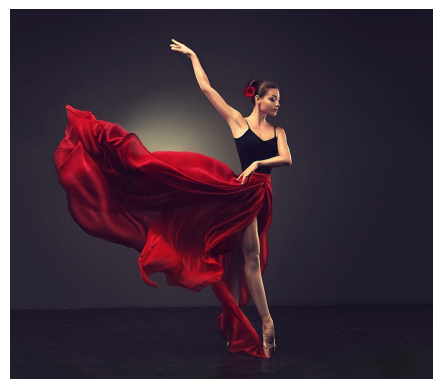

In [52]:



#Generate Captions for a Fresh Image

# from pickle import load
# from numpy import argmax
# #from keras.preprocessing.sequence import pad_sequences
# from keras.applications.vgg16 import VGG16
# #from keras.preprocessing.image import load_img
# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.preprocessing.image import img_to_array

# #from keras.preprocessing.image import img_to_array
# from keras.applications.vgg16 import preprocess_input
# from keras.models import Model
# from keras.models import load_model
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import Tokenizer


import matplotlib.pyplot as plt

from pickle import load
from numpy import argmax
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer 
import pickle

# Load the tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)


# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model_19.h5')
# load and prepare the photograph
photo = extract_features('image3.jpeg')
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
print(description)


img = load_img('image3.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

two men are standing in front of the sun


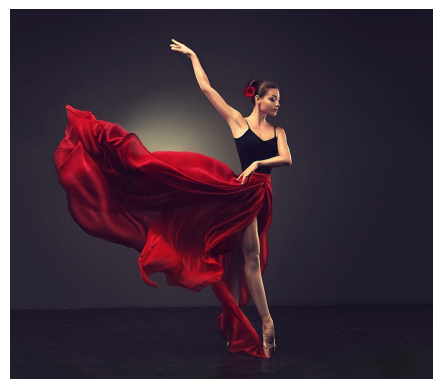

In [54]:
#Remove startseq and endseq
query = description
stopwords = ['startseq','endseq']
querywords = query.split()

resultwords  = [word for word in querywords if word.lower() not in stopwords]
result = ' '.join(resultwords)

print(result)
img = load_img('image3.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()